# Project 2 - Customer Behaviour (Credit Cards)

## Introduction:

In every business, an effective Marketing department plays a crucial role in developing the company's growth and sustainability. The department is able to build the company's brand and engage customers leading towards increased sales for greater revenue growth.

The diagram below summarises the key roles of Marketing:

<img src="Description Images/role_of_marketing.jpg" width="350">

Image Ref -> https://courses.lumenlearning.com/wmopen-introbusiness/chapter/the-role-of-customers-in-marketing/

In this project, the goal is to tackle the challenge of launching a __targeted marketing campaign__ and this campaign will be based on 6 months worth of customer data (description below). To do this, marketers are required to understand their customers, their behaviours and drive, so that their needs can be identified. Having developed an understanding of their needs, the marketing campaign can be specifically tailored to each of the individual customer's needs. This should drive up sales for the company's products (may even discover new opportunities). The availability of customer data can provide data scientists the opportunity to perform __Market Segmentation or rather Customer Segmentation__. This means that, based on the customer's behaviour and needs, they can be grouped separately for different marketing purposes, where the main question to be answered is: __How many distinctive groups can be found for the data to streamline the campaign?__


## Breakdown of this Project:
1. Loading in the Dataset.
2. Exploratory Data Analysis (Visualise the data).
3. Examining the Outliers.
4. Dataset preparation (Data cleaning, training and testing splits)
5. K-Means Clustering Techniques with all the data
6. Visualise the Customer Groups/Segmentation with PCA and t-SNE.
7. Refine the number of clusters with AutoEncoders.
8. Visualise the refined Customer Groups/Segmentation with PCA and t-SNE.
9. Model Comparison, Evaluation and Conclusion (Marketing strategy suggestion).

## Dataset:

Link: https://www.kaggle.com/arjunbhasin2013/ccdata

As quoted from the link, the description is:

This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

The following shows the attributes of the Credit Card dataset :

- __CUSTID__ : Identification of Credit Card holder (Categorical) 
- __BALANCE__ : Balance amount left in their account to make purchases 
- __BALANCEFREQUENCY__ : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) 
- __PURCHASES__ : Amount of purchases made from account 
- __ONEOFFPURCHASES__ : Maximum purchase amount done in one-go 
- __INSTALLMENTSPURCHASES__ : Amount of purchase done in installment 
- __CASHADVANCE__ : Cash in advance given by the user 
- __PURCHASESFREQUENCY__ : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) 
- __ONEOFFPURCHASESFREQUENCY__ : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) 
- __PURCHASESINSTALLMENTSFREQUENCY__ : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done) 
- __CASHADVANCEFREQUENCY__ : How frequently the cash in advance being paid 
- __CASHADVANCETRX__ : Number of Transactions made with "Cash in Advanced" 
- __PURCHASESTRX__ : Number of purchase transactions made 
- __CREDITLIMIT__ : Limit of Credit Card for user 
- __PAYMENTS__ : Amount of Payment done by user 
- __MINIMUM_PAYMENTS__ : Minimum amount of payments made by user 
- __PRCFULLPAYMENT__ : Percent of full payment paid by user 
- __TENURE__ : Tenure of credit card service for user 

## Requirements:
- Numpy
- Pandas
- Seaborn
- Matplotlib
- scikit-learn (sklearn)
- os
- timeit
- tensorflow (or Keras)

## 1 - Setting up the Libraries:

In [1]:
import os
import timeit
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Run on GPU:
os.environ["CUDA_VISIBLE_DEVICES"]= "0" 

## 2 - Load in the Dataset:


In [2]:
# Dataset Filename:
dataset_fileName = 'Marketing_data.csv'

# Set up the Working Directory:
currentDirectory = os.getcwd()
path_to_dataset = currentDirectory + '/Dataset/' + dataset_fileName

In [3]:
# Load in the File: .csv format
marketing_data_df = pd.read_csv(path_to_dataset)

### 2.1 - First glance at the dataset:

Taking a look at the first 10 rows of the dataset.

In [4]:
marketing_data_df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

### 2.2 - Dataset Statistics:

Take a look at the general statistics of this dataset.


In [5]:
marketing_data_df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

### 2.3 - Dataset Column Description:

In [6]:
marketing_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

It can be seen that majority of all the columns are in numerical format (float or int).

### 2.4 - Inspect the unique values in each column:

In [7]:
marketing_data_df[marketing_data_df.columns].nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

## 3 - Exploratory Data Analysis (EDA):

### 3.1 - Check for any missing data samples:

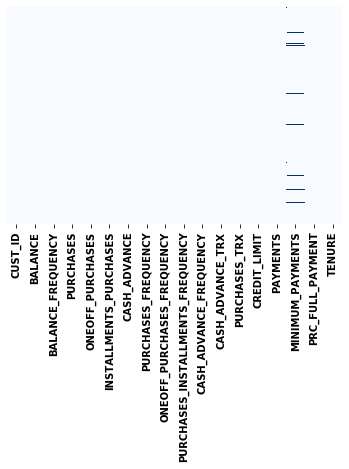

In [8]:
sns.heatmap(data=marketing_data_df.isnull(), yticklabels=False, cbar=False, cmap = "Blues")

From the output chart above, it can be seen that the column "MINIMUM_PAYMENTS" do have missing values.

#### Let's inspect this column further:

In [9]:
marketing_data_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

There are 313 missing "MINIMUM_PAYMENTS" data samples. Interestingly, the column "CREDIT_LIMIT" also have one missing value.

#### Take a look at the statistics for these columns:

This can be used to form a strategy to impute these missing data samples.

In [10]:
marketing_data_df['MINIMUM_PAYMENTS'].describe(), marketing_data_df['CREDIT_LIMIT'].describe()

(count     8637.000000
 mean       864.206542
 std       2372.446607
 min          0.019163
 25%        169.123707
 50%        312.343947
 75%        825.485459
 max      76406.207520
 Name: MINIMUM_PAYMENTS, dtype: float64,
 count     8949.000000
 mean      4494.449450
 std       3638.815725
 min         50.000000
 25%       1600.000000
 50%       3000.000000
 75%       6500.000000
 max      30000.000000
 Name: CREDIT_LIMIT, dtype: float64)

From the statistics above, it makes sense to use to the "mean"" values from each column to impute the missing data with. This will be implemented later on in the Data Cleaning Section.

### 3.2 - Check for duplicate data samples:

In [11]:
marketing_data_df.duplicated().sum()

0

From this quick check, it seems like this dataset does not have any duplicates.

### 3.3 - Correlations of the Feature Columns:

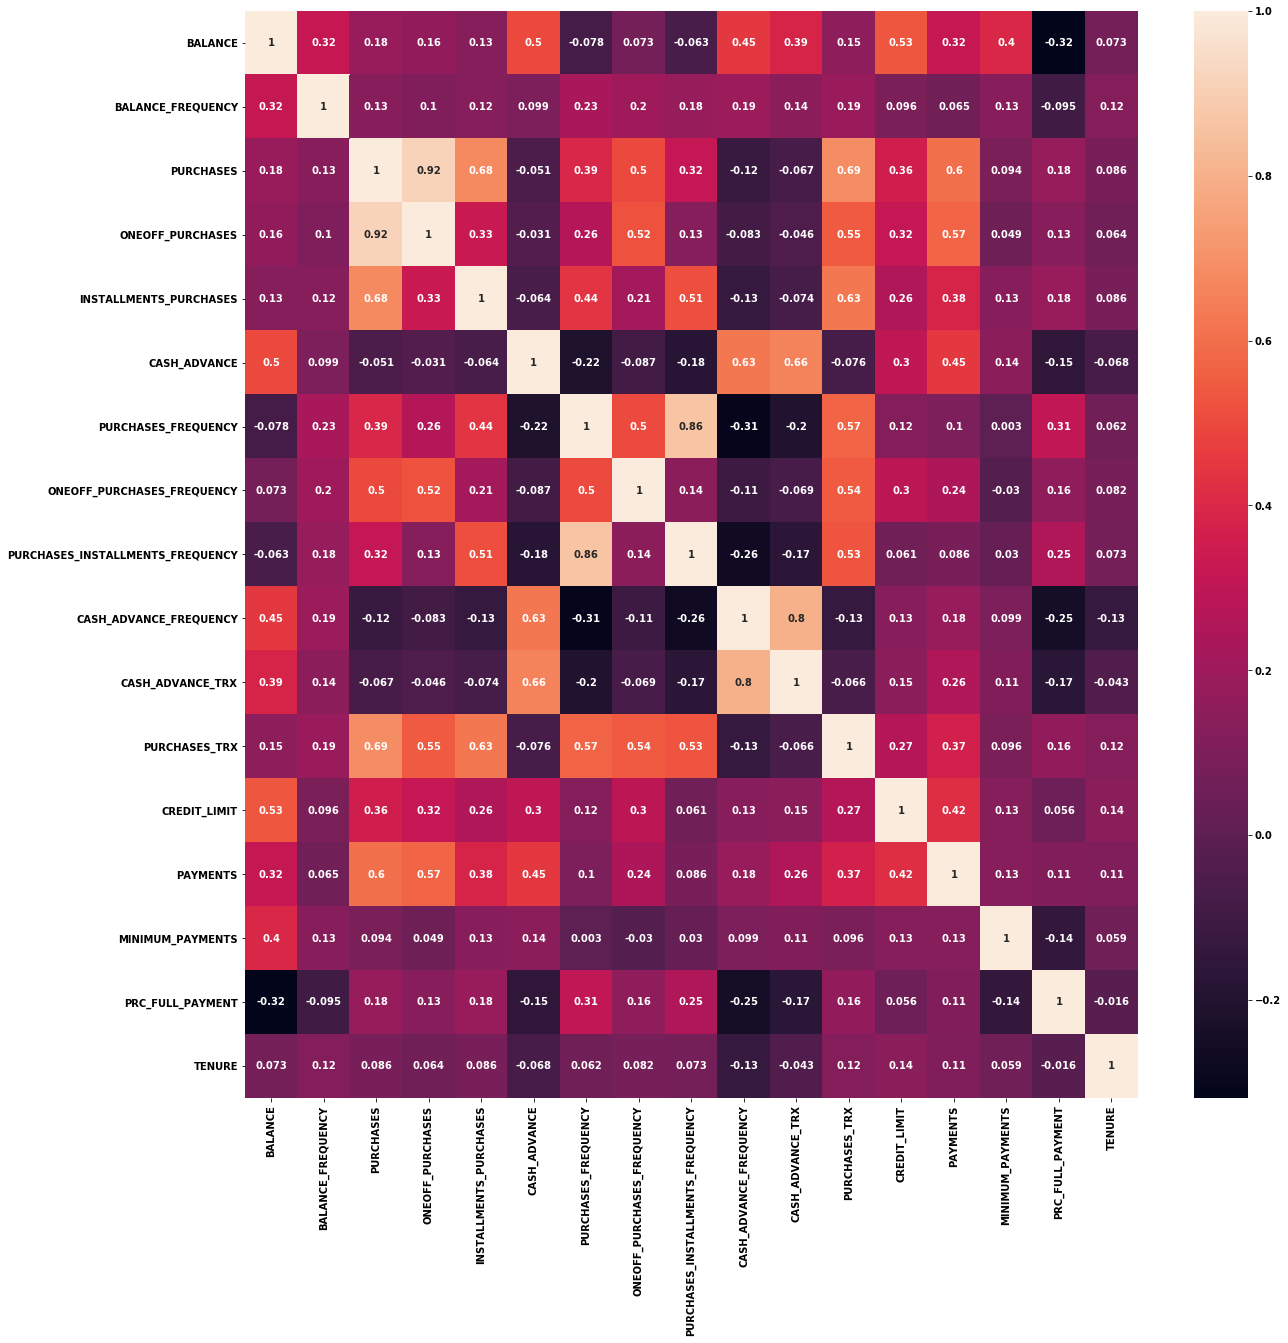

In [12]:
# Instantiate a correlation matrix for plotting:
correlations_marketing = marketing_data_df.corr()

# Plot with HeatMap:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data=correlations_marketing, annot=True)

### Observation:

From the heatmap key on the right, it shows the lighter the heatmap colour, the better correlated the features are to each other.

Observed outcomes examples:
- There is a strong correlation between the CASH_ADVANCE, CREDIT_LIMIT and BALANCE.
- There is a strong correlation between OENOFF_PURCHASES, INSTALLMENT_PURCHASES, PURCHASE_TRX and BALANCE.
- There is a good correlation between PAYMENTS and PURCHASES_TRX or CREDIT_LIMIT.
- There is a strong correlation between CASH_ADVANCE_TRX and CASH_ADVANCE.
- There is a good correlation between CASH_ADVANCE_FREQUENCY and BALANCE.

### 3.4 - Kernel Density Plot (KDE) Plot:

KDE visualises the probability density of a continuous variable, where it demonstrates the probability density at different values of the continuous variable.

__Note__: For majority of the EDA visualisations, the "CUST_ID" column was temporarily removed.

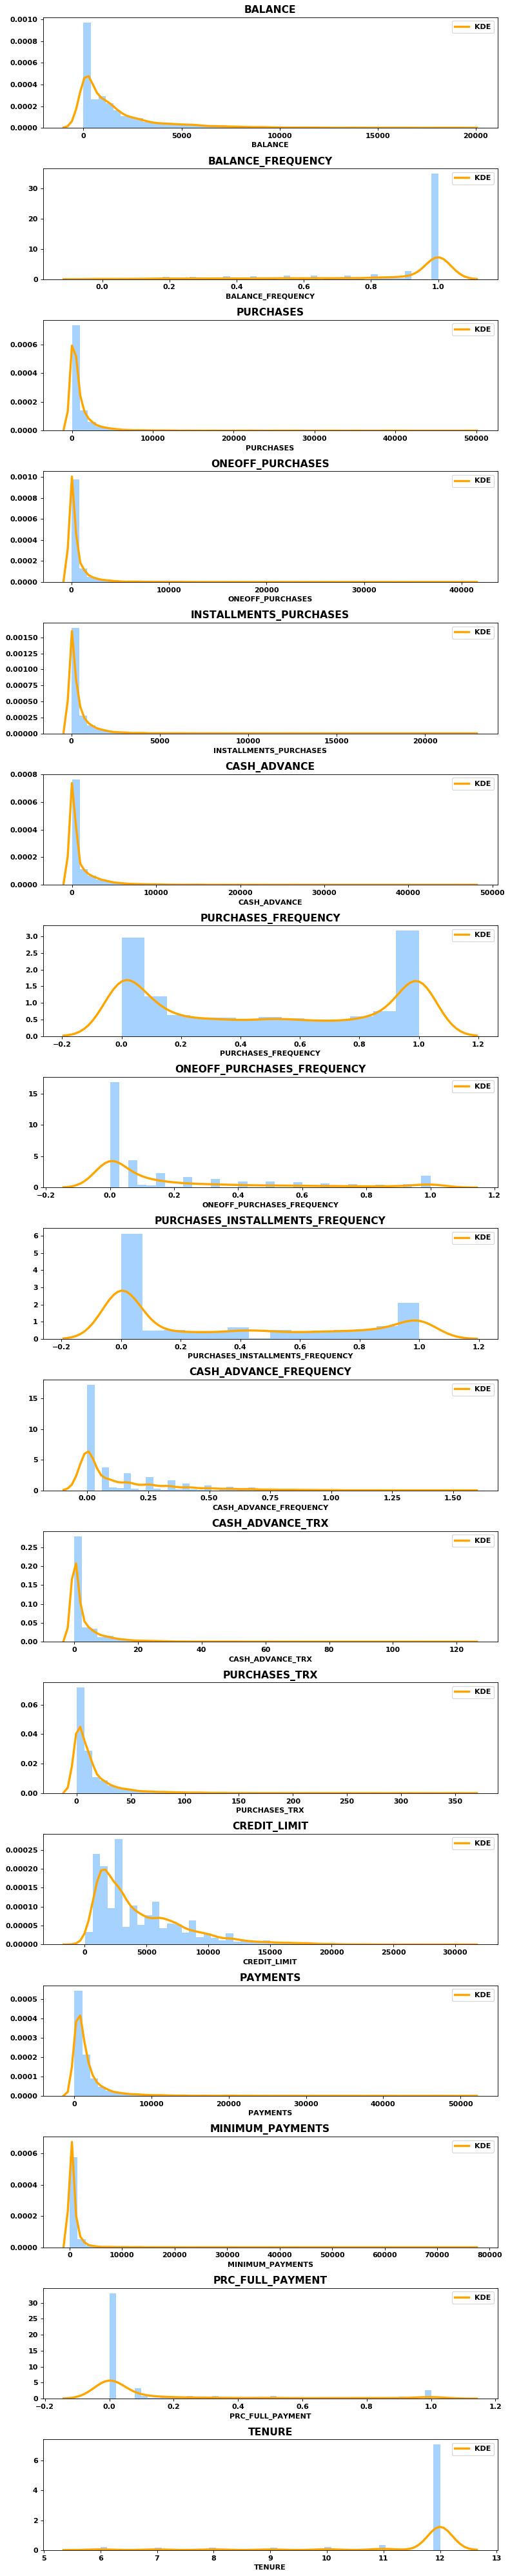

In [13]:
# Prepare data:
df_for_plot = marketing_data_df.drop(columns="CUST_ID")

# Draw Plot:
plt.figure(figsize=(10, 50), dpi= 80)

for i in range(len(df_for_plot.columns)):
    plt.subplot(len(df_for_plot.columns), 1, i+1)
    
    sns.distplot(a=df_for_plot[df_for_plot.columns[i]], 
                 kde_kws={'color':'orange', 'linewidth':3, 'label':'KDE'}, 
                 hist_kws={'color':'dodgerblue'}
                )
    
    # Plot Decoration:
    plt.title(label=df_for_plot.columns[i], fontsize=14)
    plt.legend()

plt.tight_layout()

### Observations:

Taking a look at a few of the plots and describing them, it follows as,
- For BALANCE plot: Majority of the customers have roughly USD1,500 in their accounts, while some people in the extremes have about USD20,000
- For BALANCE_FREQUENCY plot: Almost all of the people can be seen to use their credit cards frequently (value of 1). This leads to the frequent updates to their balance that is associate with the card usage.
- For PURCHASES plot: Majority of the purchase value is around US1,000 to USD1,500.
- For PURCHASE_FREQUENCY plot: There are 2 groups of customers, where one group does not use their credit cards for purchases and the othehr group do use it. 
- For CASH_ADVANCE_FREQUENCY plot: Majority of the customers fo not use Cash Advances, this indicates that they understand the penalty associated with withdrawing cash out of thhe credit card.
- For PRC_FULL_PAYMENT plot: It seems like majority of the customer prefer partial payments rather than in full payments.
- For TENURE plot: There are more customers that are loyal to the bank at around 12 years.

### 3.5 - Plot the Columns with "Frequency" in them:





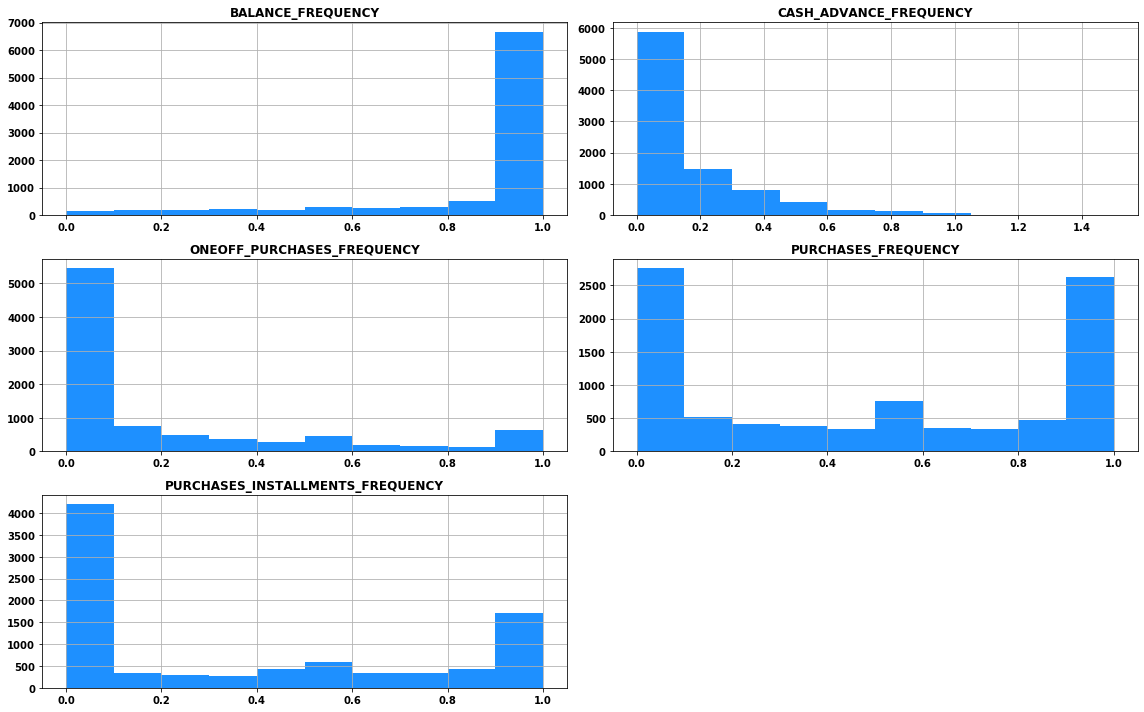

In [14]:
# Filter:
condition_frequency = [x for x in df_for_plot.columns if 'FREQUENCY' in x]

# Prepare the data:
df_for_plot[condition_frequency].hist(figsize=(16,10), color='dodgerblue')
plt.tight_layout()

### 3.6 - Inspect the Outliers in the columns:



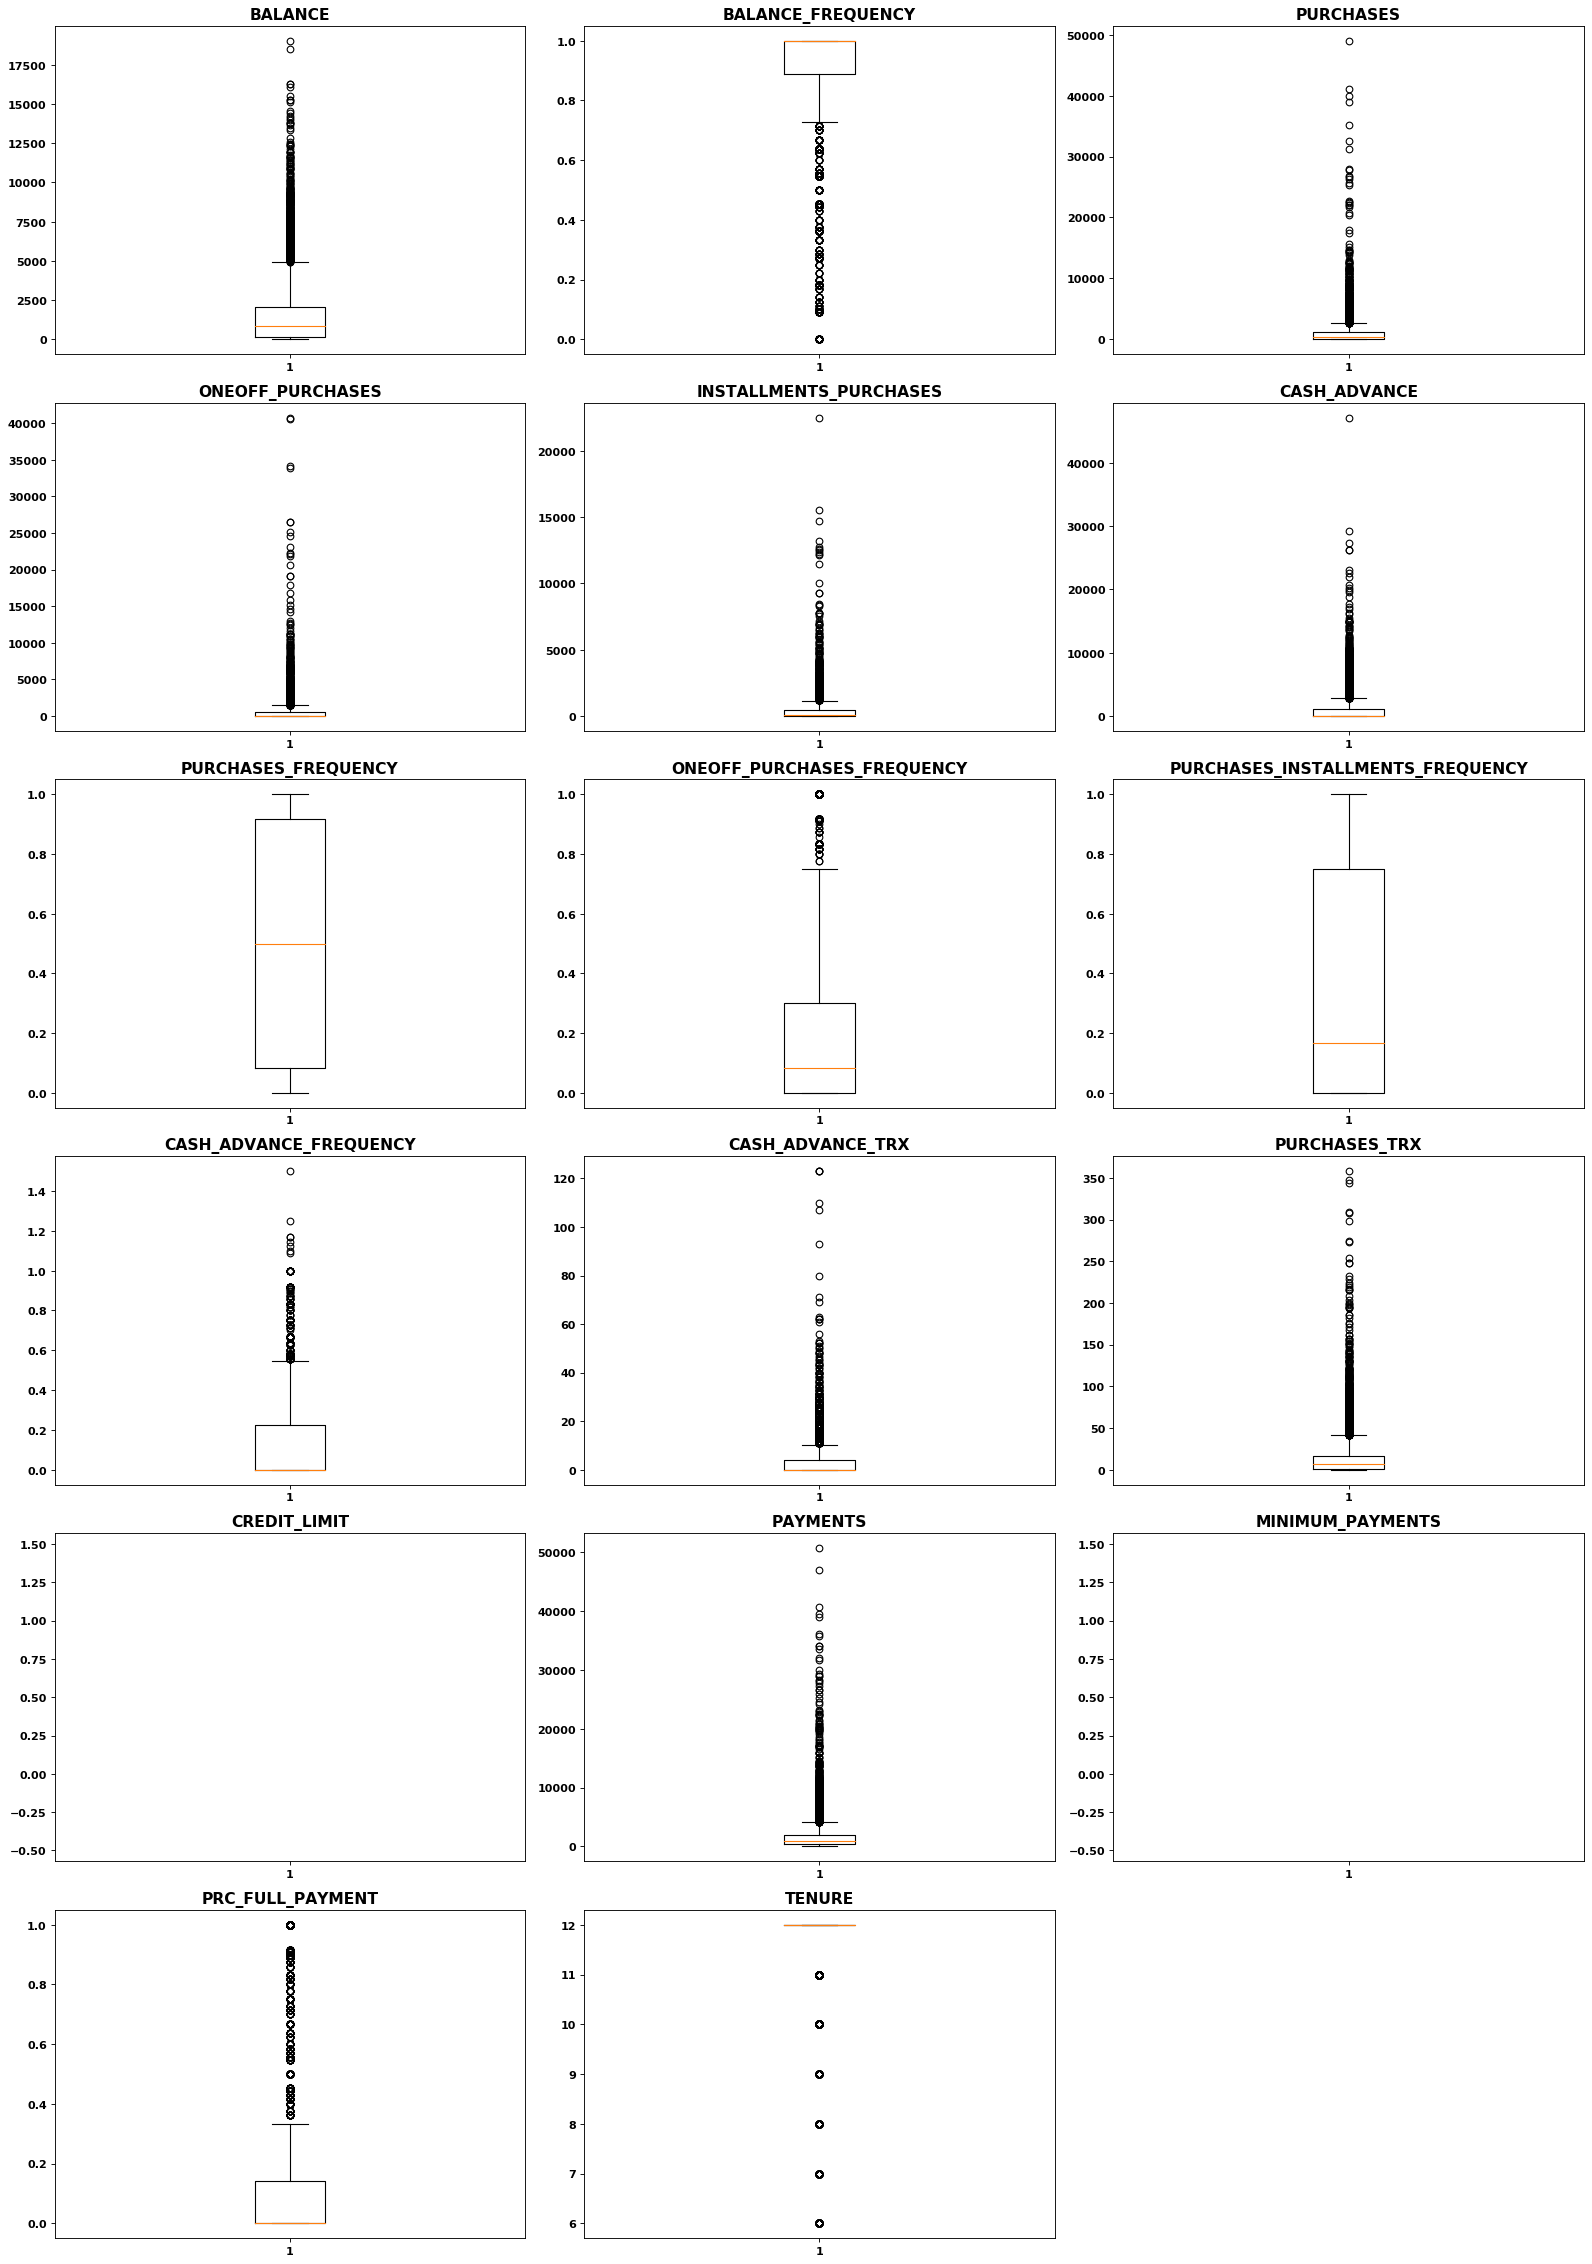

In [15]:
# Draw Plot
plt.figure(figsize=(20, 80), dpi= 80)

for i in range(len(df_for_plot.columns)):
    plt.subplot(len(df_for_plot.columns), 3, i+1)
    plt.boxplot(df_for_plot[df_for_plot.columns[i]])
    
    # Plot Decoration:
    plt.title(label=df_for_plot.columns[i], fontsize=14)

plt.tight_layout()

It is evident that from the boxplots that most of the columns do have outliers. Actions on these will be considered later on in this project, preferably after some preliminary clustering results. 

Therefore for now, these outliers are left alone. One good reason to leave the dataset as it is, would be to allow the Clustering model to capture and segment all of the customer behaviour. The model should be able to cluster the outliers into the appropriate groups and this may help by providing insight for a targeted marketing product. 


## 4 - Data Cleaning:

In this section, the dataset will also go through the data cleaning process. Just to recap, this is where the data is prepared for analysis, by removing/modifying data (individual samples, rows or entire columns) that are incorrect, incomplete, irrelevent, duplicated or poorly formatted. This will ensure that the data which remains can be used to build a better model with greater predictive power. (In other words, to maximize a dataset’s accuracy without necessarily deleting information.)

The following diagram outlines the process for Data Cleaning:

<img src="Description Images/data_cleaning_cycle.jpg" width="550">

Image Ref -> https://www.iteratorshq.com/blog/data-cleaning-in-5-easy-steps/

The work done in this section will follow the steps outline above as much as possible, as different datasets will involve a varying degree of cleaning. The end goal of this section would be to define what will be needed so that a Pipeline can be designed to process the data for the modeling task, as well as exploring the characteristics of the dataset.



### 4.1 - Different Types of Data:

The following is a chart that defines the Types of Data to deal with:

<img src="Description Images/data-types-in-statistics.png" width="550">

Image Ref -> https://www.mymarketresearchmethods.com/data-types-in-statistics/

__Categorical values are split into Two types__: Nominal or Ordinal.

Nominal values -> Nominal scales are ttypically used for labeling data/variables that does not have any "quantitative" value. For example, gender, hair colour etc. Note that all of these are scales are mutually exclusive (non-overlapping) and consists of no numerical significance.

Ordinal values -> Ordinal scales do show that the ordering of these values have a significance, and that the differences between each value is not really known. For example, 4 is bettter than 3, and 3 is better than 2 and so on, but here you can't quantify how much better it is to each other. Another example, is the difference between “OK” and “Unhappy” the same as the difference between “Very Happy” and “Happy?”, it can be seen that it is not possible to tell the difference. Ordinal scales are measures of non-numeric concepts like satisfaction, happiness, discomfort, etc. Futher, the best way to determine the central tendency of a set of ordinal data values is use Mode or Median, but not the Mean.

__Numerical values are split into Two types__: Discrete or Continuous. \
Additionally, __Continuous variables__ are further split into two types: Intervals and Ratios.

Intervals -> Interval scales are numeric scales that shows the order and exact differences between its values. For example, the Celsis temperature have differences between each value and this difference is always the same. 
The central tendency can be measured by mode, median, or mean. The standard deviation can also be calculated.

Ratios -> Ratio scales are numeric scales that shows the order, its exact value between units and (unlike intervals) have an absolute zero. This allows for a wide range of descriptive and inferential statistics to be applied. These variables can be meaningfully added, subtracted, multiplied, divided (ratios). Central tendency can be measured by mode, median, or mean. The measures of dispersion, such as standard deviation and coefficient of variation can also be calculated from ratio scales. For example, these can be height and weight.

Source: https://www.mymarketresearchmethods.com/data-types-in-statistics/

### Note: In the following sections, the Dataset will be coppied and the data cleaning will be implemented to test on this dataFrame_copy. The actual transformations will be implemented later on in a Pipeline sequence.

### 4.2 - Dealing with the Missing Values:

This section will deal with the missing values that was found previously, where the columns found were "CREDIT_LIMIT" and "MINIMUM_PAYMENTS".

In [16]:
# Import the required library:
from sklearn.base import TransformerMixin

In [17]:
class CustomImputer(TransformerMixin):
    """ This builds the CustomImputer, that inherits the TransformerMixin class.
        It essentially imputes the missing values within the listed columns.
        The Strategy can be 
        The inheritance should have a .fit_transform method to call with .fit and .transform methods.
    Parameters:
        - col, is the list of columns to impute.
        - impute_strategy, is the impute strategy (choose between 'mean' or 'median').
        - print_log, is an Optional Flag to print out the log to check that thee values were imputed.
    Returns:
        - returns the Inputed Dataframe.
    """
    # Initialise the instance attributes:
    def __init__(self, col, impute_strategy, print_log=False):
        self.col = col
        self.impute_strategy = impute_strategy
        self.print_log = print_log
        
    # Transform the dataset:
    def transform(self, dataFrame):
        X = dataFrame.copy()
        
        # Impute the values:
        if self.impute_strategy == 'mean':
            X[self.col] = X[self.col].fillna( X[self.col].mean() )
        else:
            X[self.col] = X[self.col].fillna( X[self.col].median() )
            
        # Perform a quick check:
        if self.print_log == True:
            print(X.isnull().sum())
            print("Checking DataFrame and there should be -- no missing values --.")
            print(" ")
                              
        return X
        
    # Fit method, that follows the fit method from scikit-learn:
    def fit(self, *_):
        return self

In [18]:
# list the columns to impute:
columns_to_impute = ['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']

# Apply the custom encoder for Ordinal columns, instantiate:
cc_impute_columns = CustomImputer(col=columns_to_impute, impute_strategy='mean', print_log=True)

# Fit and transform on the dataset:
marketing_data_df_copy = cc_impute_columns.fit_transform(X=marketing_data_df)
marketing_data_df_copy

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64
Checking DataFrame and there should be -- no missing values --.
 


CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000        864.206542          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

All good. It seems like all of the missing values were dealt with.

### 4.3 -  Drop columns (features) that are not informative:

During the examination of the columns (features) of this dataset, the following columns were found to be uninformative:
- CUST_ID 

In [19]:
class CustomDropUnwantedColumns(TransformerMixin):
    """ This builds the CustomDropUnwantedColumns, that inherits the TransformerMixin class.
        It essentially removes the listed unwanted columns.
        The inheritance should have a .fit_transform method to call with .fit and .transform methods.
    Parameters:
        - col, is the list of columns to impute.
    Returns:
        - returns the transformed dataframe.
    """
    # Initialise the instance attributes, the columns:
    def __init__(self, col):
        self.col = col

    # Transform the dataset by dropping irrelevant columns:
    def transform(self, dataFrame):
        X = dataFrame.copy()
        
        X_dropped = X.drop(labels=columns_to_drop, axis=1)
        
        return X_dropped
    
    # Fit method, that follows the fit method from scikit-learn:
    def fit(self, *_):
        return self

In [20]:
# list the columns to drop:
columns_to_drop = ['CUST_ID']

# Apply the custom encoder for Ordinal columns, instantiate:
cc_drop_columns = CustomDropUnwantedColumns(col=columns_to_drop)

# Fit and transform on the dataset:
marketing_data_df_copy = cc_drop_columns.fit_transform(X=marketing_data_df_copy)
marketing_data_df_copy.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

As it can be seen, the unwanted column ("CUST_ID") have been removed.

### 4.4 - Encoding the Categorical Features:

Previously, it was established that there all of the columns are numerical (float and int), therefore there won't be any categorical columns found here to encode.

In [21]:
def search_categorical_variables(dataset, print_logs=False):
    ''' This function will search through the Dataset and determine which
        column is a categorical one or a numerical one.
    Parameters:
        - dataset, is the input dataset to search through.
        - print_logs, is an Optional Flag to print out the logs, where here 
            it is the list of columns found.
    Returns:
        - returns lists_categorical_columns_found, lists_numerical_columns_found.
    '''
    lists_categorical_columns_found = []
    lists_numerical_columns_found = []

    for col in dataset.columns:
        for unique_row_value in dataset[col].unique():
            current_col_categorical = None

            if isinstance(unique_row_value, str):
                current_col_categorical = True
            else:
                ## Set as Numerical type:
                current_col_categorical = False

        # At the end of column check: Update list with the column name.
        if current_col_categorical:
            lists_categorical_columns_found.append(col)
        else:
            lists_numerical_columns_found.append(col)
    
    if print_logs == True:
        # Shows the Categorical Columns found:
        print('Categorical Columns found are:\t {}'.format(lists_categorical_columns_found))
        print('\t')

        # Shows the Numerical Columns found:
        print('Numerical Columns found are:\t {}'.format(lists_numerical_columns_found))
    else:
        pass
    
    return lists_categorical_columns_found, lists_numerical_columns_found

In [22]:
# Apply the function above:
lists_categorical_columns_found, lists_numerical_columns_found = search_categorical_variables(dataset=marketing_data_df_copy,
                                                                                             print_logs=True)


Categorical Columns found are:	 []
	
Numerical Columns found are:	 ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


The above lists confirms it, there are no categorical columns to encode at this point.

### 4.5 - Scaling the Feature Columns:

The function here will scale and convert it back to DataFrame. The typical MinMaxScaler() from sklearn outputs np.array.

##### NOTE: This step can be skipped, as sklearn models is not compatible when the column headers are present with the training (or testing) dataset, meaning when it is a DataFrame. The training set will still be scaled with MinMaxScaler() to output Numpy Arrays.

Below shows a demonstration of the output DataFrame that was scaled.

In [23]:
# Import the required Library:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [24]:
class scale_features_dataFrame(TransformerMixin):
    """ This builds the Custom Scaler for the dataset, that inherits the TransformerMixin class.
        The inheritance should have a .fit_transform method to call with .fit and .transform methods.
    Parameters:
        - dataFrame, is the input Dataset (DataFrame)
        - scaler_type, is the Flag to choose between MinMaxScaler (set as 'MinMax') 
            or StandardScaler (set as 'Standard') to use.
        - set_numpy_array, is an Optional Flag to output in Numpy Array 
            (if False, DataFrame will be the output).
    Returns:
        - returns the Scaled DataFrame (rather than np.array).
    """
    # Initialise the instance attributes, the columns and ordering:
    def __init__(self, scaler_type, set_numpy_array):
        self.scaler_type = scaler_type
        self.set_numpy_array = set_numpy_array
               
    
    # Transform the dataset's ordinal values:
    def transform(self, dataFrame):
        X = dataFrame.copy()
        
        if self.scaler_type == 'MinMax':
            scaler = MinMaxScaler()

            # Scale the data: outputs Numpy Array
            X_array = scaler.fit_transform(X)
            
            if self.set_numpy_array == False:
                # Convert back to DataFrame:
                X_df = pd.DataFrame(X_array, index=X.index, columns=X.columns)
        else:
            scaler = StandardScaler()

            # Scale the data: outputs Numpy Array
            X_array = scaler.fit_transform(X)
            
            if self.set_numpy_array == False:
                # Convert back to DataFrame:
                X_df = pd.DataFrame(X_array, index=X.index,  columns=X.columns)
        
        if self.set_numpy_array == True:
            X_output = X_array
            
        else:
            X_output = X_df
        
        return X_output
    
    # Fit method, that follows the fit method from scikit-learn:
    def fit(self, *_):
        return self
    

##### Scale the data with StandardScaler():

In [25]:
# Instantiate the Scaler: can be set as 'MinMax' or 'Standard'
scaler = scale_features_dataFrame(scaler_type='Standard', set_numpy_array=False)

# Fit and Transform the data:
marketing_data_df_copy = scaler.fit_transform(X=marketing_data_df_copy)

# Inspect:
marketing_data_df_copy

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    -0.731989          -0.249434  -0.424900         -0.356934   
1     0.786961           0.134325  -0.469552         -0.356934   
2     0.447135           0.518084  -0.107668          0.108889   
3     0.049099          -1.016953   0.232058          0.546189   
4    -0.358775           0.518084  -0.462063         -0.347294   
...        ...                ...        ...               ...   
8945 -0.737950           0.518084  -0.333293         -0.356934   
8946 -0.742423           0.518084  -0.329136         -0.356934   
8947 -0.740398          -0.185477  -0.401965         -0.356934   
8948 -0.745174          -0.185477  -0.469552         -0.356934   
8949 -0.572575          -0.889033   0.042146          0.301732   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  -0.349079     -0.466786            -0.806490   
1                  -0.454576      2.605605            -1.221758   
2                  -0.454576     -0.466786             1.269843   
3                  -0.454576     -0.368653            -1.014125   
4                  -0.454576     -0.466786            -1.014125   
...                      ...           ...                  ...   
8945               -0.132643     -0.466786             1.269843   
8946               -0.122823     -0.466786             1.269843   
8947               -0.294893     -0.466786             0.854576   
8948               -0.454576     -0.449352            -1.221758   
8949               -0.454576     -0.406205             0.439310   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                      -0.678661                         -0.707313   
1                      -0.678661                         -0.916995   
2                       2.673451                         -0.916995   
3                      -0.399319                         -0.916995   
4                      -0.399319                         -0.916995   
...                          ...                               ...   
8945                   -0.678661                          1.179833   
8946                   -0.678661                          1.179833   
8947                   -0.678661                          0.760469   
8948                   -0.678661                         -0.916995   
8949                    1.556082                         -0.916995   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                  -0.675349         -0.476070      -0.511333     -0.960433   
1                   0.573963          0.110074      -0.591796      0.688639   
2                  -0.675349         -0.476070      -0.109020      0.826062   
3                  -0.258913         -0.329534      -0.551565      0.826062   
4                  -0.675349         -0.476070      -0.551565     -0.905464   
...                      ...               ...            ...           ...   
8945               -0.675349         -0.476070      -0.350408     -0.960433   
8946               -0.675349         -0.476070      -0.350408     -0.960433   
8947               -0.675349         -0.476070      -0.390639     -0.960433   
8948                0.157527         -0.182998      -0.591796     -1.097856   
8949                0.990398         -0.182998       0.333524     -0.905464   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0    -0.528979     -3.109675e-01         -0.525551  0.360680  
1     0.818642      8.931021e-02          0.234227  0.360680  
2    -0.383805     -1.016632e-01         -0.525551  0.360680  
3    -0.598688     -5.366135e-16         -0.525551  0.360680  
4    -0.364368     -2.657913e-01         -0.525551  0.360680  
...        ...               ...               ...       ...  
8945 -0.486217     -3.498541e-01          1.183951 -4.122768  
8946 -0.503396     -5.366135e-16         -0.525551 -4.122768  
8947 -0.570615     -3.354655e-01          0.329200 -

## 5 - Design the Pre-processing Pipeline (Data Preparation):

Here, the pre-processing steps defined above will be set up in a pipeline to process and transform the original dataset to be ready for the following stages such as clustering and autoencoder modeling.

In [26]:
# ==============================================================================
# 1. Impute the missing values.
# ==============================================================================
# list the columns to impute:
columns_to_impute = ['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']

# Apply the custom encoder for Ordinal columns, instantiate:
cc_impute_columns = CustomImputer(col=columns_to_impute, impute_strategy='mean', print_log=False)

# ==============================================================================
# 2. Drop the unwanted columns.
# ==============================================================================
# list the columns to drop:
columns_to_drop = ['CUST_ID']

# Apply the custom encoder for Ordinal columns, instantiate:
cc_drop_columns = CustomDropUnwantedColumns(col=columns_to_drop)

# ==============================================================================
# 3. Scale the features in the dataset:
# ==============================================================================
# scaler = scale_features_dataFrame()
scaler = scale_features_dataFrame(scaler_type='Standard', set_numpy_array=True)


#### Transform the orignal dataset with the Pipeline:

In [27]:
# Import the required library:
from sklearn.pipeline import Pipeline

In [28]:
# Define the Pipeline Sequence:
pipe_preprocessing = Pipeline(steps=[("impute", cc_impute_columns),
                                     ("drop_columns", cc_drop_columns),
                                     ("scaler", scaler)]
                             )

# Fit the Pipeline to the Dataset:
pipe_preprocessing.fit(marketing_data_df)

# Transform the Dataset:
marketing_processed_df = pipe_preprocessing.transform(marketing_data_df)
x_marketing_features = marketing_processed_df

# Inspect:
x_marketing_features

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

Now with the dataset prepared, the Clustering Stage can begin.

## 6 - Unsupervised ML Clustering Model: K-means Clustering

Notice that for this project, the target vairable was not defined and this is because for this dataset, there are none. As mentioned int he introduction, the goal is to perform Customer Segmentation and therefore the model that will be implemented here is the __K-means Clustering__ model. Unlike supervised learning tasks where the model would be trained on the dataset to predict the target variable based on the attributes/features, unspervised learning algorithms does not require the target variable to predict, rather, the algorithm/model would ingest the data and compute which group each rows of attributes/features would belongs into. It will cluster the data into their respective groups.

#### Below shows a diagram of how the K-means clustering model groups the data:

<img src="Description Images/k_means_clustering_working.png" width="750">

Image Ref -> https://stanford.edu/~cpiech/cs221/handouts/kmeans.html

K-means stores and uses centroids in its computation and uses it to define the clusters. For a single data point to be considered to be in one cluster, it should be closer to this centroid than any other centroid. The final fit of the centroids to the data clusters is an iterative process and relies on distance measurements (Euclidean distance) between the data points and the centroids. K-means will find the best centroids in each respective cluster by alternating between the following 2 processes:
1. It assigns all the data points to the clusters based on the current centroids.
2. Recomputes or chooses the centroids based on the current assignment of the data points to the clusters.

The k-centroids will change its location step by step until no more changes are done (in other words centers do not move any more).

The above diagram also shows that the grouped data must satisfy two properties:
1. All the data points in a cluster should be similar to each other.
2. The data points from different clusters should be as different as possible.

#### Finding the Optimum K-number: a.k.a the number of clusters

One drawback to effectively use K-means for the segmentation task would be knowing the right/optimum K-number of clusters. It is a drawback because it requires prior knowledge or an assumption about this number. For this project, two of the methods will be considered (alternative is the rule-of-thumb method), and these are:
1. Within-Cluster-Sum-of-Squares (WCSS).
2. Cluster Quality using Silhouette Coefficient.

__For Within-Cluster-Sum-of-Squares (WCSS)__:

WCSS is a common method applied to determining the optimum k-number of clusters. It is based on the principle that clustering performance would increase as measured with WCSS (where WCSS value decreases) as the number of k-cluster increases. This means that the lower the value of WCSS, the better. By plotting the WCSS against an increasing k-cluster number would show an "elbow" that marks the point where there is a significant drop in the rate of WCSS. Selecting number of clusters corresponding to the elbow point would result in a reasonable performance without having too many clusters.

To calculate WCSS, the first thing to do is the computation of the Euclidean distance between a given point and the centroid to which it is assigned. This is iterated for all points in the cluster, and then sum the values for the cluster and divide by the number of points. Finally, the average across all clusters is computed. This will then achieve the average WCSS value.

The distance metric that is used to compute the distance between the centroid and data points is the __Euclidean Distance__, and the formula can be seen in the diagram below:

<img src="Description Images/Euclidean_Distance_Formula.png" width="350">

Image Ref -> https://sites.google.com/site/dataclusteringalgorithms/k-means-clustering-algorithm

__Cluster Quality using Silhouette Coefficient__:

Silhouette coefficient is another quality measure of clustering. It can be applied to any clustering technique. Silhouette-Coefficient of observation "i" can be calculated with the formula:

<img src="Description Images/SilhouetteFormula.png" width="350">

Image Ref -> https://gdcoder.com/silhouette-analysis-vs-elbow-method-vs-davies-bouldin-index-selecting-the-optimal-number-of-clusters-for-kmeans-clustering/

where,
- a is average distance to all other observations within same cluster as that of observation "i". 
- b is minimum of average distance to all other observations from all other clusters. 

This metric has a range between +1 (representing best clustering) and -1 (representing worst clustering). 

The diagram below shows an example of the calculation:

<img src="Description Images/SilhouetteCoefficient.png" width="350">

Image Ref -> https://www.researchgate.net/figure/Derivation-of-the-Overall-Silhouette-Coefficient-OverallSil_fig1_221570710



Source:
- https://www.kdnuggets.com/2019/05/guide-k-means-clustering-algorithm.html
- https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/
- https://sites.google.com/site/dataclusteringalgorithms/k-means-clustering-algorithm
- https://analyticsindiamag.com/beginners-guide-to-k-means-clustering/


### Overall process of applying the K-means Model for Customer Segmentation Task:

#### The process can be broken down into the following steps:
1. Find the optimum number of clusters.
    - Elbow method (WCSS).
    - Silhouette scores.
2. Apply the K-Means Clustering model with the specified number of clusters (optimum).
3. Update the Dataset with the new cluster labels.
4. Visualise the Clusters.



### 6.1 - Determine the optimum number of clusters: 

#### 6.1.1 - WCSS (Elbow Method):


In [29]:
# Import the required Libraries:
from sklearn.cluster import KMeans

In [30]:
# Define the empty WCSS list to be filled:
wcss_list = []

# Set the range of clusters to compute over:
list_clusters = range(1, 20)

# Compute the Clusters with K-means to find the optimum numberr of clusters:
for idx in list_clusters:
    kmeans_model = KMeans(n_clusters=idx, 
                          init='k-means++',
                          max_iter=300, 
                          n_init=10, 
                          random_state=101,
                          algorithm='auto')
    
    # fit the model to the dataset:
    kmeans_model.fit(x_marketing_features)
    
    # Update/Append the list (WCSS):
    wcss_list.append(kmeans_model.inertia_)

##### Plot the Elbow Method:

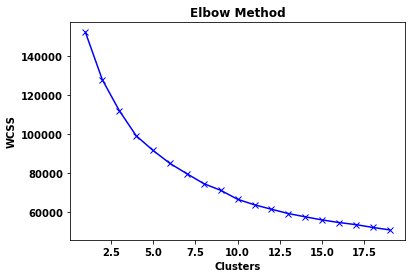

In [31]:
plt.plot(list_clusters, wcss_list, 'bx-')
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

### Observation:

The trend of the line begins with a very large number of WCSS (as expected) and as the number of clusters used in the computation increases, the WCSS begins to drop. From the chart, it can be discerned that the optimum __number of cluster is around 7 to 10__.

#### 6.1.2 - Silhouette Scores Method:

Let's use the Silhouette score to finalise hte optimum k-number.

In [32]:
# Import the required Library:
from sklearn.metrics import silhouette_score

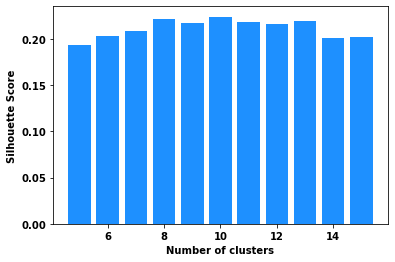

In [33]:
# Define an empty list of silhouette scores to be filled:
silhouette_scores_list = [] 

# Compute the scores for each of the number of clusters: number of cluster will be 5 to 15.
for nb_cluster in range(5, 16):
    silhouette_scores_list.append( 
        silhouette_score(x_marketing_features, KMeans(n_clusters=nb_cluster, 
                                                      init='k-means++',
                                                      max_iter=300, 
                                                      n_init=10, 
                                                      random_state=101,
                                                      algorithm='auto').fit_predict(x_marketing_features)
                        )) 
    
# Plot: Compare the results.
k = list( range(5, 16) )
plt.bar(k, silhouette_scores_list, color='dodgerblue') 
plt.xlabel('Number of clusters', fontsize=10) 
plt.ylabel('Silhouette Score', fontsize=10) 
plt.show()

In [34]:
# Save the scores as DataFrame:
silhouette_scores_df = pd.DataFrame({'k_clusters': k, 
                                     'silhouette_scores': silhouette_scores_list})

# Save the Optimum Cluster Number:
optimum_cluster_number = silhouette_scores_df.k_clusters[ silhouette_scores_df.silhouette_scores.idxmax() ]
print("The optimum number of clusters that should be used is: {}".format(optimum_cluster_number))

The optimum number of clusters that should be used is: 10


### Observation:

Immediately, it can be seen that according to the highest Silhouette score, the number of clusters chosen should be 3, however, according to the elbow method (WCSS), the suggested optimum number of cluster is around 7 to 10. Taking a futher look (while ignoring the cluster of 3 silhouette score), the results between bothh analysis concurs that the number of cluster to be chosen is around __7 to 10__, where __10 Clusters__ is the optimum one.

### 6.2 - Apply the K-Means Model: 

Set the optimum number of cluster = 10.

In [35]:
# Instantiate The K-means Clustering Model:
kmeans_model_10Clusters = KMeans(n_clusters=optimum_cluster_number,
                                 init='k-means++',
                                 max_iter=300, 
                                 n_init=10, 
                                 random_state=101,
                                 algorithm='auto')

# fit the model to the dataset:
kmeans_model_10Clusters.fit(X=x_marketing_features)


KMeans(n_clusters=10, random_state=101)

### 6.3 - Update the ORGINAL Dataset with the new labels:

In [36]:
# Extract the label data from the model:
labels_10Clusters = kmeans_model_10Clusters.labels_

# Inspect: 
labels_10Clusters.shape, labels_10Clusters.max(), labels_10Clusters.min()

((8950,), 9, 0)

In [37]:
# Update the ORGINAL Dataset with a new Column (labels): concatenate.
# Note: the "CUST_ID" column must be dropped here.
marketing_data_labeled_df = pd.concat([marketing_data_df.drop(labels='CUST_ID', axis=1), 
                                       pd.DataFrame({'cluster': labels_10Clusters})], 
                                      axis=1)

# Inspect:
marketing_data_labeled_df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0   201.802084        139.509787          0.000000      12        4  
1  4103.032597       1072.340217          0.222222      12        5  
2   622.066742        627.284787          0.000000      12        9  
3     0.000000               NaN          0.000000      12        4  
4   678.334763        244.791237          0.000000      12        4

### 6.4 - Visualise the Distributions of the Clusters and its Attributes:


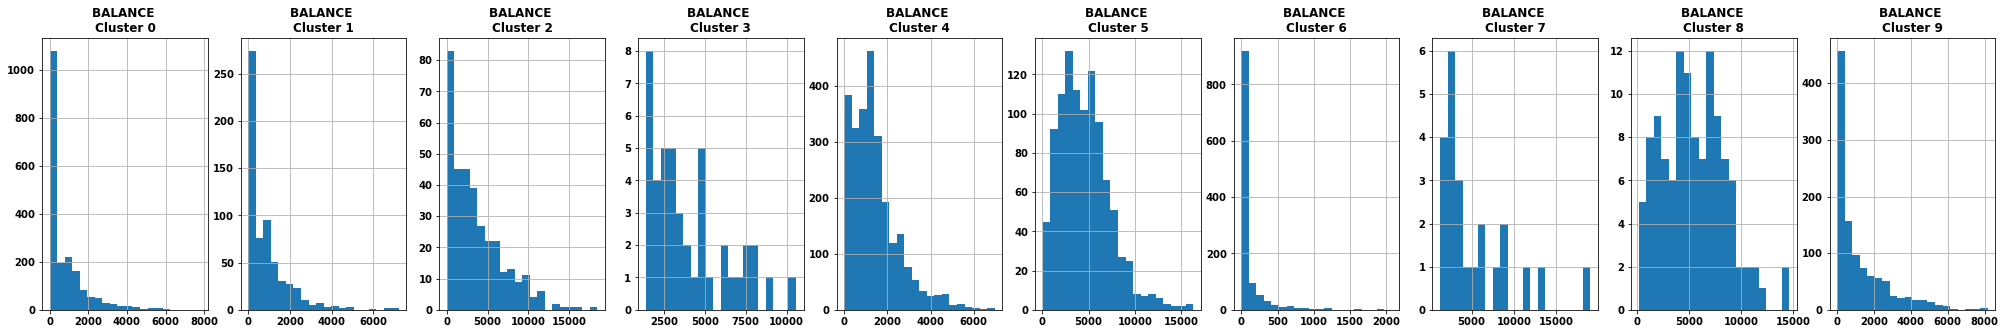

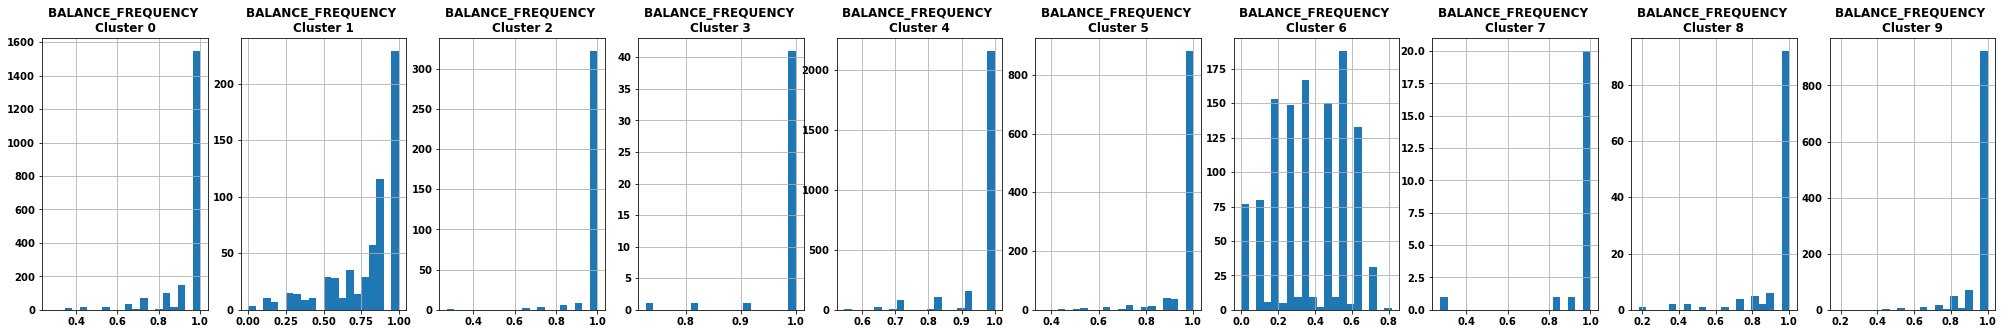

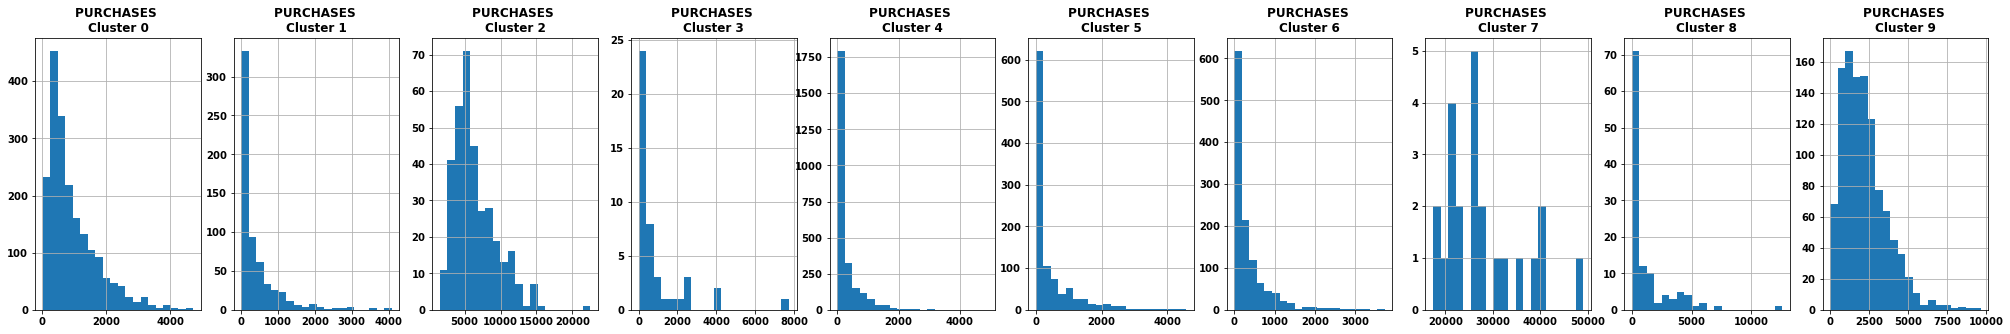

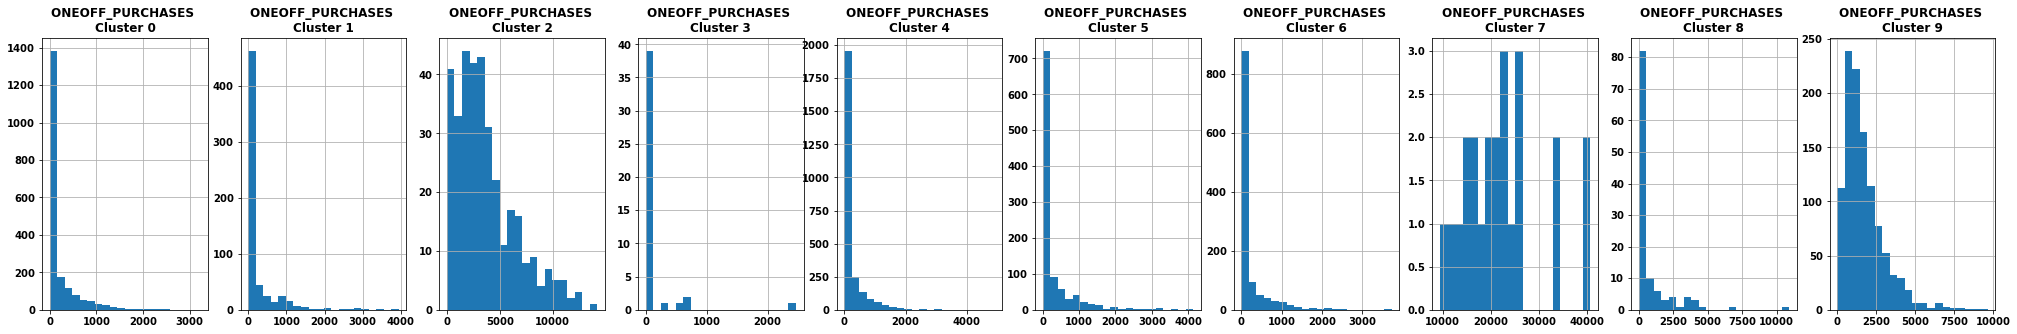

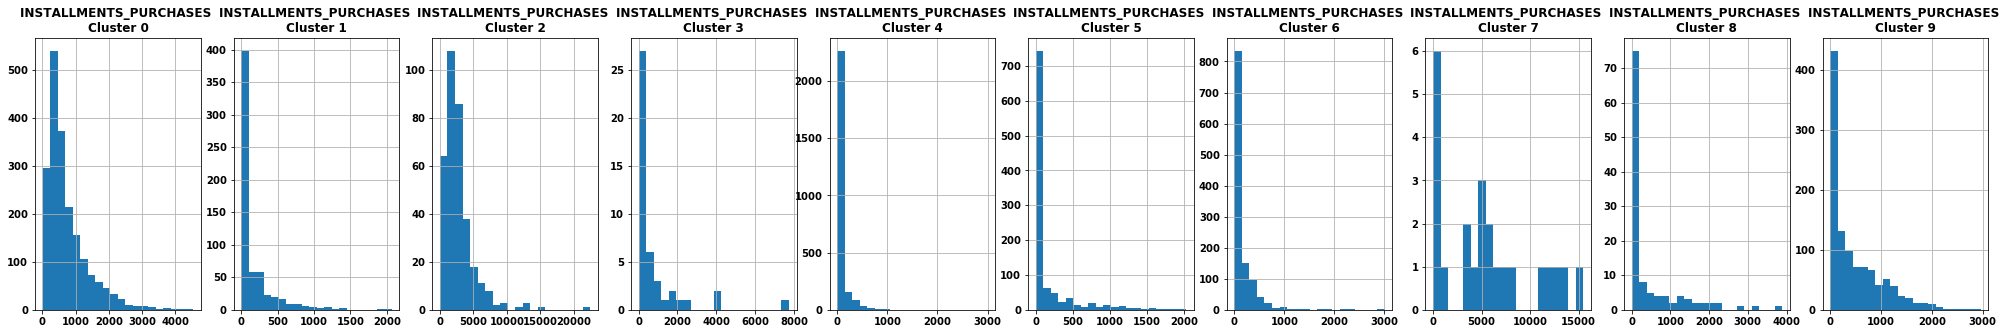

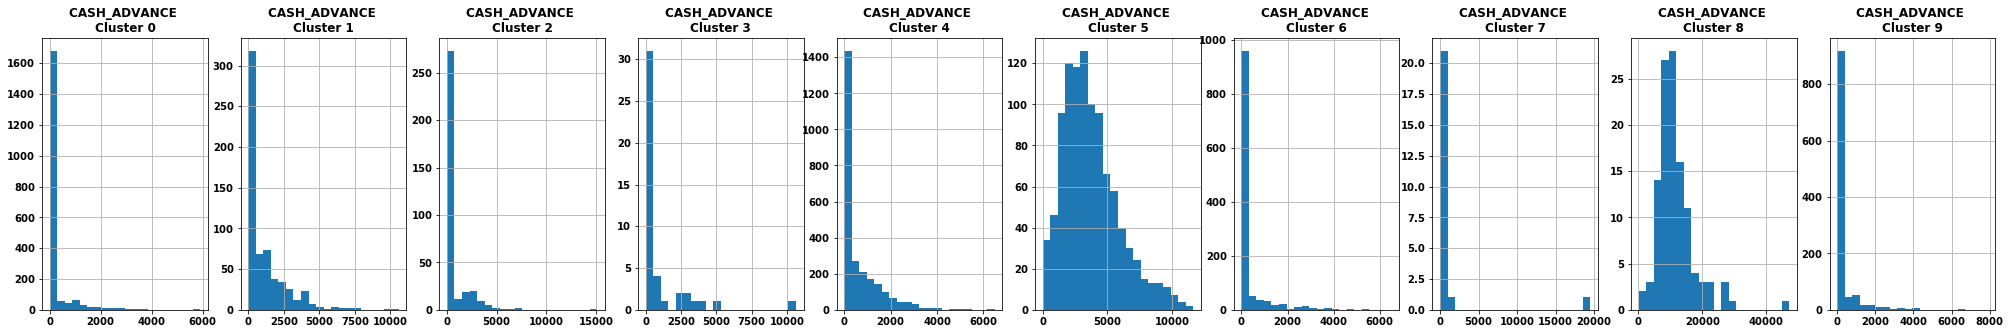

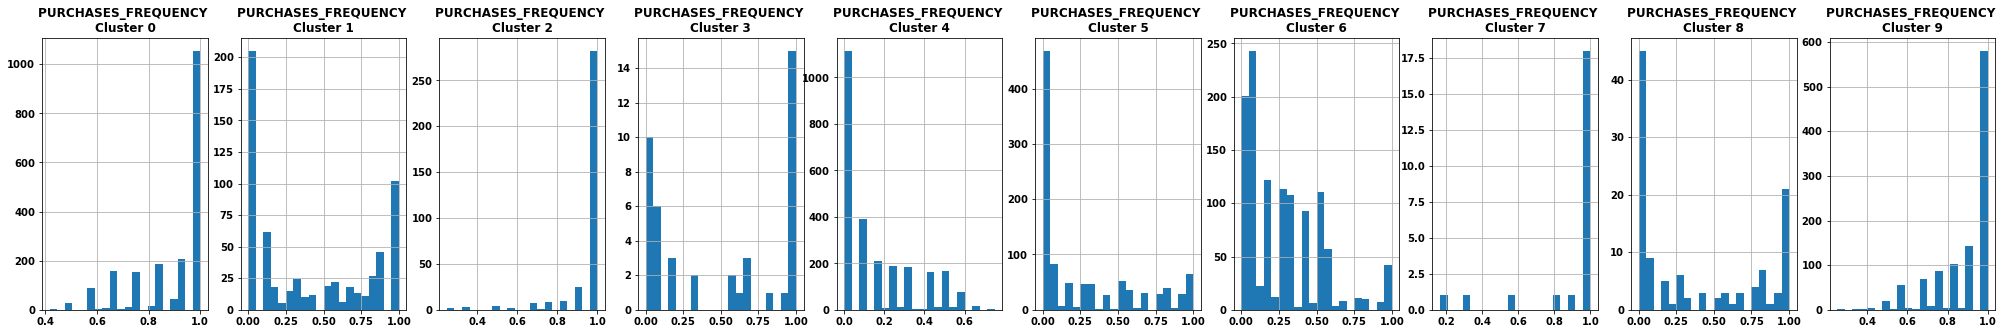

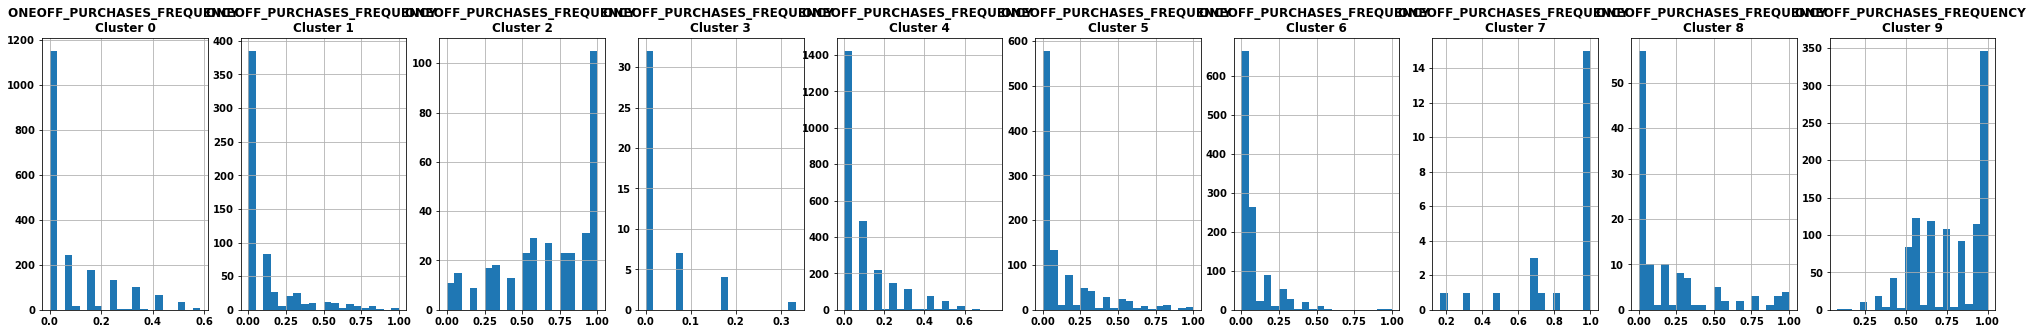

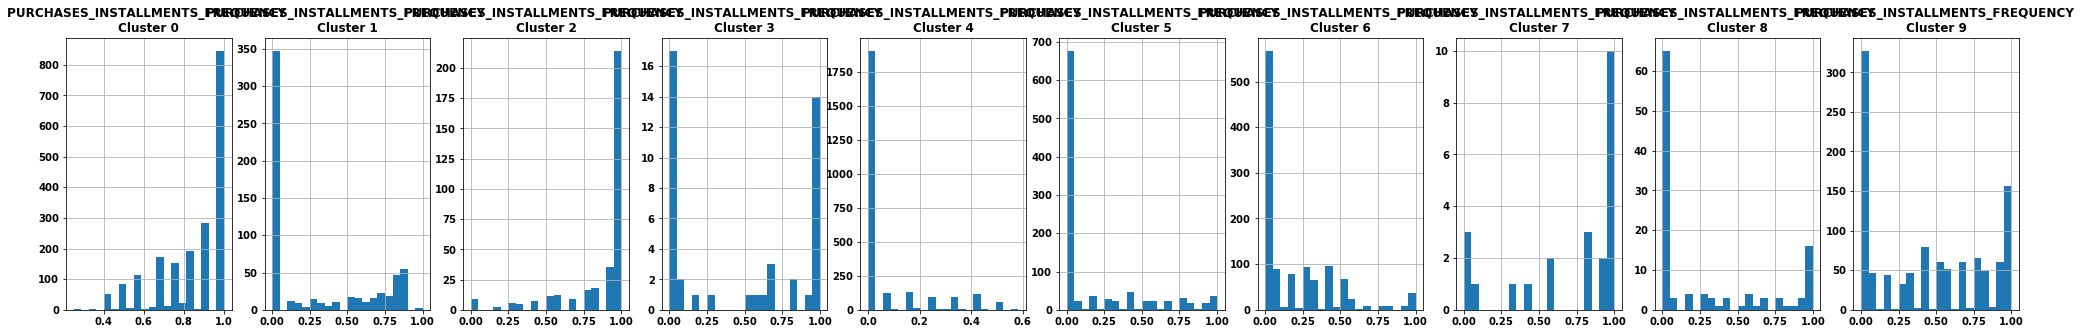

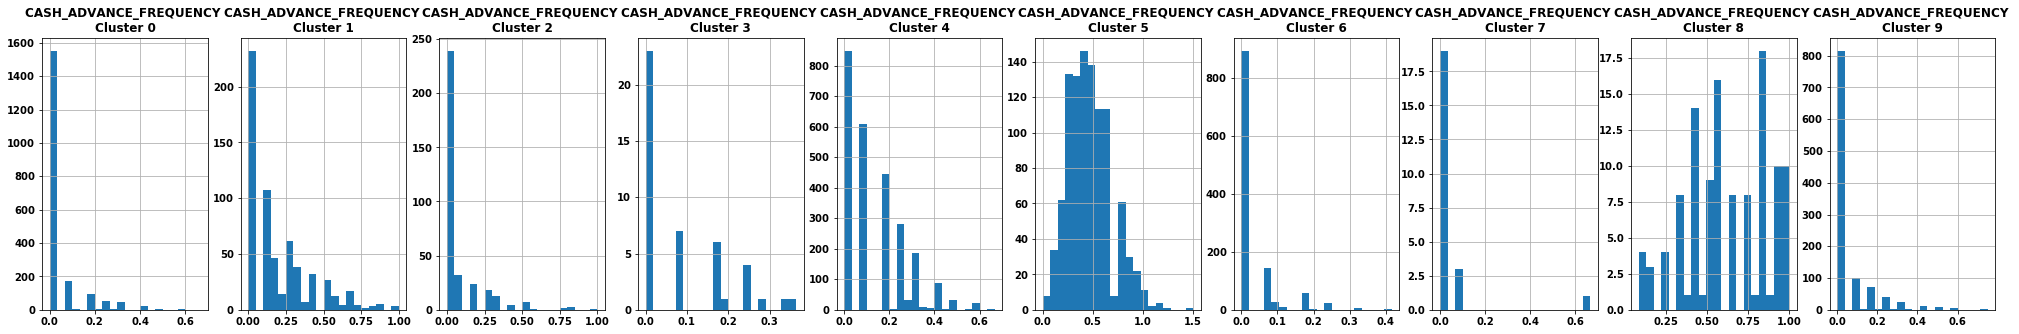

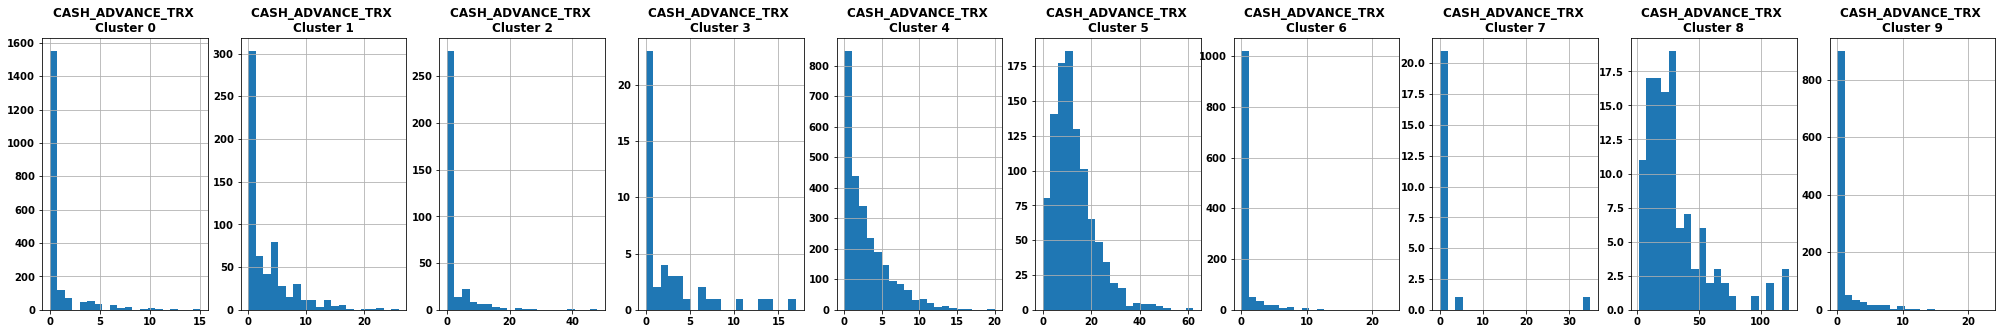

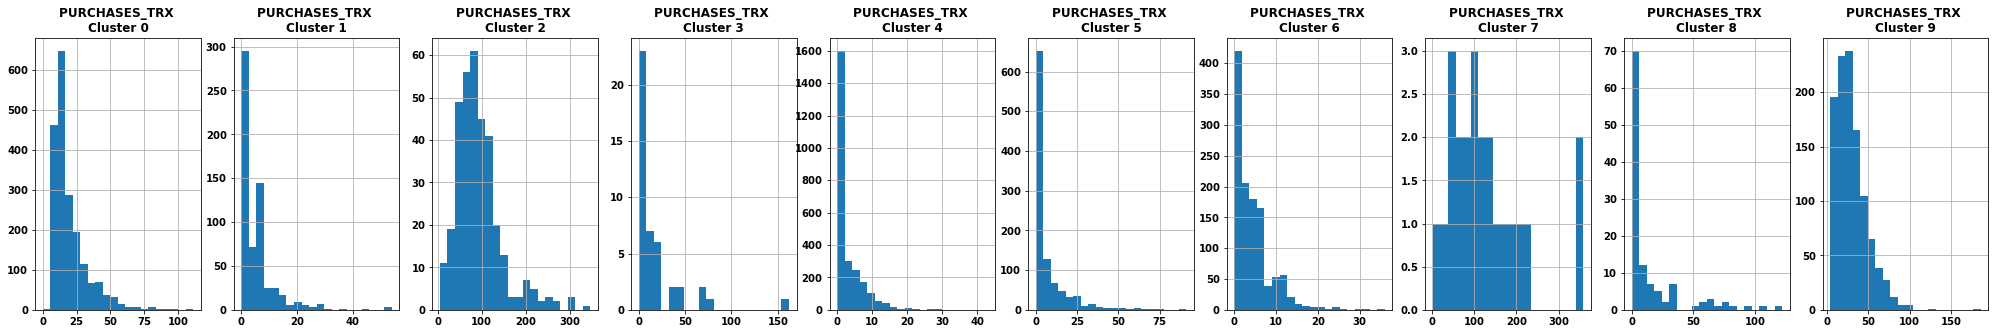

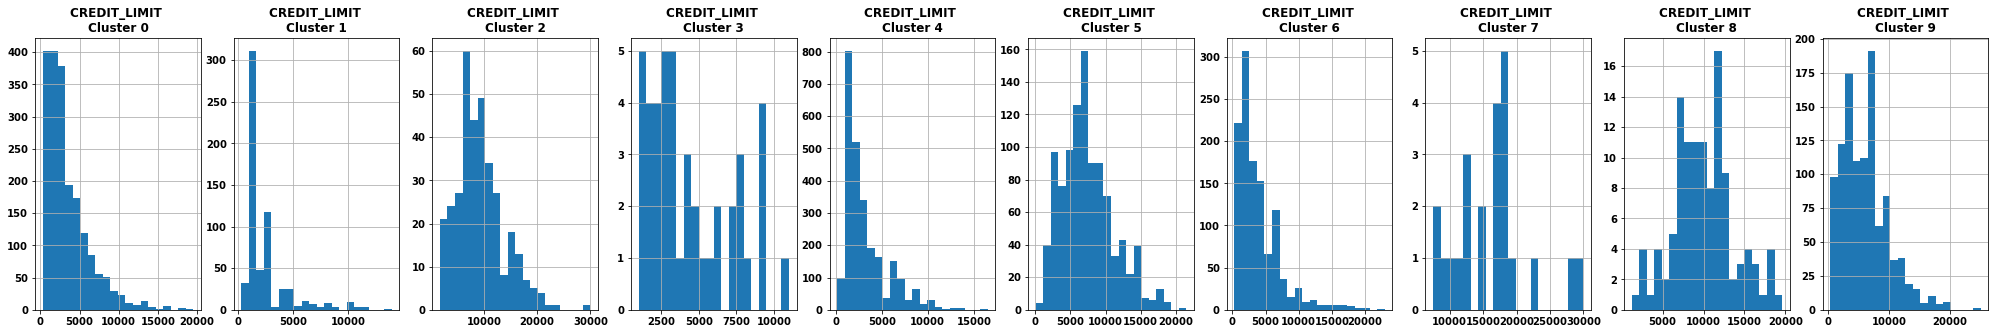

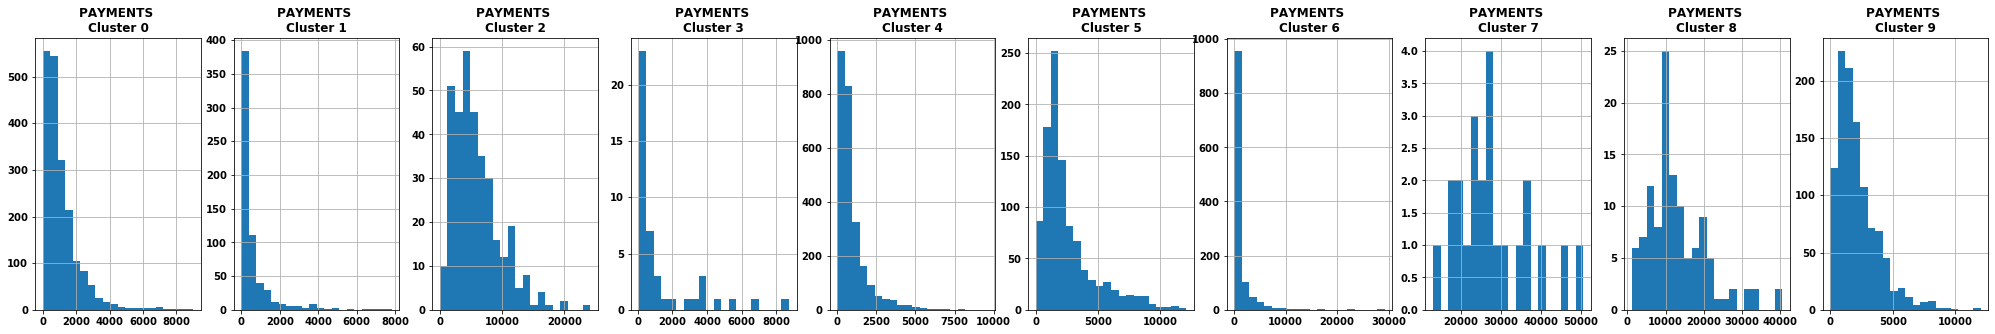

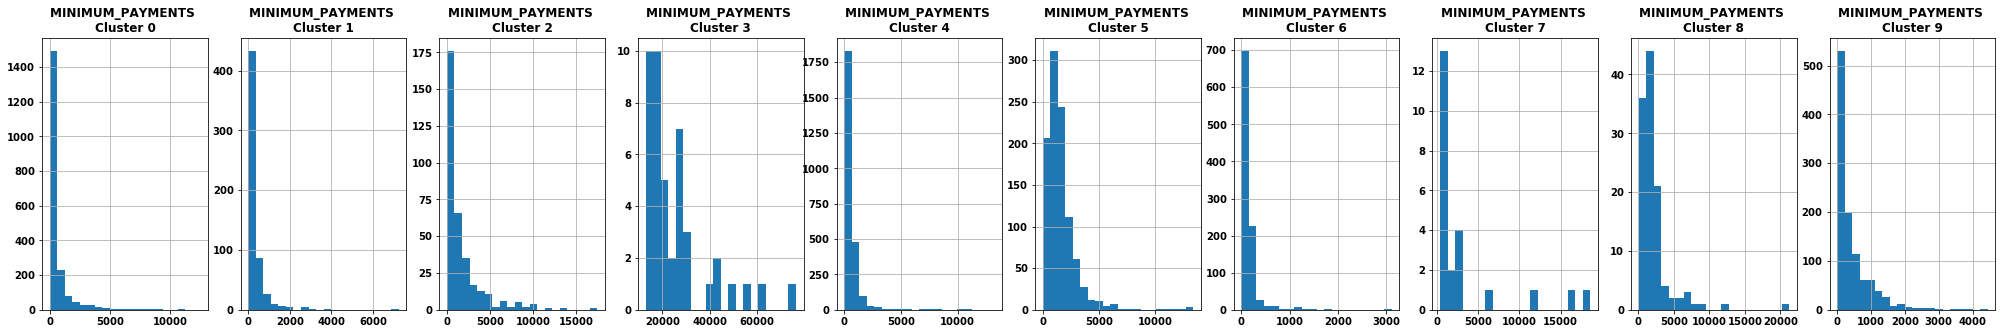

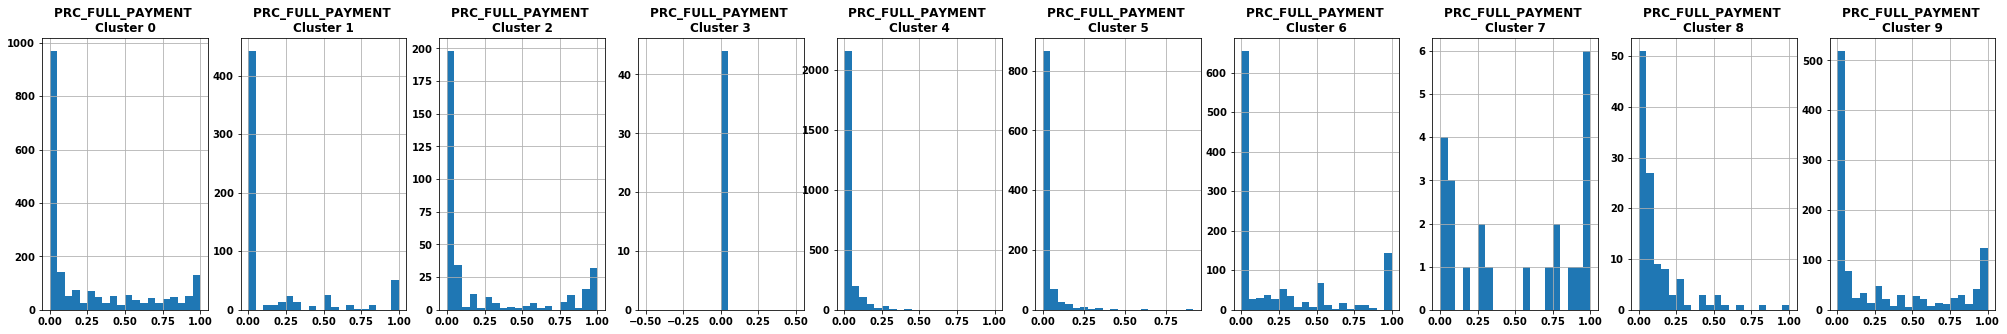

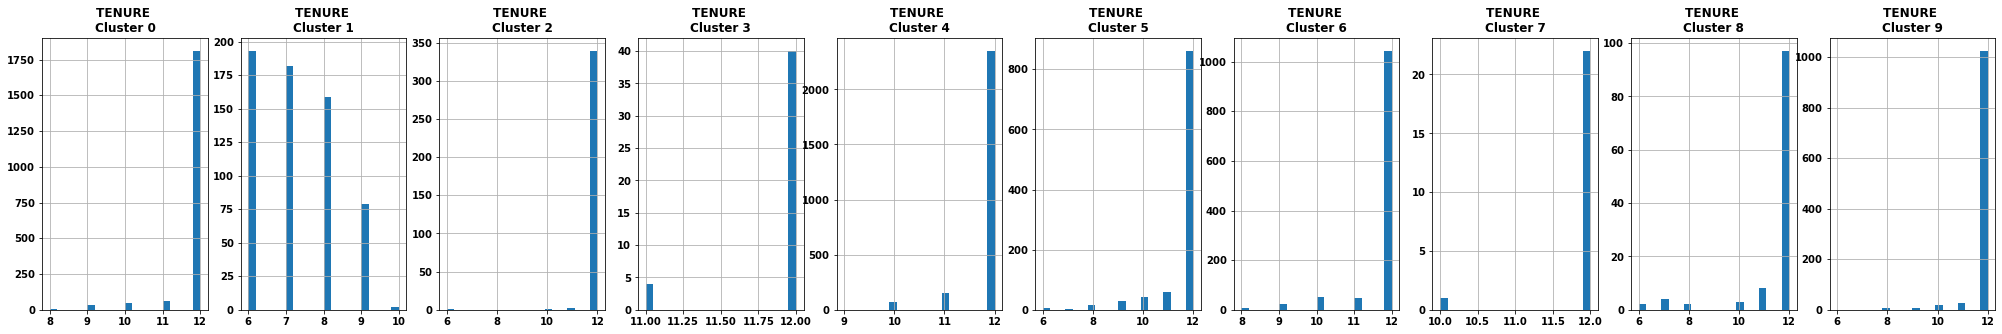

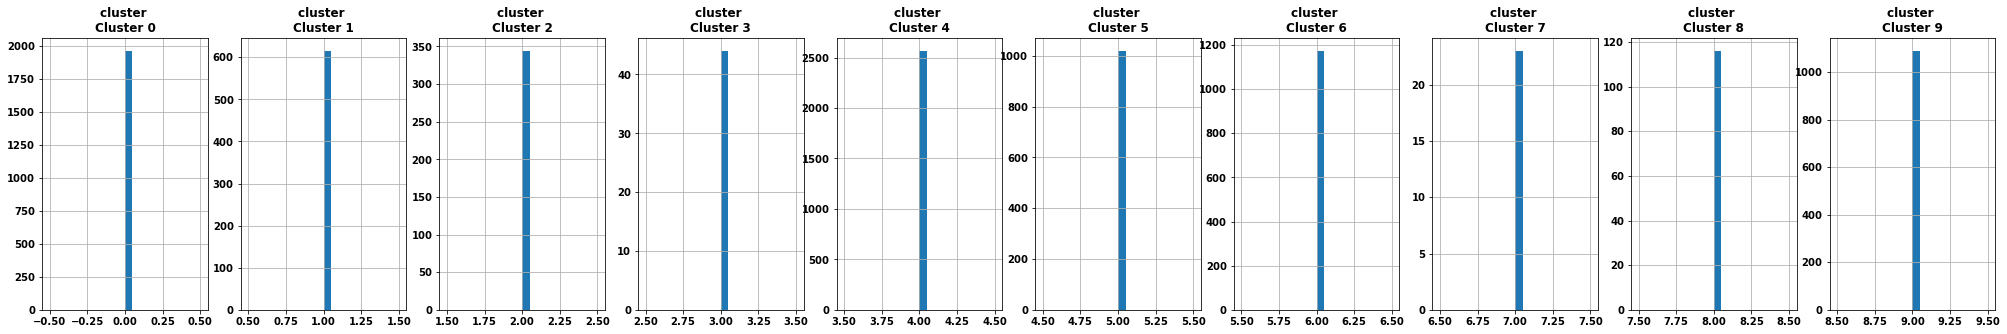

In [38]:
# Plot histograms on the various clusters within the dataset:
for i in marketing_data_labeled_df.columns:
    plt.figure(figsize=(35, 5))
    for j in range(optimum_cluster_number):
        plt.subplot(1, optimum_cluster_number, j+1)
        cluster = marketing_data_labeled_df[ marketing_data_labeled_df.cluster == j ]
        cluster[i].hist(bins=20)
        plt.title("{} \nCluster {}".format(i, j))
        
plt.show()

#### Plot out an example clusters to examine: Cluster 0

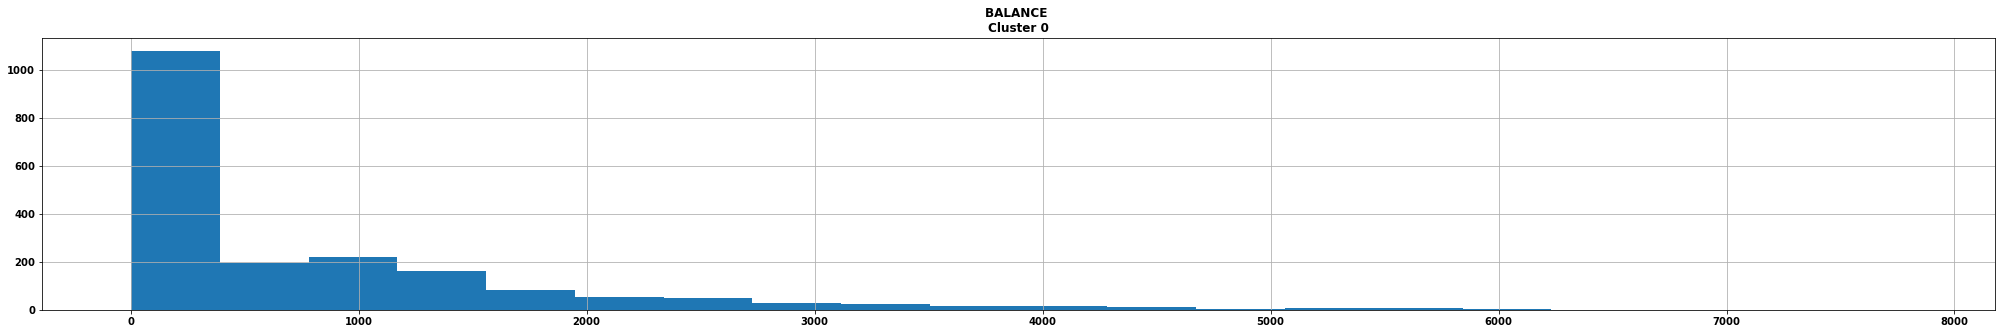

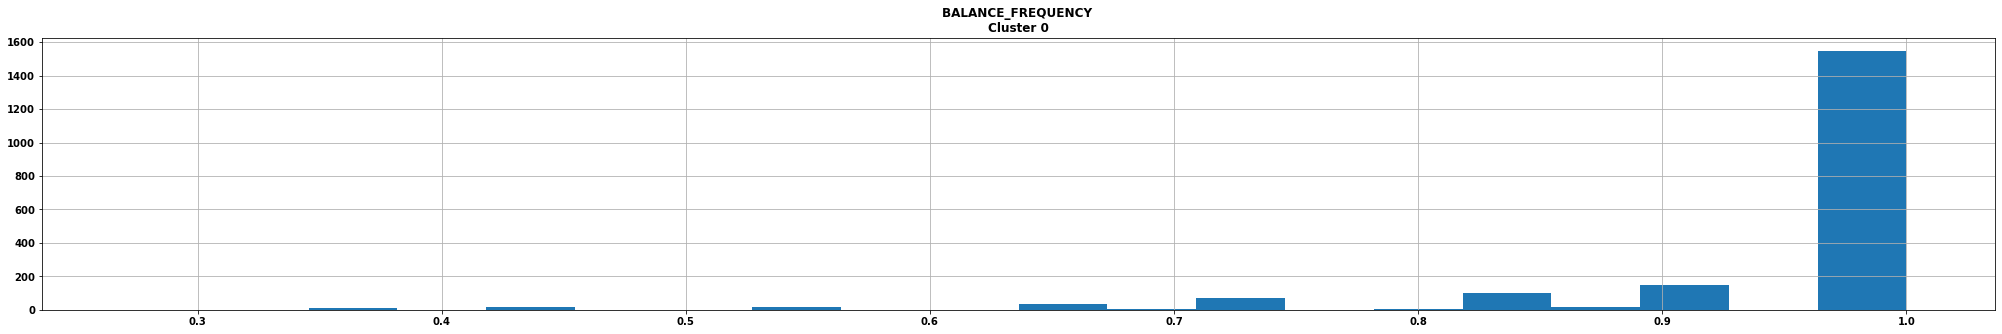

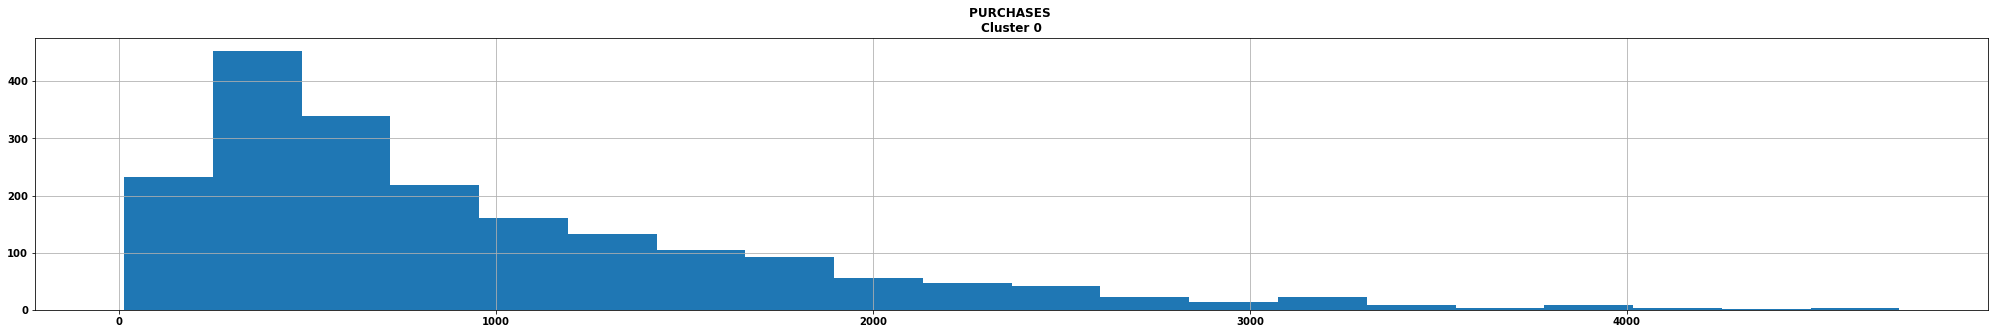

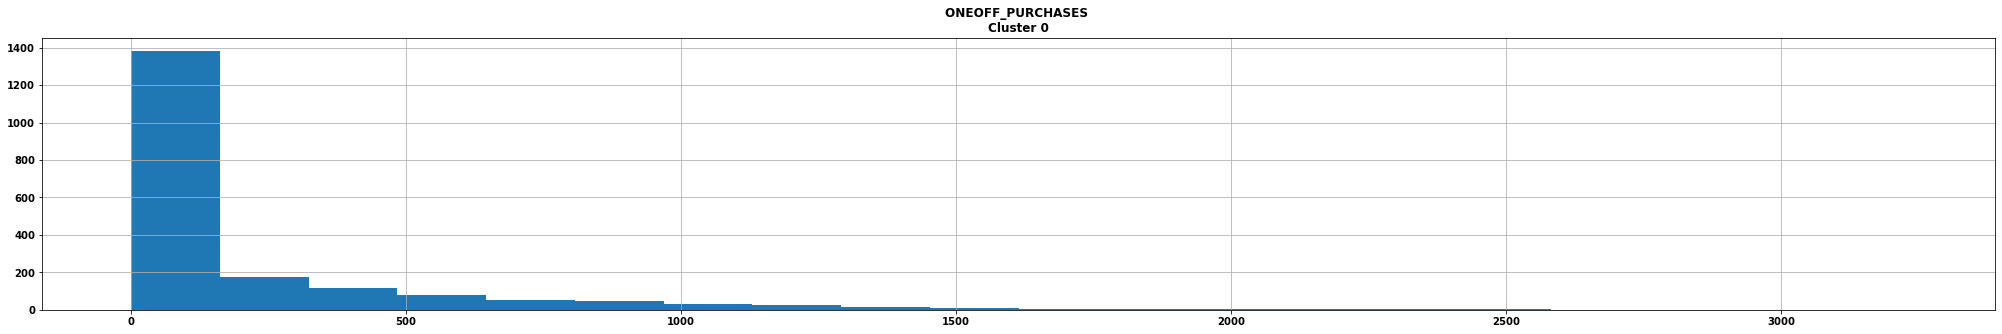

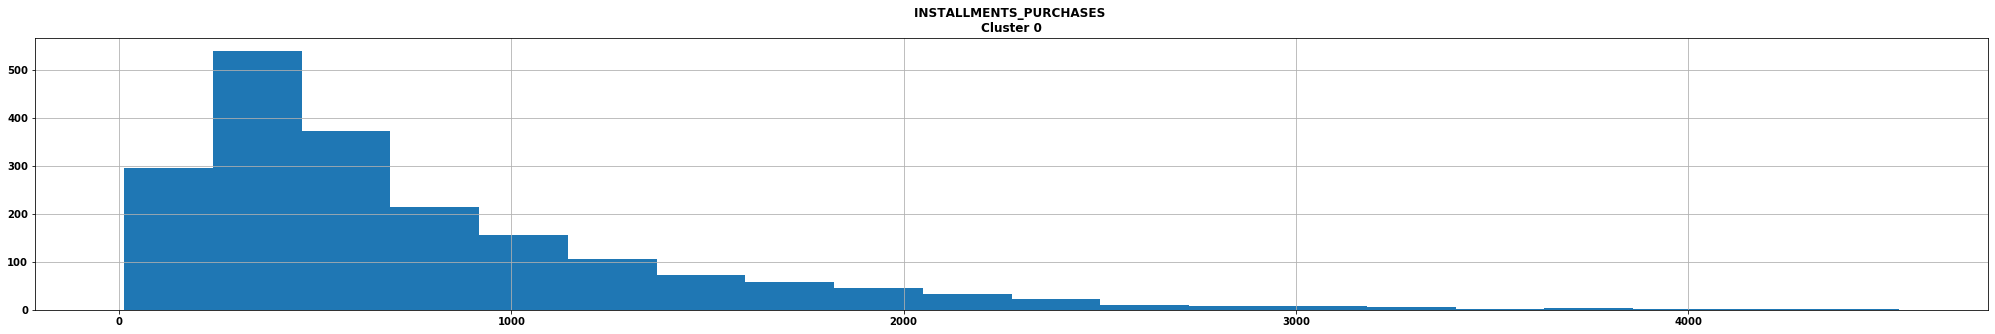

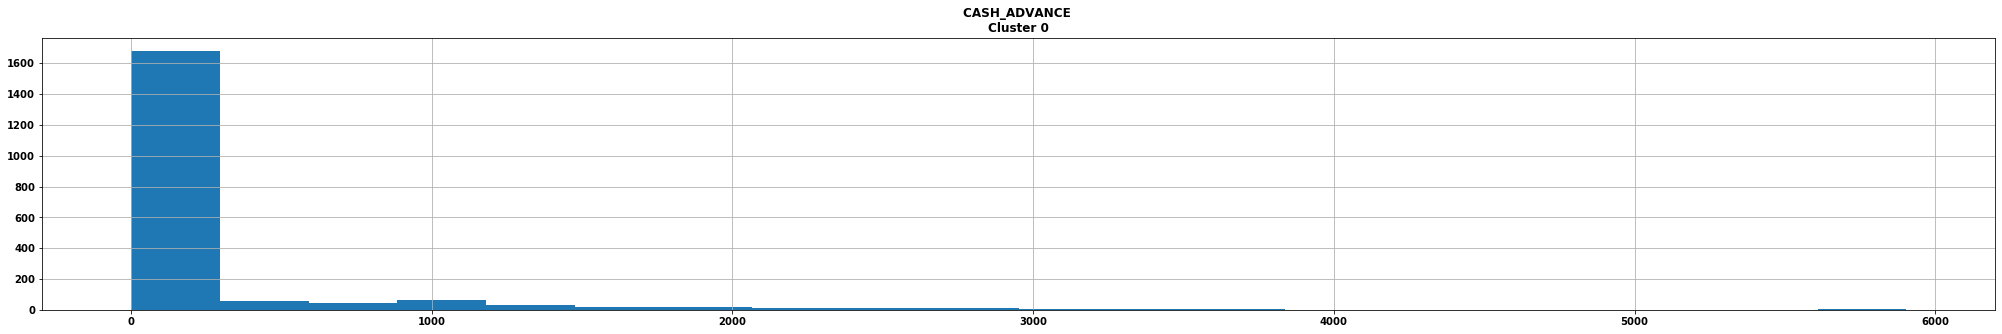

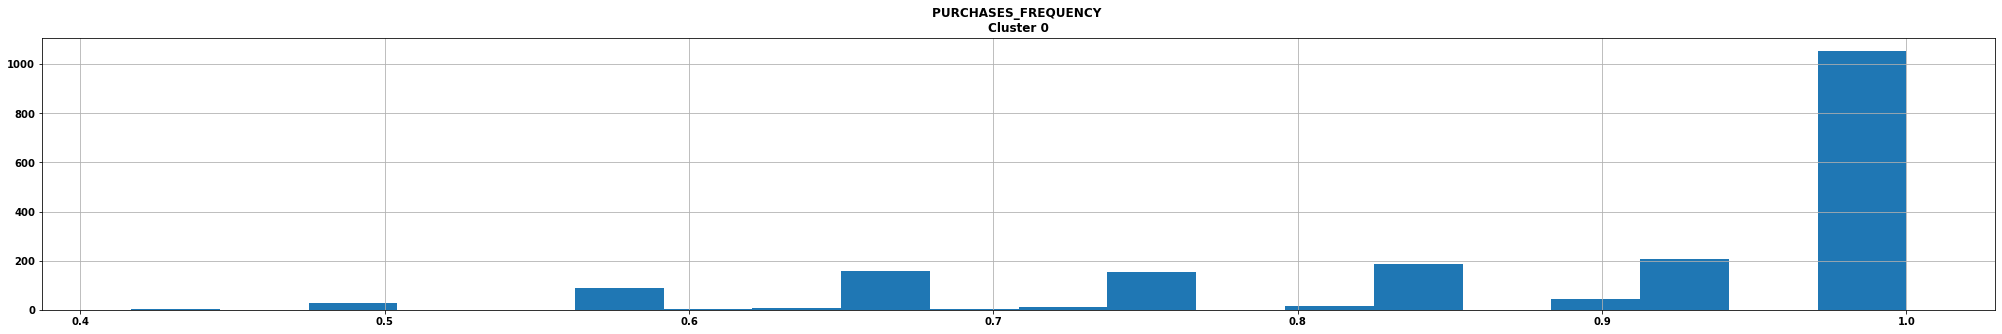

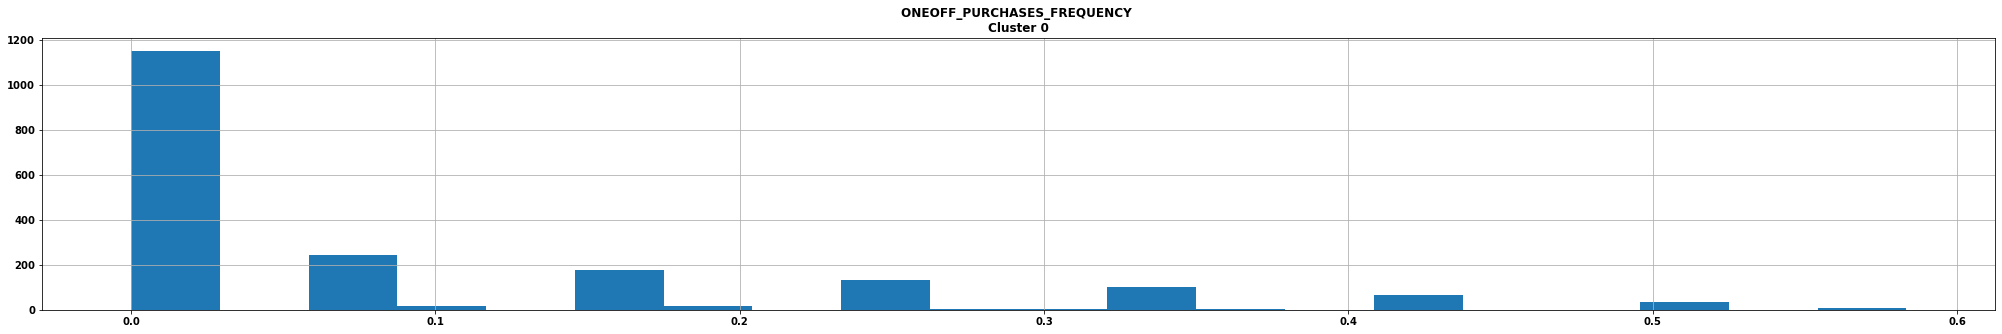

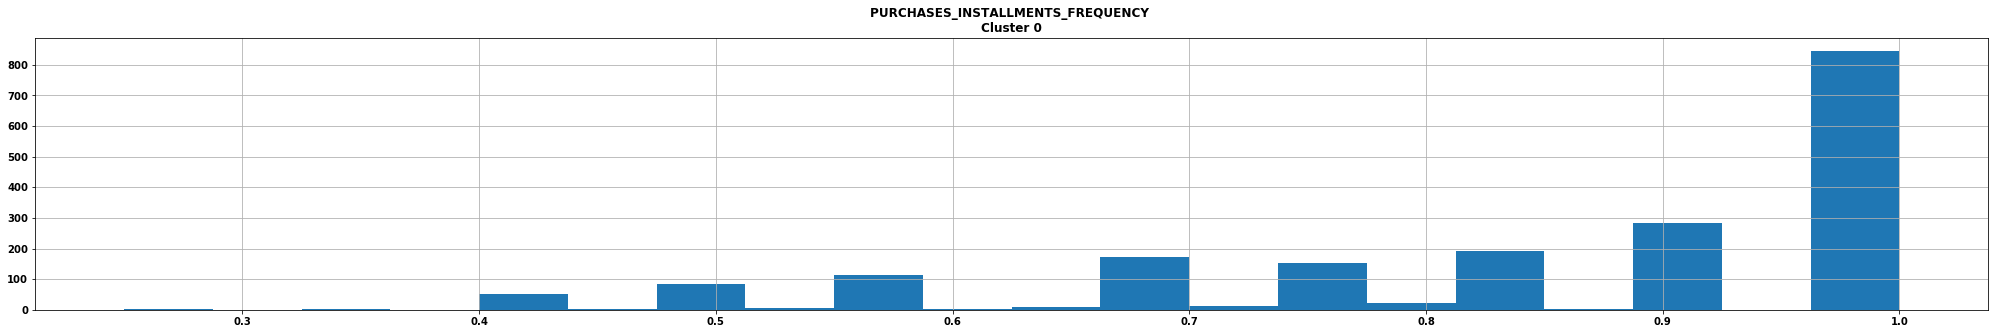

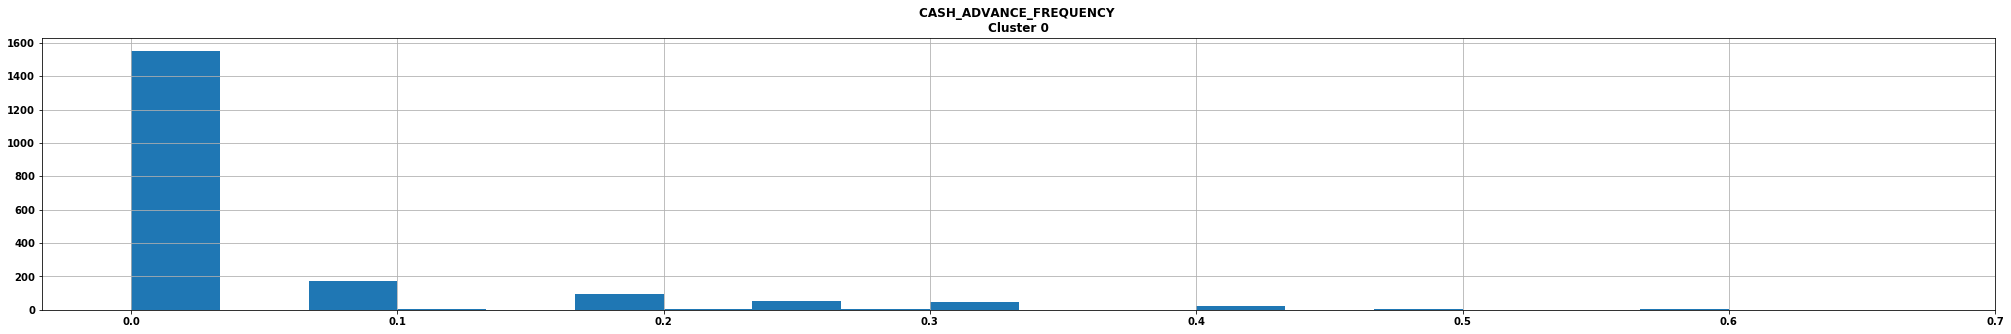

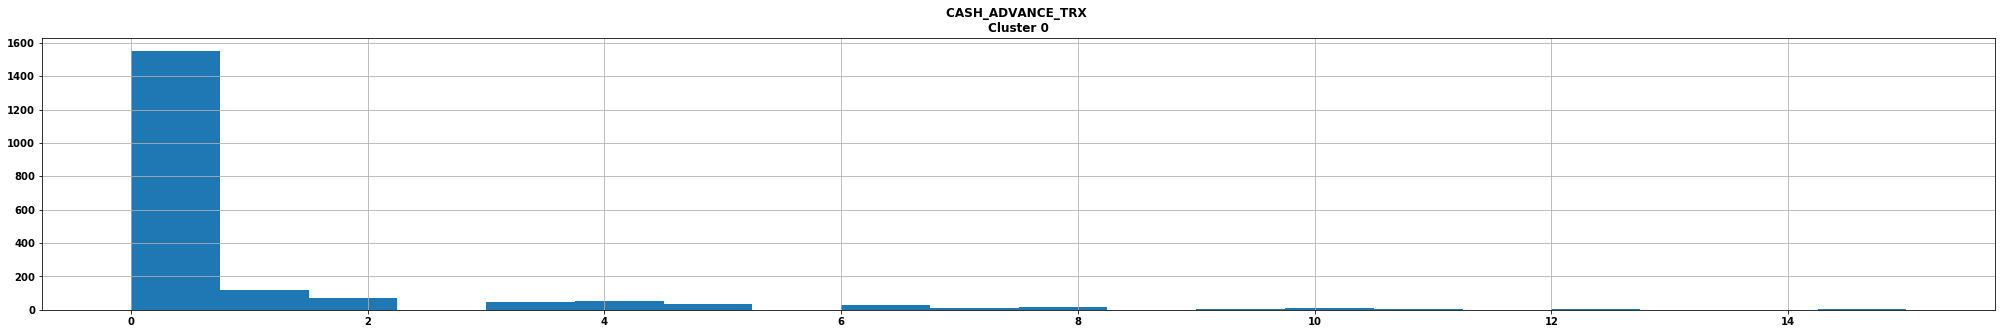

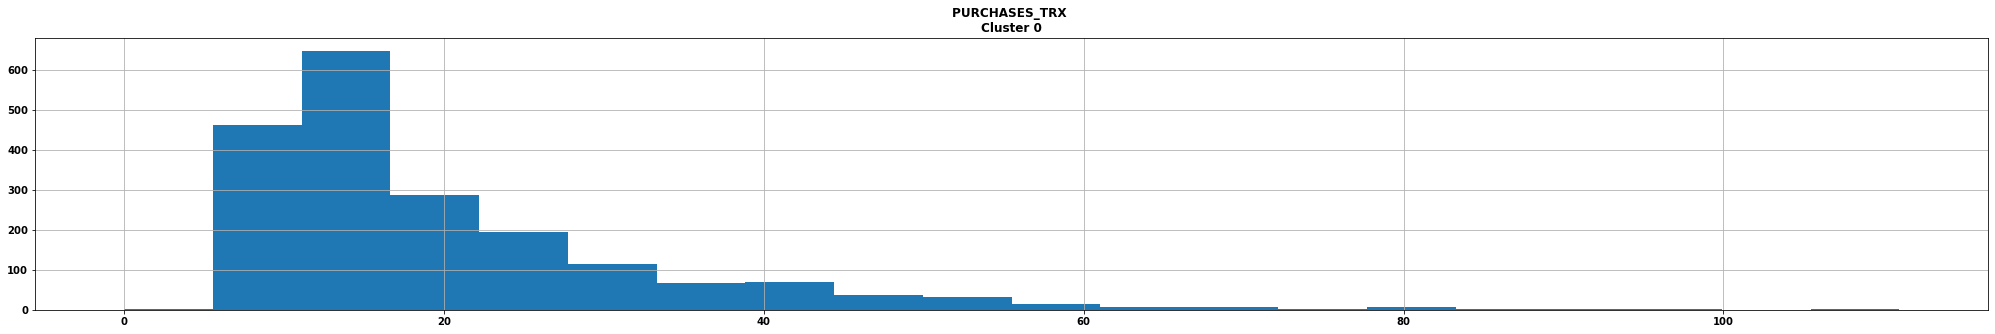

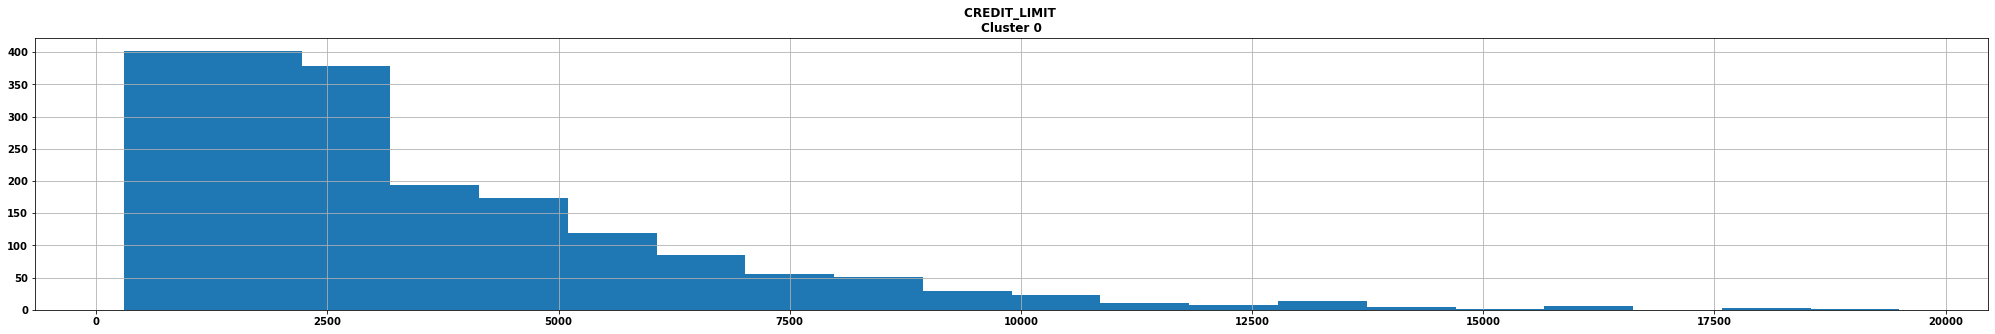

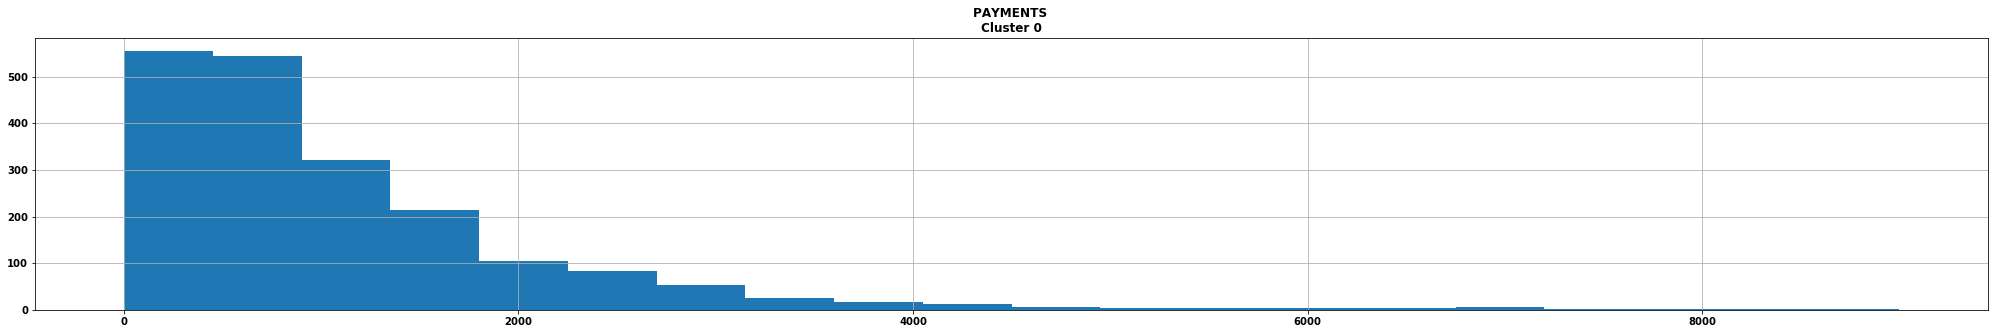

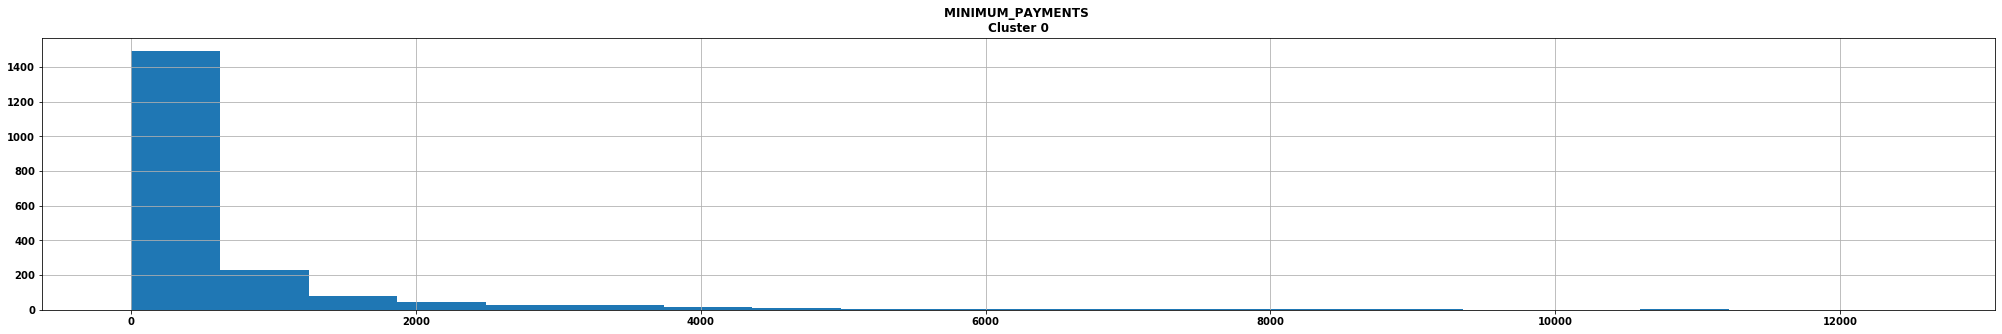

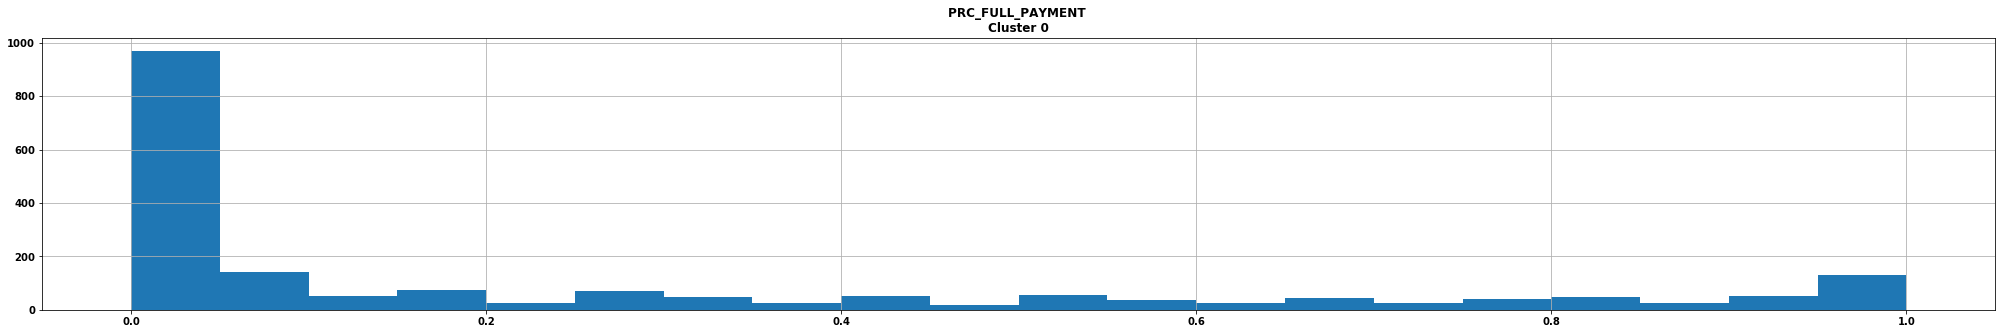

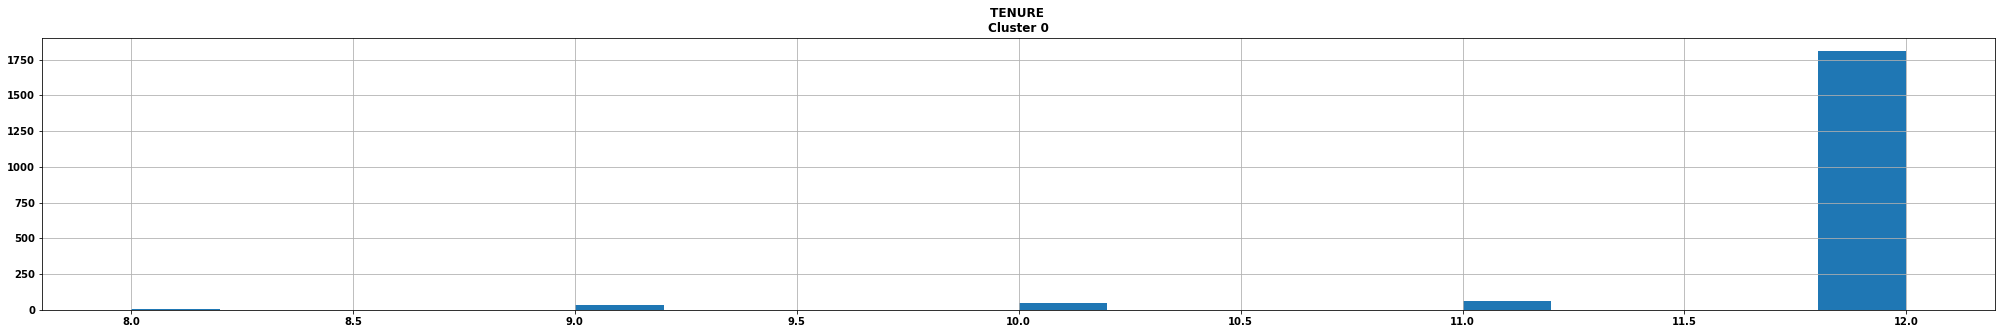

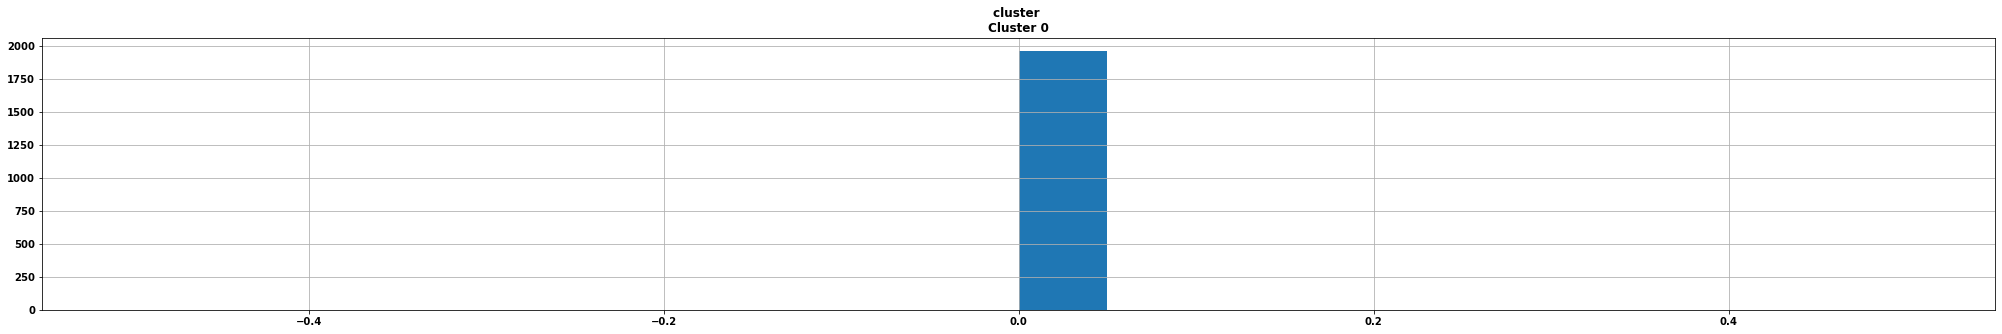

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count  1961.000000        1961.000000  1961.000000       1961.000000   
mean    779.951636           0.955622   942.740260        194.091209   
std    1076.886732           0.106067   774.016631        375.848437   
min       0.892901           0.272727    12.000000          0.000000   
25%      65.915182           1.000000   384.000000          0.000000   
50%     273.243365           1.000000   675.960000          0.000000   
75%    1137.469948           1.000000  1288.420000        227.140000   
max    7789.190958           1.000000  4723.840000       3227.850000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             1961.000000   1961.000000          1961.000000   
mean               749.104574    205.656843             0.894938   
std                631.770224    615.037048             0.140463   
min                 12.000000      0.000000             0.416667   
25%                316.890000      0.000000             0.833333   
50%                541.600000      0.000000             1.000000   
75%                987.230000      0.000000             1.000000   
max               4538.840000   5903.784384             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 1961.000000                       1961.000000   
mean                     0.089189                          0.850219   
std                      0.134617                          0.173601   
min                      0.000000                          0.250000   
25%                      0.000000                          0.750000   
50%                      0.000000                          0.916667   
75%                      0.166667                          1.000000   
max                      0.583333                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             1961.000000       1961.000000    1961.000000   1961.000000   
mean                 0.038813          0.748088      19.628761   3552.942479   
std                  0.092894          1.951916      13.253142   2778.672641   
min                  0.000000          0.000000       0.000000    300.000000   
25%                  0.000000          0.000000      12.000000   1500.000000   
50%                  0.000000          0.000000      14.000000   2500.000000   
75%                  0.000000          0.000000      24.000000   5000.000000   
max                  0.666667         15.000000     111.000000  19500.000000   

          PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  cluster  
count  1961.000000       1947.000000       1961.000000  1961.000000   1961.0  
mean   1104.220263        613.014745          0.252009    11.858746      0.0  
std    1066.543433       1146.927590          0.339387     0.542045      0.0  
min       0.000000          0.261984          0.000000     8.000000      0.0  
25%     403.594309        161.052763          0.000000    12.000000      0.0  
50%     775.413322        189.502750          0.083333    12.000000      0.0  
75%    1438.910569        569.330545          0.454545    12.000000      0.0  
max    9000.706634      12465.549380          1.000000    12.000000      0.0

In [39]:
# Define which cluster to plot:
cluster_nb_interest = 0

# # Plot histograms on the specified clusters of interest:
for i in marketing_data_labeled_df.columns:
    plt.figure(figsize=(35, 5))
    cluster = marketing_data_labeled_df[ marketing_data_labeled_df.cluster == cluster_nb_interest ]
    cluster[i].hist(bins=20)
    plt.title("{} \nCluster {}".format(i, cluster_nb_interest))
        
plt.show()

marketing_data_labeled_df[marketing_data_labeled_df.cluster == cluster_nb_interest].describe()

### Observations:

The Cluster information/charts are plot such that for each of the cluster, the corresponding attributes are in the columns below.

Taking __Cluster 0__ as an example, and see if there are some "Insights" that can be drawn from here.

General Behaviour of this group:
- These customer have the lowest balance of ~USD780.
- Their behcaviour in One-off purchases is ~USD200, and rare perform these kind of purchases compared to the other clusters.
- They have a high mean transaction frequency of 0.89 (where, 1 = frequently purchased, 0 = not frequently purchased). Meaning they rely alot on this credit card for most of their needs.
- These customer usually pay 25% of the full payment most of the time.
- Most of these customers are also very loyal customer with a mean Tenure of ~12 years.
- Overall, these customers can be described as the ones that pay the least amount of interest charges, very loyal and are careful with money. 

## 6.5 - Further Visualisation with Feature Engineering/Dimensionality Reduction: 

In this section, the following techniques will be utilised on the dataset for dimensionality reduction and visualisation:
1. Principal Component Analysis.
2. t-SNE

The reason to using these methods is because, the dataset itself presents with high dimensionality, and most plotting/visualisation tools can't be applied. To simplify things, the dataset would be reduced in dimensions from 18 columns to 2 columns (in the case of PCA) and then visualised as a 2-D graph. This can then be used to help determine if the computed number of clusters is appropriate for the task.

#### Before Continuing, let's process the "x_marketing_features" into a dataframe through the pipeline again for compatibility:

This can be done by setting the parameter "set_numpy_array" to False in the "scaler" module.

In [40]:
# ==============================================================================
# 1. Impute the missing values.
# ==============================================================================
# list the columns to impute:
columns_to_impute = ['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']

# Apply the custom encoder for Ordinal columns, instantiate:
cc_impute_columns = CustomImputer(col=columns_to_impute, impute_strategy='mean', print_log=False)

# ==============================================================================
# 2. Drop the unwanted columns.
# ==============================================================================
# list the columns to drop:
columns_to_drop = ['CUST_ID']

# Apply the custom encoder for Ordinal columns, instantiate:
cc_drop_columns = CustomDropUnwantedColumns(col=columns_to_drop)

# ==============================================================================
# 3. Scale the features in the dataset:
# ==============================================================================
# scaler = scale_features_dataFrame()
scaler = scale_features_dataFrame(scaler_type='Standard', set_numpy_array=False)


In [41]:
# Define the Pipeline Sequence:
pipe_preprocessing = Pipeline(steps=[("impute", cc_impute_columns),
                                     ("drop_columns", cc_drop_columns),
                                     ("scaler", scaler)]
                             )

# Fit the Pipeline to the Dataset:
pipe_preprocessing.fit(marketing_data_df)

# Transform the Dataset:
marketing_processed_df = pipe_preprocessing.transform(marketing_data_df)
x_marketing_features_df = marketing_processed_df

# Inspect:
x_marketing_features_df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    -0.731989          -0.249434  -0.424900         -0.356934   
1     0.786961           0.134325  -0.469552         -0.356934   
2     0.447135           0.518084  -0.107668          0.108889   
3     0.049099          -1.016953   0.232058          0.546189   
4    -0.358775           0.518084  -0.462063         -0.347294   
...        ...                ...        ...               ...   
8945 -0.737950           0.518084  -0.333293         -0.356934   
8946 -0.742423           0.518084  -0.329136         -0.356934   
8947 -0.740398          -0.185477  -0.401965         -0.356934   
8948 -0.745174          -0.185477  -0.469552         -0.356934   
8949 -0.572575          -0.889033   0.042146          0.301732   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  -0.349079     -0.466786            -0.806490   
1                  -0.454576      2.605605            -1.221758   
2                  -0.454576     -0.466786             1.269843   
3                  -0.454576     -0.368653            -1.014125   
4                  -0.454576     -0.466786            -1.014125   
...                      ...           ...                  ...   
8945               -0.132643     -0.466786             1.269843   
8946               -0.122823     -0.466786             1.269843   
8947               -0.294893     -0.466786             0.854576   
8948               -0.454576     -0.449352            -1.221758   
8949               -0.454576     -0.406205             0.439310   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                      -0.678661                         -0.707313   
1                      -0.678661                         -0.916995   
2                       2.673451                         -0.916995   
3                      -0.399319                         -0.916995   
4                      -0.399319                         -0.916995   
...                          ...                               ...   
8945                   -0.678661                          1.179833   
8946                   -0.678661                          1.179833   
8947                   -0.678661                          0.760469   
8948                   -0.678661                         -0.916995   
8949                    1.556082                         -0.916995   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                  -0.675349         -0.476070      -0.511333     -0.960433   
1                   0.573963          0.110074      -0.591796      0.688639   
2                  -0.675349         -0.476070      -0.109020      0.826062   
3                  -0.258913         -0.329534      -0.551565      0.826062   
4                  -0.675349         -0.476070      -0.551565     -0.905464   
...                      ...               ...            ...           ...   
8945               -0.675349         -0.476070      -0.350408     -0.960433   
8946               -0.675349         -0.476070      -0.350408     -0.960433   
8947               -0.675349         -0.476070      -0.390639     -0.960433   
8948                0.157527         -0.182998      -0.591796     -1.097856   
8949                0.990398         -0.182998       0.333524     -0.905464   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0    -0.528979     -3.109675e-01         -0.525551  0.360680  
1     0.818642      8.931021e-02          0.234227  0.360680  
2    -0.383805     -1.016632e-01         -0.525551  0.360680  
3    -0.598688     -5.366135e-16         -0.525551  0.360680  
4    -0.364368     -2.657913e-01         -0.525551  0.360680  
...        ...               ...               ...       ...  
8945 -0.486217     -3.498541e-01          1.183951 -4.122768  
8946 -0.503396     -5.366135e-16         -0.525551 -4.122768  
8947 -0.570615     -3.354655e-01          0.329200 -

#### Attach the Labels from K-Means to "x_marketing_features_df" dataframe:

In [42]:
# Update the "x_marketing_features_df" with a new Column (labels): concatenate.
marketing_data_labeled_df = pd.concat([x_marketing_features_df, 
                                       pd.DataFrame({'cluster': labels_10Clusters})], 
                                      axis=1)

# Inspect:
marketing_data_labeled_df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.731989          -0.249434  -0.424900         -0.356934   
1  0.786961           0.134325  -0.469552         -0.356934   
2  0.447135           0.518084  -0.107668          0.108889   
3  0.049099          -1.016953   0.232058          0.546189   
4 -0.358775           0.518084  -0.462063         -0.347294   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349079     -0.466786            -0.806490   
1               -0.454576      2.605605            -1.221758   
2               -0.454576     -0.466786             1.269843   
3               -0.454576     -0.368653            -1.014125   
4               -0.454576     -0.466786            -1.014125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678661                         -0.707313   
1                   -0.678661                         -0.916995   
2                    2.673451                         -0.916995   
3                   -0.399319                         -0.916995   
4                   -0.399319                         -0.916995   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.675349         -0.476070      -0.511333     -0.960433   
1                0.573963          0.110074      -0.591796      0.688639   
2               -0.675349         -0.476070      -0.109020      0.826062   
3               -0.258913         -0.329534      -0.551565      0.826062   
4               -0.675349         -0.476070      -0.551565     -0.905464   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT   TENURE  cluster  
0 -0.528979     -3.109675e-01         -0.525551  0.36068        4  
1  0.818642      8.931021e-02          0.234227  0.36068        5  
2 -0.383805     -1.016632e-01         -0.525551  0.36068        9  
3 -0.598688     -5.366135e-16         -0.525551  0.36068        4  
4 -0.364368     -2.657913e-01         -0.525551  0.36068        4

### 6.5.1 - Reduce the dimensions and Visualise with Principal Component Analysis:

PCA is a Feature Transformation technique, where it takes several correlated features from the dataset and projects them onto a coordinate (axis) space that has fewer correlated features. These new uncorrelated columns (features) are called Principal Components. Principal Components serves as an alternative coordinate system to the original feature space, where it requires fewer features that is able to capture most of the variance as possible. The resultant fewer features after transformation also means that the dimensions of the dataset have been reduced.  

##### In this case, PCA will be used to visualise the segmentation of the customer into its repective clusters from K-means model. 

In [43]:
# Import the required libraries:
from sklearn.decomposition import PCA

In [44]:
# Instantiate the Principal Component Analysis:
pca = PCA(n_components=2)

# Fit the PCA to the Dataset, to get the Principal Components:
principal_components = pca.fit_transform(marketing_data_labeled_df)

# Examine the change in shape:
print("Original Dataset shape:   ", marketing_data_labeled_df.shape)
print("PCA Transformed shape:", principal_components.shape)

Original Dataset shape:    (8950, 18)
PCA Transformed shape: (8950, 2)


As it can be seen the dimensions of the dataset was reduced from 18 columns to just 2 columns.

#### Visualise the Principal Components:

In [45]:
# Create a DataFrame for the 2 Principal Components:
pca_df = pd.DataFrame(data=principal_components, columns=['pca1', 'pca2'])

# Add the Labels:
pca_df = pd.concat([pca_df, 
                    pd.DataFrame({'cluster': labels_10Clusters})], 
                   axis=1)

# Inspect:
pca_df.head()

pca1      pca2  cluster
0 -0.103833 -1.653371        4
1  1.605461 -1.272191        5
2  5.305979  0.761737        9
3  0.396335 -0.905938        4
4 -0.004483 -1.585744        4

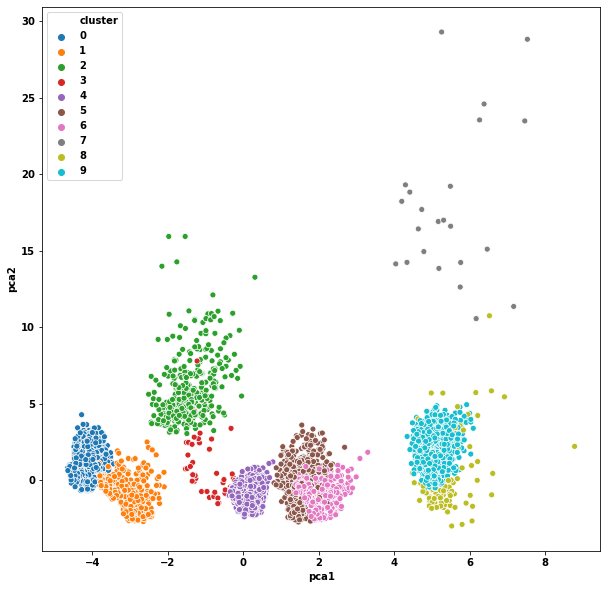

In [46]:
# Plot:
plt.figure(figsize=(10, 10))

ax = sns.scatterplot(x='pca1',
                     y='pca2',
                     hue="cluster",
                     data=pca_df,
                     palette="tab10")
plt.show()

### Observation:

From the plot above, 10 clusters (as suggested by the Elbow method + Silhouette score) seems to be optimum ammount, and does show that most of the groups are separate relatively well. However the PCA plot also shows that some clusters are overlapping each other. 

Here, the clusters that overlaps each other are "brown and pink", "cyan and olive" and hence further refinement to the clustering process should be implemented to achieve a clearer picture of customer segmentation for the Marketing Department. Notice that there is a strange group of data points in the "Grey" cluster, where the data points are not bunched up together like the rest. These could be the outliers in the dataset and this may be useful to creating a new market segment for customers that exhibit this kind of behaviour.

Let's try another method for visualisation to see if this problem of overlapping  is also present in the next section.

### 6.5.2 - Reduce the dimensions and Visualise with T-distributed Stochastic Neighbor Embedding (t-SNE): 

T-distributed Stochastic Neighbor Embedding (t-SNE) can be described as a non-linear technique used for dimensionality reduction. It is highly suitable for visualisation tasks of high-dimensional datasets.

It minimises the divergence between two distributions. These two distributions are firstly, a distribution that measures pairwise similarities of the input objects and secondly, a distribution that measures pairwise similarities of the corresponding low-dimensional points in the embedding (codes). Overall, it maps multi-dimensional data into a lower dimensional space, and to find patterns inherent of the dataset to identify clusters based on similarity of data points wiht multiple features. Note that inference cannot be done or be based on the t-SNE output, as it is mainly for data visualisation.

Source: https://www.datacamp.com/community/tutorials/introduction-t-sne

In [47]:
# Import the require library:
from sklearn.manifold import TSNE

In [48]:
# Instantiate a t-SNE object:
tsne = TSNE(n_components=2, perplexity=30.0, verbose=1)

# Fit the PCA to the Dataset, to get the Principal Components:
tsne_df = tsne.fit_transform(marketing_data_labeled_df)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8950 samples in 0.035s...
[t-SNE] Computed neighbors for 8950 samples in 1.290s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8950
[t-SNE] Computed conditional probabilities for sample 2000 / 8950
[t-SNE] Computed conditional probabilities for sample 3000 / 8950
[t-SNE] Computed conditional probabilities for sample 4000 / 8950
[t-SNE] Computed conditional probabilities for sample 5000 / 8950
[t-SNE] Computed conditional probabilities for sample 6000 / 8950
[t-SNE] Computed conditional probabilities for sample 7000 / 8950
[t-SNE] Computed conditional probabilities for sample 8000 / 8950
[t-SNE] Computed conditional probabilities for sample 8950 / 8950
[t-SNE] Mean sigma: 0.433106
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.460938
[t-SNE] KL divergence after 1000 iterations: 1.251963


In [49]:
# Convert to DataFrame:
tSNE_result_df = pd.DataFrame(tsne_df, columns=['tSNE1', 'tSNE2'])
tSNE_result_df.head()

# Add the Labels:
tSNE_result_df = pd.concat([tSNE_result_df, 
                    pd.DataFrame({'cluster': labels_10Clusters})], 
                   axis=1)

# Inspect:
tSNE_result_df.head()

tSNE1      tSNE2  cluster
0 -67.111412   3.106045        4
1 -10.280017  45.615299        5
2  70.480400 -31.215096        9
3 -39.482410   8.649080        4
4 -66.969406 -10.644794        4

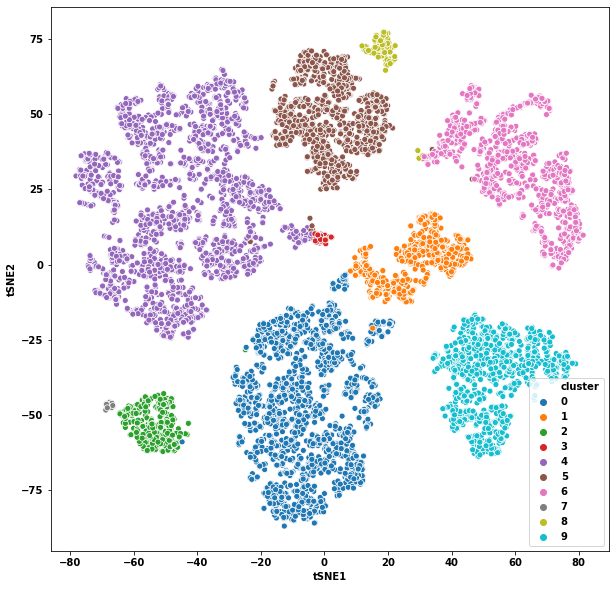

In [50]:
# Plot:
plt.figure(figsize=(10, 10))

ax = sns.scatterplot(x='tSNE1',
                     y='tSNE2',
                     hue="cluster",
                     data=tSNE_result_df,
                     palette="tab10")
plt.show()

### Observations:

Unlike PCA, t-SNE was able to segment the customer's behaviour clearer, meaning that there are not a lot of cluster overlaps. However, it can be seen that "purple and red" cluster are clearly overlapping or group together. This suggests that a slight refinement to the number of cluster should still be done.

## 7 - Refining the Number of Clusters with Deep Learning AutoEncoders:

These Auto-Encoders are a special kind of Encoder-Decoder, where for such a task that the input and target domains presents to be the same, like images, the Auto-Encoder should properly encode and decode these images without having any impact on the quality. It should perform all of these despite its inherent bottleneck in desgin. Overall, the process begins with the inputs being converted into a compressed representation into the latent space by the Encoder network, where these feature vectors (compressed representations) will be reconstructed by the Decoder network. The distance between the input and output data is usually the loss calculation that would be minimised. The training process for Auto-Encoders are simpler than others largely due to no requirements for ground truth labels, this is because the input images themselves are used as the ground truth. These kinds of model are typically called Self-Supervised Models.

##### Below shows the Model Architecture:

<img src="Description Images/autoencode_neural_network.png" width="750">

Image Ref -> https://quantdare.com/dimensionality-reduction-method-through-autoencoders/


In the case of this project, the AutoEncoder here will be trained to perform Dimensionality Reduction. 

So why perform dimensionality reduction?

This is because clustering can be difficult to do in high dimensions due to the similarity in distance value between most pairs of points. This was experienced in the previous sections where there are a lot of overlapping clusters. Utilising an AutoEncoder allows for the re-represent high dimensional points in a lower-dimensional space.

The AutoEncoder model will ingest the input feature dataset in the Encoder layer, convert/encoding it into codes in the latent space and subsequently decodes it back to the original dataset in the Decoder layer. 

In [51]:
# Import the required Libraries:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.initializers import glorot_uniform

#### 7.1.1 - Define the Global AutoEncoder model Parameters:

In [52]:
batch_size = 256
nb_epochs = 100

#### 7.1x_marketing_features.2 - Build the AutoEncoder:

The model will be composed of two parts/modules:

1) Is the __Encoder__ module, where it will convert the input into codes (or the latent space), these are tensors of lower dimensionality. \
2) Is the __Decode__ module, wher it will take the codes as the input and will try to recover and rebuild the original data.

The model will be constructed with __3 Dense Layers for the Encoder__, then in the subsequent layers, the layers will be decreased slowly down to the dimensionality of the __Code Size__. Once reaching the Codes layer, the __Decoder__ layers will be upsampled back to the __Original Dimensions__ once again.

##### Defining the size of the Latent Space or Codes layer:

Here the codes layer will be defined as a 10-dimensional vectors. Comparing this to the input vectors of 17-dimensional vectors, where shape of the dataset is (8950 x 17), (without the Label Column, "x_marketing_features_df").

In [53]:
# Set the Code_Size:
code_size = 10

In [54]:
# Define the number of nodes in the Input Layer and the Output Layer:
input_shape = x_marketing_features_df.shape[1]
output_shape = x_marketing_features_df.shape[1]

# Design the AutoEncoder model:

inputs = Input(shape=input_shape, name='input')

# Encoder - encoding layers:
encoder_1 = Dense(units=500, activation='relu', 
                  kernel_initializer='glorot_uniform', name='enc_dense1')(inputs)
encoder_2 = Dense(units=500, activation='relu', 
                  kernel_initializer='glorot_uniform', name='enc_dense2')(encoder_1)
encoder_3 = Dense(units=2000, activation='relu', 
                  kernel_initializer='glorot_uniform', name='enc_dense3')(encoder_2)

# Code Layer:
encoded = Dense(units=code_size, activation='relu', 
                kernel_initializer='glorot_uniform', name='enc_dense4')(encoder_3)

# Decoder - decoding layers:
decoder_1 = Dense(units=2000, activation='relu',
                  kernel_initializer='glorot_uniform', name='dec_dense1')(encoded)
decoder_2 = Dense(units=500, activation='relu',
                  kernel_initializer='glorot_uniform', name='dec_dense2')(decoder_1)
decoder_3 = Dense(units=500, activation='relu',
                  kernel_initializer='glorot_uniform', name='dec_dense3')(decoder_2)
decoded = Dense(units = output_shape, name='dec_dense4')(decoder_3)

# Instantiate the AutoEncoder Model:
autoEncoder = Model(inputs, decoded)
autoEncoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 17)]              0         
_________________________________________________________________
enc_dense1 (Dense)           (None, 500)               9000      
_________________________________________________________________
enc_dense2 (Dense)           (None, 500)               250500    
_________________________________________________________________
enc_dense3 (Dense)           (None, 2000)              1002000   
_________________________________________________________________
enc_dense4 (Dense)           (None, 10)                20010     
_________________________________________________________________
dec_dense1 (Dense)           (None, 2000)              22000     
_________________________________________________________________
dec_dense2 (Dense)           (None, 500)               100050

#### The above represents the complete model of the Auto-Encoder where the Encoder and Decoder layers will be trained together. 

__However__, it is more convenient to split the modules apart, where each would be defined as a separate model with each having their respective layers being wrapped.

#### For the Encoder, the layers from the input to the code layer will be wrapped into a model, seen with the following:

This Encoder model will take in 17-Dimensional Features dataset as its inputs and return the codes for storing.

In [55]:
# Define the wrapped encoder model:
encoder = Model(inputs, encoded)

# Model summary:
encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 17)]              0         
_________________________________________________________________
enc_dense1 (Dense)           (None, 500)               9000      
_________________________________________________________________
enc_dense2 (Dense)           (None, 500)               250500    
_________________________________________________________________
enc_dense3 (Dense)           (None, 2000)              1002000   
_________________________________________________________________
enc_dense4 (Dense)           (None, 10)                20010     
Total params: 1,281,510
Trainable params: 1,281,510
Non-trainable params: 0
_________________________________________________________________


#### For the Decoder, the model will be composed of the decoding layers of the AutoEncoder defined above, where it would take in the __input codes__ (from the encoder) and then proceeds to return the output 17-Dimensional Dataset.

There is a problem here, that is the AutoEncoder model's decoding layers are linked to the encoding layers, this will be decoupled and it will instead be connected to a __new__ "Input". This Input will represent the "codes" from the encoder model. To do this, there is a need to detch the decoding layers and then build a new graph based on them.

In [56]:
# Define the NEW Input: code layer.
input_code = Input(shape = (code_size,), 
                   name = 'input_code')

# Rebuild a New Decoder that is based off the AutoEncoder's decoding layers:

# Count the number of decoding layers: Should be 3 in this case.
nb_decoder_layer = 0

for layer in autoEncoder.layers:
    if 'dec_dense' in layer.name:
        nb_decoder_layer += 1

# Apply each layer to the new data to construct a new graph:
dec_i = input_code

# Loop to iterate from the 2 to 0:
for i in range(nb_decoder_layer, 0, -1):
    # Get the decoder layers from the AutoEncoder model, one at a time:
    decoder_layer = autoEncoder.layers[-i]
    
    # Construct the new graph, with same parameters:
    dec_i = decoder_layer(dec_i)
    
# Instantiate the Decoder model based on the newly graphed layers:
decoder = Model(input_code, dec_i)

# Model summary:
decoder.summary()       


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_code (InputLayer)      [(None, 10)]              0         
_________________________________________________________________
dec_dense1 (Dense)           (None, 2000)              22000     
_________________________________________________________________
dec_dense2 (Dense)           (None, 500)               1000500   
_________________________________________________________________
dec_dense3 (Dense)           (None, 500)               250500    
_________________________________________________________________
dec_dense4 (Dense)           (None, 17)                8517      
Total params: 1,281,517
Trainable params: 1,281,517
Non-trainable params: 0
_________________________________________________________________


### 7.2 - Train AutoEncoder Model:

Recall that this is an Unsupervised way of training the model, meaning that the input data is also the output data.

In [57]:
# Compile the model:
autoEncoder.compile(optimizer='adam', loss='mean_squared_error')


In [58]:
# running time calculation
start = timeit.default_timer()

# Train the model:
history = autoEncoder.fit(x=x_marketing_features_df,
                          y=x_marketing_features_df,
                          batch_size=batch_size,
                          epochs=nb_epochs,
                          verbose=0)

# Stop the timer:
stop = timeit.default_timer()
print('Time: {} Minutes'.format(round((stop - start)/60, 2)))
print('Time: {} hours'.format(round((stop - start)/3600, 2)))

Time: 0.15 Minutes
Time: 0.0 hours


### 7.3 - Using the Encoder part to perform the Dimensionality Reduction:

Here, the Encoder portion of the model is used. Below highlights the portion of the model:

<img src="Description Images/encoder_portion.png" width="750">

Image Ref -> https://quantdare.com/dimensionality-reduction-method-through-autoencoders/

From the diagram, the hidden layer (latent space) is where the "compressed data" is found, or in other words, effectively at this layer, the dimensions of the input dataset have been reduced.

In [59]:
# Use the Encoder to predict on the input dataset to perform Dimensionality reduction.
x_dimension_reduced = encoder.predict(x=x_marketing_features_df)

# Inspect the shape of the data:
x_dimension_reduced.shape

(8950, 10)

As it can be seen, the dimensions have been reduced from 17 columns to just 10, as specified. Of course there are some experimentation that can be performed to find an optimum number, or an alternative choice is to set the units in the codes layer = 2, and the model will perform a similar job to PCA (n_components=2).

## 8 - Perform the K-Means Clustering with the Dimension Reduced Dataset: 

The dataset -> x_dimension_reduced

Here the process is similar to what was applied in the earlier clustering section.

### 8.1 - Determine the optimum number of clusters: 

#### 8.1.1 - WCSS (Elbow Method):



In [60]:
# Import the required Libraries:
from sklearn.cluster import KMeans

In [61]:
# Define the empty WCSS list to be filled:
wcss_list_encoder = []

# Set the range of clusters to compute over:
list_clusters = range(1, 20)

# Compute the Clusters with K-means to find the optimum numberr of clusters:
for idx in list_clusters:
    kmeans_model = KMeans(n_clusters=idx, 
                          init='k-means++',
                          max_iter=300, 
                          n_init=10, 
                          random_state=101,
                          algorithm='auto')
    
    # fit the model to the dataset:
    kmeans_model.fit(x_dimension_reduced)
    
    # Update/Append the list (WCSS):
    wcss_list_encoder.append(kmeans_model.inertia_)

##### Plot the Elbow Method:

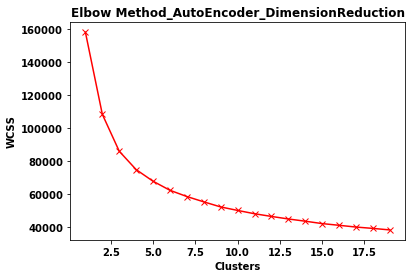

In [62]:
plt.plot(list_clusters, wcss_list_encoder, 'bx-', color = 'r')
plt.title('Elbow Method_AutoEncoder_DimensionReduction')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

#### Let's inspect both Elbow Methods:

Comparing the Elbow method with and without the use of an AutoEncoder.

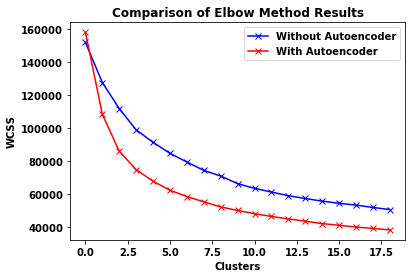

In [63]:
plt.plot(wcss_list, 'bx-', color='b', label='Without Autoencoder')
plt.plot(wcss_list_encoder, 'bx-', color='r', label='With Autoencoder')
plt.title('Comparison of Elbow Method Results')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.legend()
plt.show()

### Observation:

From the chart, it can be discerned that the optimum __number of cluster is around 4 to 6__ for the Clustering model with AutoEncoder.

#### 8.1.2 - Silhouette Scores Method:

Let's utilise the Silhouette score to obtain the finalised optimum number of clusters.

In [64]:
# Import the required Library:
from sklearn.metrics import silhouette_score

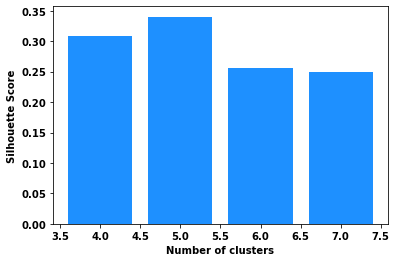

In [65]:
# Define an empty list of silhouette scores to be filled:
silhouette_scores_list_encoder = [] 

# Compute the scores for each of the number of clusters: number of cluster will be 5 to 15.
for nb_cluster in range(4, 8):
    silhouette_scores_list_encoder.append( 
        silhouette_score(x_dimension_reduced, KMeans(n_clusters=nb_cluster, 
                                                      init='k-means++',
                                                      max_iter=300, 
                                                      n_init=10, 
                                                      random_state=101,
                                                      algorithm='auto').fit_predict(x_dimension_reduced)
                        )) 
    
# Plot: Compare the results.
k = list( range(4, 8) )
plt.bar(k, silhouette_scores_list_encoder, color='dodgerblue') 
plt.xlabel('Number of clusters', fontsize=10) 
plt.ylabel('Silhouette Score', fontsize=10) 
plt.show()

In [66]:
# Save the scores as DataFrame:
silhouette_scores_df = pd.DataFrame({'k_clusters': k, 
                                     'silhouette_scores': silhouette_scores_list_encoder})

# Save the Optimum Cluster Number:
optimum_cluster_number = silhouette_scores_df.k_clusters[ silhouette_scores_df.silhouette_scores.idxmax() ]
print("The optimum number of clusters that should be used is: {}".format(optimum_cluster_number))

The optimum number of clusters that should be used is: 5


### 8.2 - Apply the K-Means Model: 


In [67]:
# Instantiate The K-means Clustering Model:
kmeans_model_5Clusters = KMeans(n_clusters=optimum_cluster_number,
                                 init='k-means++',
                                 max_iter=300, 
                                 n_init=10, 
                                 random_state=101,
                                 algorithm='auto')

# fit the model to the dataset:
kmeans_model_5Clusters.fit(X=x_dimension_reduced)


KMeans(n_clusters=5, random_state=101)

### 8.3 - Update the ORGINAL Dataset with the new labels:

In [68]:
# Extract the label data from the model:
labels_5Clusters = kmeans_model_5Clusters.labels_

# Inspect: 
labels_5Clusters.shape, labels_5Clusters.max(), labels_5Clusters.min()

((8950,), 4, 0)

In [69]:
# Update the ORGINAL Dataset with a new Column (labels): concatenate.
# Note: the "CUST_ID" column must be dropped here.
marketing_data_autoEncode_labeled_df = pd.concat([marketing_data_df.drop(labels='CUST_ID', axis=1), 
                                                  pd.DataFrame({'cluster': labels_5Clusters})], 
                                                 axis=1)

# Inspect:
marketing_data_autoEncode_labeled_df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0   201.802084        139.509787          0.000000      12        1  
1  4103.032597       1072.340217          0.222222      12        3  
2   622.066742        627.284787          0.000000      12        1  
3     0.000000               NaN          0.000000      12        1  
4   678.334763        244.791237          0.000000      12        1

### 8.4 - Visualise the Clusters of the dataset and its Attributes:


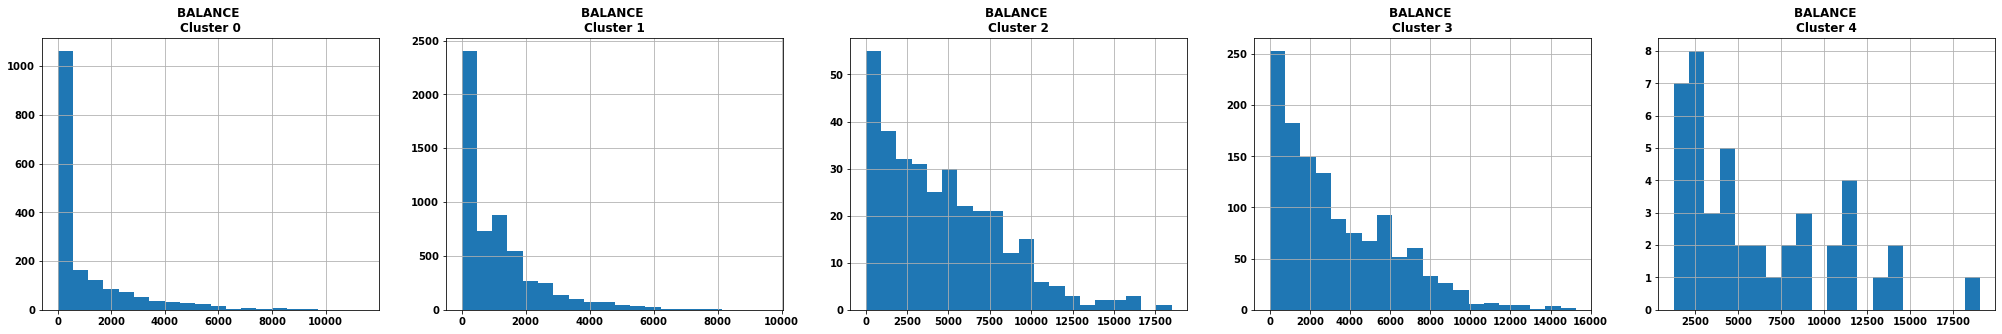

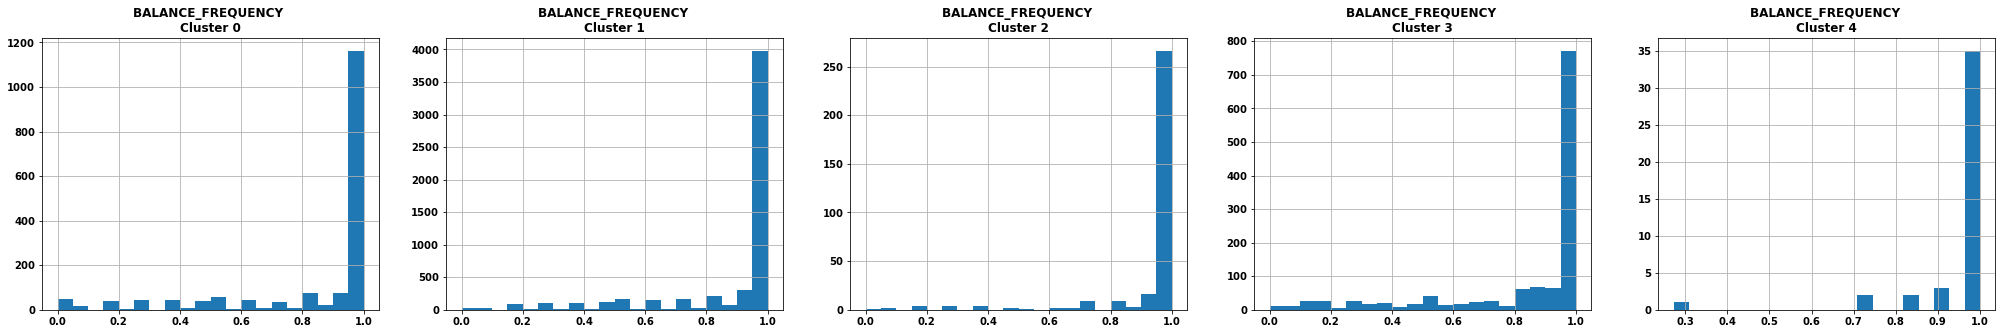

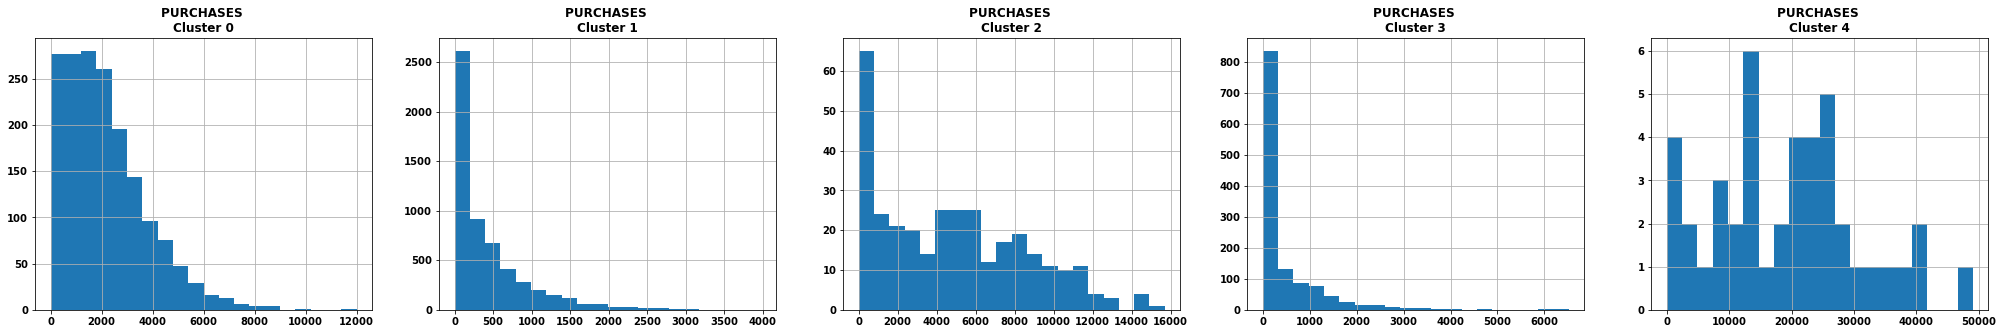

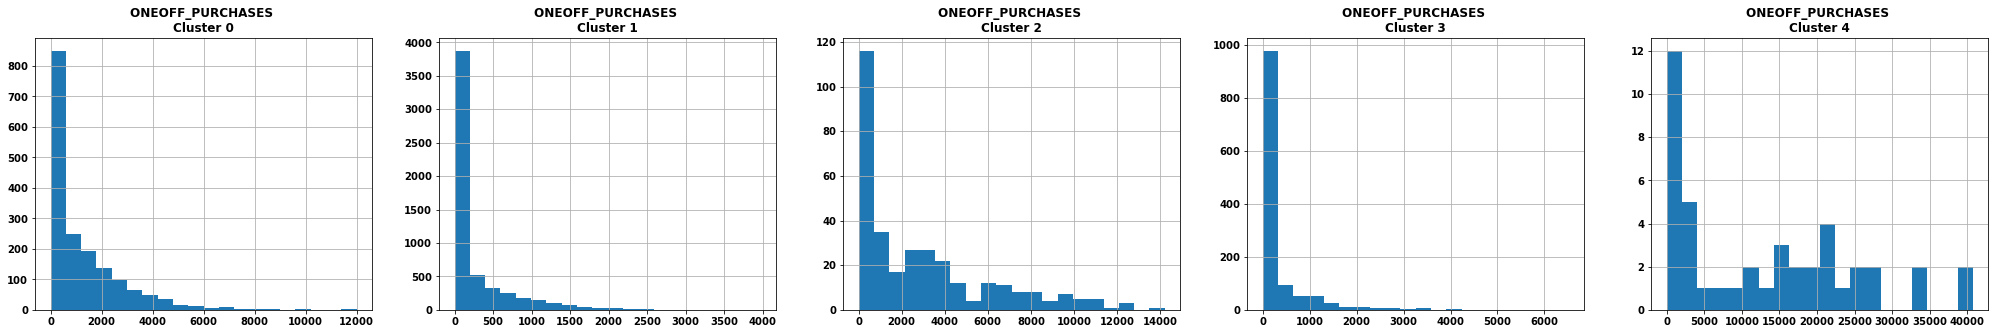

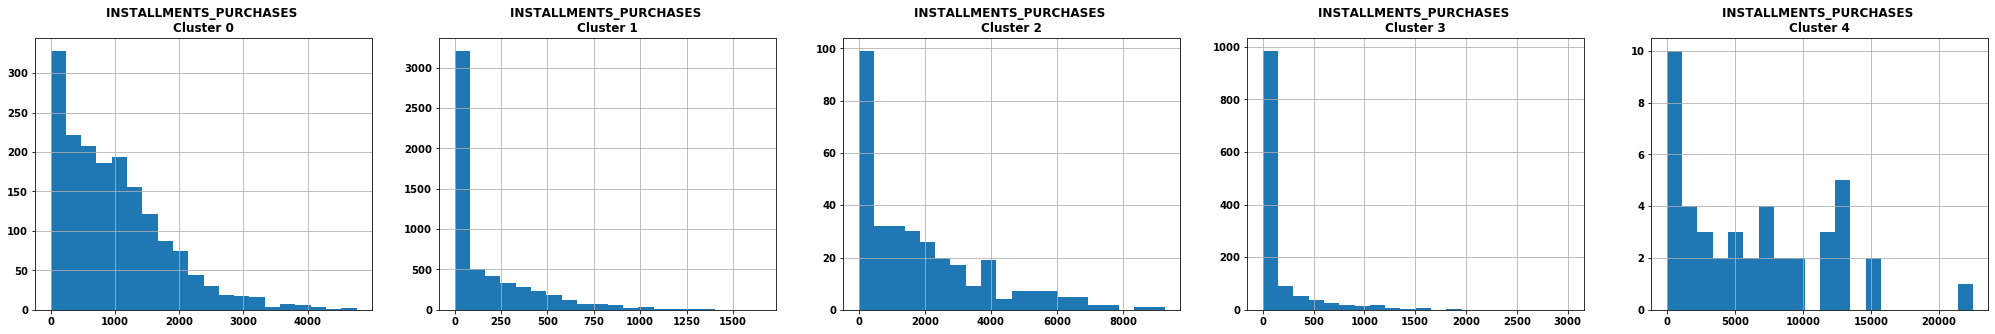

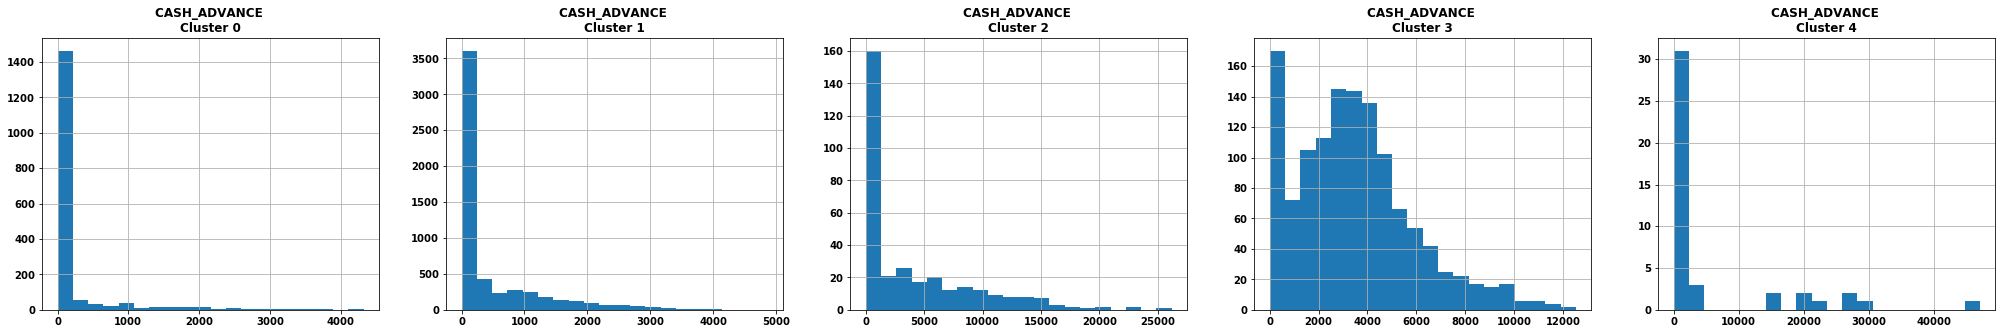

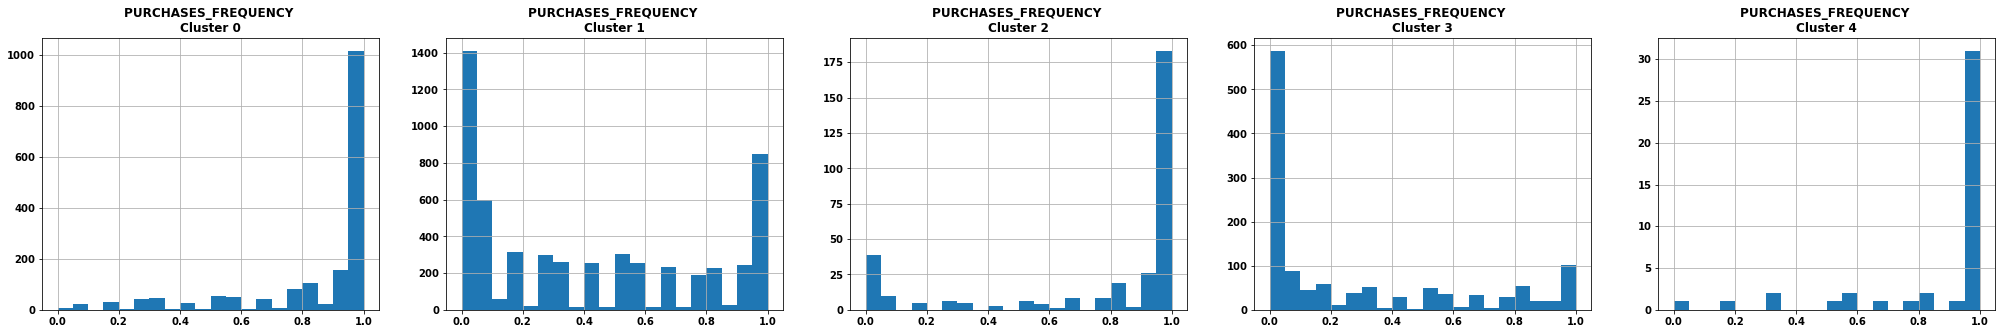

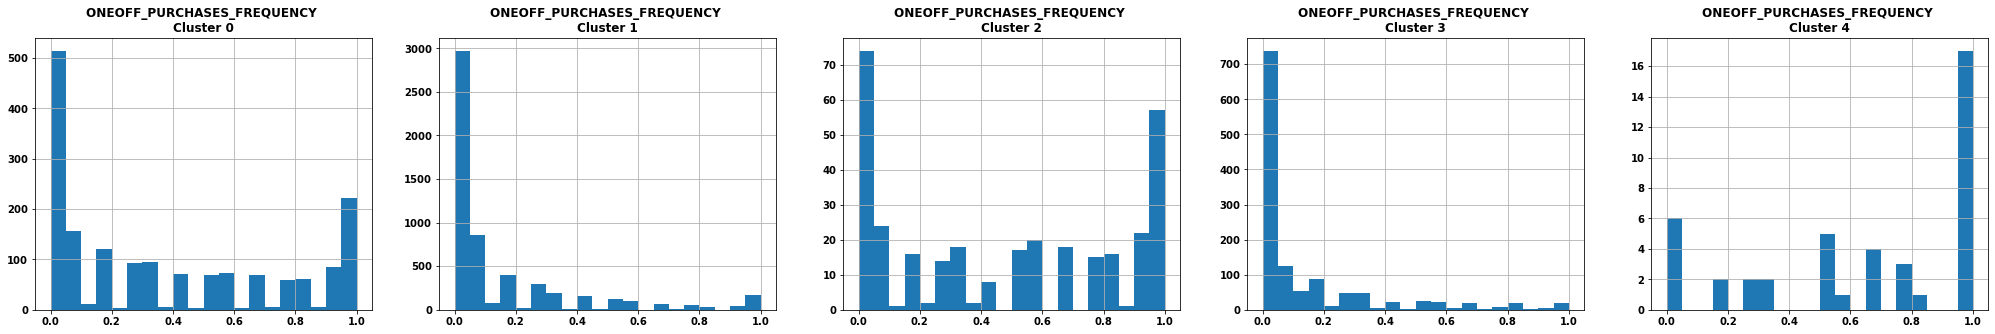

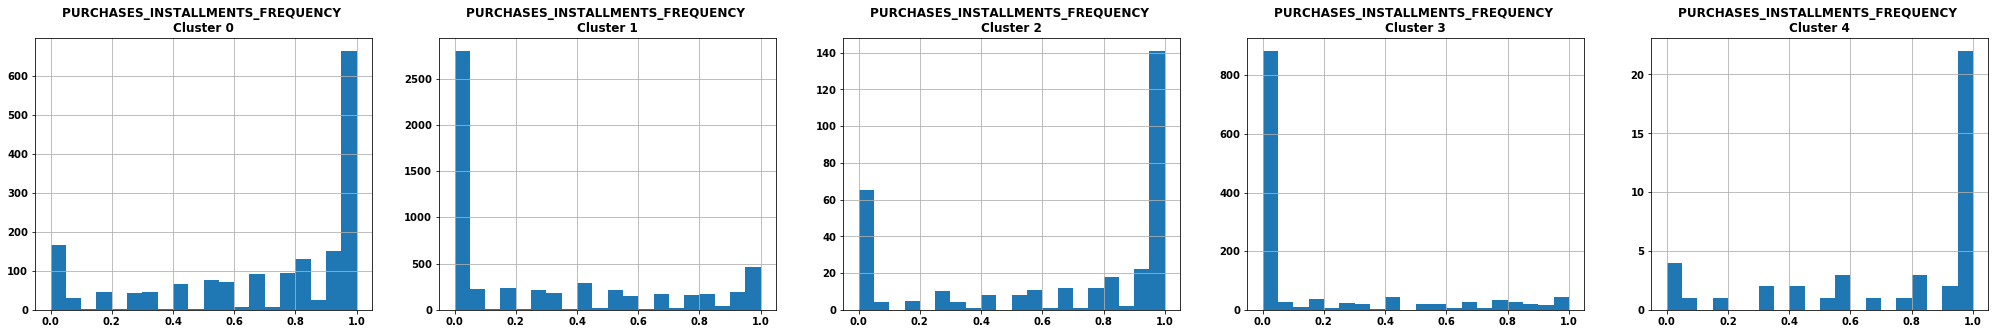

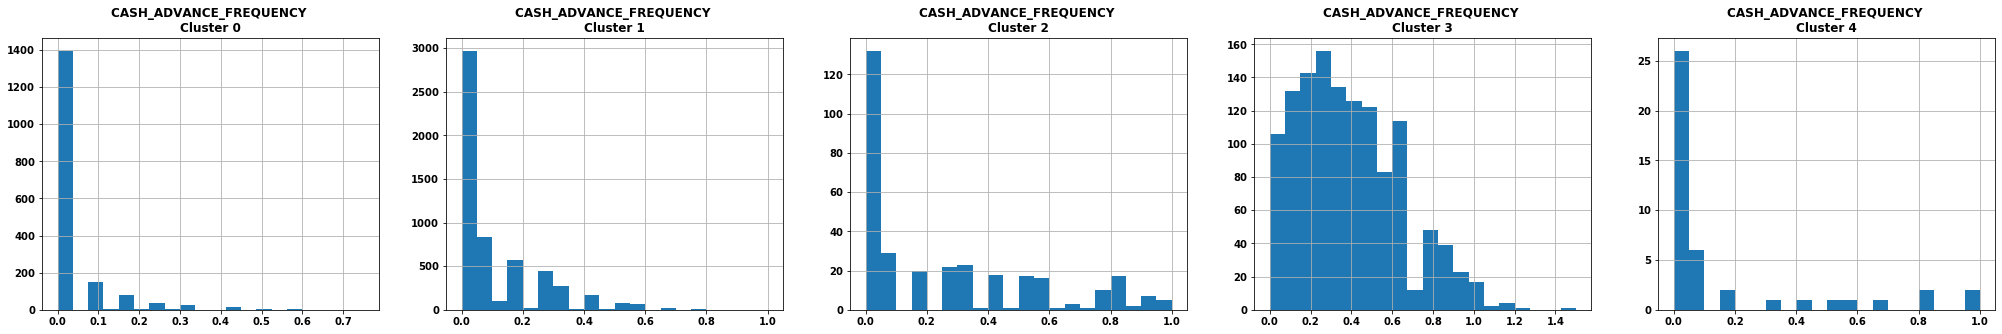

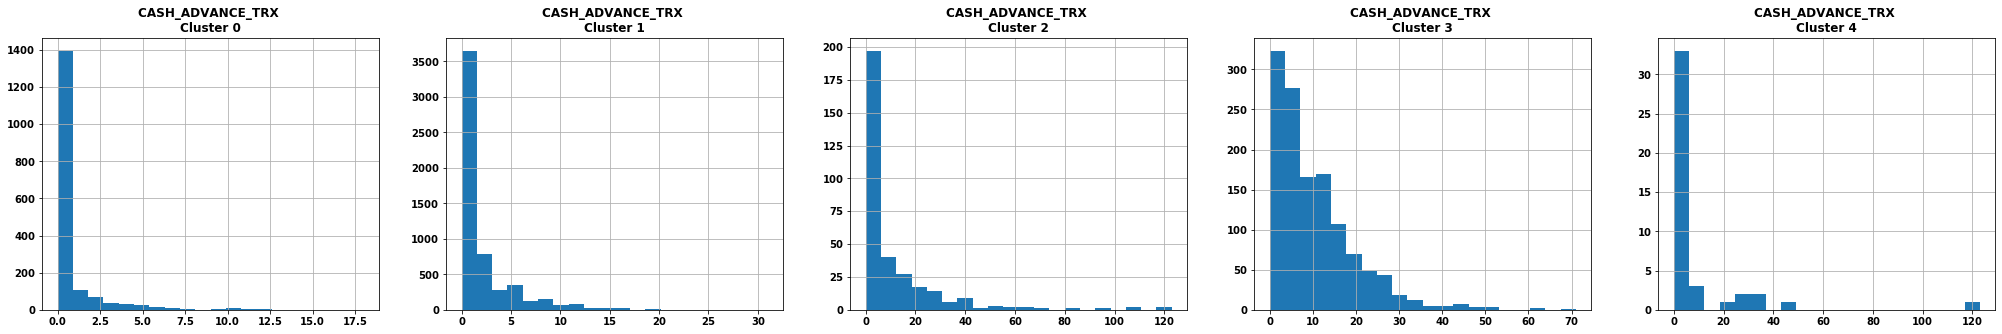

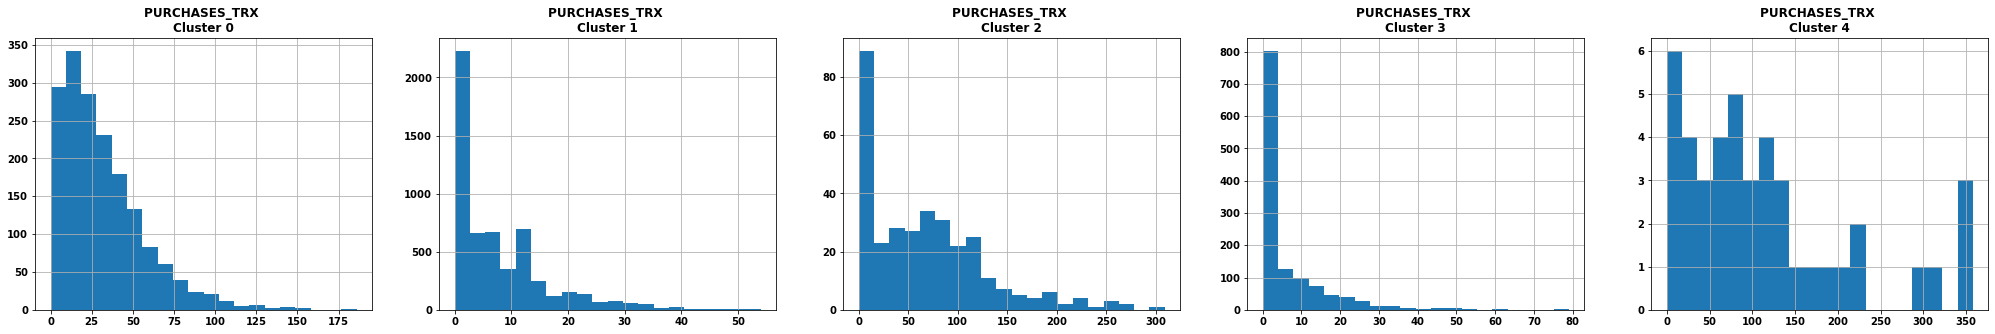

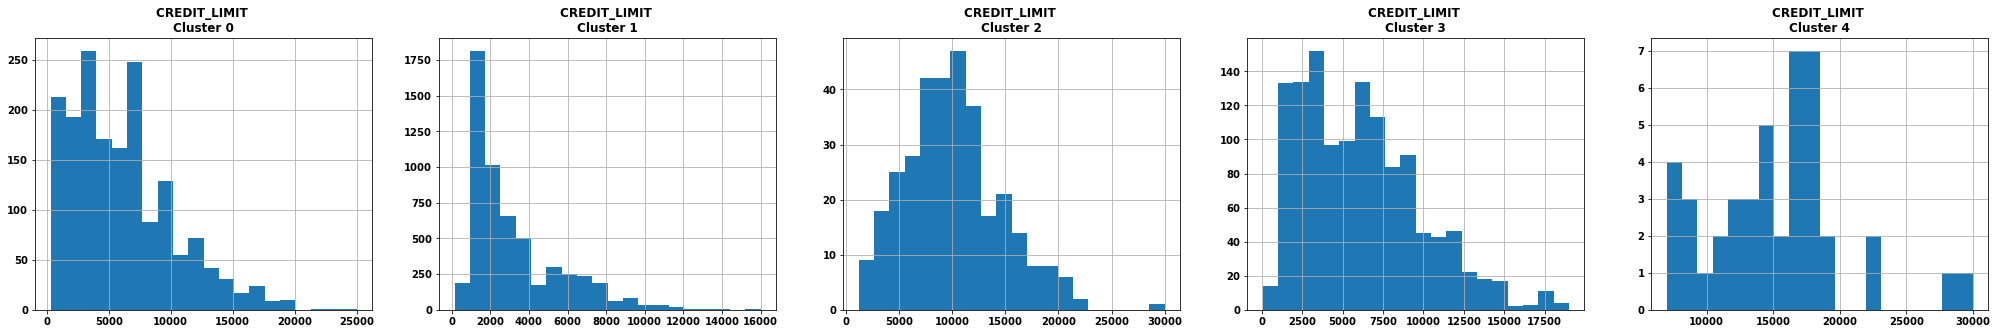

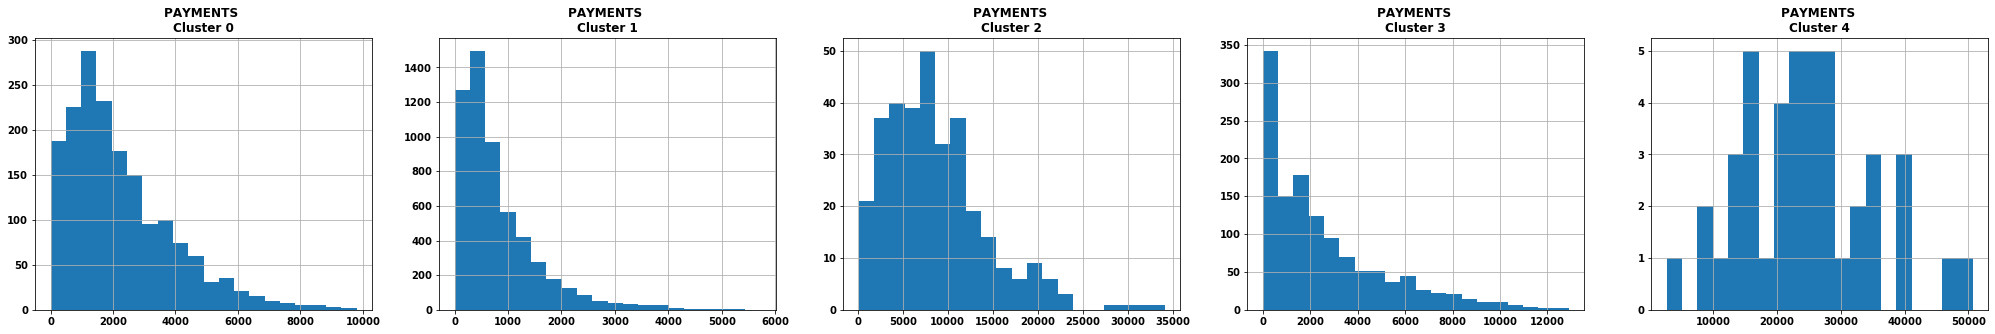

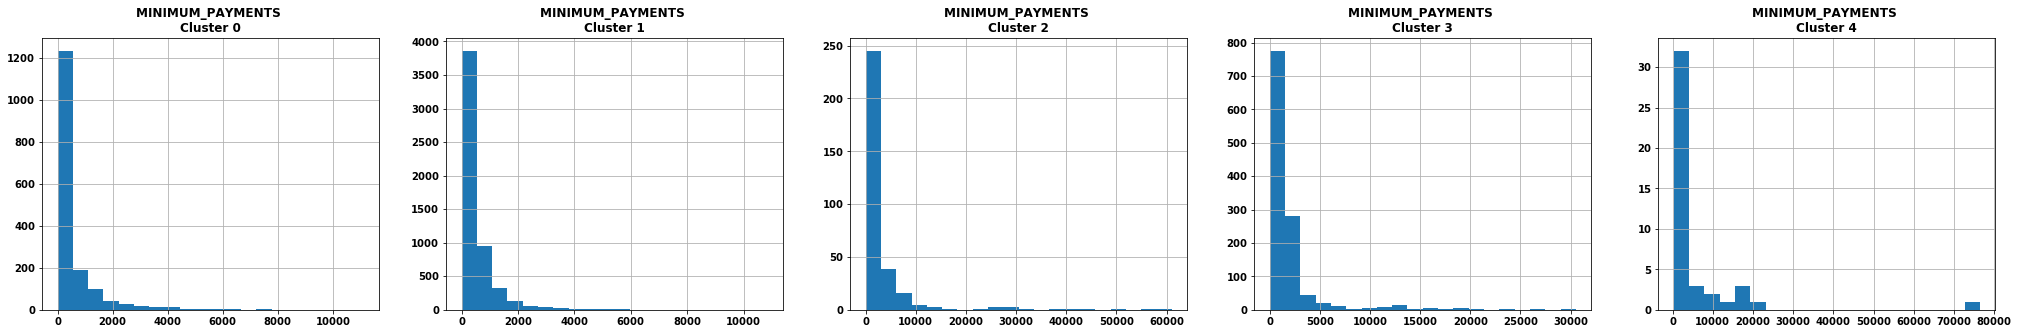

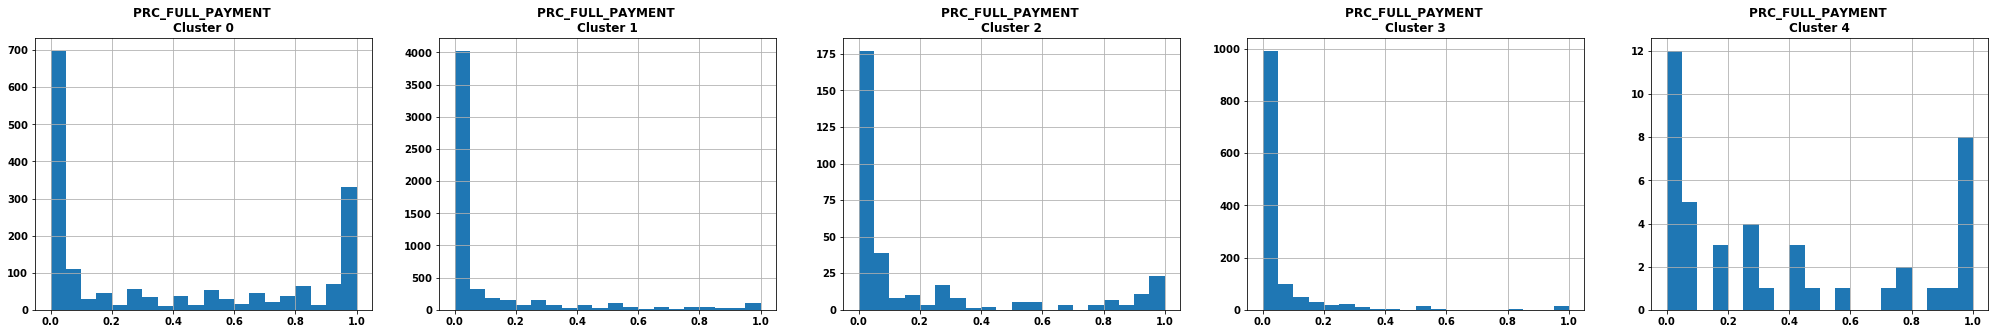

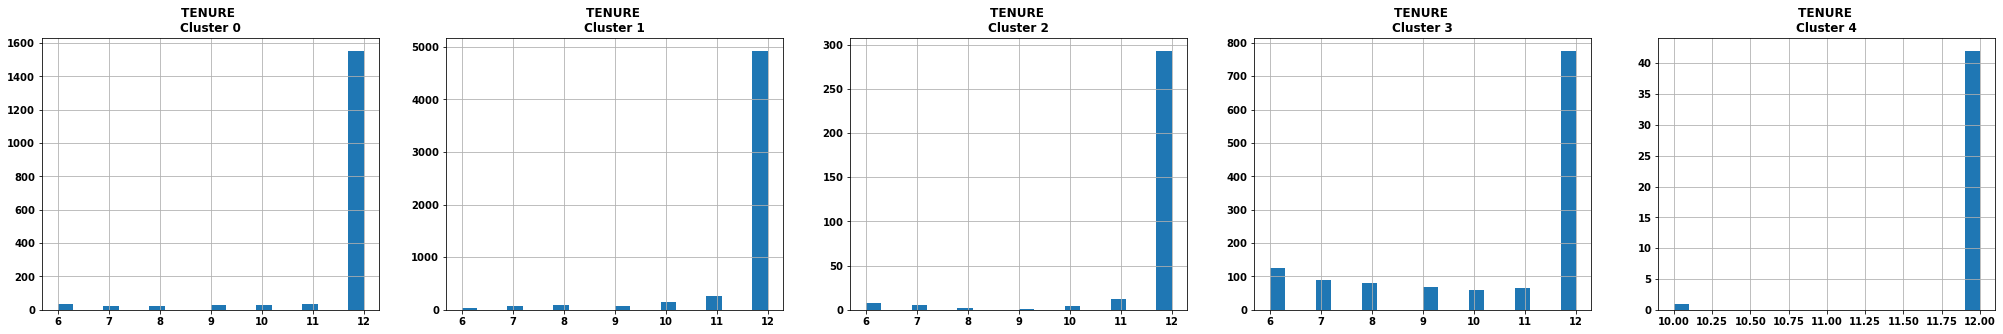

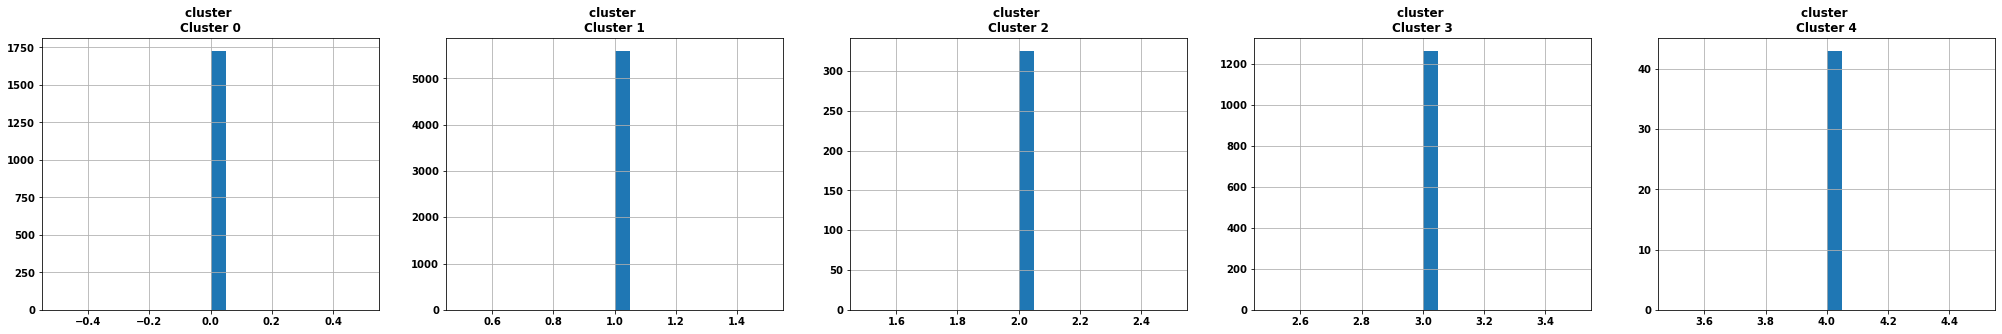

In [70]:
# Plot histograms on the various clusters within the dataset:
for i in marketing_data_autoEncode_labeled_df.columns:
    plt.figure(figsize=(35, 5))
    for j in range(optimum_cluster_number):
        plt.subplot(1, optimum_cluster_number, j+1)
        cluster = marketing_data_autoEncode_labeled_df[ marketing_data_autoEncode_labeled_df.cluster == j ]
        cluster[i].hist(bins=20)
        plt.title("{} \nCluster {}".format(i, j))
        
plt.show()

#### Plot out some example clusters to examine: Cluster 0 again

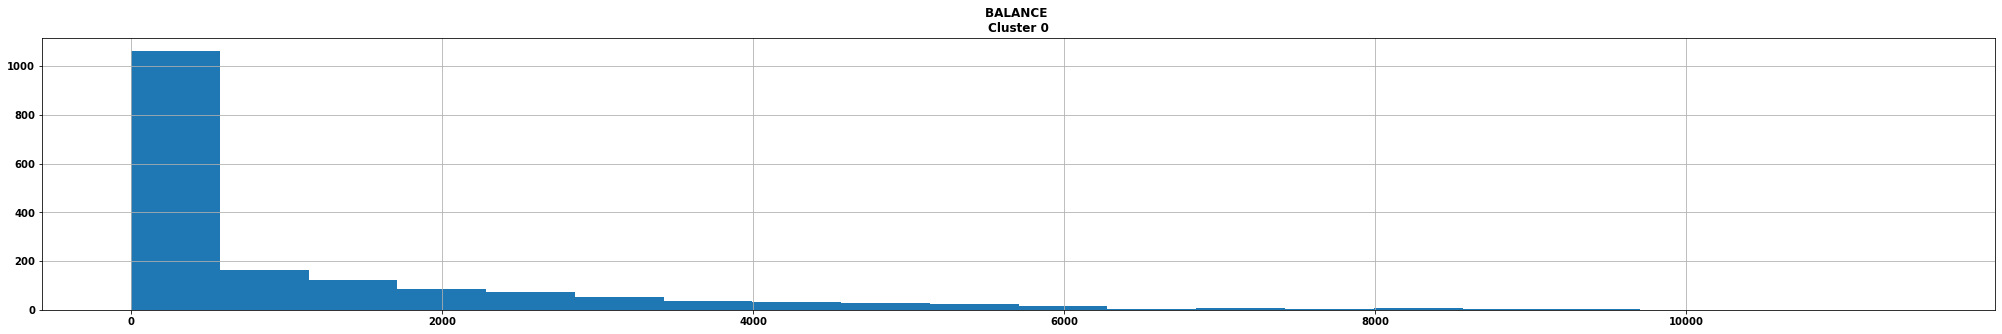

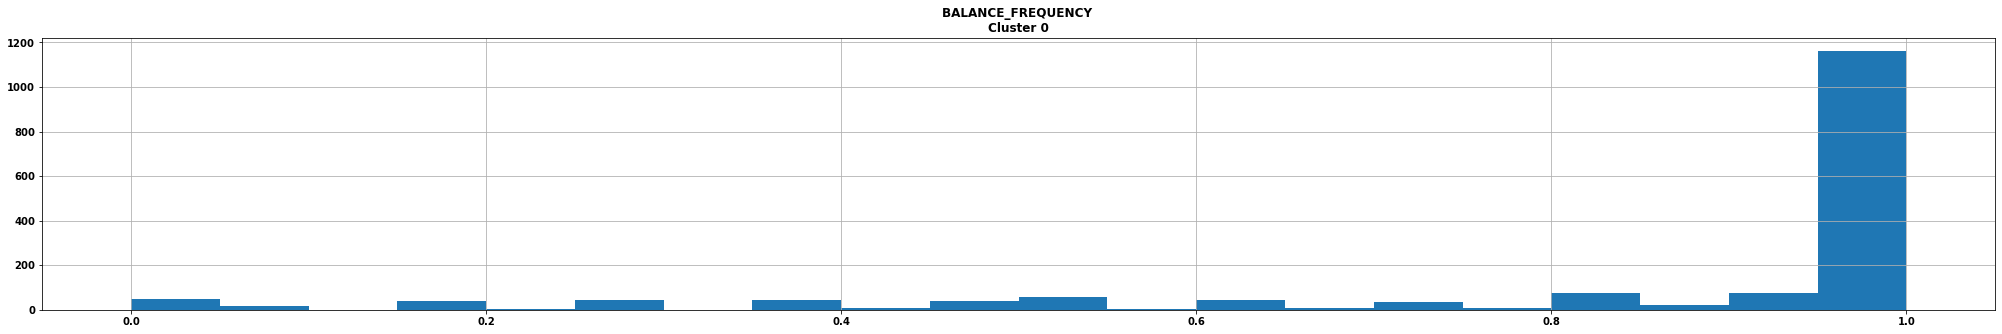

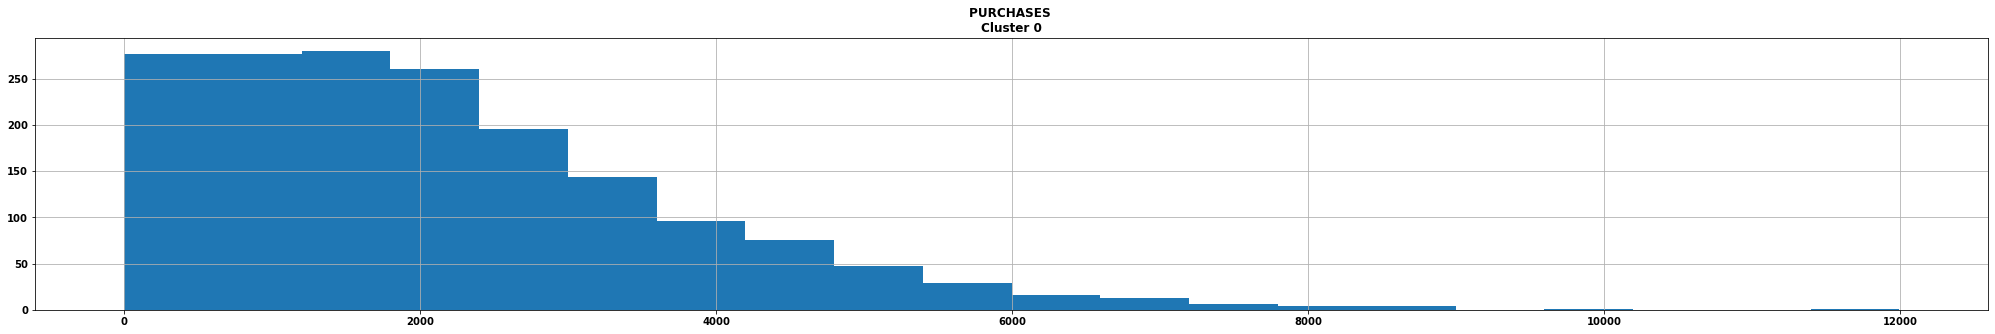

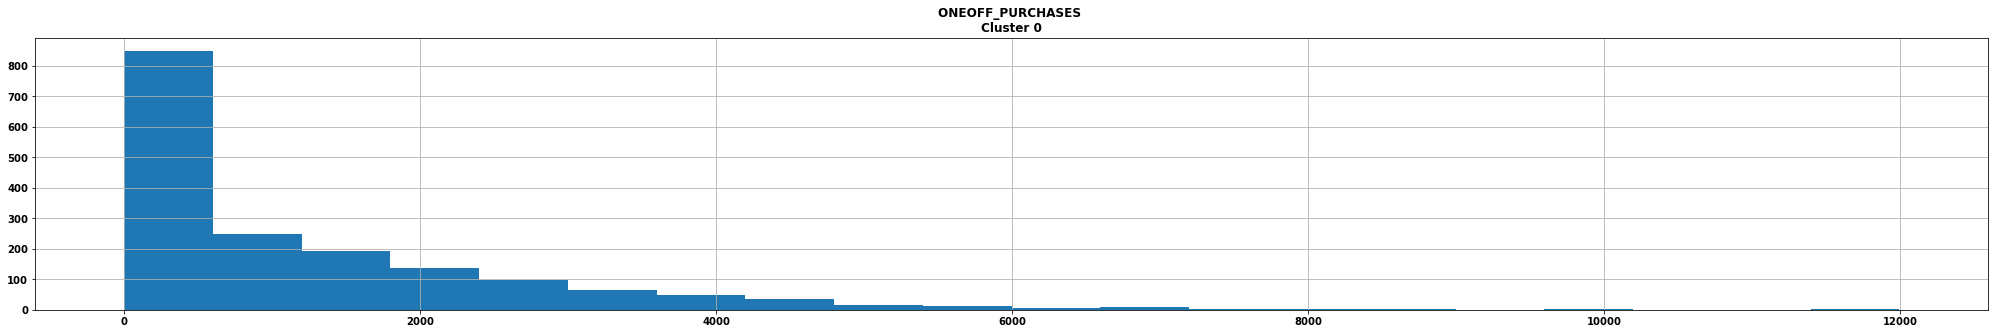

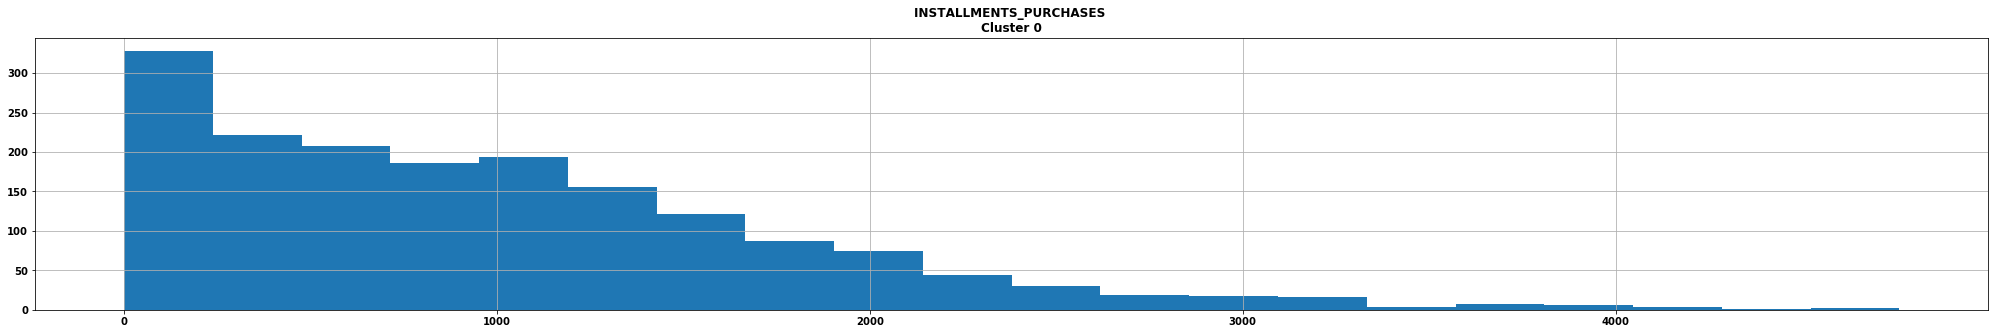

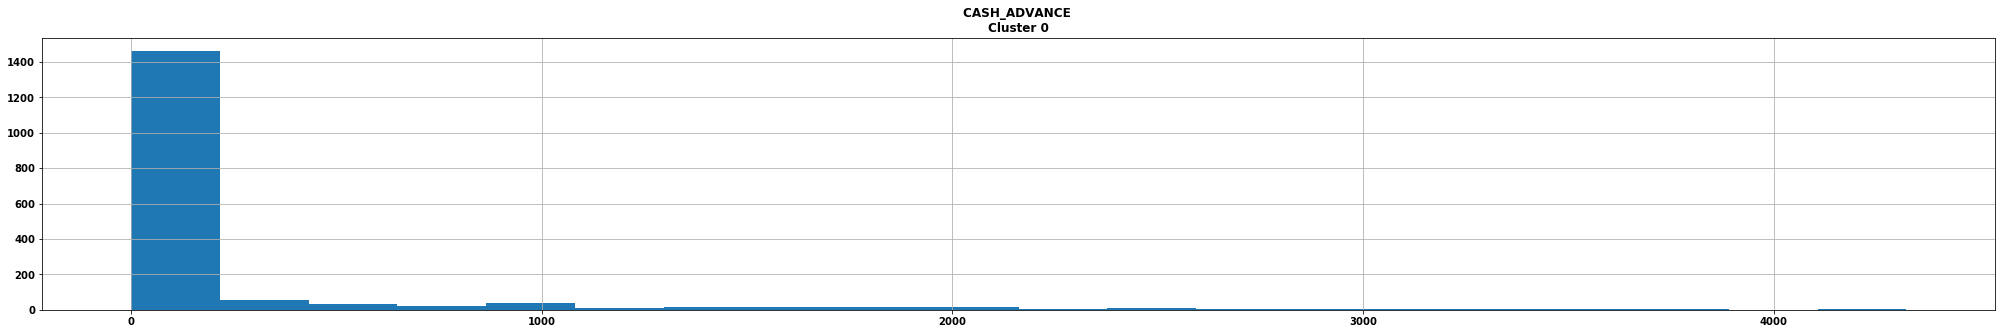

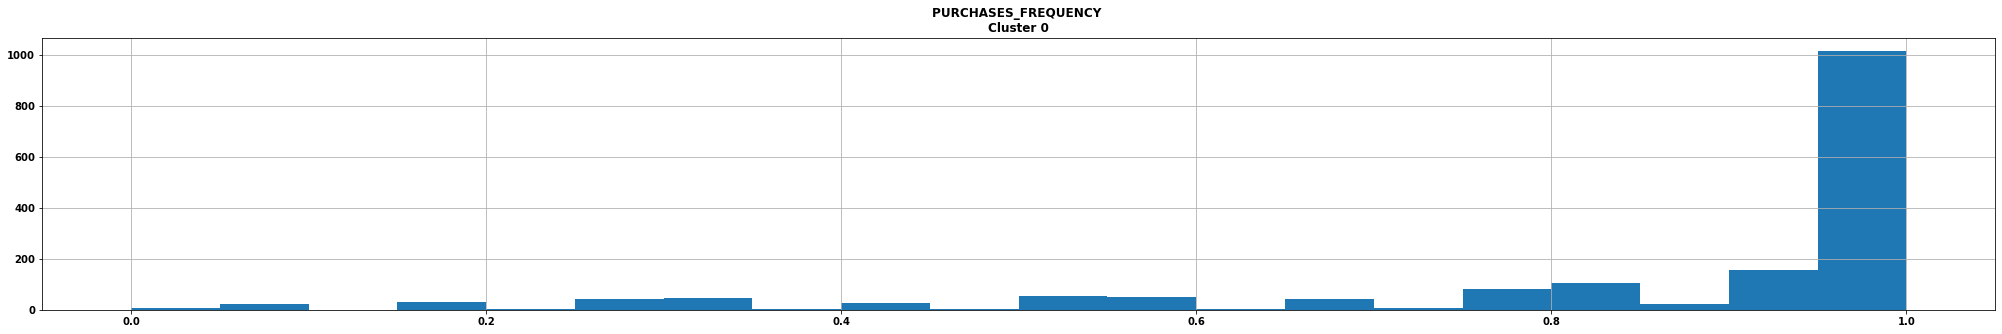

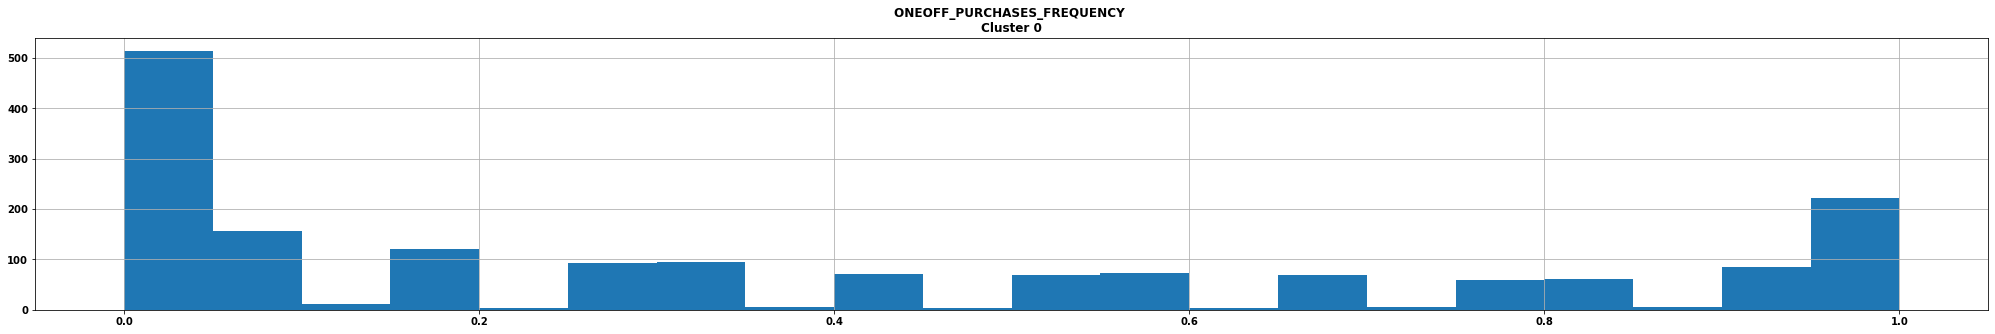

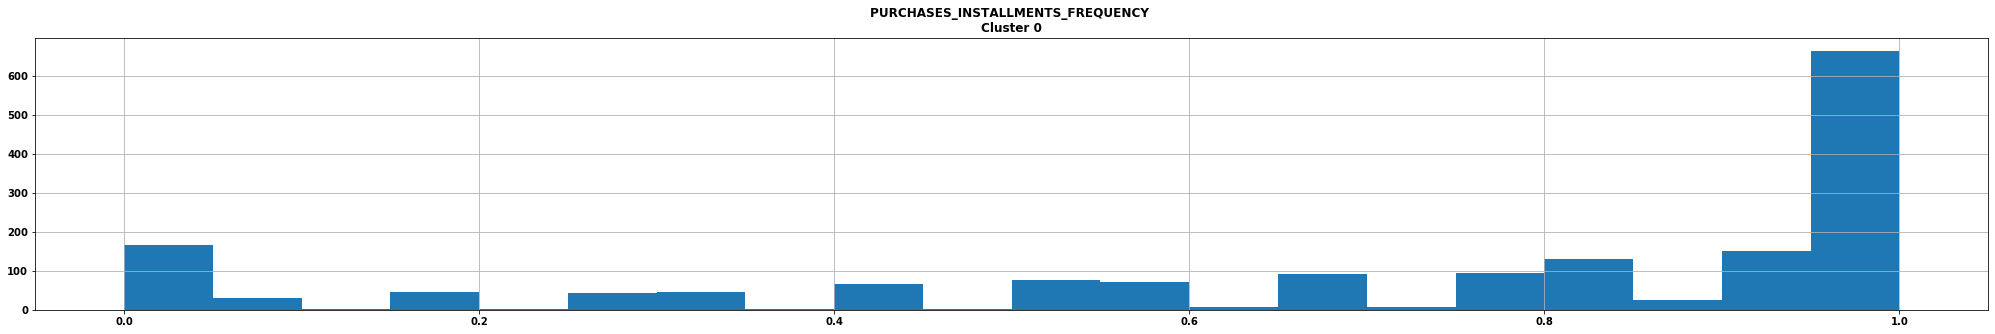

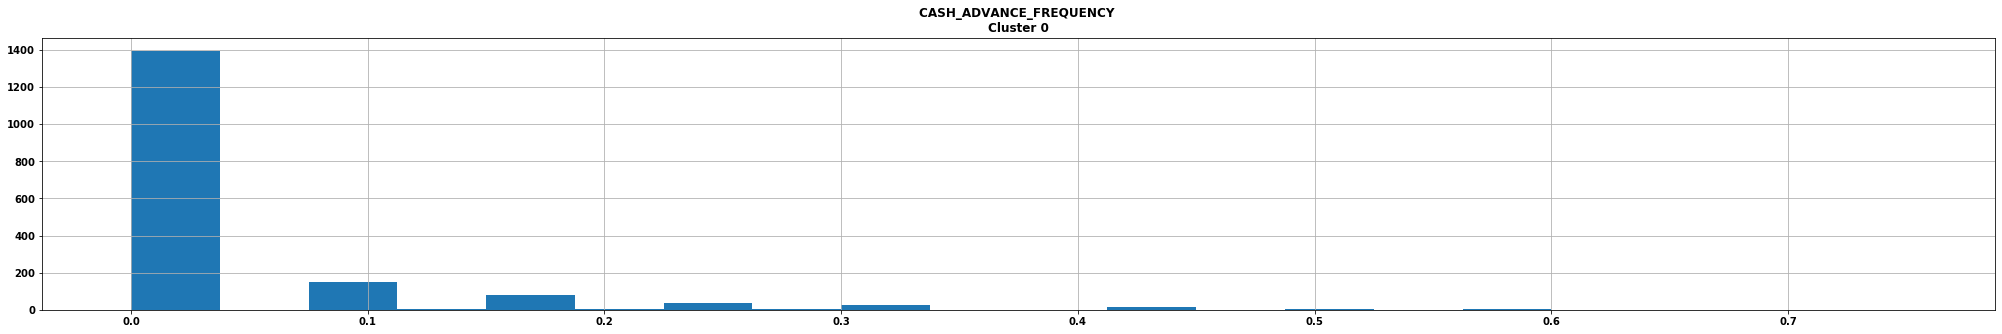

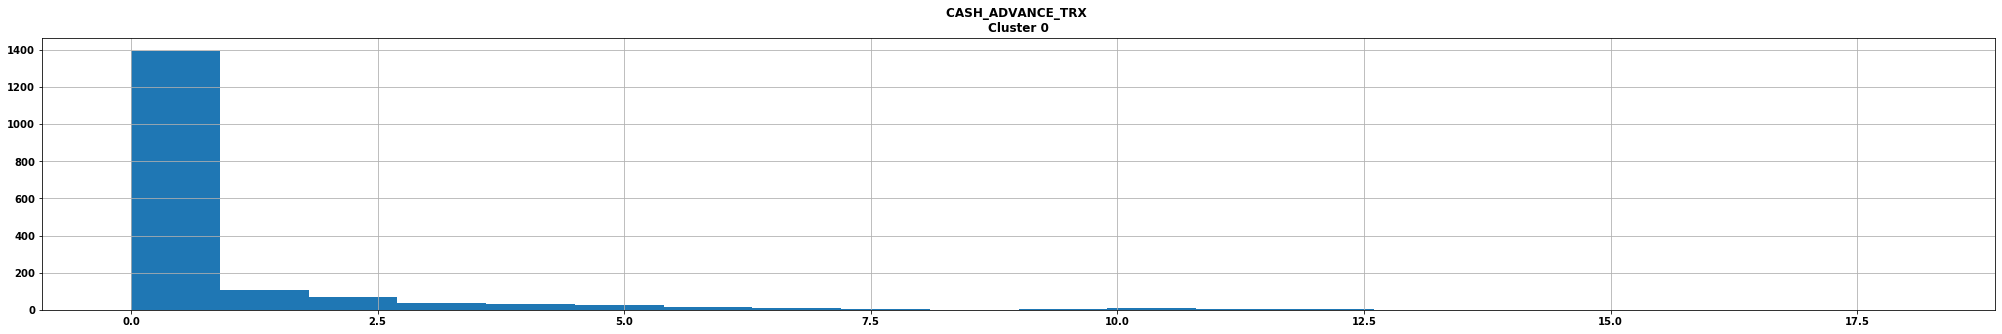

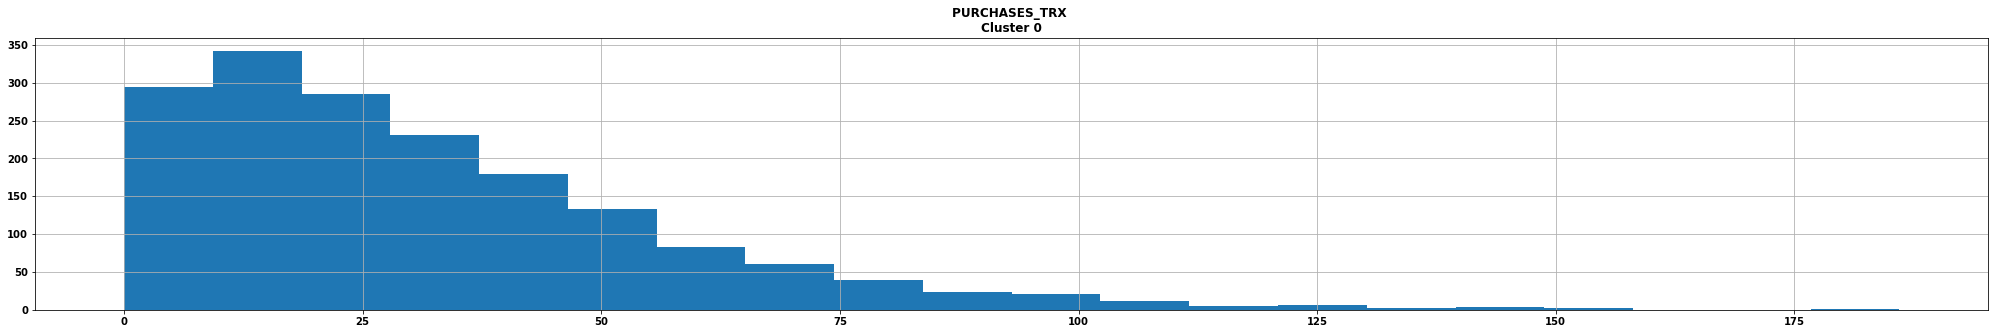

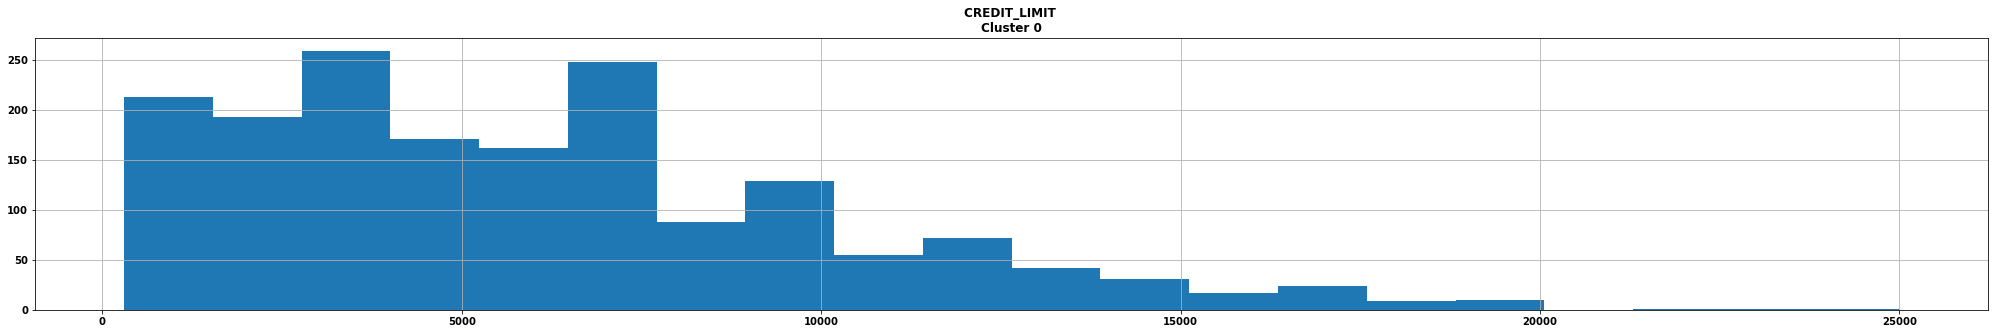

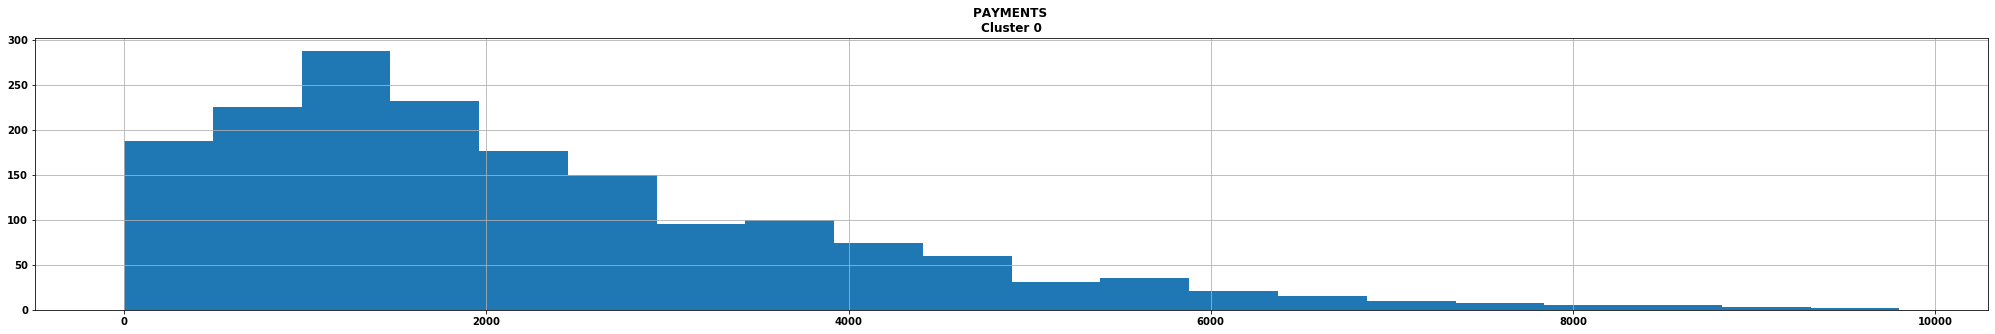

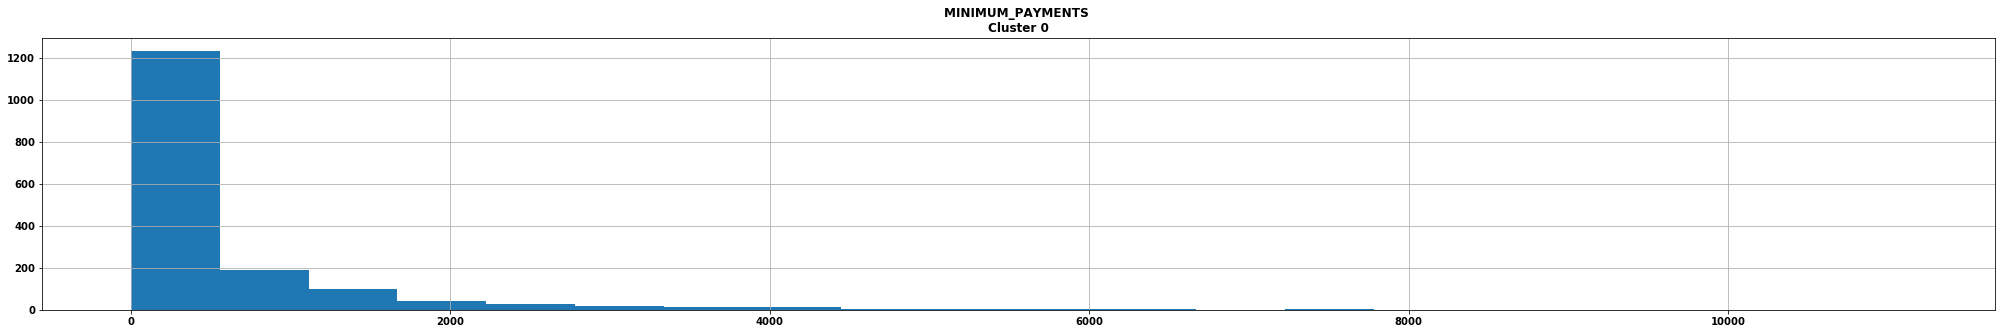

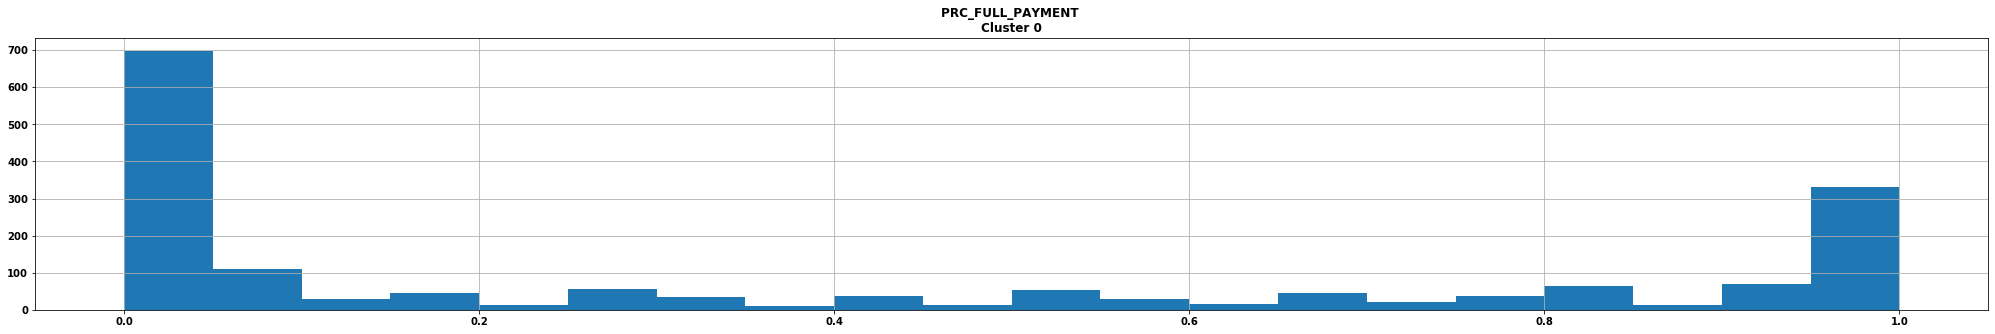

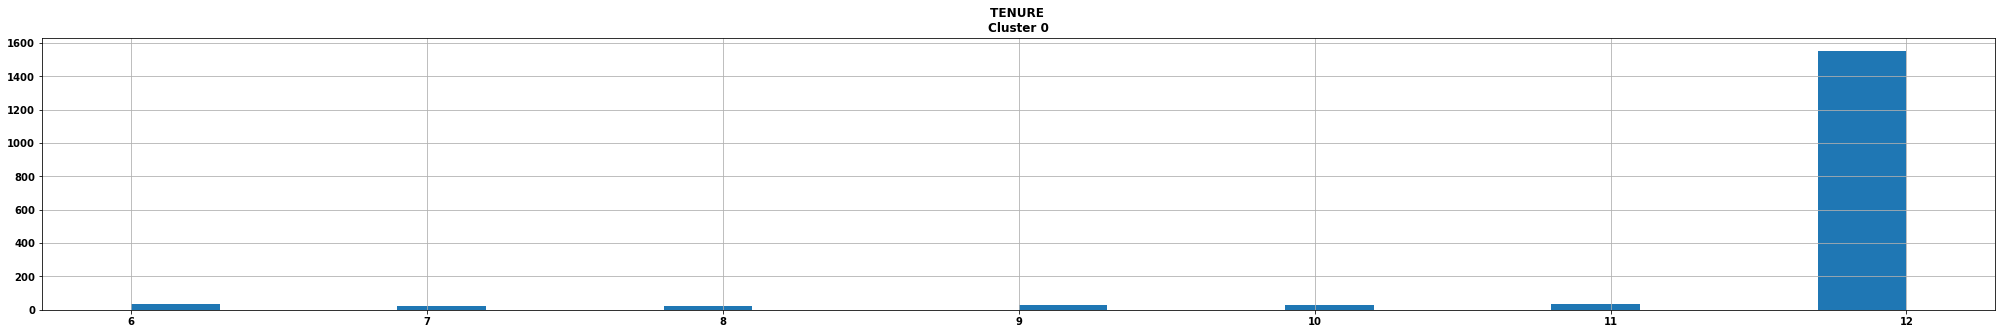

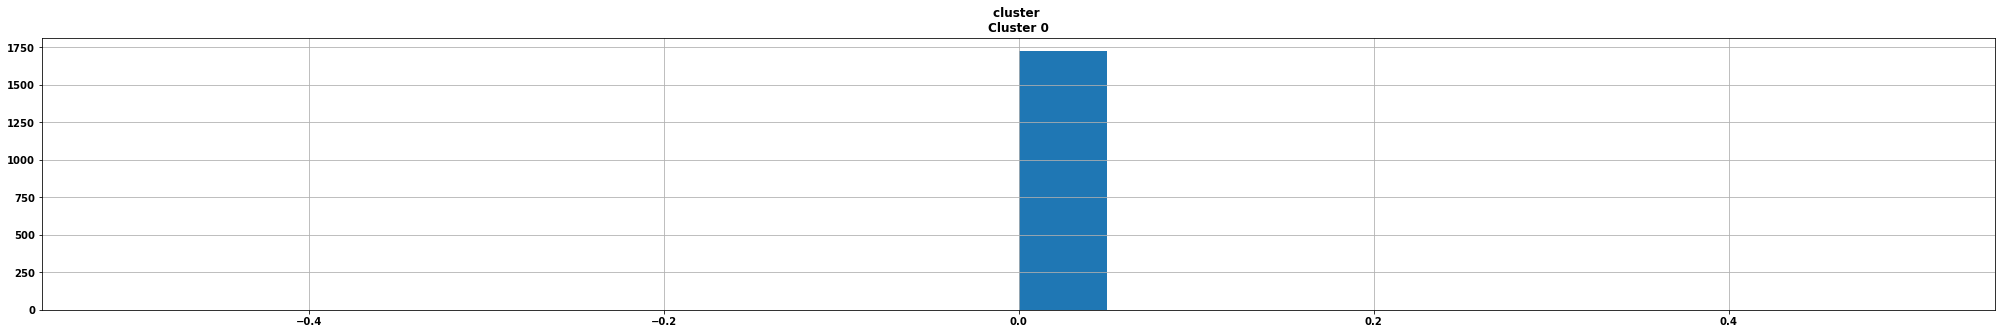

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   1726.000000        1726.000000   1726.000000       1726.000000   
mean    1094.206565           0.847627   2165.565701       1176.857178   
std     1652.022373           0.275491   1603.594471       1492.650951   
min        0.000000           0.000000      0.000000          0.000000   
25%       94.107706           0.818182    963.487500          0.000000   
50%      317.845951           1.000000   1866.185000        626.680000   
75%     1474.616928           1.000000   3012.740000       1815.087500   
max    11416.647360           1.000000  11994.710000      11994.710000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             1726.000000   1726.000000          1726.000000   
mean               989.014988    199.217537             0.850173   
std                816.984010    586.502369             0.246382   
min                  0.000000      0.000000             0.000000   
25%                341.757500      0.000000             0.818182   
50%                851.450000      0.000000             1.000000   
75%               1436.275000      0.000000             1.000000   
max               4761.320000   4323.275849             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 1726.000000                       1726.000000   
mean                     0.378667                          0.708765   
std                      0.371975                          0.341235   
min                      0.000000                          0.000000   
25%                      0.000000                          0.500000   
50%                      0.250000                          0.833333   
75%                      0.750000                          1.000000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             1726.000000       1726.000000    1726.000000   1726.000000   
mean                 0.034177          0.633256      31.933951   6158.057896   
std                  0.087715          1.781524      25.583243   4082.966049   
min                  0.000000          0.000000       0.000000    300.000000   
25%                  0.000000          0.000000      12.000000   3000.000000   
50%                  0.000000          0.000000      26.000000   5500.000000   
75%                  0.000000          0.000000      44.000000   8500.000000   
max                  0.750000         18.000000     186.000000  25000.000000   

          PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  cluster  
count  1726.000000       1656.000000       1726.000000  1726.000000   1726.0  
mean   2230.940716        562.374422          0.383639    11.652955      0.0  
std    1690.808090        928.117353          0.412902     1.186670      0.0  
min       0.000000          0.019163          0.000000     6.000000      0.0  
25%    1022.748573        157.254042          0.000000    12.000000      0.0  
50%    1796.746091        192.095421          0.166667    12.000000      0.0  
75%    3100.077427        561.964263          0.833333    12.000000      0.0  
max    9801.637331      11116.453170          1.000000    12.000000      0.0

In [71]:
# Define which cluster to plot:
cluster_nb_interest = 0

# # Plot histograms on the specified clusters of interest:
for i in marketing_data_autoEncode_labeled_df.columns:
    plt.figure(figsize=(35, 5))
    cluster = marketing_data_autoEncode_labeled_df[ marketing_data_autoEncode_labeled_df.cluster == cluster_nb_interest ]
    cluster[i].hist(bins=20)
    plt.title("{} \nCluster {}".format(i, cluster_nb_interest))
        
plt.show()

marketing_data_autoEncode_labeled_df[marketing_data_autoEncode_labeled_df.cluster == cluster_nb_interest].describe()

### Observations:

The Cluster information/charts are plot such that for each of the cluster, the corresponding attributes are in the columns below.

Taking __Cluster 0__ as an example, and see if there are some "Insights" that can be drawn from here. Note that these are the new clusters of customers and should have different attributes.

General Behaviour of this group:
- These customers have a mean balance of ~USD1,900. From the distribution of the histogram, it has a longer right tail representing that it is skewed to the right. 
- These customers also have frequent changes to their balances and make purchases on products that is around ~USD3,000.
- The one-off purchases are typically around ~USD2,000 and presents with a greater than average frequency of 0.73.
- These customers also tend to pay off 26.5% of the full payment monthly with this credit card.
- These customers are also very loyal with a tenure of around ~12 years with this bank.
- Overall, these are customers can be said to be very loyal, pays lower interests and careful with their money. This can be seen similar to Cluster 0 from the previous clustering results.

#### Plot out another example clusters to examine: Cluster 2

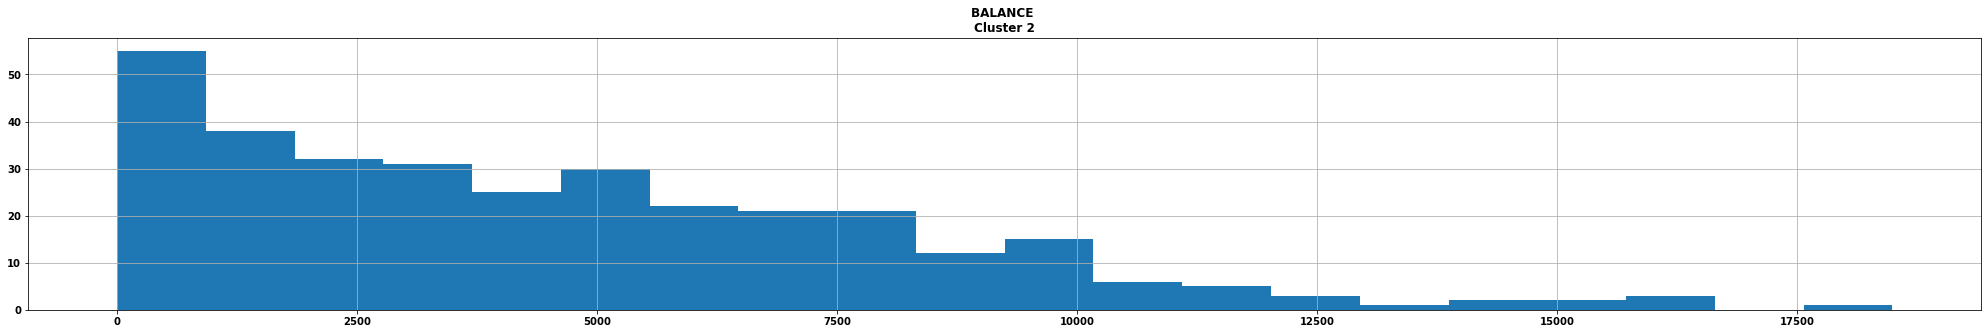

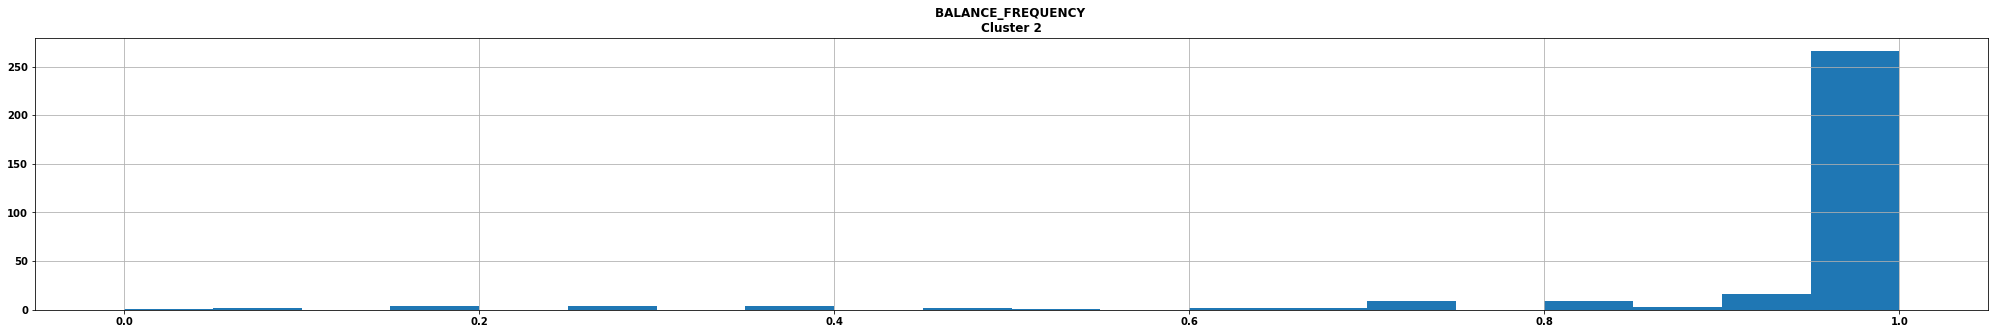

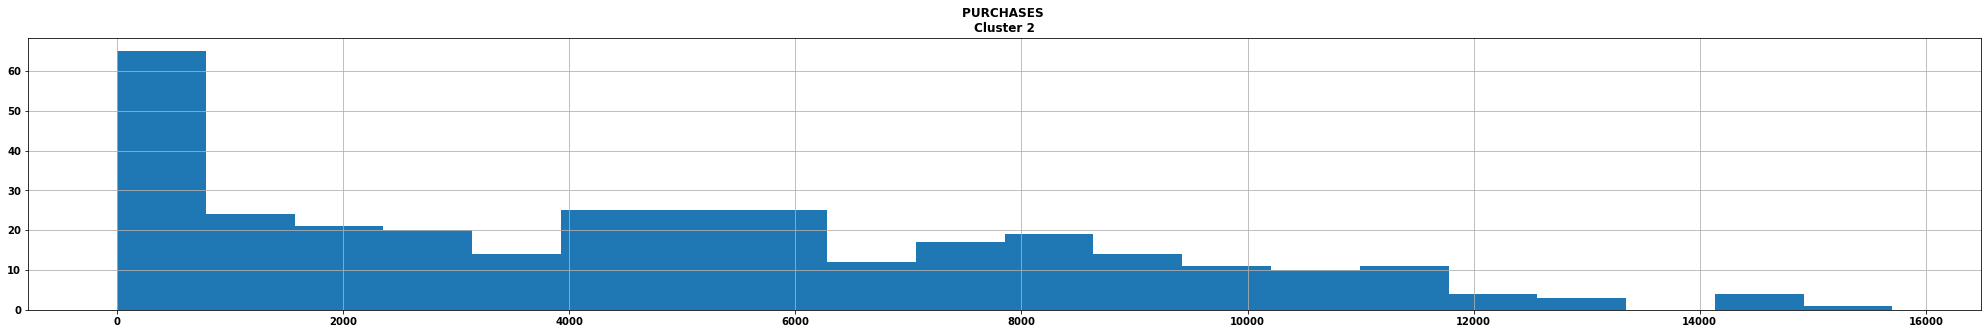

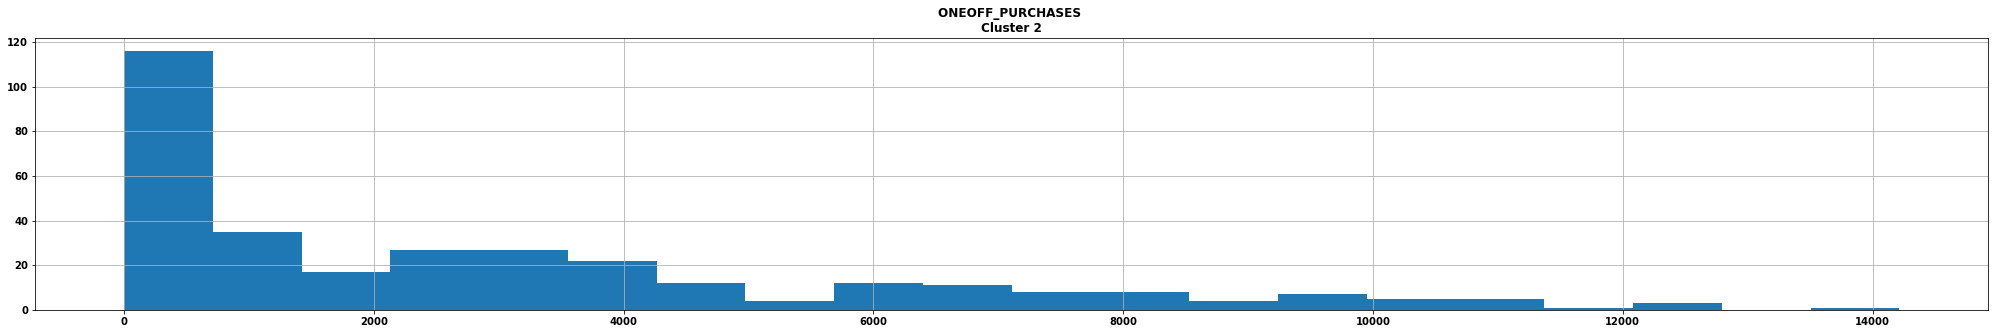

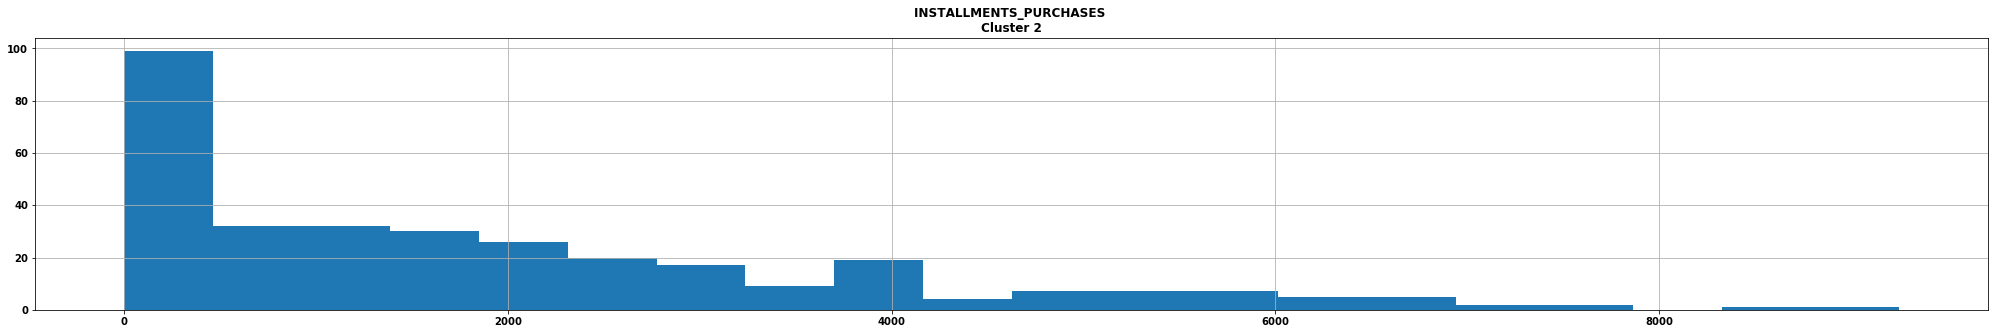

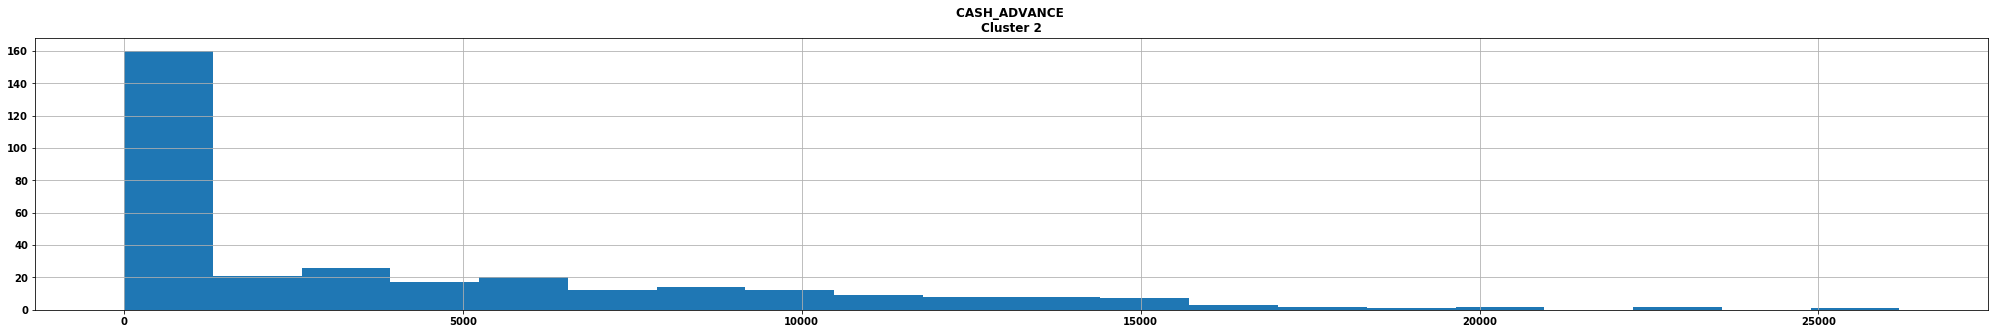

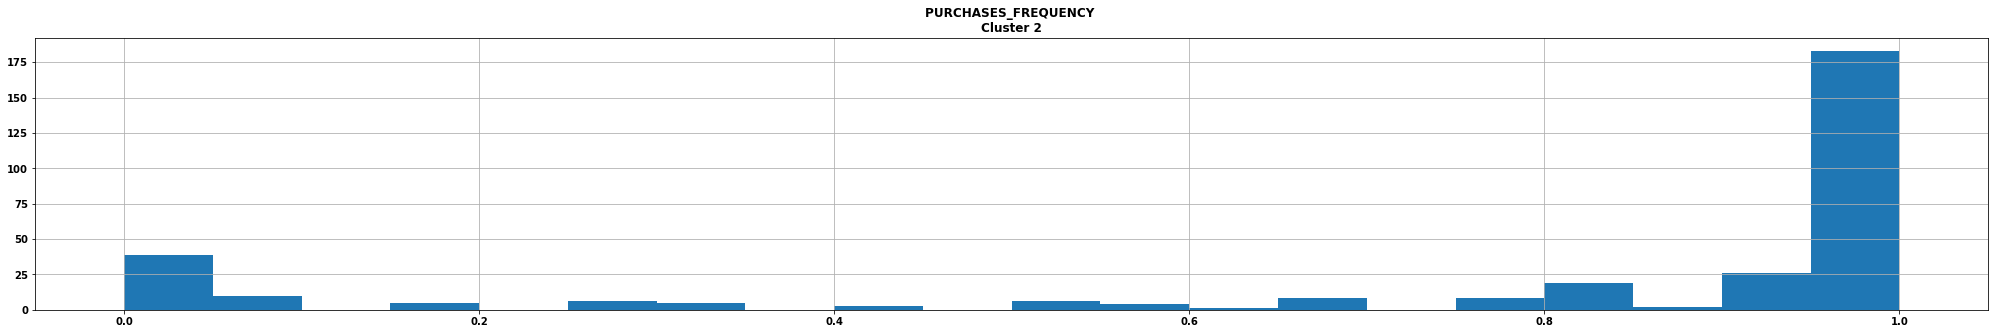

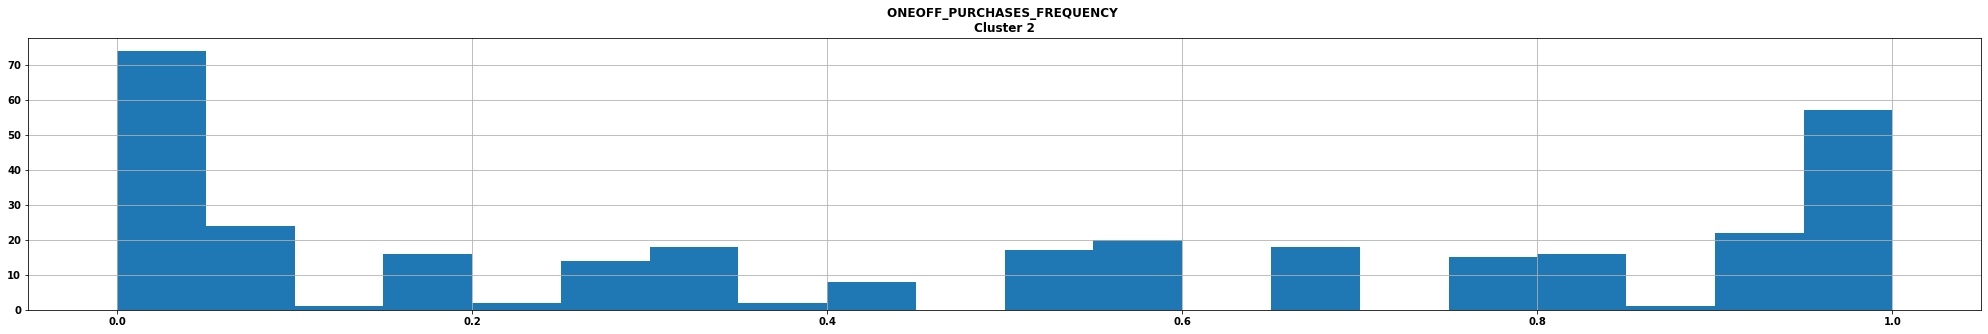

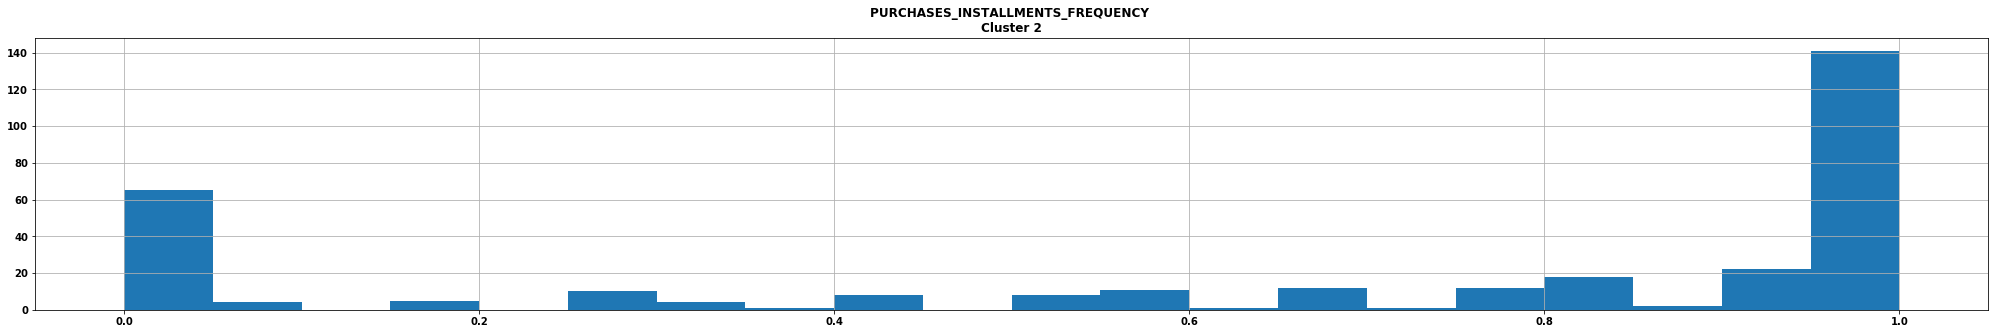

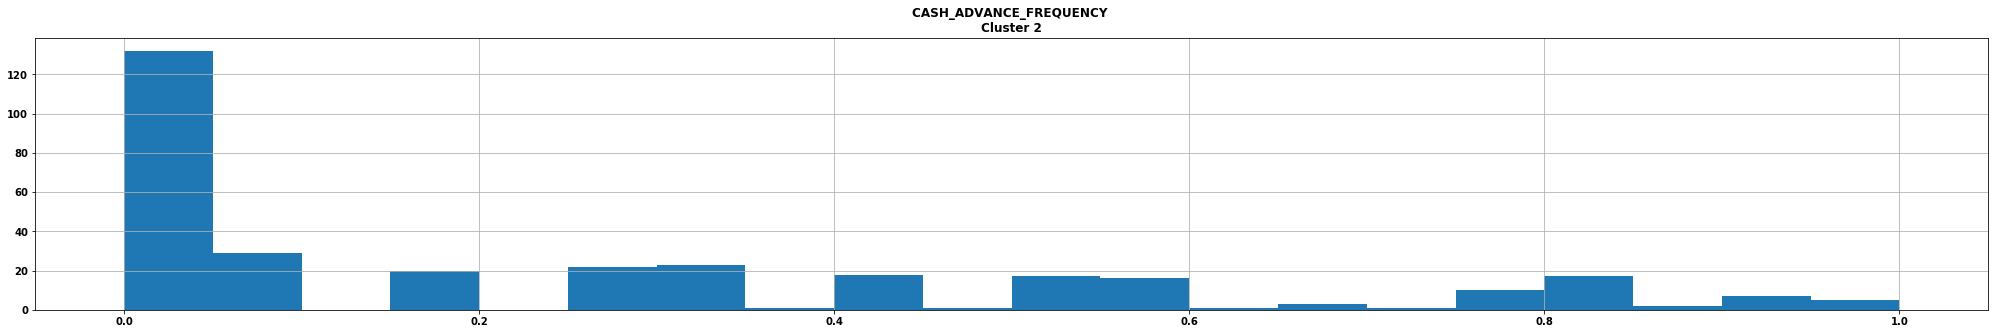

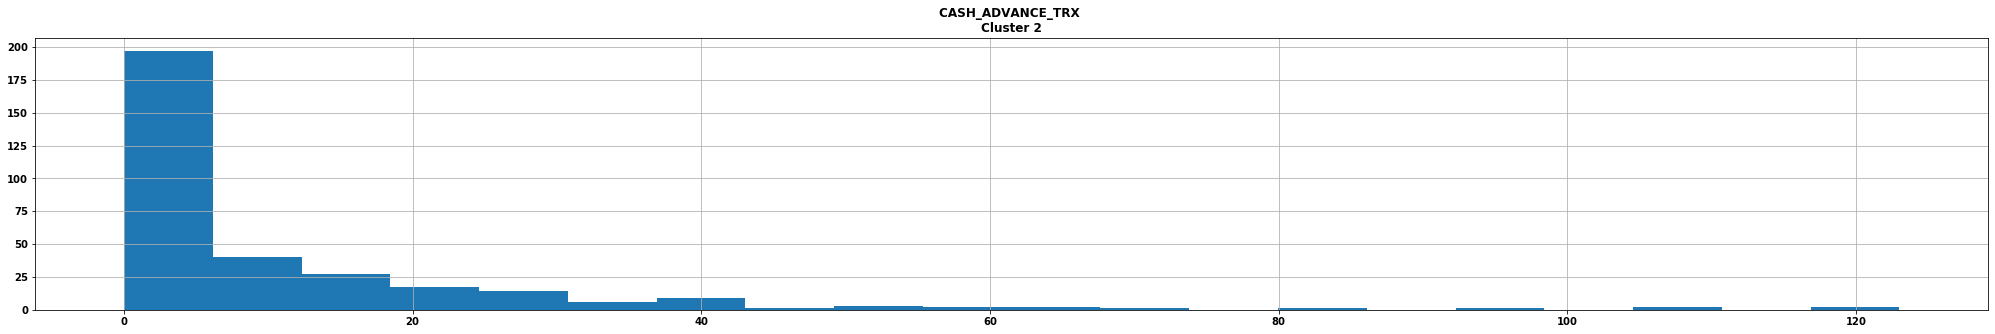

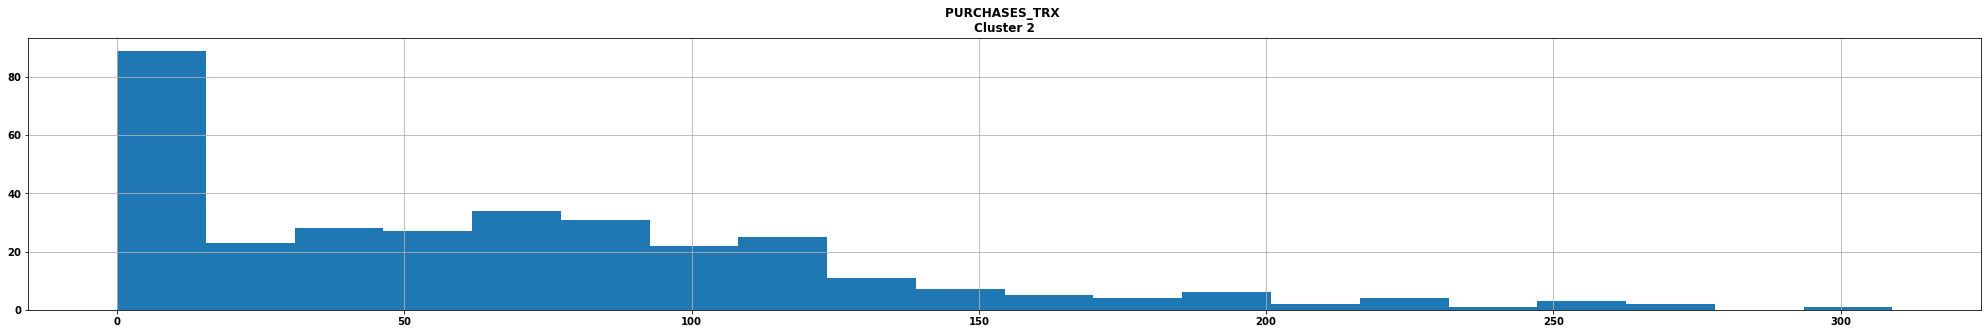

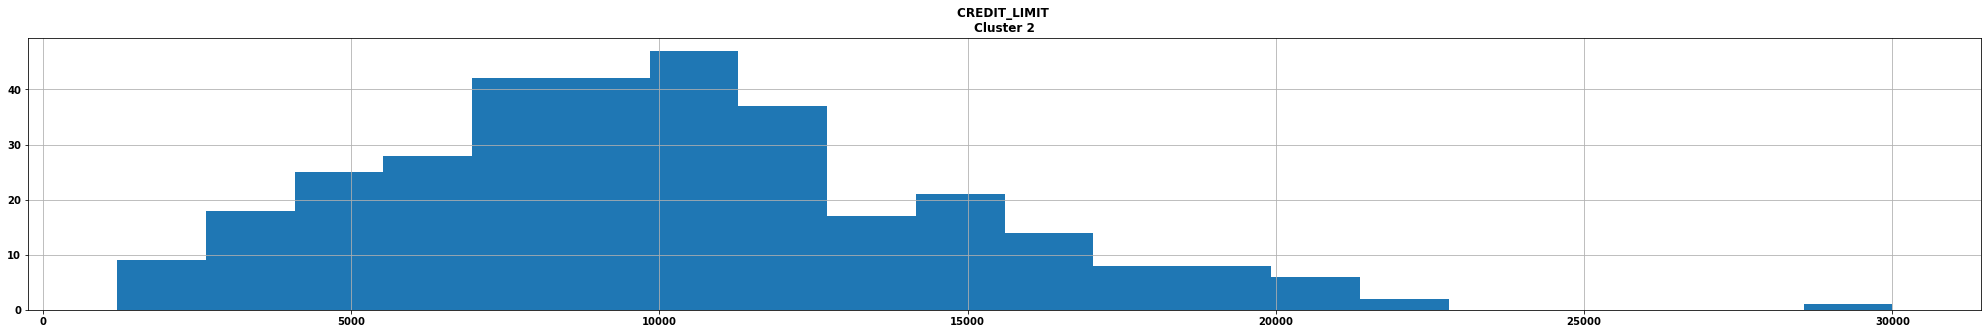

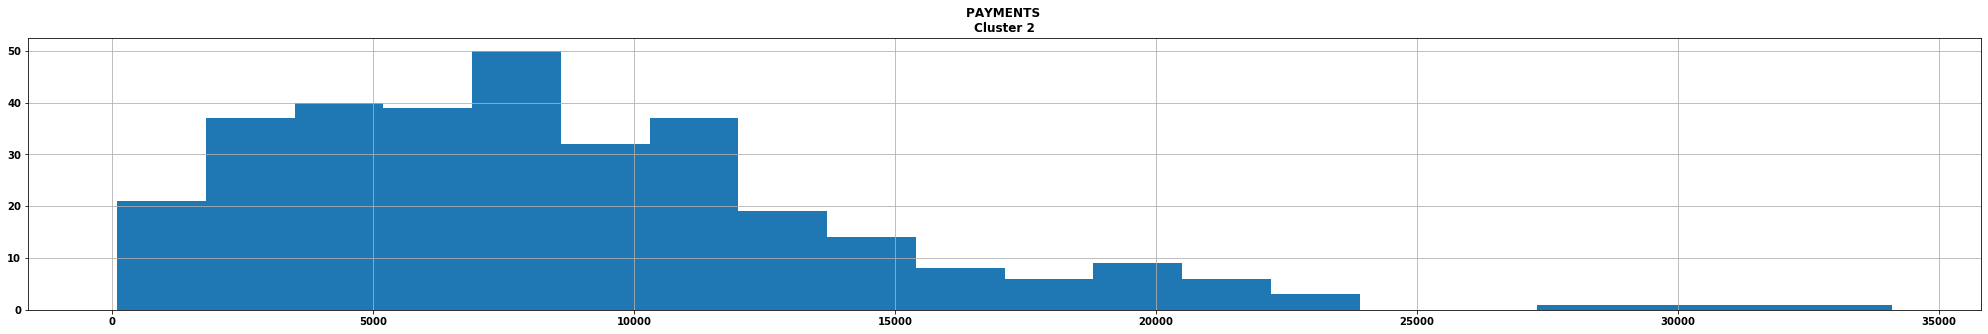

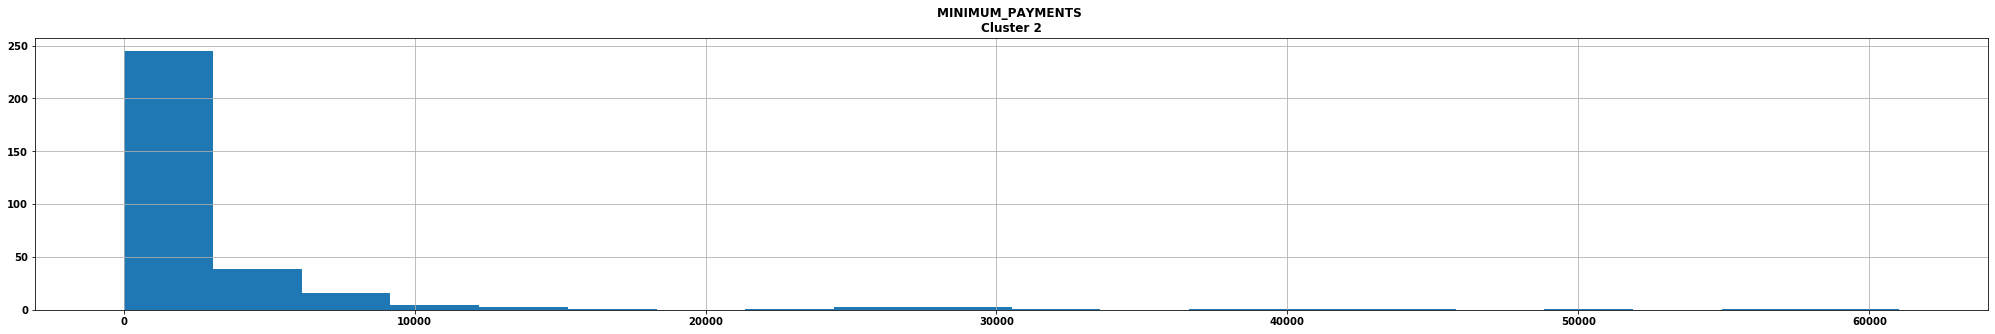

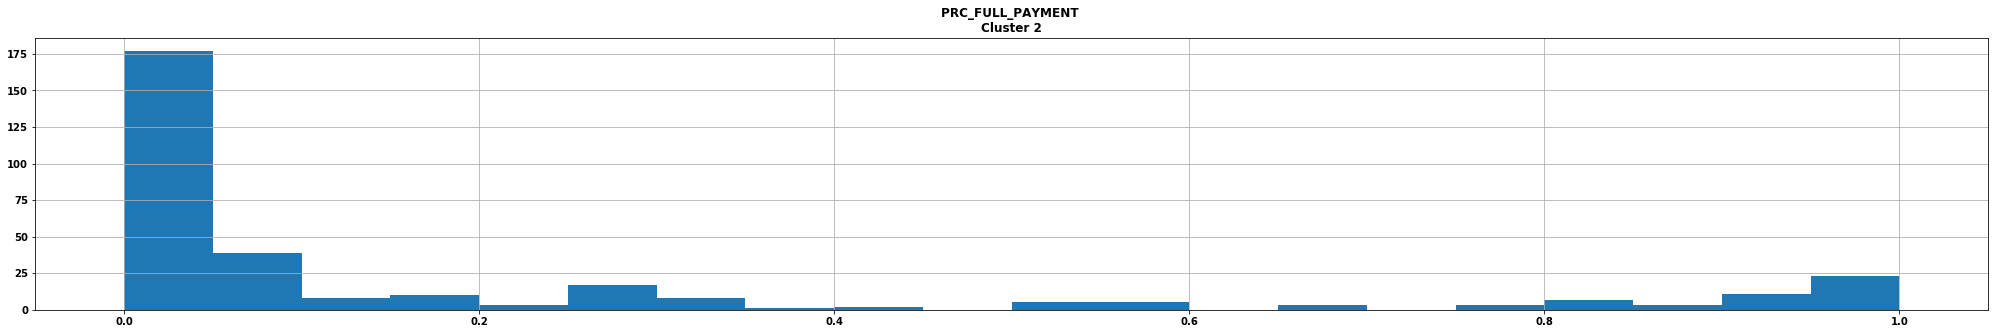

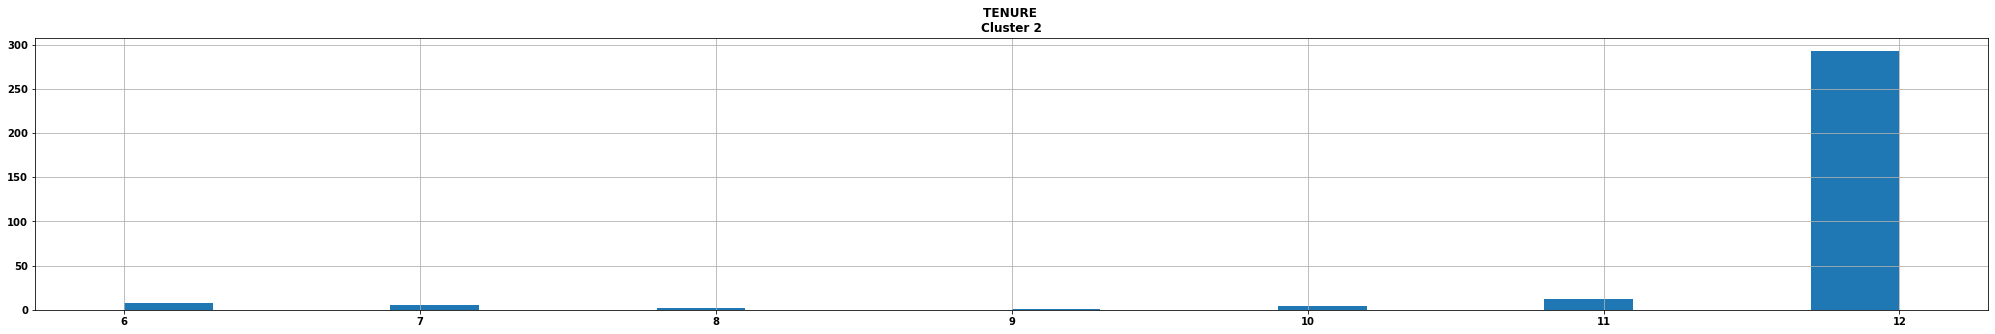

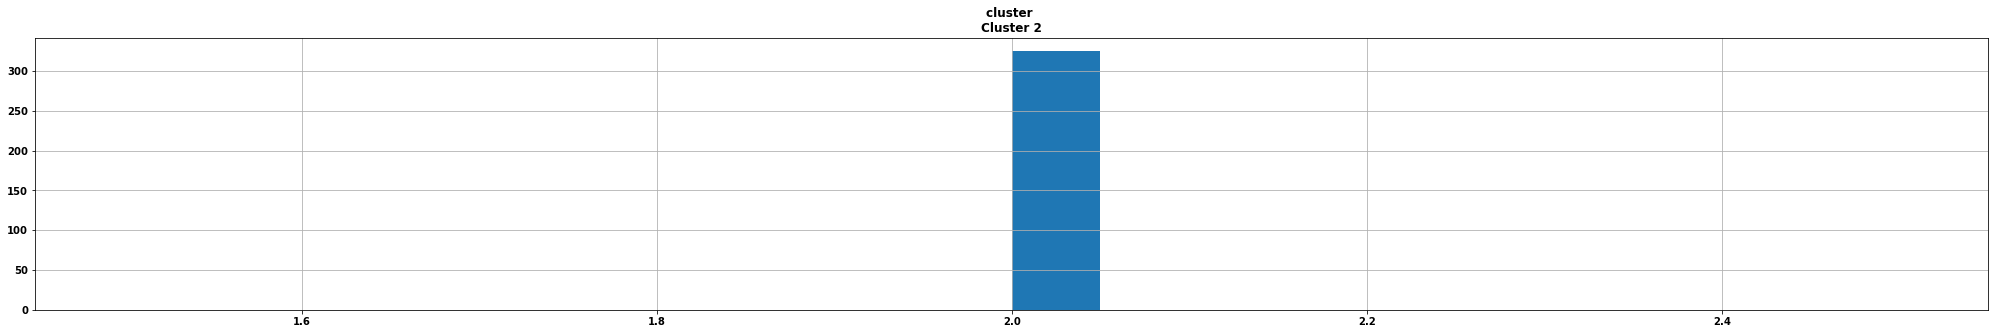

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count    325.000000         325.000000    325.000000        325.000000   
mean    4620.365632           0.937190   4781.720154       2882.351538   
std     3647.556994           0.177589   3811.665634       3214.646160   
min        0.000000           0.000000      0.000000          0.000000   
25%     1389.598597           1.000000   1257.770000         60.200000   
50%     3891.346976           1.000000   4371.820000       1987.850000   
75%     6832.111113           1.000000   7479.950000       4192.800000   
max    18495.558550           1.000000  15704.040000      14215.000000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count              325.000000    325.000000           325.000000   
mean              1901.282462   3952.818427             0.762498   
std               1947.827250   5224.429034             0.366525   
min                  0.000000      0.000000             0.000000   
25%                186.900000      0.000000             0.666667   
50%               1368.780000   1620.685551             1.000000   
75%               2935.890000   6419.421654             1.000000   
max               9251.650000  26194.049540             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                  325.000000                        325.000000   
mean                     0.472360                          0.662668   
std                      0.382678                          0.401425   
min                      0.000000                          0.000000   
25%                      0.083333                          0.250000   
50%                      0.500000                          0.909091   
75%                      0.833333                          1.000000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count              325.000000        325.000000     325.000000    325.000000   
mean                 0.256012         10.578462      67.144615  10024.153846   
std                  0.296671         18.604497      61.354068   4537.754140   
min                  0.000000          0.000000       0.000000   1200.000000   
25%                  0.000000          0.000000      14.000000   7000.000000   
50%                  0.166667          2.000000      59.000000   9500.000000   
75%                  0.416667         13.000000     100.000000  12500.000000   
max                  1.000000        123.000000     309.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT      TENURE  cluster  
count    325.000000        323.000000        325.000000  325.000000    325.0  
mean    8627.751735       3617.103381          0.203163   11.680000      2.0  
std     5688.098751       7816.861953          0.329828    1.176834      0.0  
min       92.865469         14.012997          0.000000    6.000000      2.0  
25%     4246.168346        593.699401          0.000000   12.000000      2.0  
50%     7883.621179       1395.715133          0.000000   12.000000      2.0  
75%    11381.633960       2930.457617          0.250000   12.000000      2.0  
max    34107.074990      61031.618600          1.000000   12.000000      2.0

In [72]:
# Define which cluster to plot:
cluster_nb_interest = 2

# # Plot histograms on the specified clusters of interest:
for i in marketing_data_autoEncode_labeled_df.columns:
    plt.figure(figsize=(35, 5))
    cluster = marketing_data_autoEncode_labeled_df[ marketing_data_autoEncode_labeled_df.cluster == cluster_nb_interest ]
    cluster[i].hist(bins=20)
    plt.title("{} \nCluster {}".format(i, cluster_nb_interest))
        
plt.show()

marketing_data_autoEncode_labeled_df[marketing_data_autoEncode_labeled_df.cluster == cluster_nb_interest].describe()

### Observation:

General Behaviour of Cluster 2 customers:
- These customers have a mean balance of ~USD4,600.
- These customers also have frequent changes to their balances and make purchases on products that is around ~USD480.
- The one-off purchases are typically around ~USD300 and presents with a lower fequency of ~0.13.
- These customers also tend to pay off 3.6% of the full payment monthly with this credit card.
- These customers are also very loyal with a tenure of around ~11 years with this bank.
- Interestingly, these customers presents with a very large sums of Cash Advance at around ~USD4,600.
- These customers can be seen to pay back thhe cash advances 50% of the time.
- On average these customers also have a high number of transactions performed with cash advance at around 14.7.
- Overall, these are customers can be said to use credit cards as a loan and therefore a lucrative sector of interest for the bank.



## 8.5 - Further Visualisation with Feature Engineering/Dimensionality Reduction: 

Similar to before, the following techniques will be:
1. Principal Component Analysis.
2. t-SNE

### 8.5.1 - Reduce the dimensions and Visualise with Principal Component Analysis:

In this case, PCA will be used to visualise the segmentation of the customer into its repective clusters. 

In [73]:
# Import the required libraries:
from sklearn.decomposition import PCA

In [74]:
# Instantiate the Principal Component Analysis:
pca = PCA(n_components=2)

# Fit the PCA to the Dataset, to get the Principal Components:
principal_components_autoencode = pca.fit_transform(x_dimension_reduced)

# Examine the change in shape:
print("Original Dataset shape:   ", marketing_data_labeled_df.shape)
print("PCA Transformed shape:", principal_components_autoencode.shape)

Original Dataset shape:    (8950, 18)
PCA Transformed shape: (8950, 2)


As it can be seen the dimensions of the dataset was reduced from 18 columns to just 2 columns.

#### Visualise the Principal Components:

In [75]:
# Create a DataFrame for the 2 Principal Components:
pca_AE_df = pd.DataFrame(data=principal_components_autoencode, columns=['pca1', 'pca2'])

# Add the Labels:
pca_AE_df = pd.concat([pca_AE_df, 
                       pd.DataFrame({'cluster': labels_5Clusters})], 
                      axis=1)

# Inspect:
pca_AE_df.head()

pca1      pca2  cluster
0 -2.750994 -0.294239        1
1  1.373679  2.085494        3
2 -1.404224 -0.842096        1
3 -0.821872 -0.416576        1
4 -2.772679 -0.274505        1

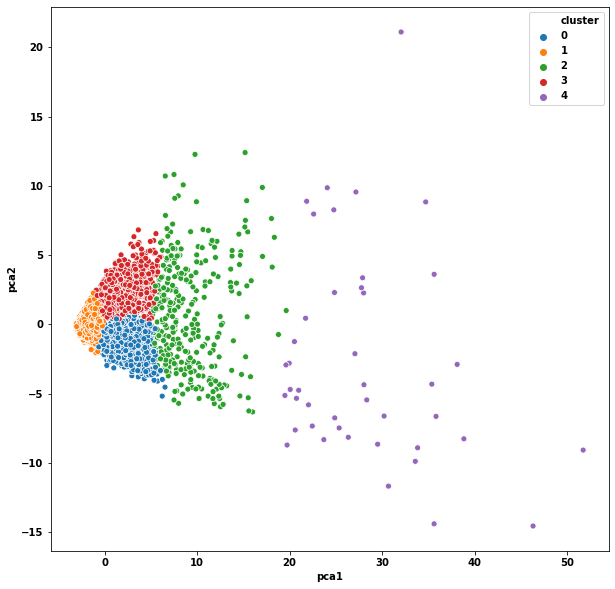

In [76]:
# Plot:
plt.figure(figsize=(10, 10))

ax = sns.scatterplot(x='pca1',
                     y='pca2',
                     hue="cluster",
                     data=pca_AE_df,
                     palette="tab10")
plt.show()

### Observation:

After some dimension reducing via the AutoEncoder model, the PCA projected plot above shows that the clusters are now separate with almost no overlap between the clusters. 

### 8.5.2 - Reduce the dimensions and Visualise with T-distributed Stochastic Neighbor Embedding (t-SNE): 


In [77]:
# Import the require library:
from sklearn.manifold import TSNE

In [78]:
# Instantiate a t-SNE object:
tsne = TSNE(n_components=2, perplexity=30.0, verbose=1)

# Fit the PCA to the Dataset, to get the Principal Components:
tsne_AE_df = tsne.fit_transform(x_dimension_reduced)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8950 samples in 0.019s...
[t-SNE] Computed neighbors for 8950 samples in 0.528s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8950
[t-SNE] Computed conditional probabilities for sample 2000 / 8950
[t-SNE] Computed conditional probabilities for sample 3000 / 8950
[t-SNE] Computed conditional probabilities for sample 4000 / 8950
[t-SNE] Computed conditional probabilities for sample 5000 / 8950
[t-SNE] Computed conditional probabilities for sample 6000 / 8950
[t-SNE] Computed conditional probabilities for sample 7000 / 8950
[t-SNE] Computed conditional probabilities for sample 8000 / 8950
[t-SNE] Computed conditional probabilities for sample 8950 / 8950
[t-SNE] Mean sigma: 0.252323
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.543015
[t-SNE] KL divergence after 1000 iterations: 1.574932


In [79]:
# Convert to DataFrame:
tSNE_AE_result_df = pd.DataFrame(tsne_AE_df, columns=['tSNE1', 'tSNE2'])
tSNE_AE_result_df.head()

# Add the Labels:
tSNE_AE_result_df = pd.concat([tSNE_AE_result_df, 
                    pd.DataFrame({'cluster': labels_5Clusters})], 
                   axis=1)

# Inspect:
tSNE_AE_result_df.head()

tSNE1      tSNE2  cluster
0  82.543800  -6.959458        1
1 -53.498203  24.026468        3
2  27.907997  -1.045505        1
3   3.363875  23.289555        1
4  69.948357  20.447605        1

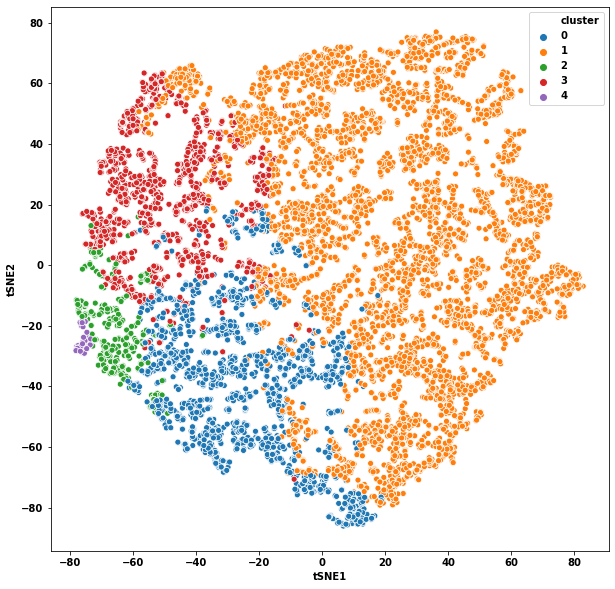

In [80]:
# Plot:
plt.figure(figsize=(10, 10))

ax = sns.scatterplot(x='tSNE1',
                     y='tSNE2',
                     hue="cluster",
                     data=tSNE_AE_result_df,
                     palette="tab10")
plt.show()

### Observations:

Although the cluster separation in the t-SNE plot is not as clear as the PCA plot, majority of the data points are still grouped together and this can be considered a good outcome.



## 9 - Removing the Outliers:

An additional refinement that can be implemented to this customer segmentation task is thhe removal of the outliers from the dataset. Outliers can skew the distribution of the data and its statistical measures which will lead to an improper represenation of the underlying data/relationship. Thus, the removal of the outliers prior to modeling should result in a better fit. 

As K-means Clustering computes the centroids and data points through a distance metric, the resulting position of the centroid can be skewed away from the optimum position by outliers of the group. 


In [81]:
# Import the required Library:
from scipy.stats import zscore

##### Define a custom outlier removal class to be compatible with the Pipeline:

In [82]:
# Define the Custom Outlier Removal Class:
class CustomOutlierRemoval(TransformerMixin):
    """ This builds the Custom Outlier Removal, that inherits the TransformerMixin class.
        It will remove outliers based on Z-scores.
        The inheritance should have a .fit_transform method to call with .fit and 
        .transform methods.
    Notes:
        - Requires the scipy.stats "zscore" module.    
    """
    # Initialise one instance attribute, the columns:
    def __init__(self):
        pass
    
    # Remove the Outliers:
    def transform(self, dataFrame):
        X = dataFrame.copy()
                
        z_scores = zscore(X)
        outlier_filter = (np.abs(z_scores) < 3).all(axis=1)
        X = X[outlier_filter]
            
        return X
    
    # Fit method, that follows the fit method from scikit-learn:
    def fit(self, *_):
        return self
    

### 9.1 - Apply it in the Pipeline to remove the Outliers:

In [83]:
# ==============================================================================
# 1. Impute the missing values.
# ==============================================================================
# list the columns to impute:
columns_to_impute = ['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']

# Apply the custom encoder for Ordinal columns, instantiate:
cc_impute_columns = CustomImputer(col=columns_to_impute, impute_strategy='mean', print_log=False)

# ==============================================================================
# 2. Drop the unwanted columns.
# ==============================================================================
# list the columns to drop:
columns_to_drop = ['CUST_ID']

# Apply the custom encoder for Ordinal columns, instantiate:
cc_drop_columns = CustomDropUnwantedColumns(col=columns_to_drop)

# ==============================================================================
# 3. Remove the Outliers:
# ==============================================================================
# scaler = scale_features_dataFrame()
c_Outlier = CustomOutlierRemoval()

# ==============================================================================
# 4. Scale the features in the dataset:
# ==============================================================================
# scaler = scale_features_dataFrame()
scaler = scale_features_dataFrame(scaler_type='Standard', set_numpy_array=True)


In [84]:
# Define the Pipeline Sequence:
pipe_preprocessing = Pipeline(steps=[("impute", cc_impute_columns),
                                     ("drop_columns", cc_drop_columns),
                                     ('outlier_removal', c_Outlier),
                                     ("scaler", scaler)]
                             )

# Fit the Pipeline to the Dataset:
pipe_preprocessing.fit(marketing_data_df)

# Transform the Dataset:
marketing_processed_df = pipe_preprocessing.transform(marketing_data_df)
x_marketing_features = marketing_processed_df

# Inspect:
x_marketing_features

array([[-0.80965236, -0.33491067, -0.64144794, ..., -0.57780385,
        -0.53152321,  0.31218731],
       [ 1.27327162,  0.09112689, -0.73448727, ...,  0.6237473 ,
         0.2326373 ,  0.31218731],
       [ 0.80727139,  0.51716446,  0.01955068, ...,  0.05048463,
        -0.53152321,  0.31218731],
       ...,
       [-0.26386232, -0.65444001, -0.73448727, ..., -0.32215134,
        -0.53152321, -4.6976356 ],
       [-0.74584887,  0.51716446, -0.30439979, ..., -0.5969573 ,
        -0.53152321, -4.6976356 ],
       [-0.61848108, -0.65444001, -0.65529656, ..., -0.49336345,
        -0.53152321, -4.6976356 ]])

### 9.2 - Fit the dataset with the K-means Clustering model:

#### 9.2.1 - Determine the optimum number of clusters: 

#### WCSS (Elbow Method):


In [85]:
# Import the required Libraries:
from sklearn.cluster import KMeans

In [86]:
# Define the empty WCSS list to be filled:
wcss_list = []

# Set the range of clusters to compute over:
list_clusters = range(1, 20)

# Compute the Clusters with K-means to find the optimum numberr of clusters:
for idx in list_clusters:
    kmeans_model = KMeans(n_clusters=idx, 
                          init='k-means++',
                          max_iter=300, 
                          n_init=10, 
                          random_state=101,
                          algorithm='auto')
    
    # fit the model to the dataset:
    kmeans_model.fit(x_marketing_features)
    
    # Update/Append the list (WCSS):
    wcss_list.append(kmeans_model.inertia_)

##### Plot the Elbow Method:

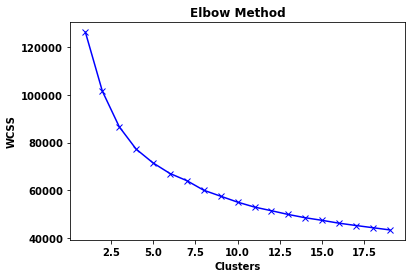

In [87]:
plt.plot(list_clusters, wcss_list, 'bx-')
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

### Observation:

The trend of the line begins with a very large number of WCSS (as expected) and as the number of clusters used in the computation increases, the WCSS begins to drop. From the chart, it can be discerned that the optimum __number of cluster is around 6 to 10__.

#### Silhouette Scores Method:

Let's use the Silhouette score to finalise hte optimum k-number.

In [88]:
# Import the required Library:
from sklearn.metrics import silhouette_score

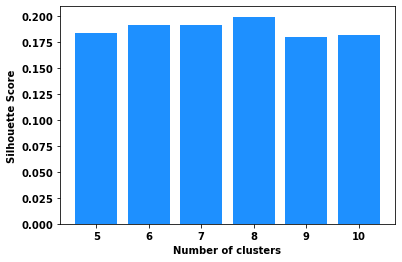

In [89]:
# Define an empty list of silhouette scores to be filled:
silhouette_scores_list = [] 

# Compute the scores for each of the number of clusters: number of cluster will be 5 to 15.
for nb_cluster in range(5, 11):
    silhouette_scores_list.append( 
        silhouette_score(x_marketing_features, KMeans(n_clusters=nb_cluster, 
                                                      init='k-means++',
                                                      max_iter=300, 
                                                      n_init=10, 
                                                      random_state=101,
                                                      algorithm='auto').fit_predict(x_marketing_features)
                        )) 
    
# Plot: Compare the results.
k = list( range(5, 11) )
plt.bar(k, silhouette_scores_list, color='dodgerblue') 
plt.xlabel('Number of clusters', fontsize=10) 
plt.ylabel('Silhouette Score', fontsize=10) 
plt.show()

In [90]:
# Save the scores as DataFrame:
silhouette_scores_df = pd.DataFrame({'k_clusters': k, 
                                     'silhouette_scores': silhouette_scores_list})

# Save the Optimum Cluster Number:
optimum_cluster_number = silhouette_scores_df.k_clusters[ silhouette_scores_df.silhouette_scores.idxmax() ]
print("The optimum number of clusters that should be used is: {}".format(optimum_cluster_number))

The optimum number of clusters that should be used is: 8


### 9.2.2 - Apply the K-Means Model: 

Set the optimum number of cluster = 8.

In [91]:
# Instantiate The K-means Clustering Model:
kmeans_model_8Clusters = KMeans(n_clusters=optimum_cluster_number,
                                 init='k-means++',
                                 max_iter=300, 
                                 n_init=10, 
                                 random_state=101,
                                 algorithm='auto')

# fit the model to the dataset:
kmeans_model_8Clusters.fit(X=x_marketing_features)


KMeans(random_state=101)

### 9.2.3 - Grab the new labels:

In [92]:
# Extract the label data from the model:
labels_8Clusters = kmeans_model_8Clusters.labels_

# Inspect: 
labels_8Clusters.shape, labels_8Clusters.max(), labels_8Clusters.min()

((7434,), 7, 0)

### 9.3 - Further Visualisation with Feature Engineering/Dimensionality Reduction: 

In this section, the following techniques will be utilised on the dataset for dimensionality reduction and visualisation:
1. Principal Component Analysis.
2. t-SNE

#### Before Continuing, let's process the "x_marketing_features" into a dataframe through the pipeline again for compatibility:

This can be done by setting the parameter "set_numpy_array" to False in the "scaler" module.

In [93]:
# ==============================================================================
# 1. Impute the missing values.
# ==============================================================================
# list the columns to impute:
columns_to_impute = ['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']

# Apply the custom encoder for Ordinal columns, instantiate:
cc_impute_columns = CustomImputer(col=columns_to_impute, impute_strategy='mean', print_log=False)

# ==============================================================================
# 2. Drop the unwanted columns.
# ==============================================================================
# list the columns to drop:
columns_to_drop = ['CUST_ID']

# Apply the custom encoder for Ordinal columns, instantiate:
cc_drop_columns = CustomDropUnwantedColumns(col=columns_to_drop)

# ==============================================================================
# 3. Remove the Outliers:
# ==============================================================================
# scaler = scale_features_dataFrame()
c_Outlier = CustomOutlierRemoval()

# ==============================================================================
# 4. Scale the features in the dataset:
# ==============================================================================
# scaler = scale_features_dataFrame()
scaler = scale_features_dataFrame(scaler_type='Standard', set_numpy_array=False)


In [94]:
# Define the Pipeline Sequence:
pipe_preprocessing = Pipeline(steps=[("impute", cc_impute_columns),
                                     ("drop_columns", cc_drop_columns),
                                     ('outlier_removal', c_Outlier),
                                     ("scaler", scaler)]
                             )

# Fit the Pipeline to the Dataset:
pipe_preprocessing.fit(marketing_data_df)

# Transform the Dataset:
marketing_processed_df = pipe_preprocessing.transform(marketing_data_df)
x_marketing_features_df = marketing_processed_df

# Inspect:
x_marketing_features_df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.809652          -0.334911  -0.641448         -0.543505   
1  1.273272           0.091127  -0.734487         -0.543505   
2  0.807271           0.517164   0.019551          0.430864   
3  0.261448          -1.186986   0.727420          1.345575   
4 -0.297867           0.517164  -0.718883         -0.523341   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.448067     -0.543984            -0.805098   
1               -0.636612      4.671914            -1.225631   
2               -0.636612     -0.543984             1.297564   
3               -0.636612     -0.377388            -1.015366   
4               -0.636612     -0.543984            -1.015366   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.668791                         -0.698321   
1                   -0.668791                         -0.910579   
2                    2.808268                         -0.910579   
3                   -0.379037                         -0.910579   
4                   -0.379037                         -0.910579   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.690806         -0.587319      -0.665235     -1.021765   
1                0.883825          0.427706      -0.797517      1.022039   
2               -0.690806         -0.587319      -0.003826      1.192356   
3               -0.165931         -0.333563      -0.731376      1.192356   
4               -0.690806         -0.587319      -0.731376     -0.953638   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0 -0.762853         -0.577804         -0.531523  0.312187  
1  1.953121          0.623747          0.232637  0.312187  
2 -0.470272          0.050485         -0.531523  0.312187  
3 -0.903344          0.355657         -0.531523  0.312187  
4 -0.431099         -0.442194         -0.531523  0.312187

#### Attach the Labels from K-Means to "x_marketing_features_df" dataframe:

In [95]:
# Update the "x_marketing_features_df" with a new Column (labels): concatenate.
marketing_data_labeled_df = pd.concat([x_marketing_features_df.reset_index(drop=True), 
                                       pd.DataFrame({'cluster': labels_8Clusters})], 
                                      axis=1)

# Inspect:
marketing_data_labeled_df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.809652          -0.334911  -0.641448         -0.543505   
1  1.273272           0.091127  -0.734487         -0.543505   
2  0.807271           0.517164   0.019551          0.430864   
3  0.261448          -1.186986   0.727420          1.345575   
4 -0.297867           0.517164  -0.718883         -0.523341   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.448067     -0.543984            -0.805098   
1               -0.636612      4.671914            -1.225631   
2               -0.636612     -0.543984             1.297564   
3               -0.636612     -0.377388            -1.015366   
4               -0.636612     -0.543984            -1.015366   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.668791                         -0.698321   
1                   -0.668791                         -0.910579   
2                    2.808268                         -0.910579   
3                   -0.379037                         -0.910579   
4                   -0.379037                         -0.910579   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.690806         -0.587319      -0.665235     -1.021765   
1                0.883825          0.427706      -0.797517      1.022039   
2               -0.690806         -0.587319      -0.003826      1.192356   
3               -0.165931         -0.333563      -0.731376      1.192356   
4               -0.690806         -0.587319      -0.731376     -0.953638   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  cluster  
0 -0.762853         -0.577804         -0.531523  0.312187        7  
1  1.953121          0.623747          0.232637  0.312187        2  
2 -0.470272          0.050485         -0.531523  0.312187        4  
3 -0.903344          0.355657         -0.531523  0.312187        7  
4 -0.431099         -0.442194         -0.531523  0.312187        7

### 9.3.1 - Reduce the dimensions and Visualise with Principal Component Analysis:

In this case, PCA will be used to visualise the segmentation of the customer into its repective clusters from K-means model. 

In [96]:
# Import the required libraries:
from sklearn.decomposition import PCA

In [97]:
# Instantiate the Principal Component Analysis:
pca = PCA(n_components=2)

# Fit the PCA to the Dataset, to get the Principal Components:
principal_components = pca.fit_transform(marketing_data_labeled_df)

# Examine the change in shape:
print("Original Dataset shape:   ", marketing_data_labeled_df.shape)
print("PCA Transformed shape:", principal_components.shape)

Original Dataset shape:    (7434, 18)
PCA Transformed shape: (7434, 2)


As it can be seen the dimensions of the dataset was reduced from 18 columns to just 2 columns.

#### Visualise the Principal Components:

In [98]:
# Create a DataFrame for the 2 Principal Components:
pca_df = pd.DataFrame(data=principal_components, columns=['pca1', 'pca2'])

# Add the Labels:
pca_df = pd.concat([pca_df, 
                    pd.DataFrame({'cluster': labels_8Clusters})], 
                   axis=1)

# Inspect:
pca_df.head()

pca1      pca2  cluster
0 -3.529499  0.158638        7
1  0.846907 -3.574730        2
2 -0.060968  1.497273        4
3 -3.117112  0.707250        7
4 -3.761846  0.173475        7

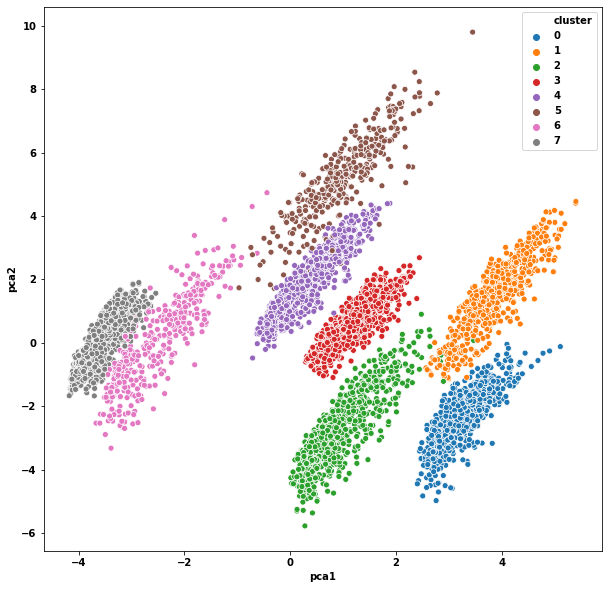

In [99]:
# Plot:
plt.figure(figsize=(10, 10))

ax = sns.scatterplot(x='pca1',
                     y='pca2',
                     hue="cluster",
                     data=pca_df,
                     palette="tab10")
plt.show()

### Observation:

Seems like removing the Outliers from the dataset cleared a lot of the overlapping issues from earlier attempts. Overall, the clusters are well separated. 

Next stage, is to output the cluster's attributes and determine an updated insight.

## 10 - Visualise the Clusters of the dataset and its Attributes:

### 10.1 - Update the ORGINAL Dataset with a new Column (labels):

In [100]:
# Update the ORGINAL Dataset with a new Column (labels): concatenate.
# Note: the "CUST_ID" column must be dropped here.
marketing_data_labeled_df = pd.concat([marketing_data_df.drop(labels='CUST_ID', axis=1), 
                                                  pd.DataFrame({'cluster': labels_8Clusters})], 
                                                 axis=1)

# Inspect:
marketing_data_labeled_df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0   201.802084        139.509787          0.000000      12      7.0  
1  4103.032597       1072.340217          0.222222      12      2.0  
2   622.066742        627.284787          0.000000      12      4.0  
3     0.000000               NaN          0.000000      12      7.0  
4   678.334763        244.791237          0.000000      12      7.0

### 10.2 - Visualise the Clusters:


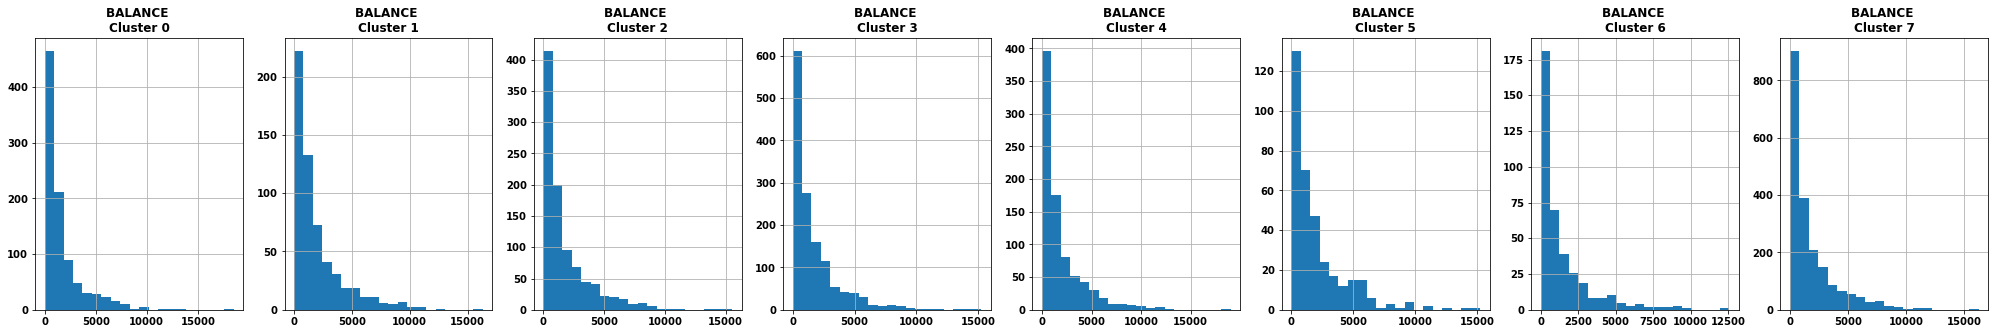

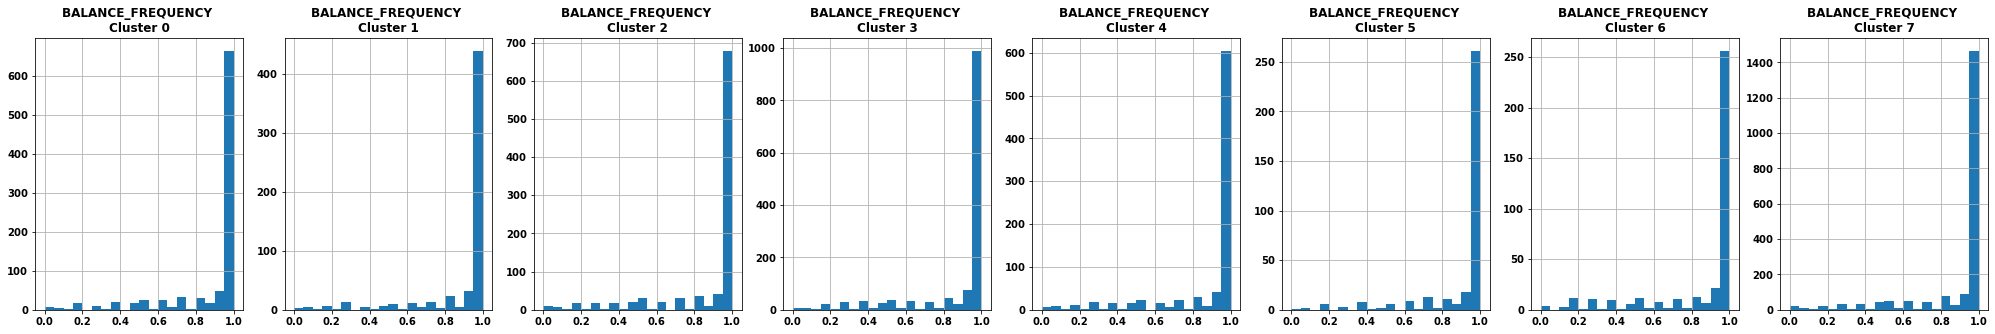

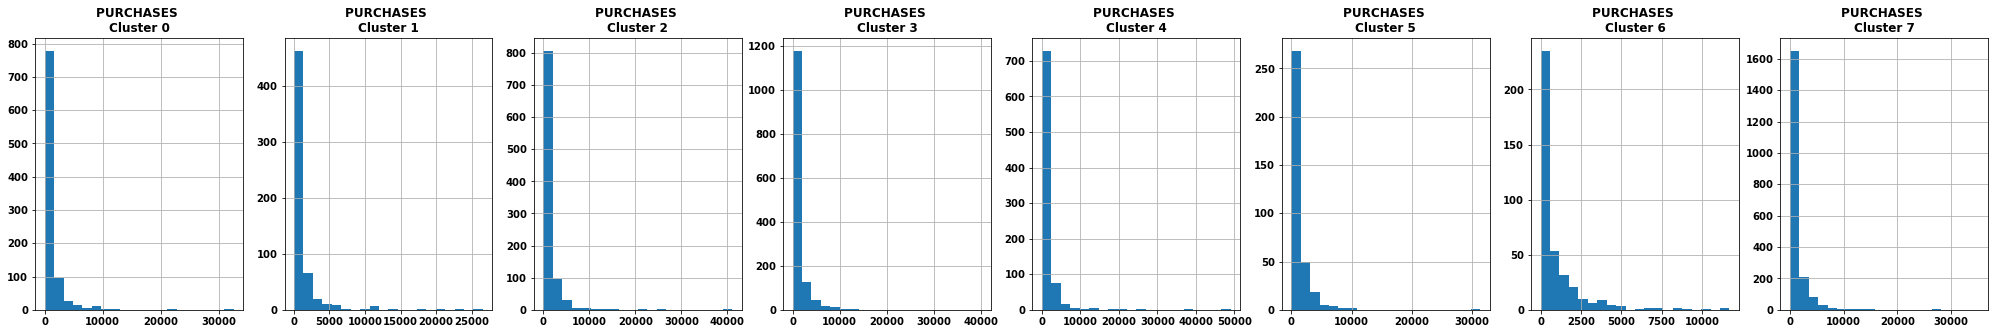

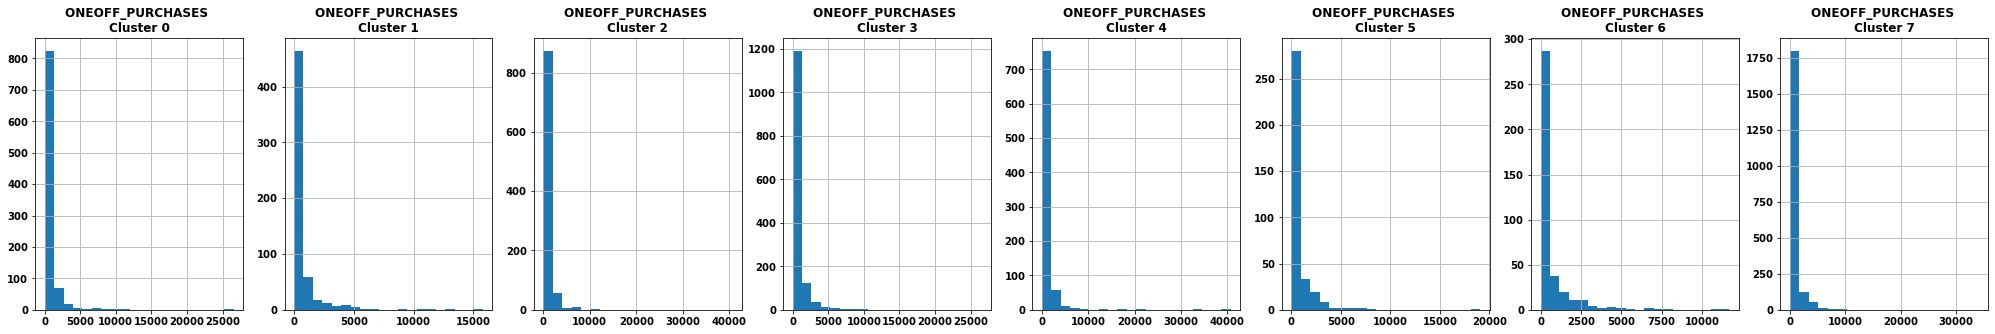

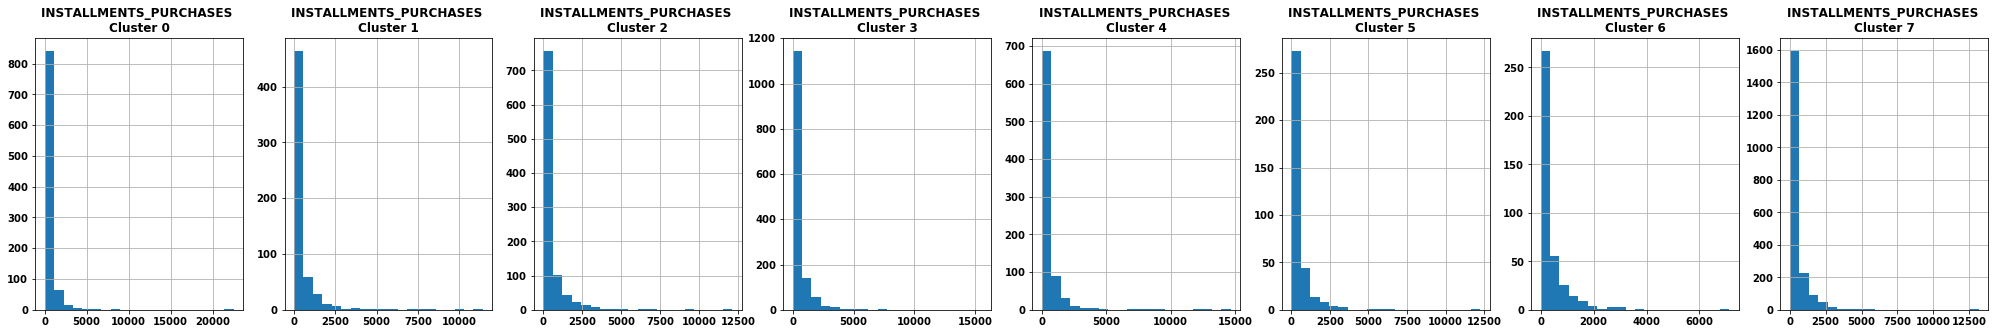

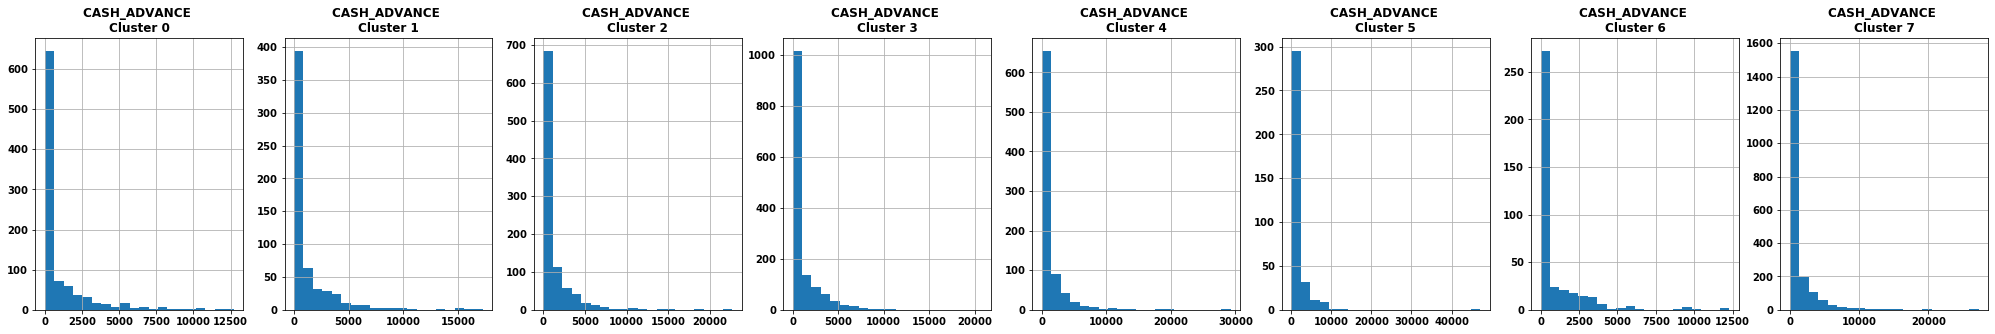

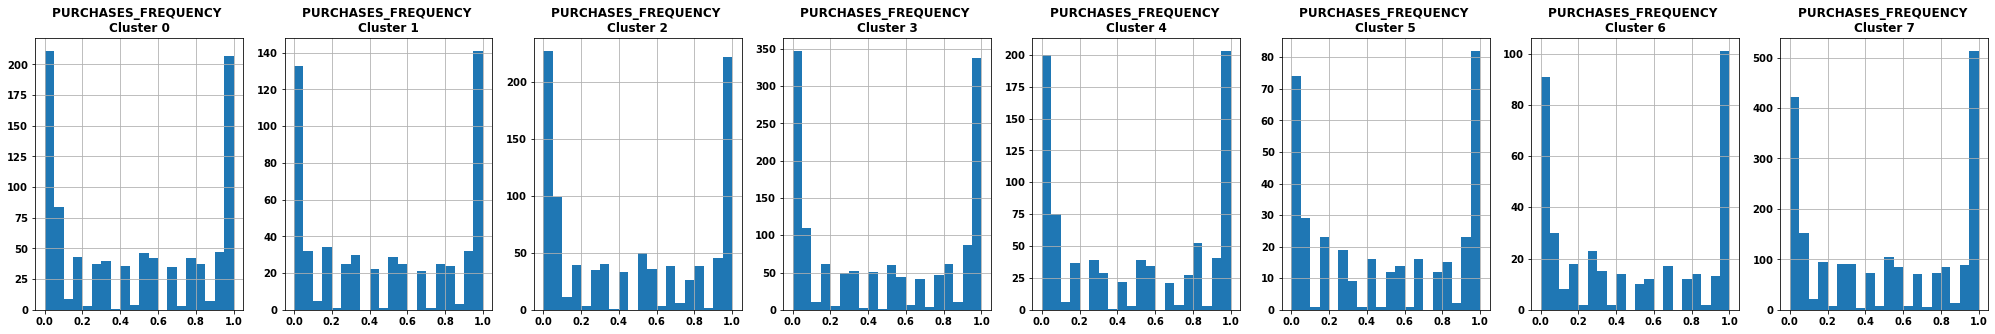

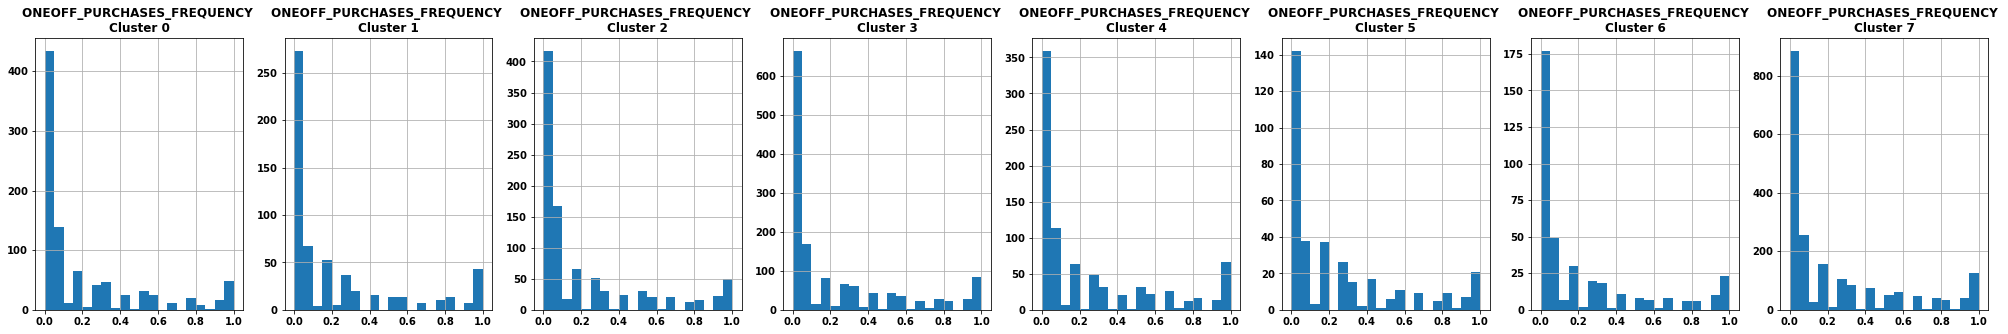

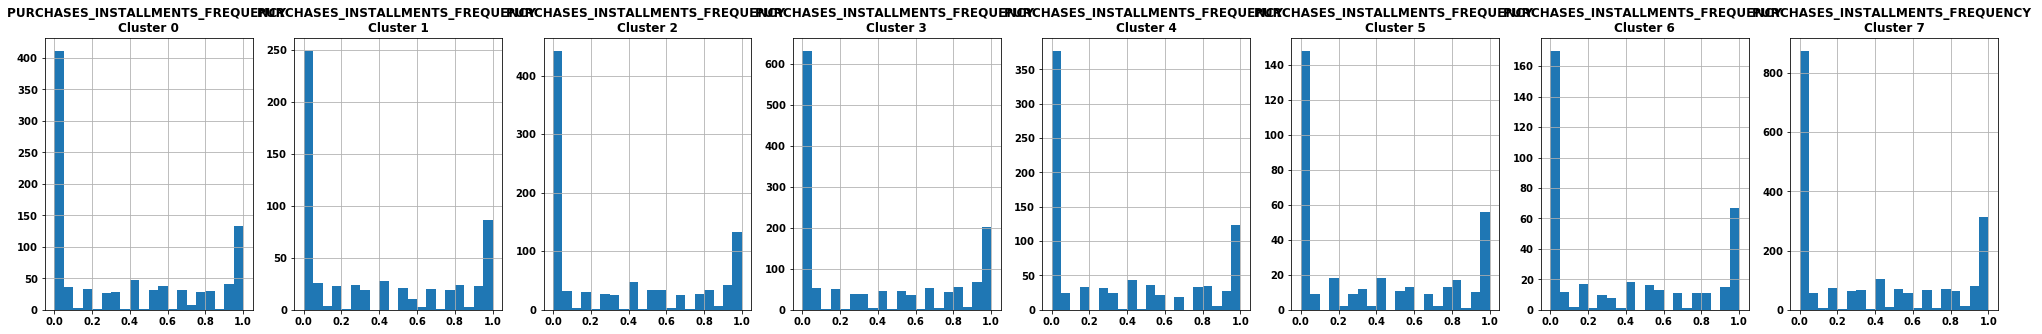

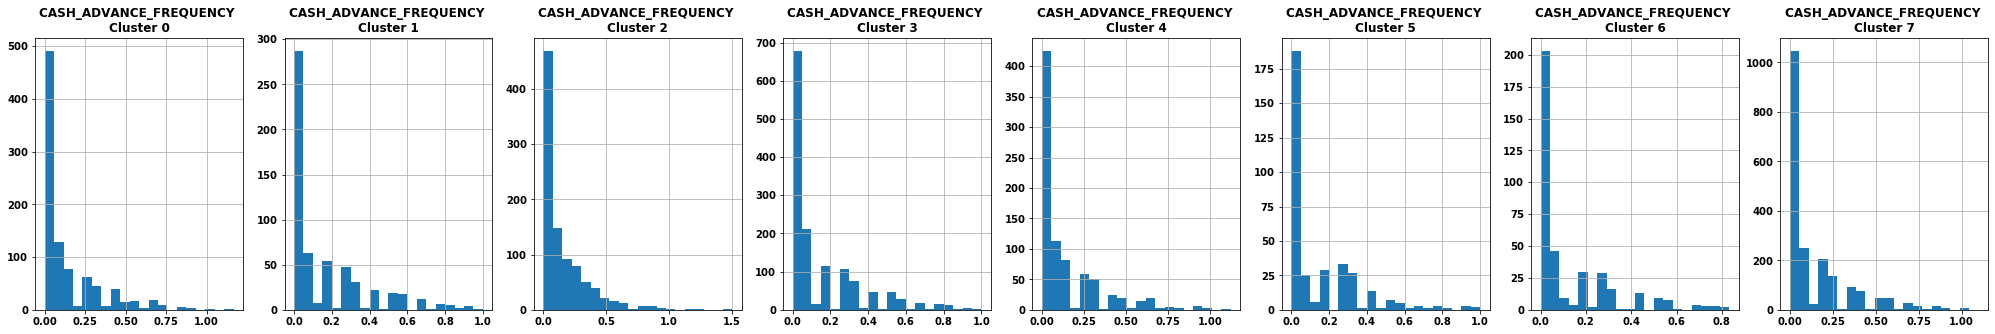

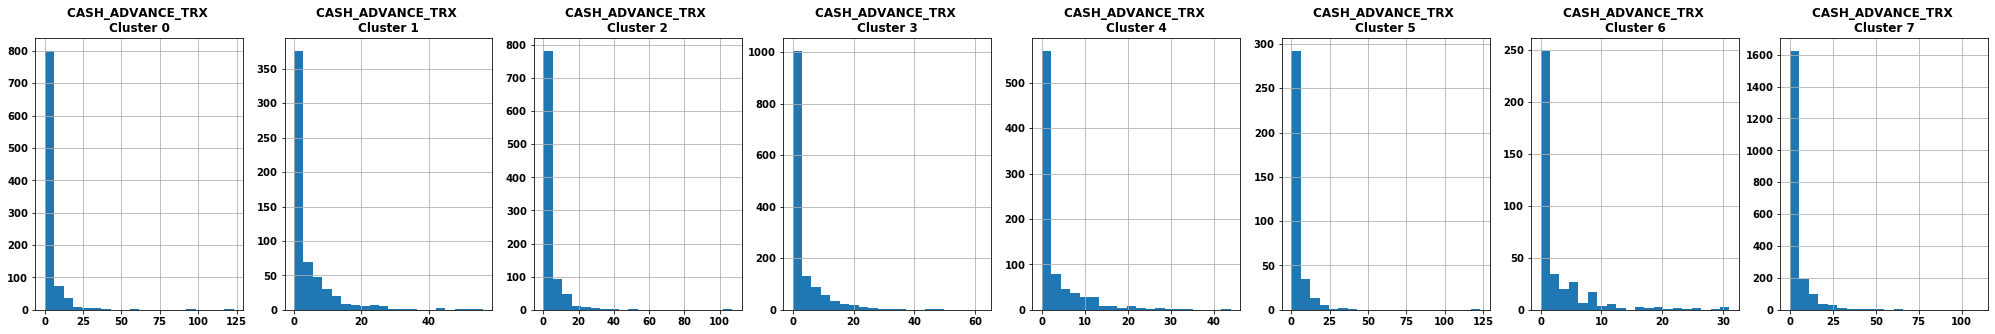

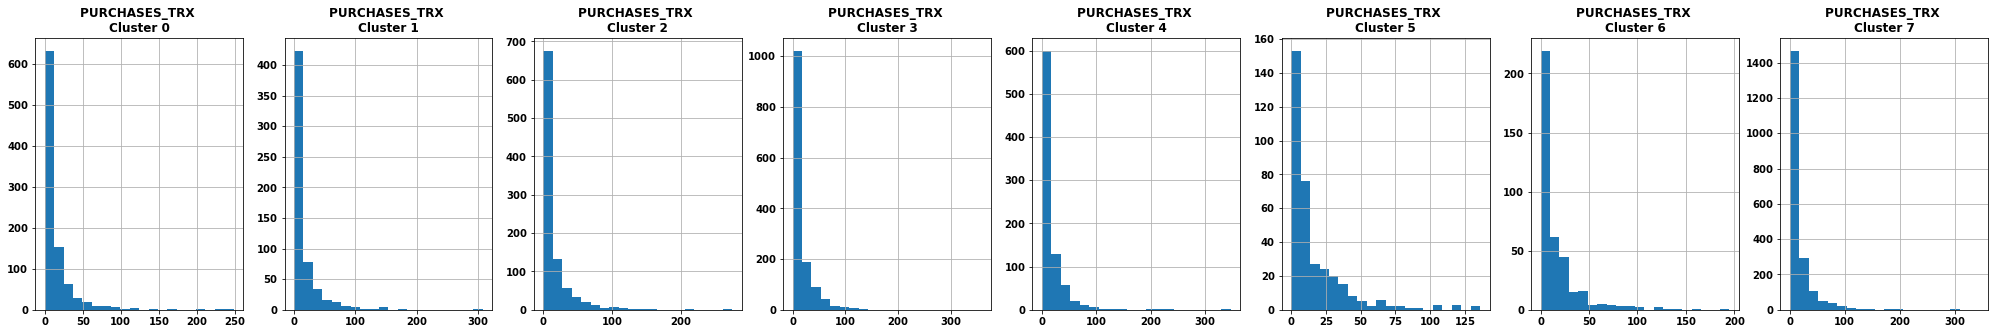

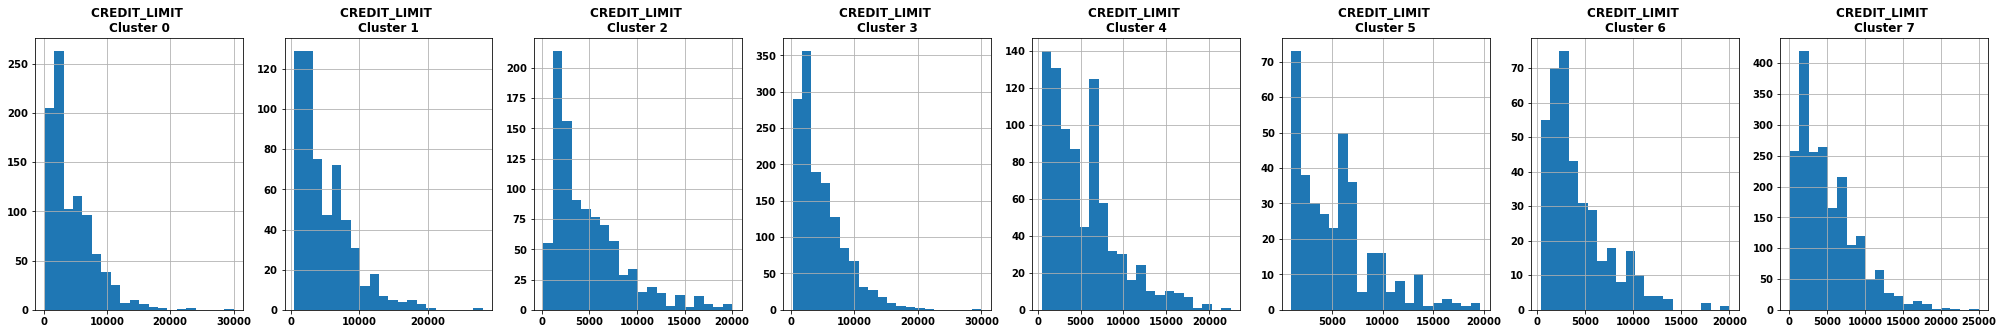

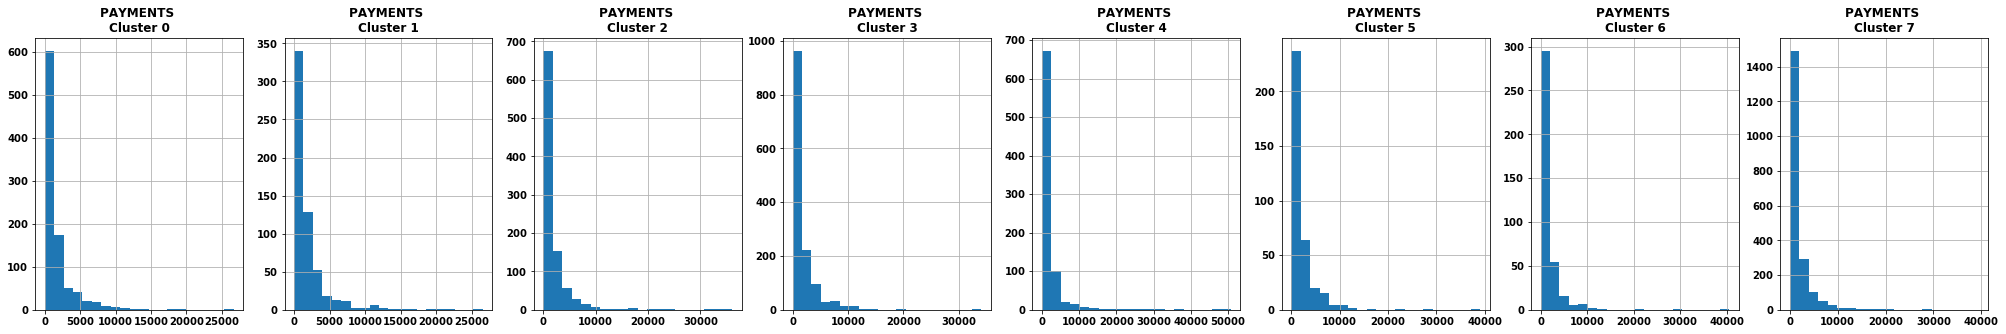

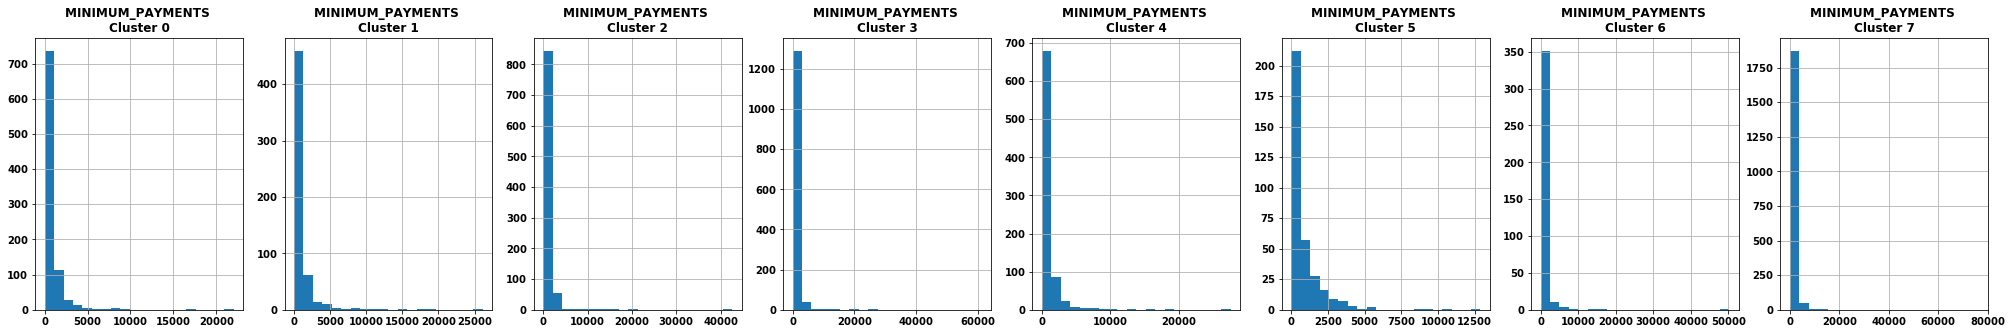

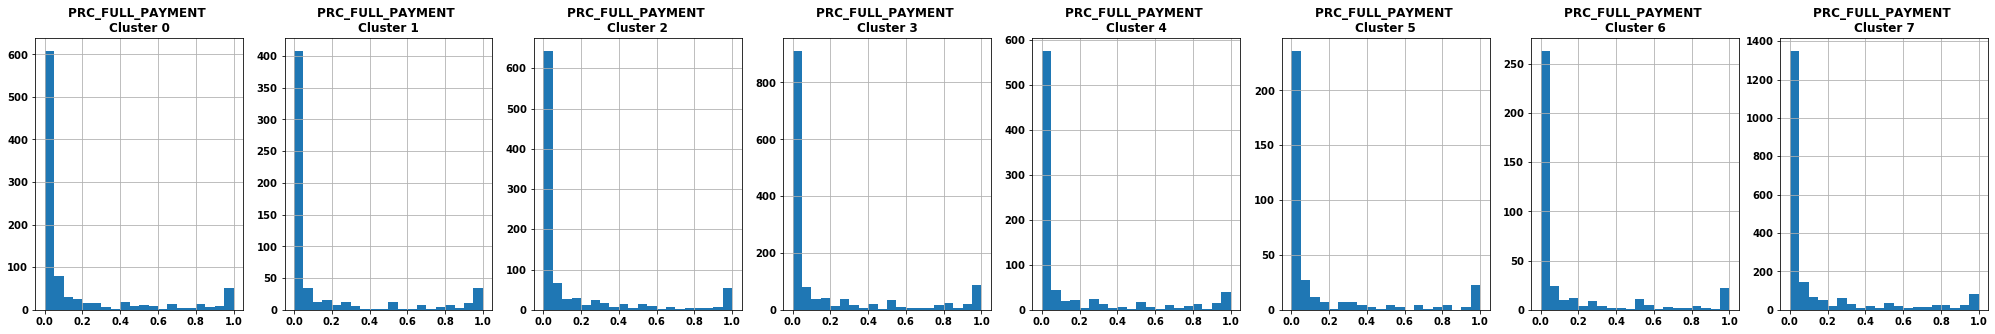

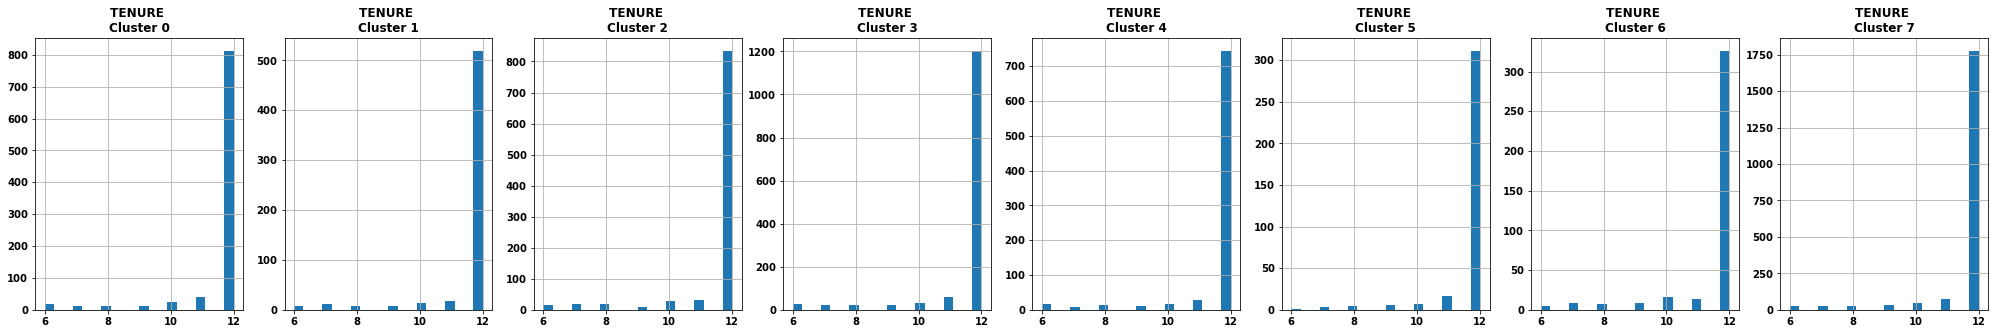

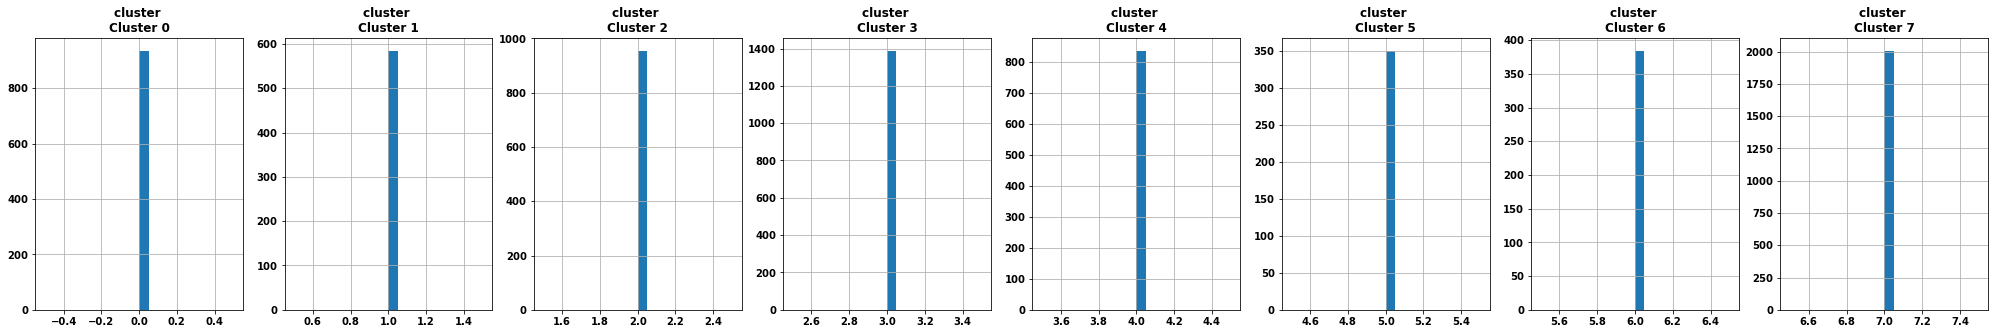

In [101]:
# Plot histograms on the various clusters within the dataset:
for i in marketing_data_labeled_df.columns:
    plt.figure(figsize=(35, 5))
    for j in range(optimum_cluster_number):
        plt.subplot(1, optimum_cluster_number, j+1)
        cluster = marketing_data_labeled_df[ marketing_data_labeled_df.cluster == j ]
        cluster[i].hist(bins=20)
        plt.title("{} \nCluster {}".format(i, j))
        
plt.show()

#### Plot out some example clusters to examine: Cluster 0 again

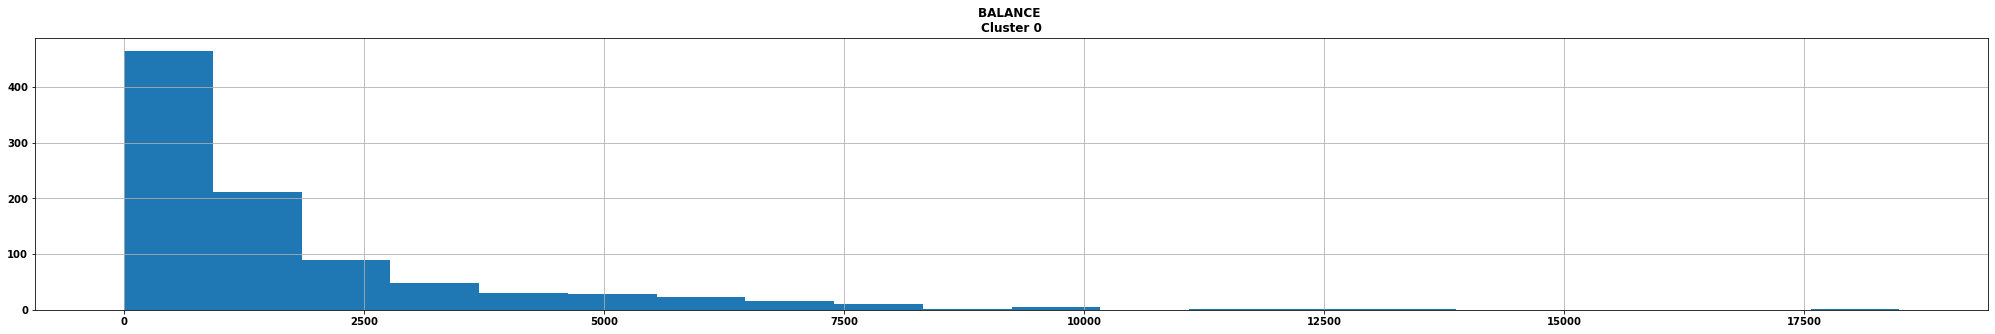

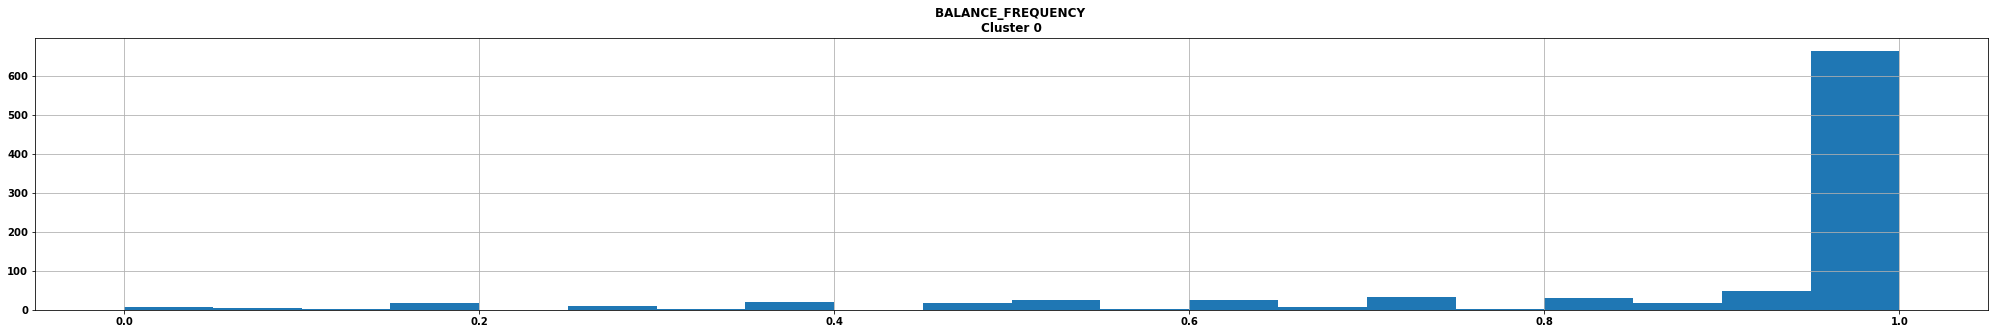

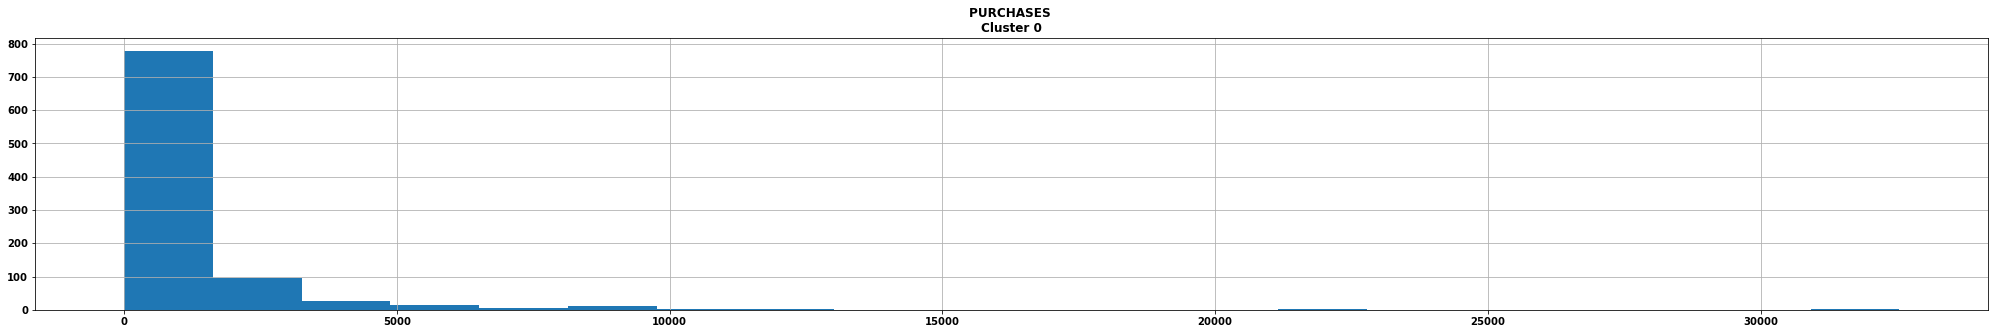

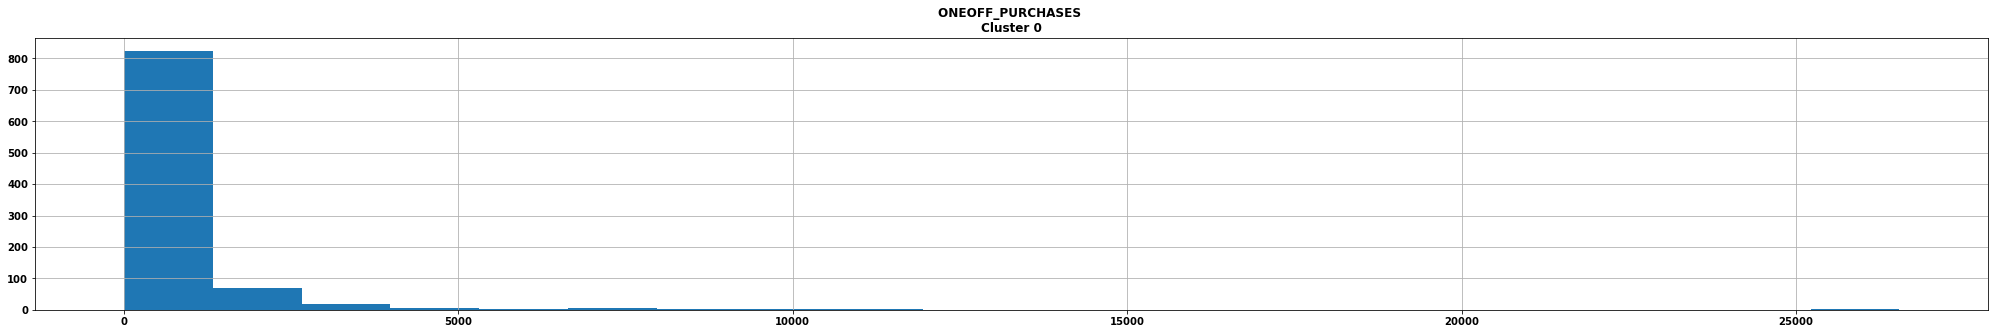

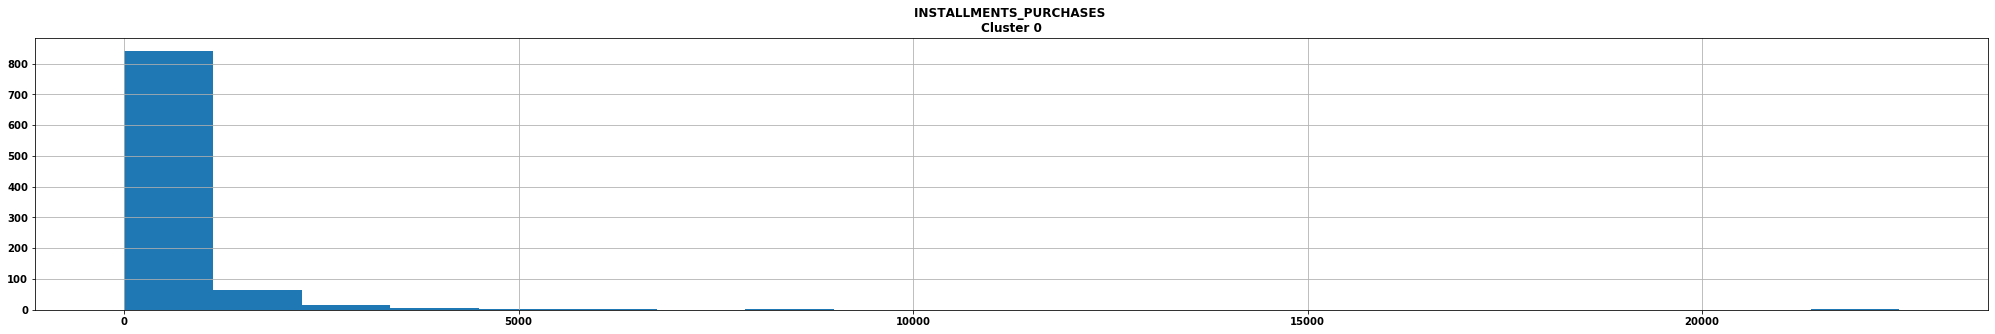

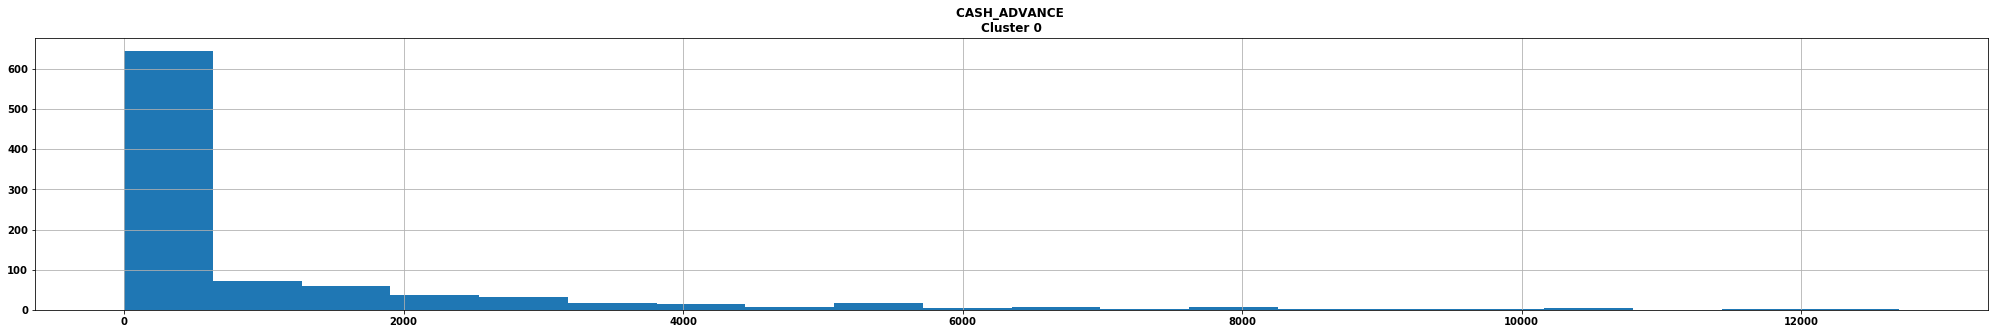

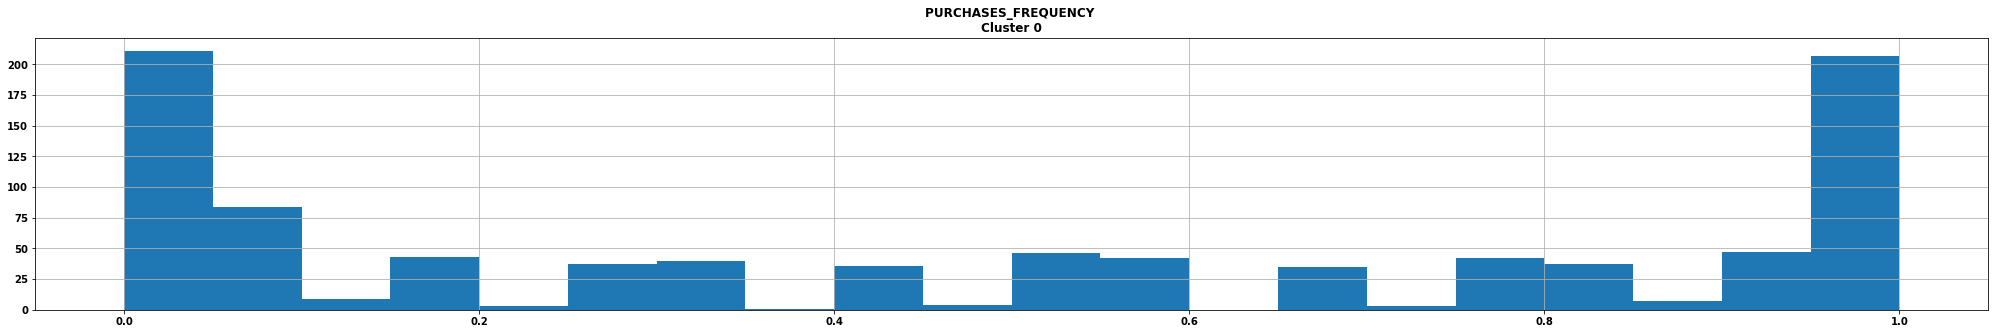

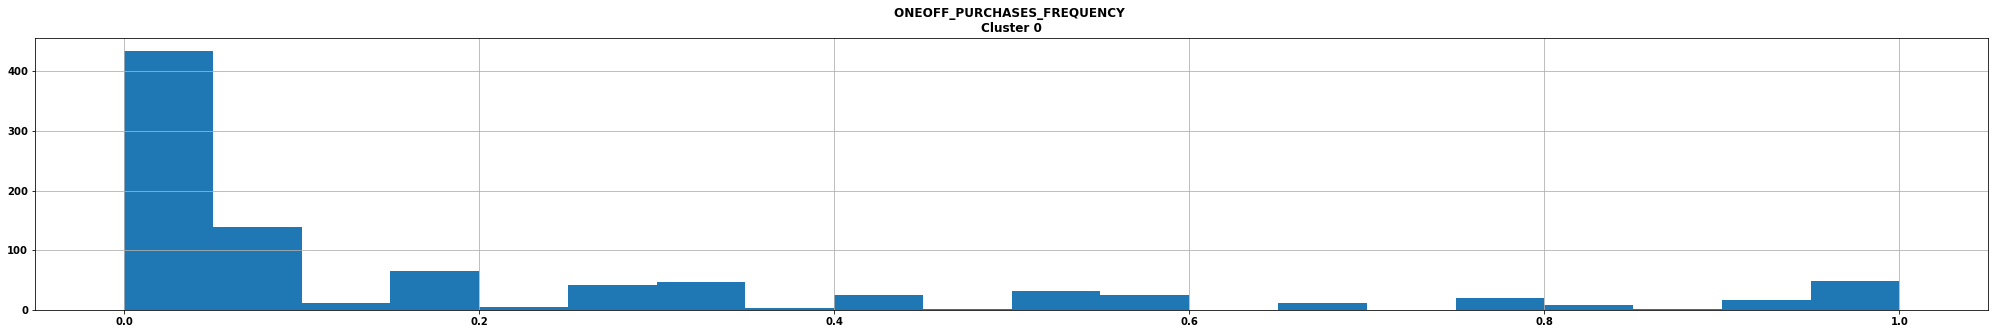

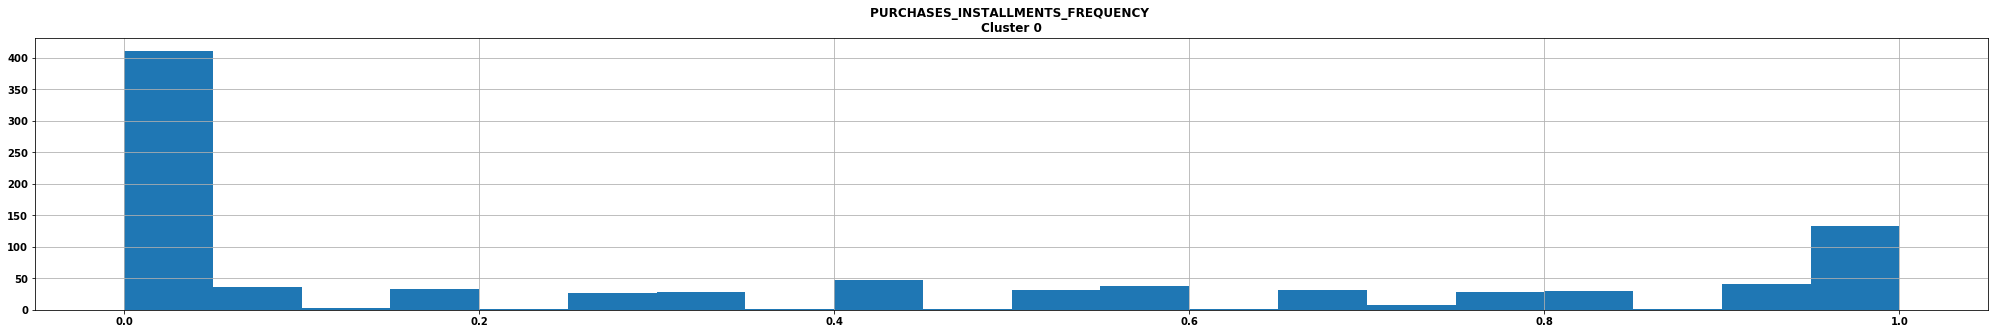

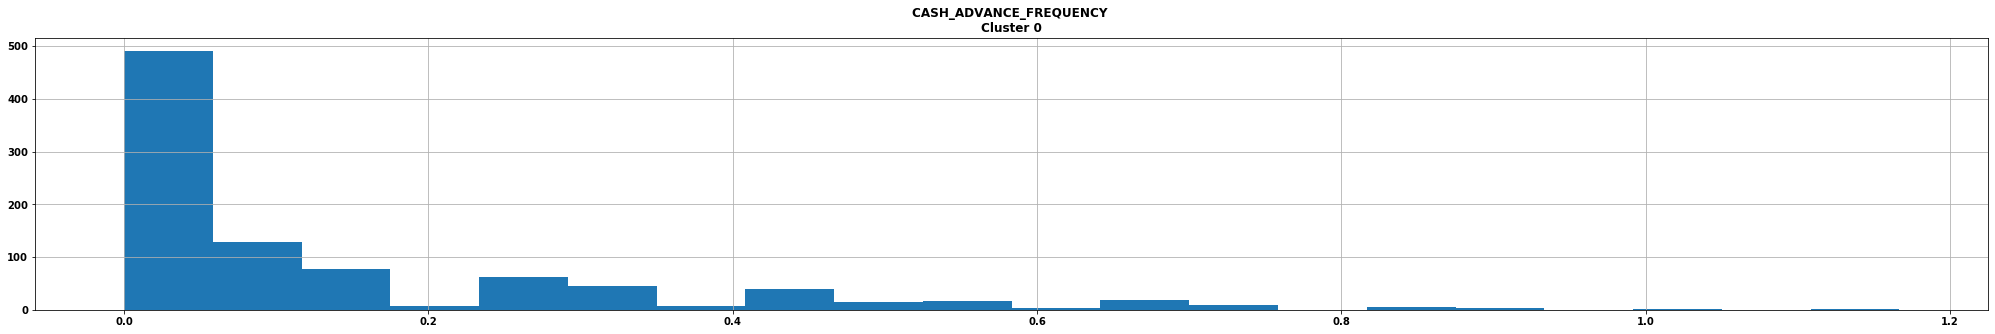

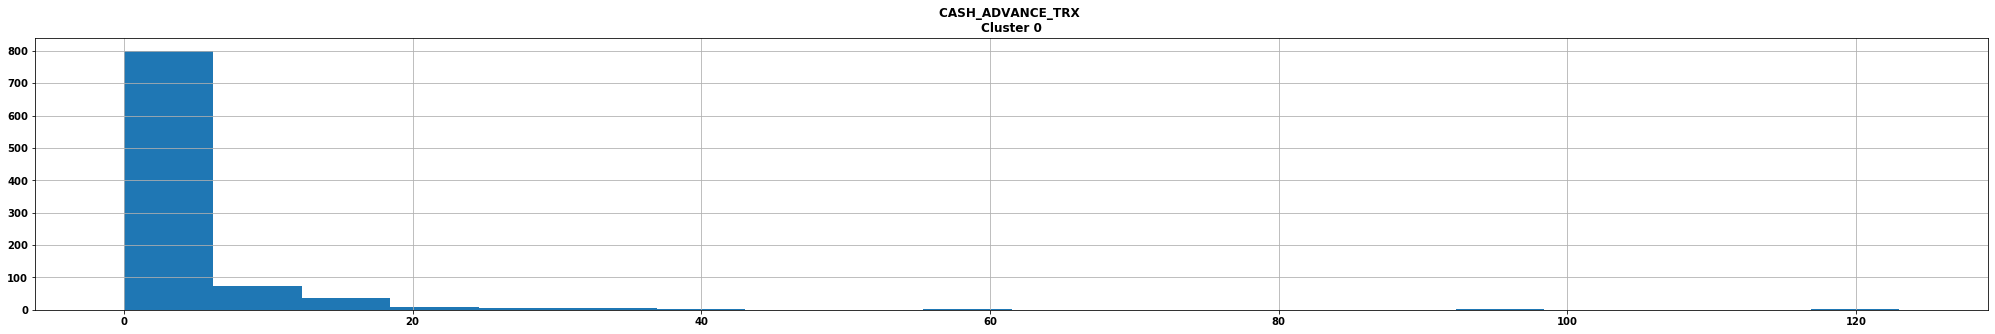

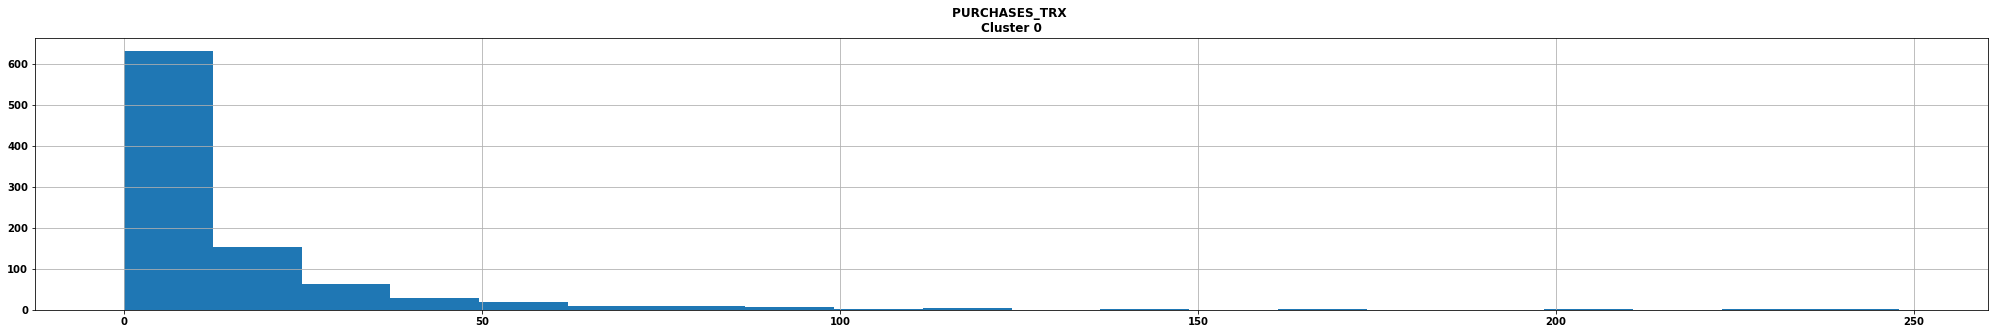

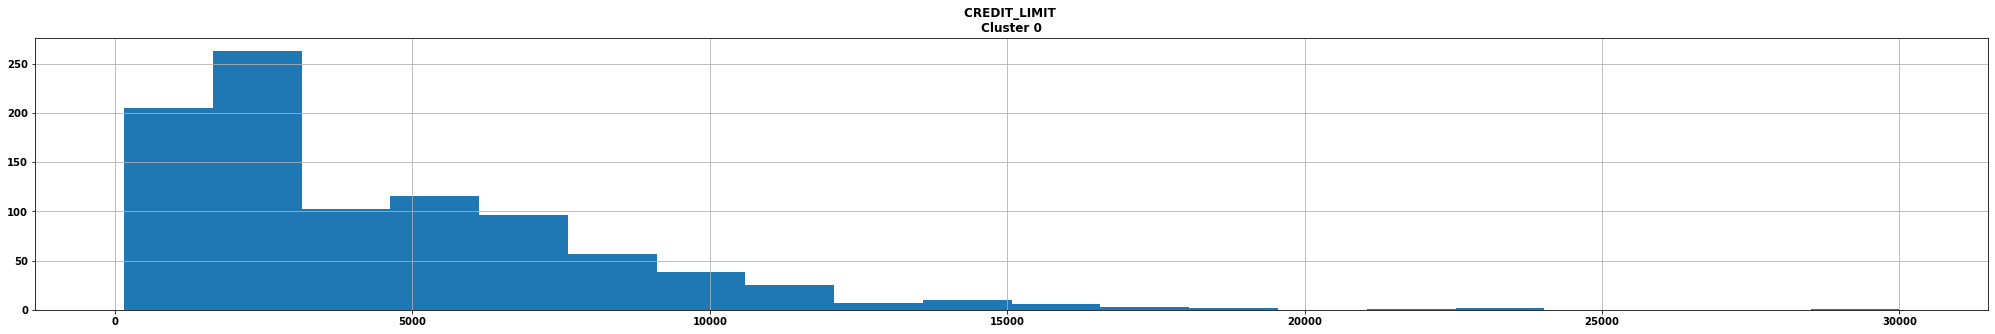

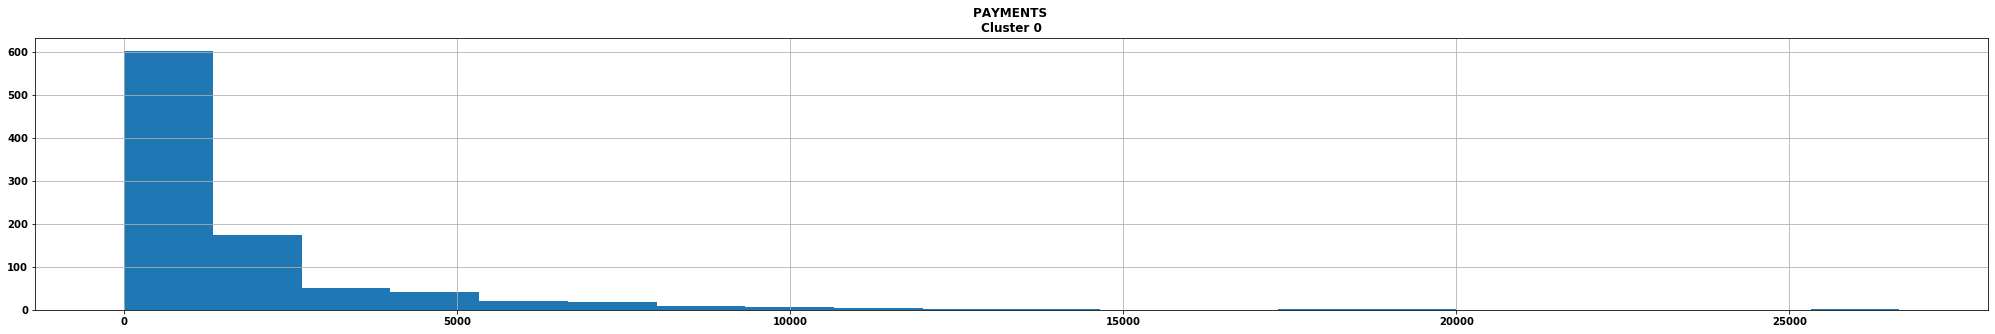

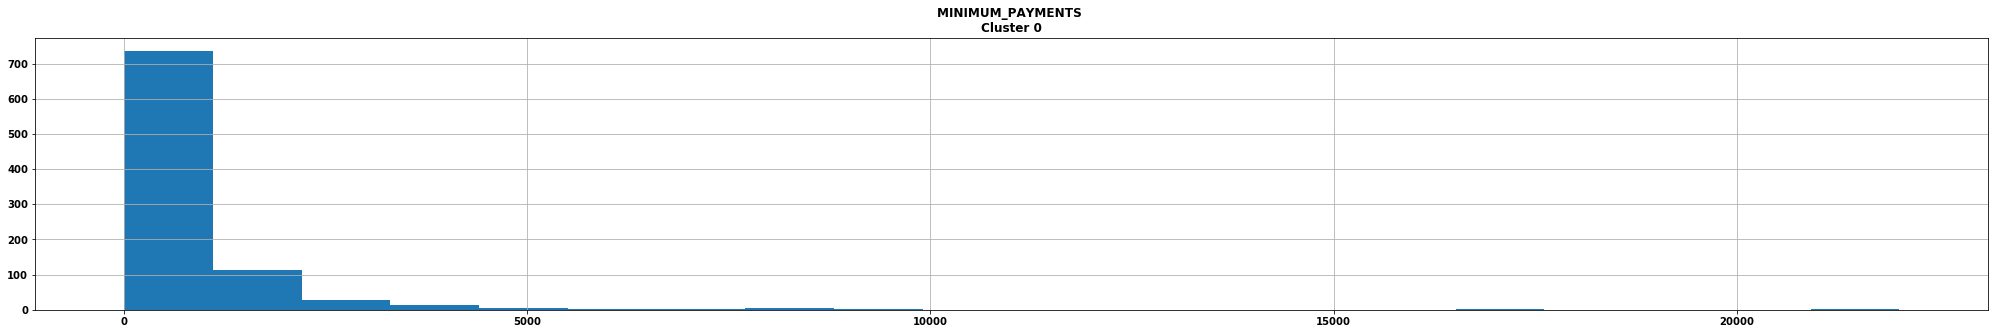

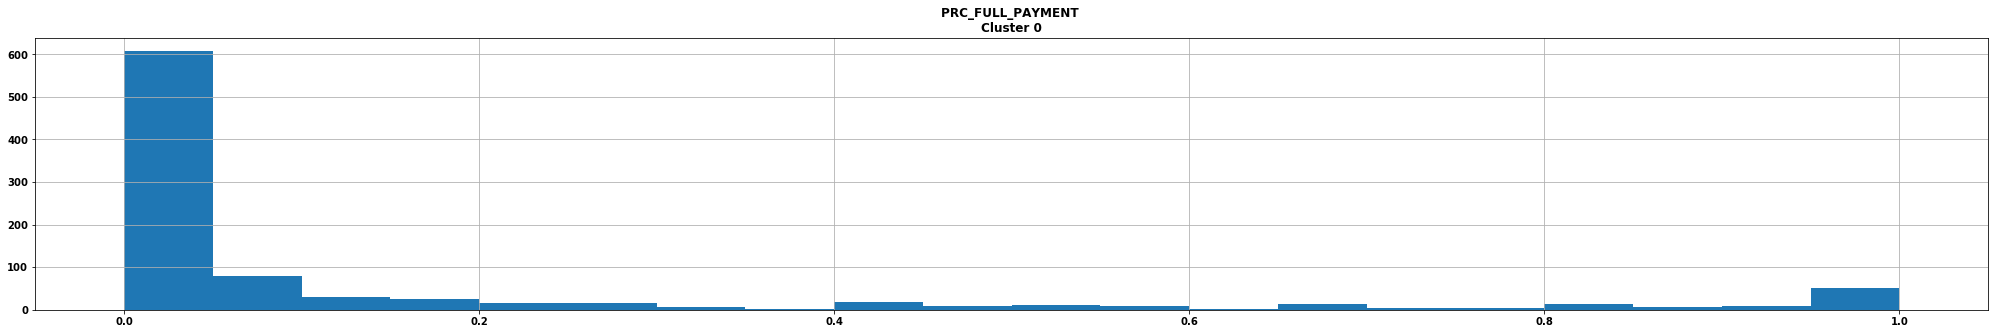

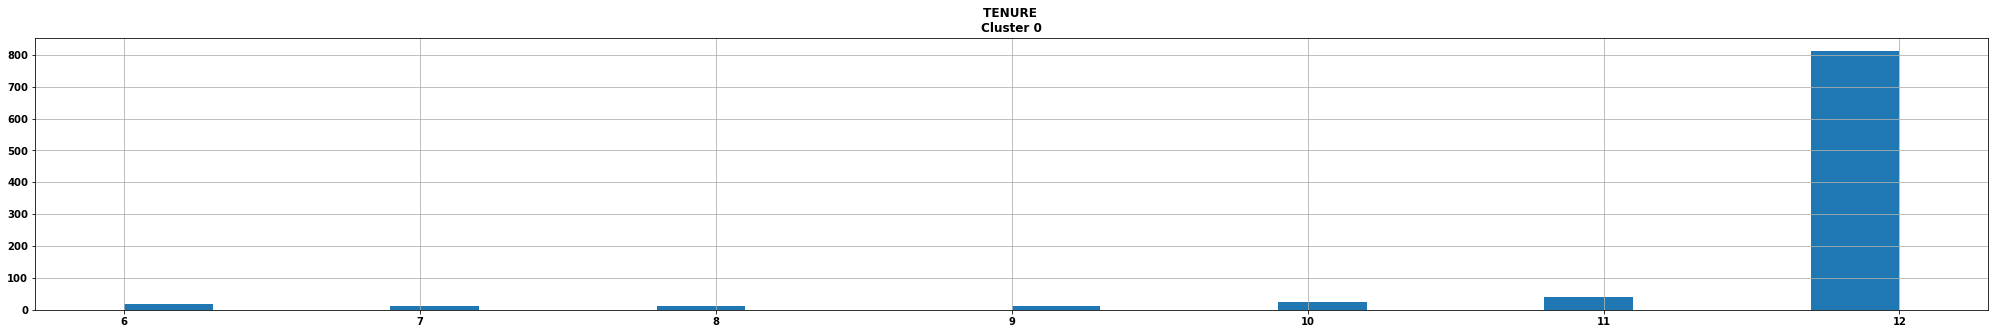

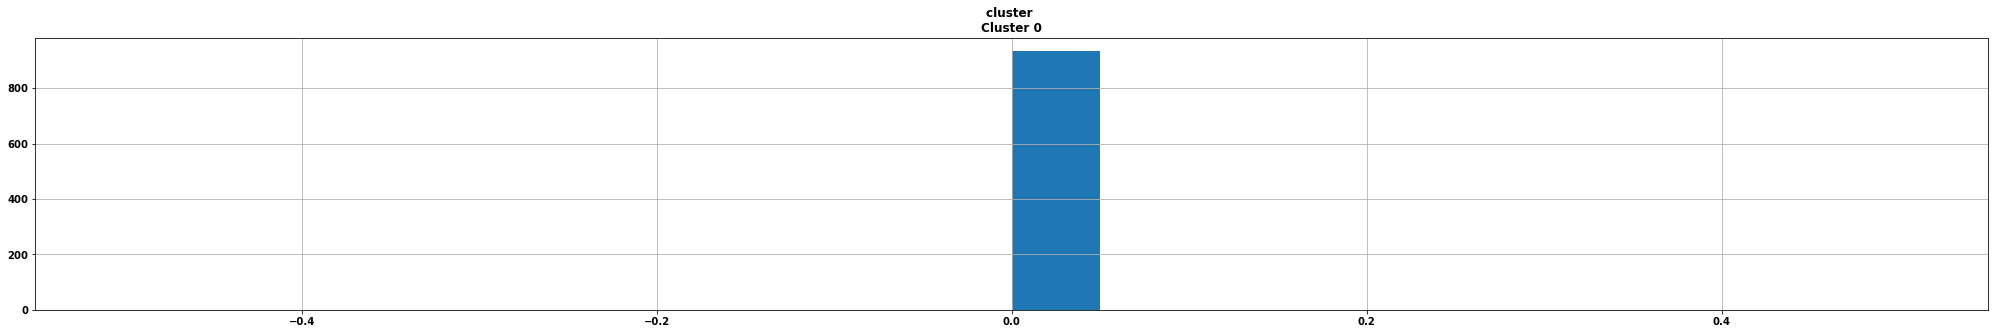

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count    934.000000         934.000000    934.000000        934.000000   
mean    1596.021396           0.889446    983.315567        568.889968   
std     2082.436937           0.221980   1994.392955       1463.234057   
min        0.000000           0.000000      0.000000          0.000000   
25%      150.762773           0.909091     48.637500          0.000000   
50%      938.665154           1.000000    361.365000         50.525000   
75%     2064.235261           1.000000   1105.315000        610.100000   
max    18495.558550           1.000000  32539.780000      26547.430000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count              934.000000    934.000000           934.000000   
mean               416.114882    949.449204             0.478926   
std               1060.262904   1869.328793             0.395396   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.400000      0.000000             0.454545   
75%                459.392500   1100.754779             0.916667   
max              22500.000000  12702.427700             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                  934.000000                        934.000000   
mean                     0.201162                          0.353766   
std                      0.292983                          0.391832   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.333333                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count              934.000000        934.000000     934.000000    934.000000   
mean                 0.133651          3.191649      14.170236   4630.749465   
std                  0.201210          7.568529      23.222673   3646.190112   
min                  0.000000          0.000000       0.000000    150.000000   
25%                  0.000000          0.000000       1.000000   1800.000000   
50%                  0.000000          0.000000       7.000000   3075.000000   
75%                  0.200000          4.000000      17.000000   6500.000000   
max                  1.166667        123.000000     248.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT      TENURE  cluster  
count    934.000000        906.000000        934.000000  934.000000    934.0  
mean    1671.040749        748.437226          0.151083   11.626338      0.0  
std     2342.148241       1389.690717          0.291120    1.167895      0.0  
min        0.000000          2.891346          0.000000    6.000000      0.0  
25%      392.582356        170.871407          0.000000   12.000000      0.0  
50%      862.823104        302.773656          0.000000   12.000000      0.0  
75%     1900.111376        814.039612          0.111111   12.000000      0.0  
max    26652.344320      22011.779800          1.000000   12.000000      0.0

In [102]:
# Define which cluster to plot:
cluster_nb_interest = 0

# # Plot histograms on the specified clusters of interest:
for i in marketing_data_labeled_df.columns:
    plt.figure(figsize=(35, 5))
    cluster = marketing_data_labeled_df[ marketing_data_labeled_df.cluster == cluster_nb_interest ]
    cluster[i].hist(bins=20)
    plt.title("{} \nCluster {}".format(i, cluster_nb_interest))
        
plt.show()

marketing_data_labeled_df[marketing_data_labeled_df.cluster == cluster_nb_interest].describe()

### Observations:

The Cluster information/charts are plot such that for each of the cluster, the corresponding attributes are in the columns below.

Taking __Cluster 0__ as an example, and see if there are some "Insights" that can be drawn from here. Note that these are the new clusters of customers and should have different attributes.

General Behaviour of this group:
- These customers have a mean balance of ~USD1,500. From the distribution of the histogram, it has a longer right tail representing that it is skewed to the right. 
- These customers also have frequent changes to their balances and make purchases on products that is around ~USD980.
- The one-off purchases are typically around ~USD570 and presents with a low frequency of 0.20.
- These customers also tend to pay off 15.1% of the full payment monthly with this credit card.
- These customers are also very loyal with a tenure of around ~12 years with this bank.
- Overall, these are customers can be said to be very loyal, pays lower interests and careful with their money. This can be seen similar to Cluster 0 from the previous clustering results.



## 11 - Refining the Number of Clusters with Deep Learning AutoEncoders: dataset without Outliers

### 11.1 - Train AutoEncoder Model:

Recall that this is an Unsupervised way of training the model, meaning that the input data is also the output data.

In [103]:
# Compile the model:
autoEncoder.compile(optimizer='adam', loss='mean_squared_error')


In [104]:
# running time calculation
start = timeit.default_timer()

# Train the model:
history = autoEncoder.fit(x=x_marketing_features_df,
                          y=x_marketing_features_df,
                          batch_size=batch_size,
                          epochs=nb_epochs,
                          verbose=0)

# Stop the timer:
stop = timeit.default_timer()
print('Time: {} Minutes'.format(round((stop - start)/60, 2)))
print('Time: {} hours'.format(round((stop - start)/3600, 2)))

Time: 0.13 Minutes
Time: 0.0 hours


### 11.2 - Using the Encoder part to perform the Dimensionality Reduction:

In [105]:
# Use the Encoder to predict on the input dataset to perform Dimensionality reduction.
x_dimension_reduced = encoder.predict(x=x_marketing_features_df)

# Inspect the shape of the data:
x_dimension_reduced.shape

(7434, 10)

In [119]:
x_dimension_reduced

array([[0.        , 0.        , 0.5286351 , ..., 0.6932201 , 0.        ,
        0.06319609],
       [0.        , 0.        , 3.2856987 , ..., 6.4013634 , 0.        ,
        5.8452735 ],
       [0.        , 0.        , 0.97178733, ..., 0.8224046 , 0.        ,
        1.670823  ],
       ...,
       [0.        , 0.        , 0.7718911 , ..., 1.304265  , 0.        ,
        1.2841343 ],
       [0.        , 0.        , 1.6637312 , ..., 0.5396863 , 0.        ,
        0.05618805],
       [0.        , 0.        , 0.9714054 , ..., 0.3034982 , 0.        ,
        1.6365987 ]], dtype=float32)

As it can be seen, the dimensions have been reduced from 17 columns to just 10, as specified. Of course there are some experimentation that can be performed to find an optimum number, or an alternative choice is to set the units in the codes layer = 2, and the model will perform a similar job to PCA (n_components=2).

## 11.3 - Perform the K-Means Clustering with the Dimension Reduced Dataset: 

The dataset -> x_dimension_reduced

Here the process is similar to what was applied in the earlier clustering section.

### 11.3.1 - Determine the optimum number of clusters: 

#### WCSS (Elbow Method):



In [106]:
# Import the required Libraries:
from sklearn.cluster import KMeans

In [107]:
# Define the empty WCSS list to be filled:
wcss_list_encoder = []

# Set the range of clusters to compute over:
list_clusters = range(1, 20)

# Compute the Clusters with K-means to find the optimum numberr of clusters:
for idx in list_clusters:
    kmeans_model = KMeans(n_clusters=idx, 
                          init='k-means++',
                          max_iter=300, 
                          n_init=10, 
                          random_state=101,
                          algorithm='auto')
    
    # fit the model to the dataset:
    kmeans_model.fit(x_dimension_reduced)
    
    # Update/Append the list (WCSS):
    wcss_list_encoder.append(kmeans_model.inertia_)

##### Plot the Elbow Method:

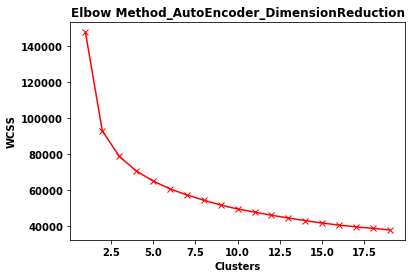

In [108]:
plt.plot(list_clusters, wcss_list_encoder, 'bx-', color = 'r')
plt.title('Elbow Method_AutoEncoder_DimensionReduction')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

### Observation:

From the chart, it can be discerned that the optimum __number of cluster is around 5 to 8__ for the Clustering model with AutoEncoder.

#### Silhouette Scores Method:

Let's utilise the Silhouette score to obtain the finalised optimum number of clusters.

In [110]:
# Import the required Library:
from sklearn.metrics import silhouette_score

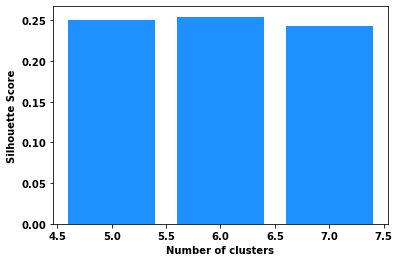

In [111]:
# Define an empty list of silhouette scores to be filled:
silhouette_scores_list_encoder = [] 

# Compute the scores for each of the number of clusters: number of cluster will be 5 to 15.
for nb_cluster in range(5, 8):
    silhouette_scores_list_encoder.append( 
        silhouette_score(x_dimension_reduced, KMeans(n_clusters=nb_cluster, 
                                                      init='k-means++',
                                                      max_iter=300, 
                                                      n_init=10, 
                                                      random_state=101,
                                                      algorithm='auto').fit_predict(x_dimension_reduced)
                        )) 
    
# Plot: Compare the results.
k = list( range(5, 8) )
plt.bar(k, silhouette_scores_list_encoder, color='dodgerblue') 
plt.xlabel('Number of clusters', fontsize=10) 
plt.ylabel('Silhouette Score', fontsize=10) 
plt.show()

In [112]:
# Save the scores as DataFrame:
silhouette_scores_df = pd.DataFrame({'k_clusters': k, 
                                     'silhouette_scores': silhouette_scores_list_encoder})

# Save the Optimum Cluster Number:
optimum_cluster_number = silhouette_scores_df.k_clusters[ silhouette_scores_df.silhouette_scores.idxmax() ]
print("The optimum number of clusters that should be used is: {}".format(optimum_cluster_number))

The optimum number of clusters that should be used is: 6


### 11.4 - Apply the K-Means Model: 


In [114]:
# Instantiate The K-means Clustering Model:
kmeans_model_6Clusters = KMeans(n_clusters=optimum_cluster_number,
                                 init='k-means++',
                                 max_iter=300, 
                                 n_init=10, 
                                 random_state=101,
                                 algorithm='auto')

# fit the model to the dataset:
kmeans_model_6Clusters.fit(X=x_dimension_reduced)


KMeans(n_clusters=6, random_state=101)

In [115]:
# Extract the label data from the model:
labels_6Clusters = kmeans_model_6Clusters.labels_

# Inspect: 
labels_6Clusters.shape, labels_6Clusters.max(), labels_6Clusters.min()

((7434,), 5, 0)

#### Attach the Labels from K-Means to "x_marketing_features_df" dataframe:

In [121]:
# Update the Dataset with a new Column (labels): concatenate.
# Note: the "CUST_ID" column must be dropped here.
marketing_data_autoEncode_labeled_df = pd.concat([x_marketing_features_df.reset_index(drop=True), 
                                                  pd.DataFrame({'cluster': labels_6Clusters})], 
                                                 axis=1)

# Inspect:
marketing_data_autoEncode_labeled_df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.809652          -0.334911  -0.641448         -0.543505   
1  1.273272           0.091127  -0.734487         -0.543505   
2  0.807271           0.517164   0.019551          0.430864   
3  0.261448          -1.186986   0.727420          1.345575   
4 -0.297867           0.517164  -0.718883         -0.523341   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.448067     -0.543984            -0.805098   
1               -0.636612      4.671914            -1.225631   
2               -0.636612     -0.543984             1.297564   
3               -0.636612     -0.377388            -1.015366   
4               -0.636612     -0.543984            -1.015366   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.668791                         -0.698321   
1                   -0.668791                         -0.910579   
2                    2.808268                         -0.910579   
3                   -0.379037                         -0.910579   
4                   -0.379037                         -0.910579   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.690806         -0.587319      -0.665235     -1.021765   
1                0.883825          0.427706      -0.797517      1.022039   
2               -0.690806         -0.587319      -0.003826      1.192356   
3               -0.165931         -0.333563      -0.731376      1.192356   
4               -0.690806         -0.587319      -0.731376     -0.953638   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  cluster  
0 -0.762853         -0.577804         -0.531523  0.312187        0  
1  1.953121          0.623747          0.232637  0.312187        4  
2 -0.470272          0.050485         -0.531523  0.312187        0  
3 -0.903344          0.355657         -0.531523  0.312187        2  
4 -0.431099         -0.442194         -0.531523  0.312187        0

### 11.5 - Reduce the dimensions and Visualise with Principal Component Analysis:

In this case, PCA will be used to visualise the segmentation of the customer into its repective clusters from K-means model. 

In [122]:
# Import the required libraries:
from sklearn.decomposition import PCA

In [123]:
# Instantiate the Principal Component Analysis:
pca = PCA(n_components=2)

# Fit the PCA to the Dataset, to get the Principal Components:
principal_components = pca.fit_transform(marketing_data_autoEncode_labeled_df)

# Examine the change in shape:
print("Original Dataset shape:   ", marketing_data_autoEncode_labeled_df.shape)
print("PCA Transformed shape:", principal_components.shape)

Original Dataset shape:    (7434, 18)
PCA Transformed shape: (7434, 2)


As it can be seen the dimensions of the dataset was reduced from 18 columns to just 2 columns.

#### Visualise the Principal Components:

In [124]:
# Create a DataFrame for the 2 Principal Components:
pca_df = pd.DataFrame(data=principal_components, columns=['pca1', 'pca2'])

# Add the Labels:
pca_df = pd.concat([pca_df, 
                    pd.DataFrame({'cluster': labels_6Clusters})], 
                   axis=1)

# Inspect:
pca_df.head()

pca1      pca2  cluster
0 -1.571589 -2.503294        0
1  5.123187 -0.132573        4
2 -1.507907  0.657829        0
3  0.535133 -0.410812        2
4 -1.253035 -2.421845        0

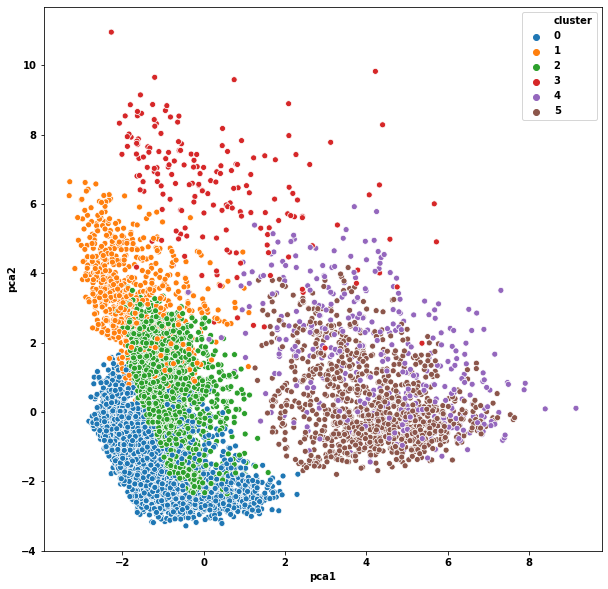

In [125]:
# Plot:
plt.figure(figsize=(10, 10))

ax = sns.scatterplot(x='pca1',
                     y='pca2',
                     hue="cluster",
                     data=pca_df,
                     palette="tab10")
plt.show()

### 11.6 - Visualise the Clusters of the dataset and its Attributes:


In [128]:
# ==============================================================================
# 1. Impute the missing values.
# ==============================================================================
# list the columns to impute:
columns_to_impute = ['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']

# Apply the custom encoder for Ordinal columns, instantiate:
cc_impute_columns = CustomImputer(col=columns_to_impute, impute_strategy='mean', print_log=False)

# ==============================================================================
# 2. Drop the unwanted columns.
# ==============================================================================
# list the columns to drop:
columns_to_drop = ['CUST_ID']

# Apply the custom encoder for Ordinal columns, instantiate:
cc_drop_columns = CustomDropUnwantedColumns(col=columns_to_drop)

# ==============================================================================
# 3. Remove the Outliers:
# ==============================================================================
# scaler = scale_features_dataFrame()
c_Outlier = CustomOutlierRemoval()

# ==============================================================================
# 4. Scale the features in the dataset:
# ==============================================================================
# scaler = scale_features_dataFrame()
scaler = scale_features_dataFrame(scaler_type='Standard', set_numpy_array=False)


In [130]:
# Define the Pipeline Sequence:
pipe_preprocessing = Pipeline(steps=[("impute", cc_impute_columns),
                                     ("drop_columns", cc_drop_columns),
                                     ('outlier_removal', c_Outlier)]
                             )

# Fit the Pipeline to the Dataset:
pipe_preprocessing.fit(marketing_data_df)

# Transform the Dataset:
marketing_processed_df = pipe_preprocessing.transform(marketing_data_df)
x_marketing_features_df = marketing_processed_df

# Inspect:
x_marketing_features_df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        864.206542          0.000000      12  
4   678.334763        244.791237          0.000000      12

#### Attach the Labels from K-Means to "x_marketing_features_df" dataframe:

In [133]:
# Update the "x_marketing_features_df" with a new Column (labels): concatenate.
marketing_data_autoEncode_labeled_df = pd.concat([x_marketing_features_df.reset_index(drop=True), 
                                       pd.DataFrame({'cluster': labels_6Clusters})], 
                                      axis=1)

# Inspect:
marketing_data_autoEncode_labeled_df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0   201.802084        139.509787          0.000000      12        0  
1  4103.032597       1072.340217          0.222222      12        4  
2   622.066742        627.284787          0.000000      12        0  
3     0.000000        864.206542          0.000000      12        2  
4   678.334763        244.791237          0.000000      12        0

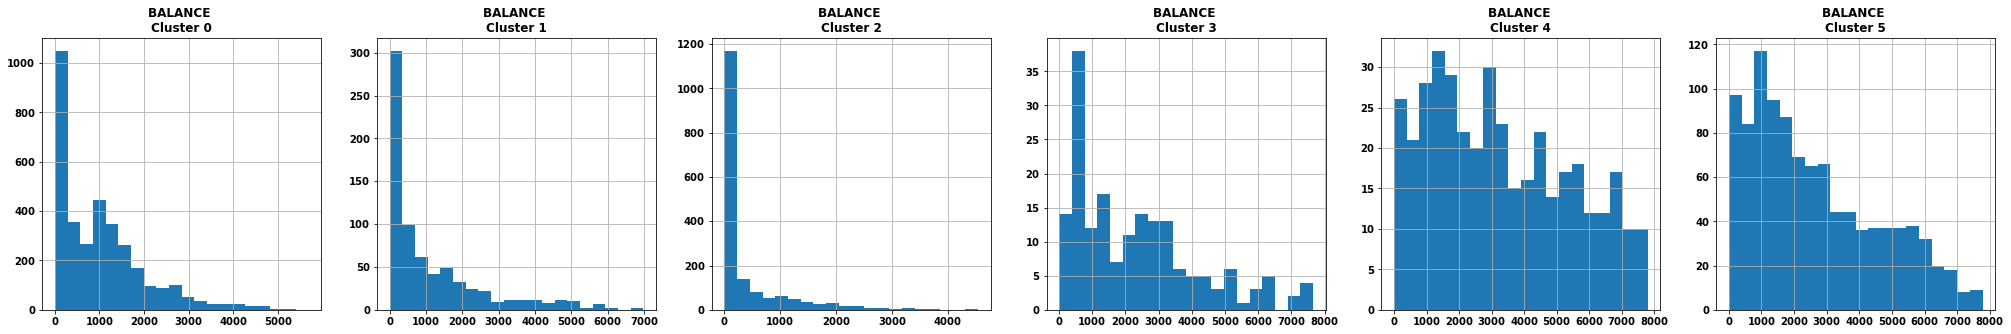

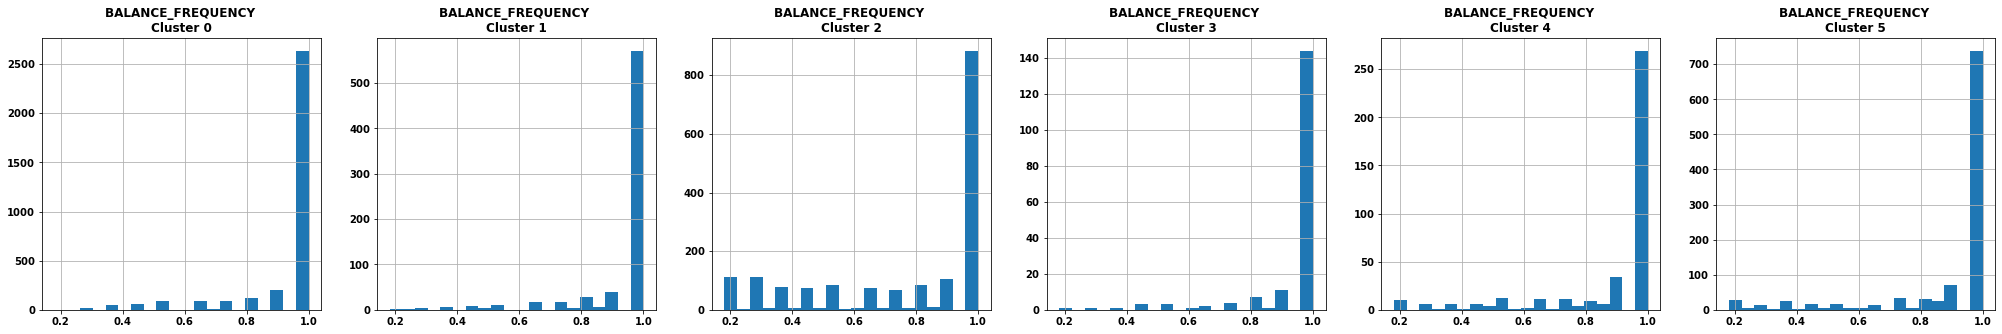

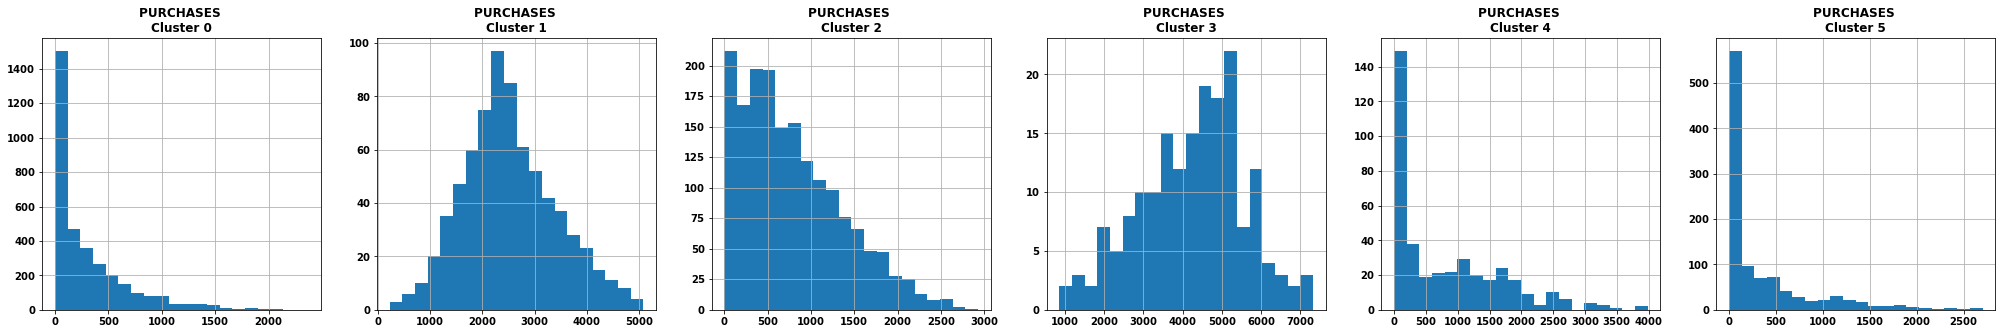

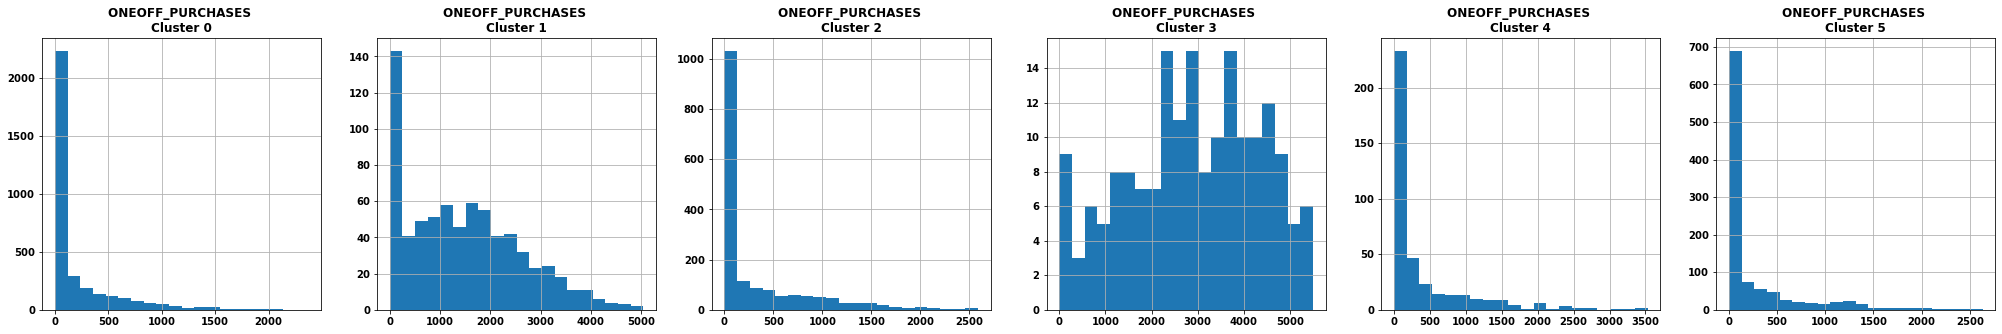

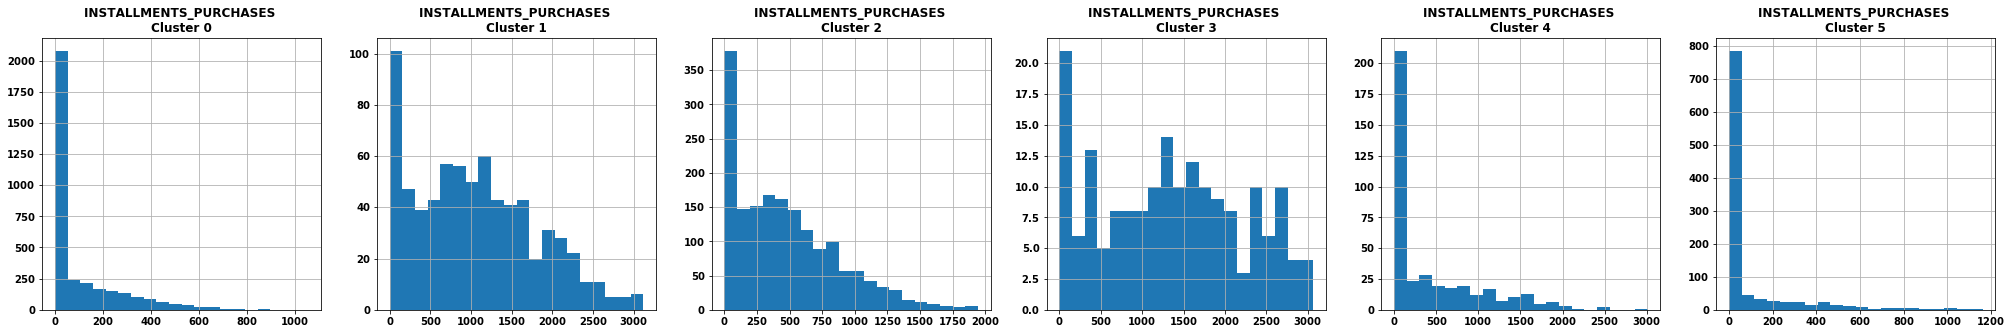

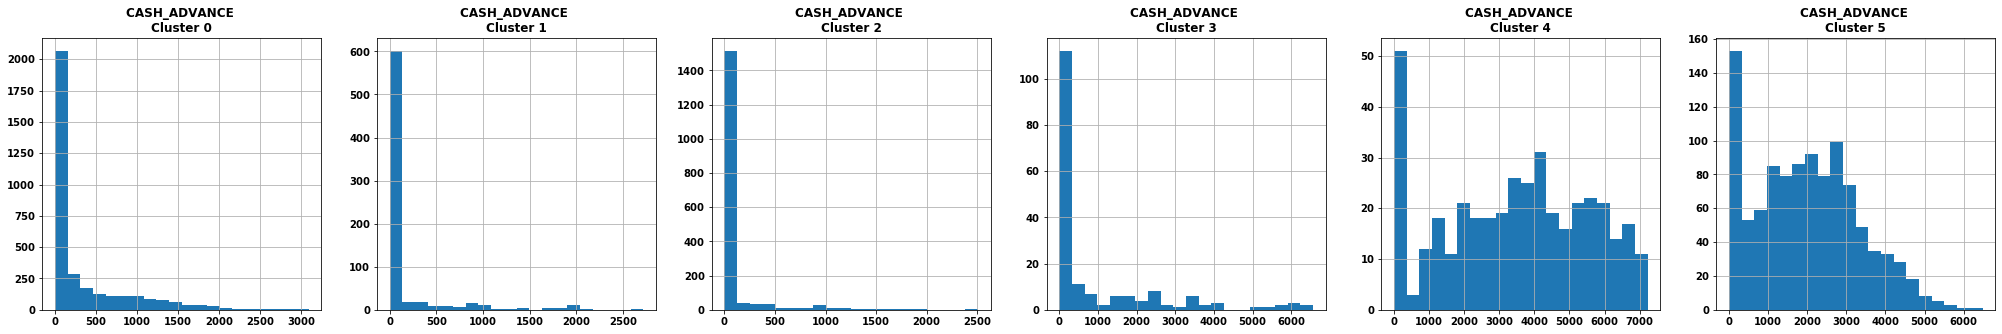

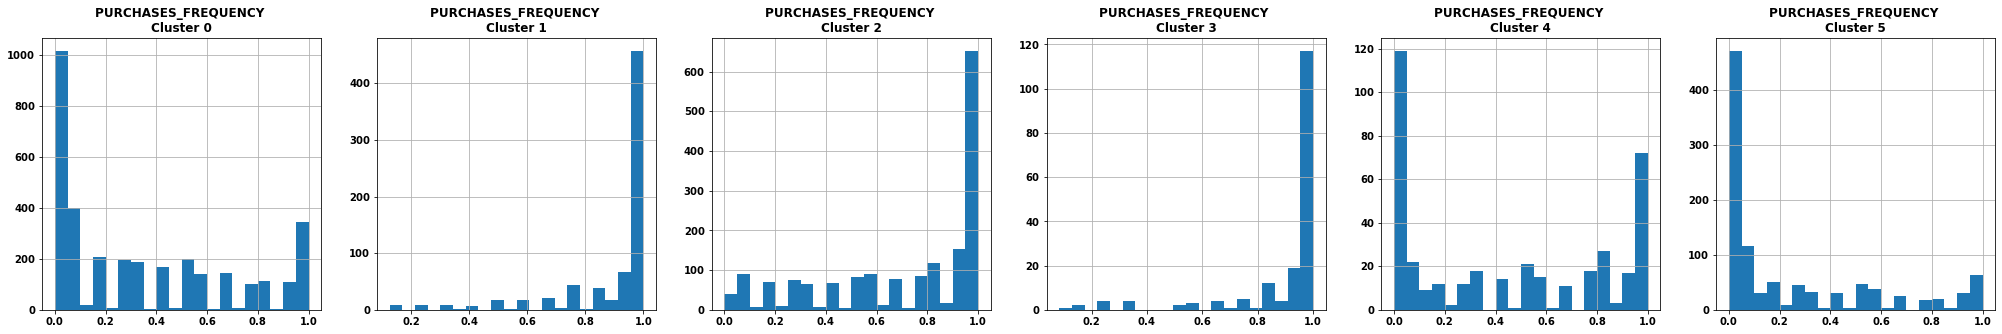

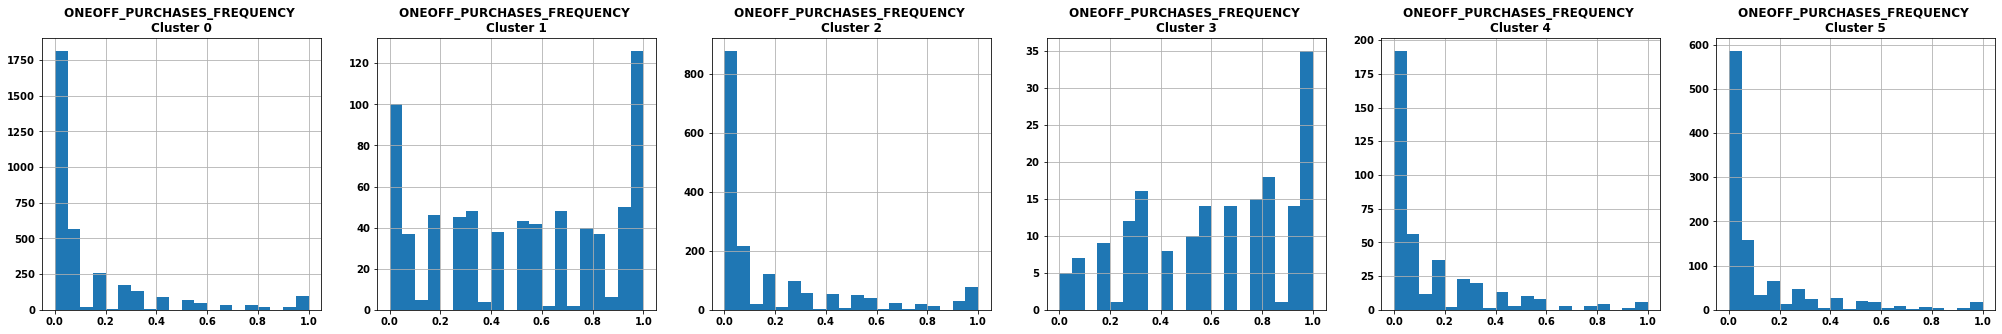

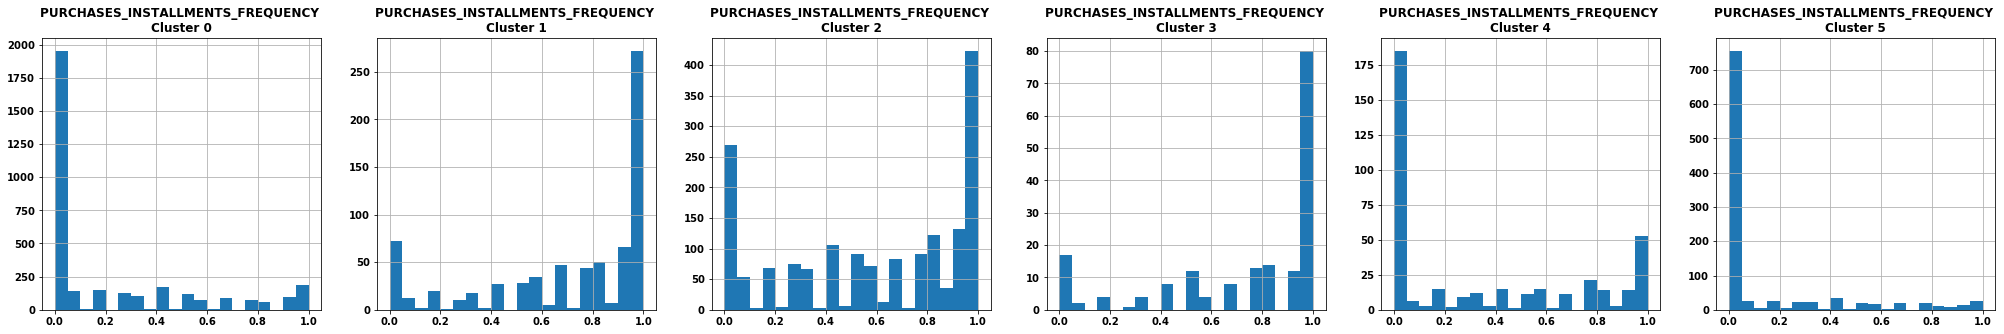

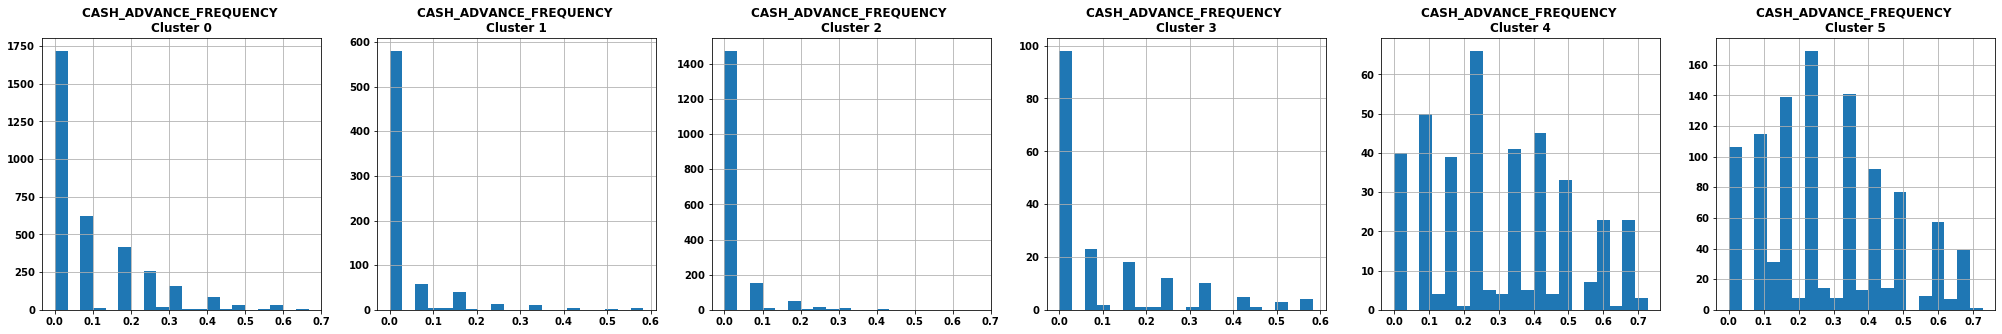

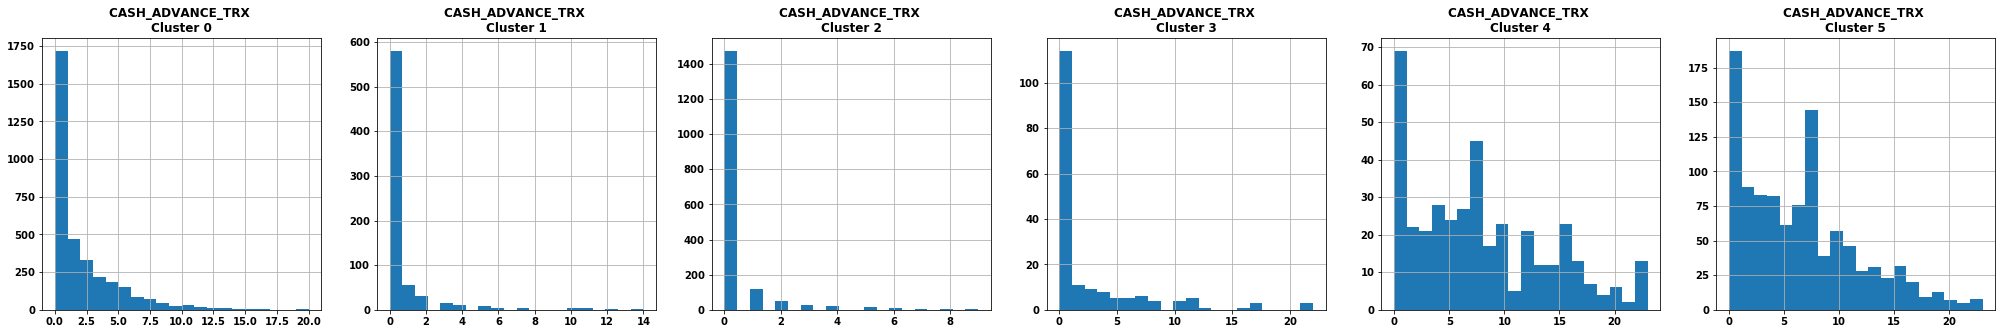

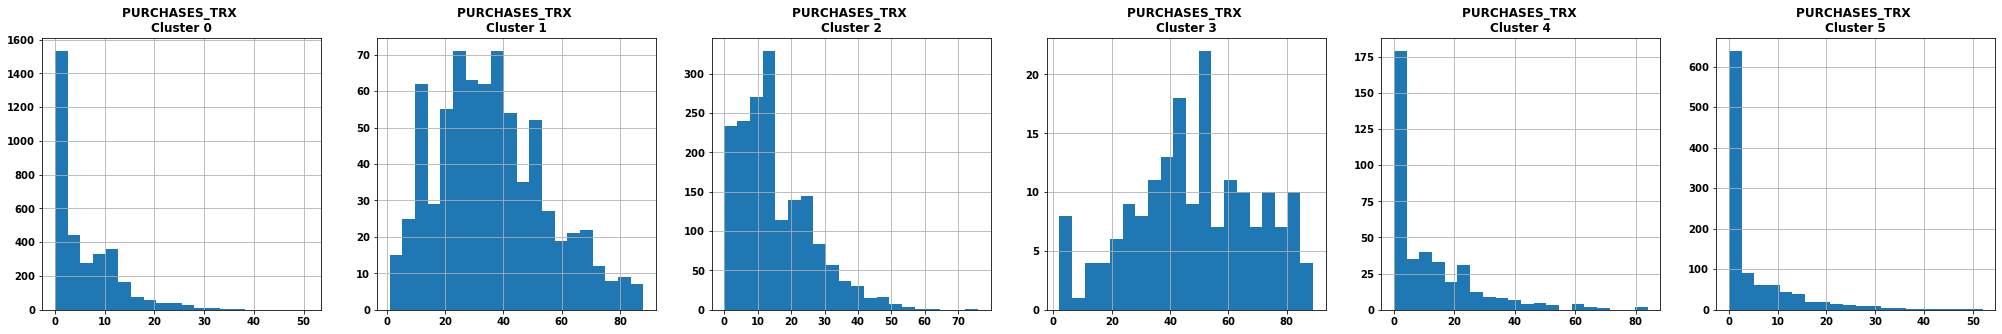

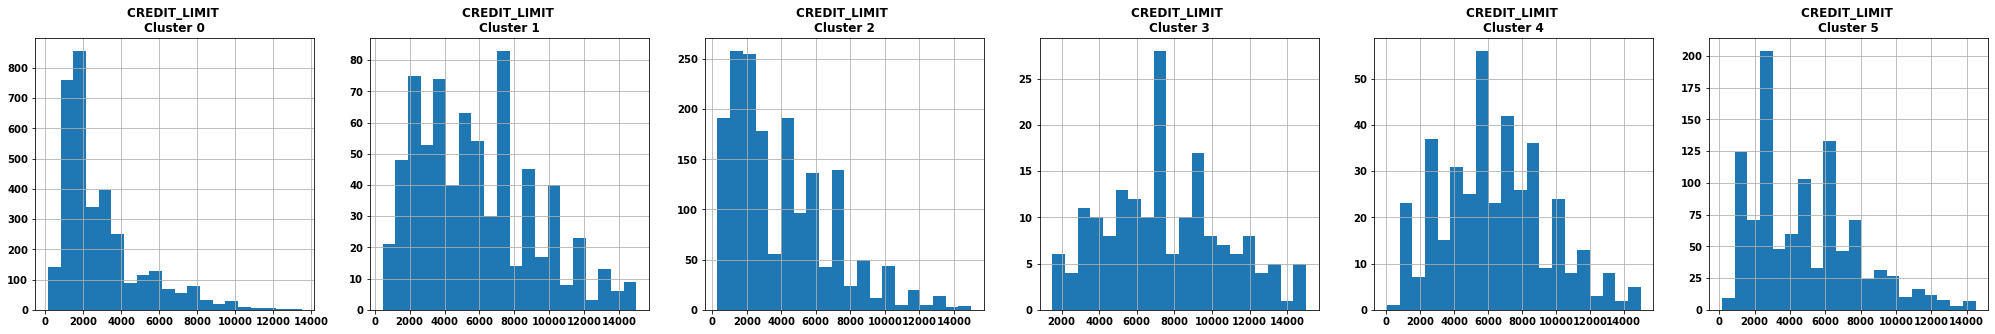

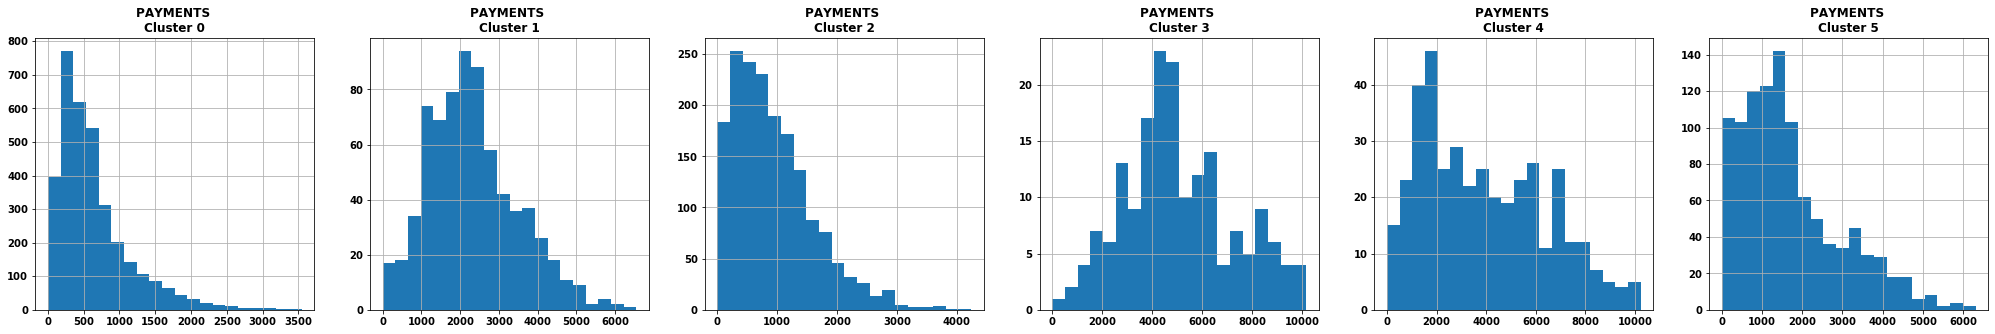

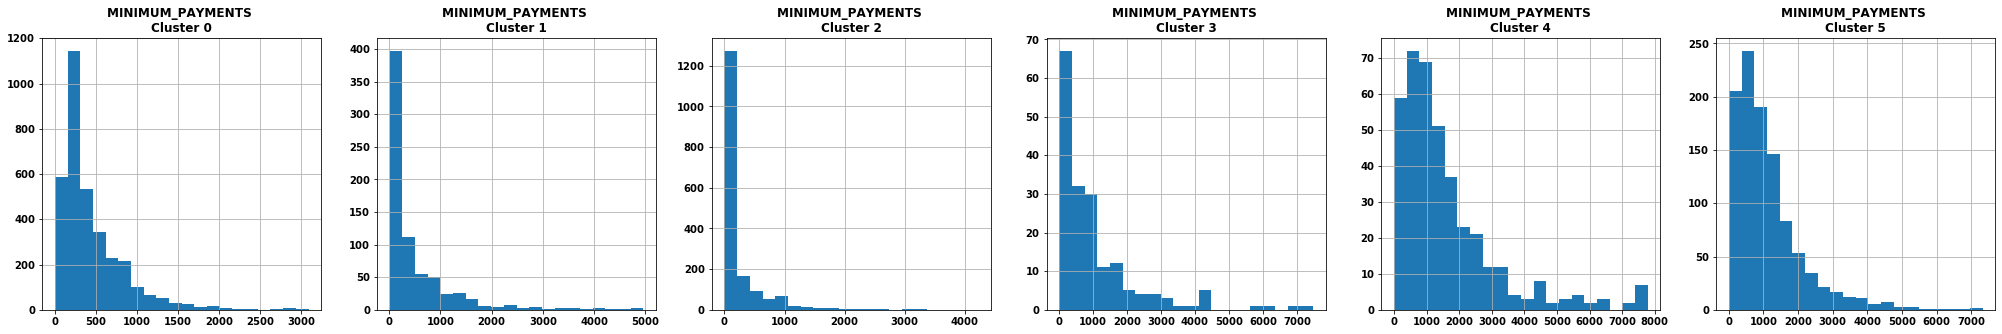

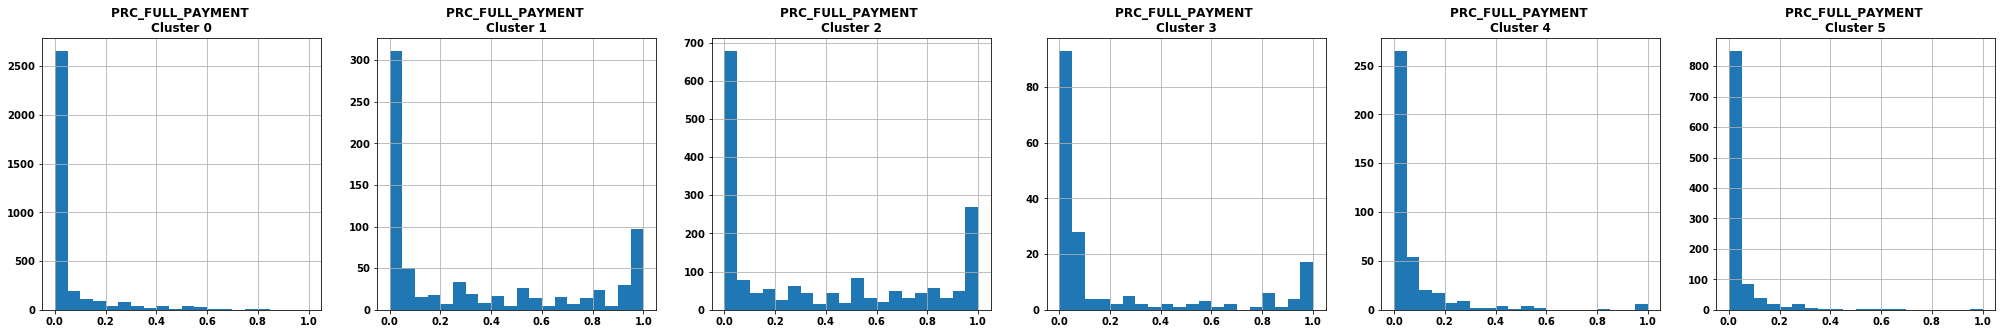

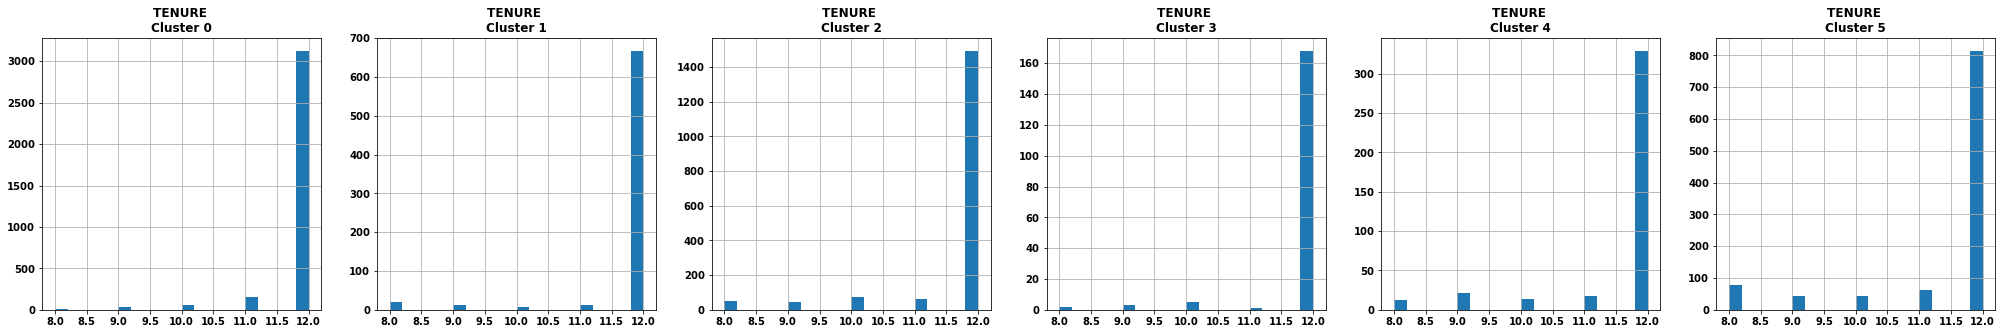

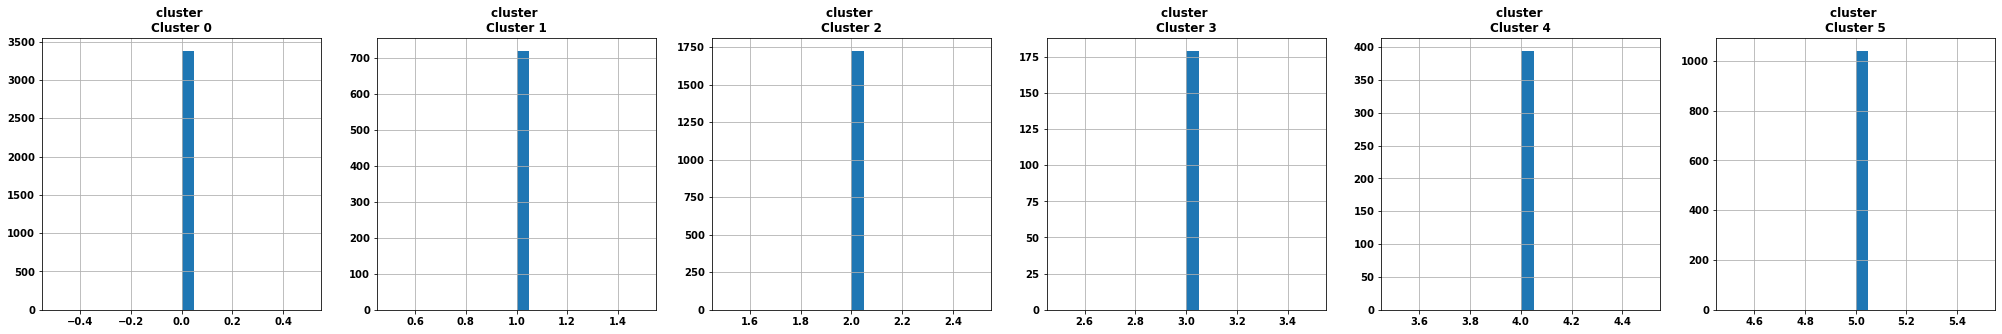

In [134]:
# Plot histograms on the various clusters within the dataset:
for i in marketing_data_autoEncode_labeled_df.columns:
    plt.figure(figsize=(35, 5))
    for j in range(optimum_cluster_number):
        plt.subplot(1, optimum_cluster_number, j+1)
        cluster = marketing_data_autoEncode_labeled_df[ marketing_data_autoEncode_labeled_df.cluster == j ]
        cluster[i].hist(bins=20)
        plt.title("{} \nCluster {}".format(i, j))
        
plt.show()

#### Plot out some example clusters to examine: Cluster 0 again

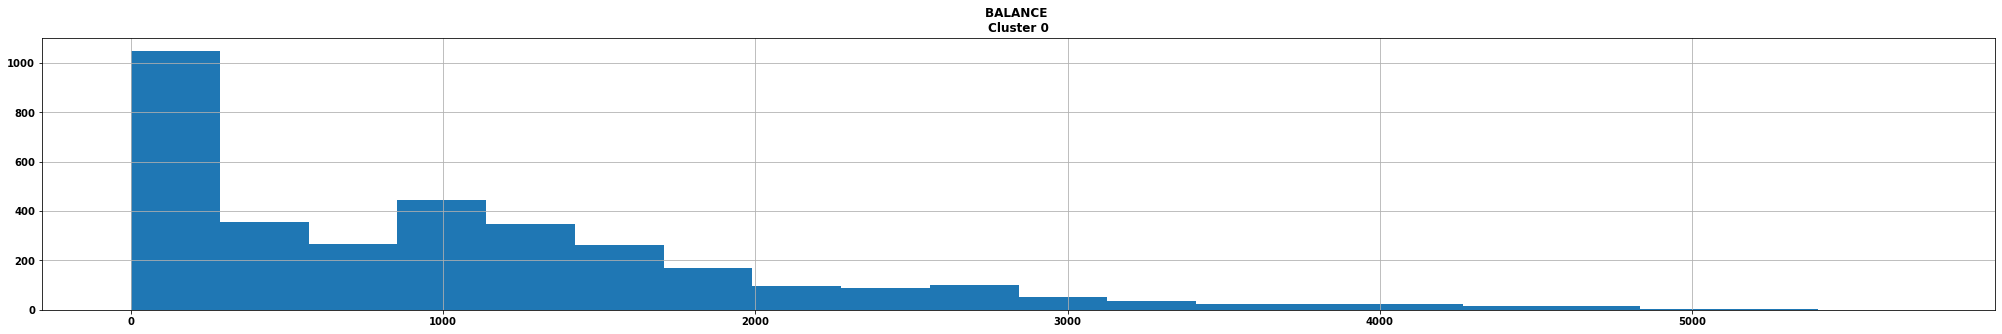

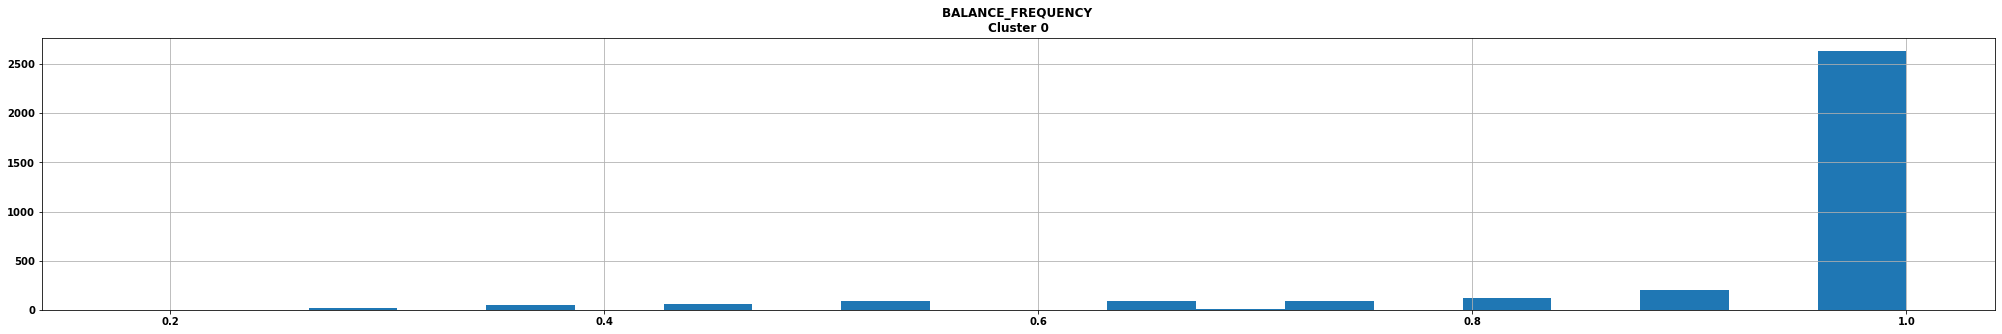

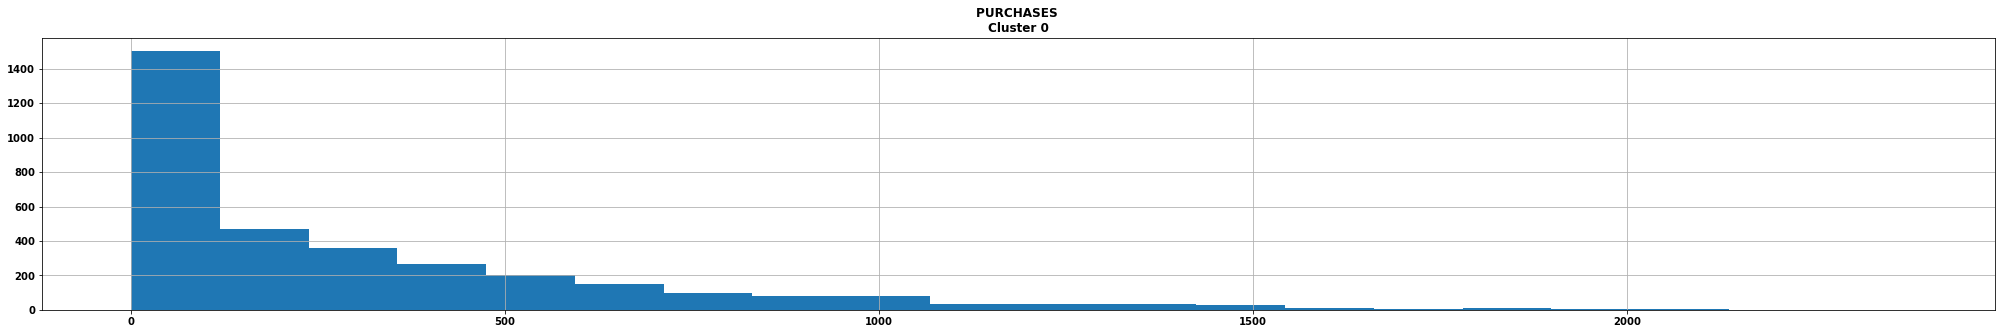

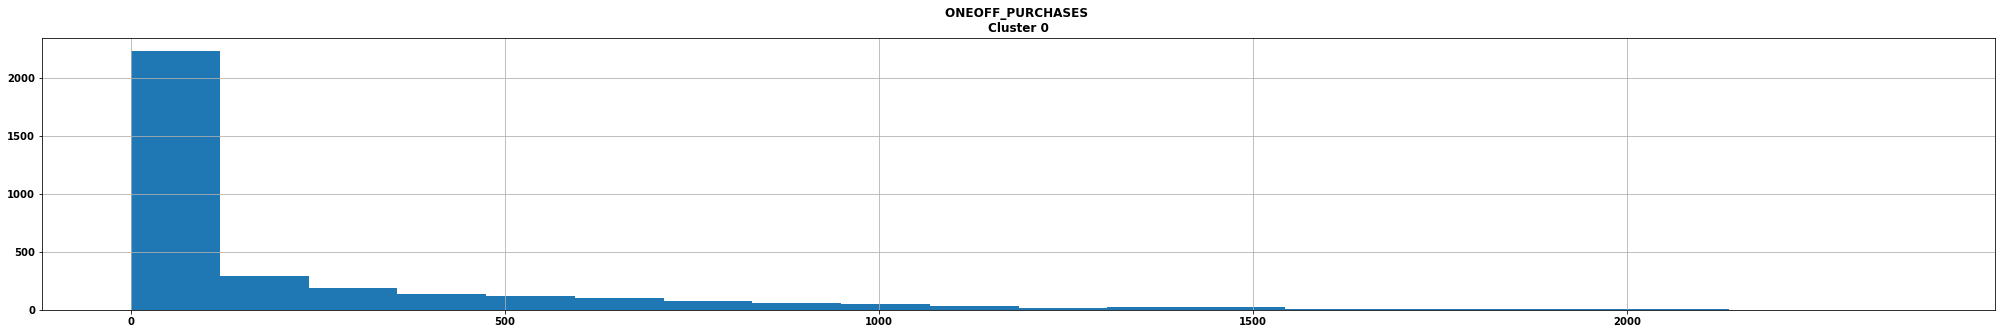

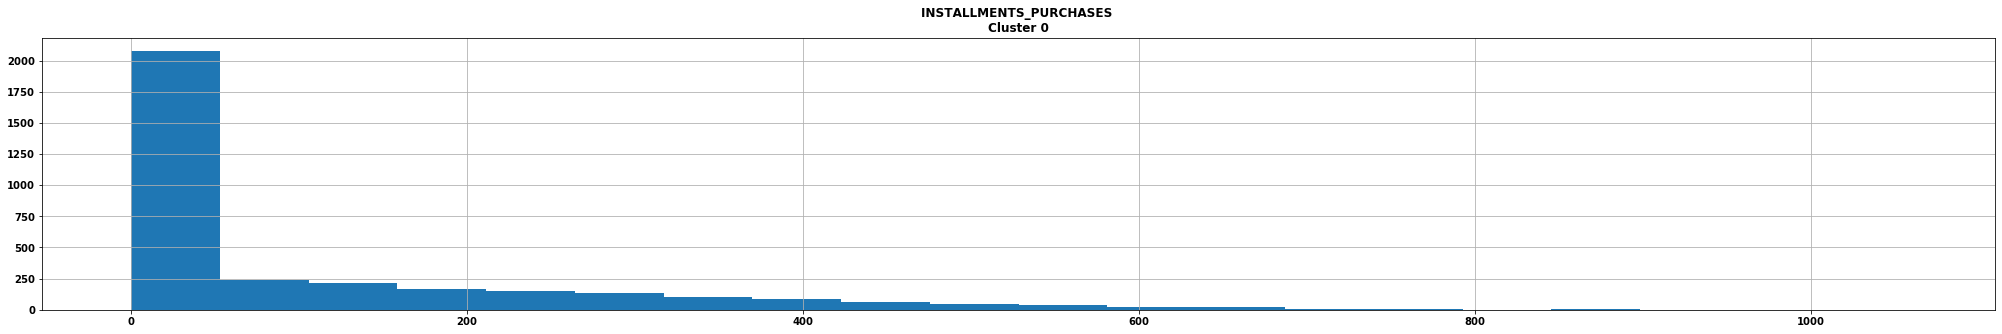

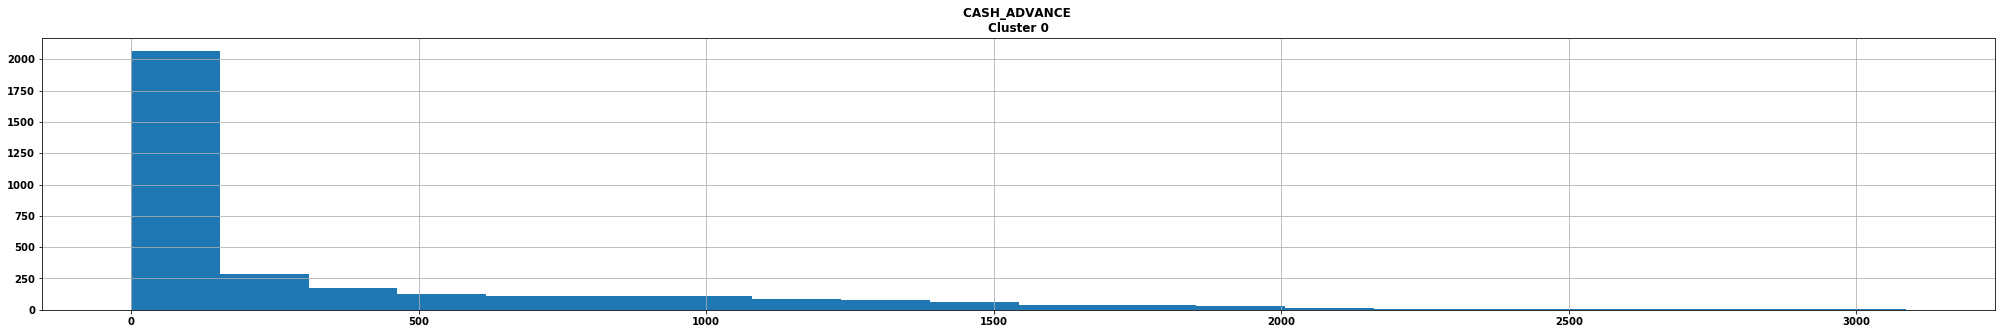

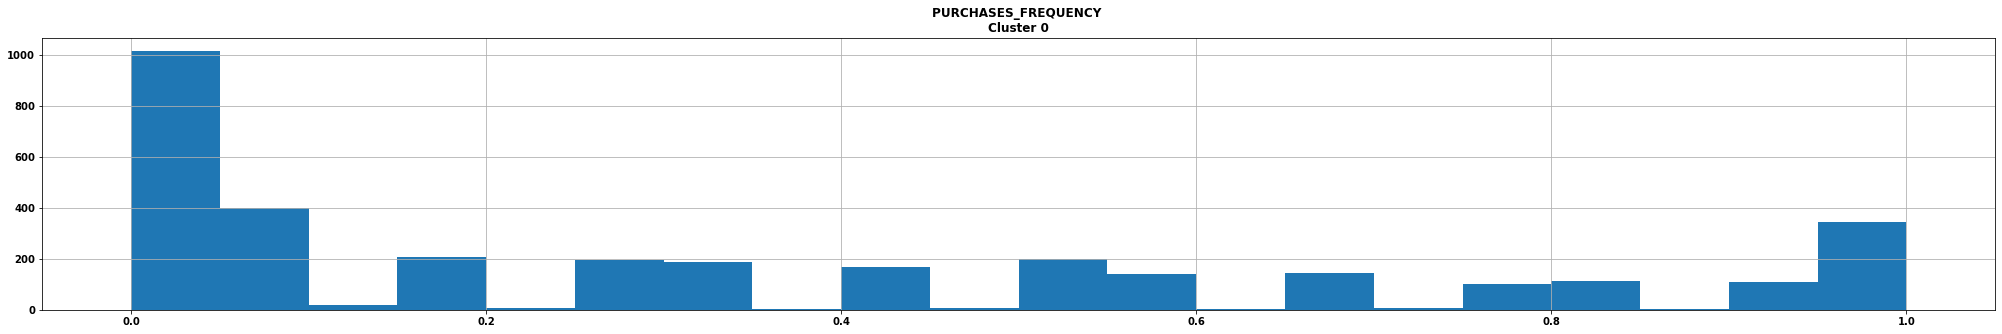

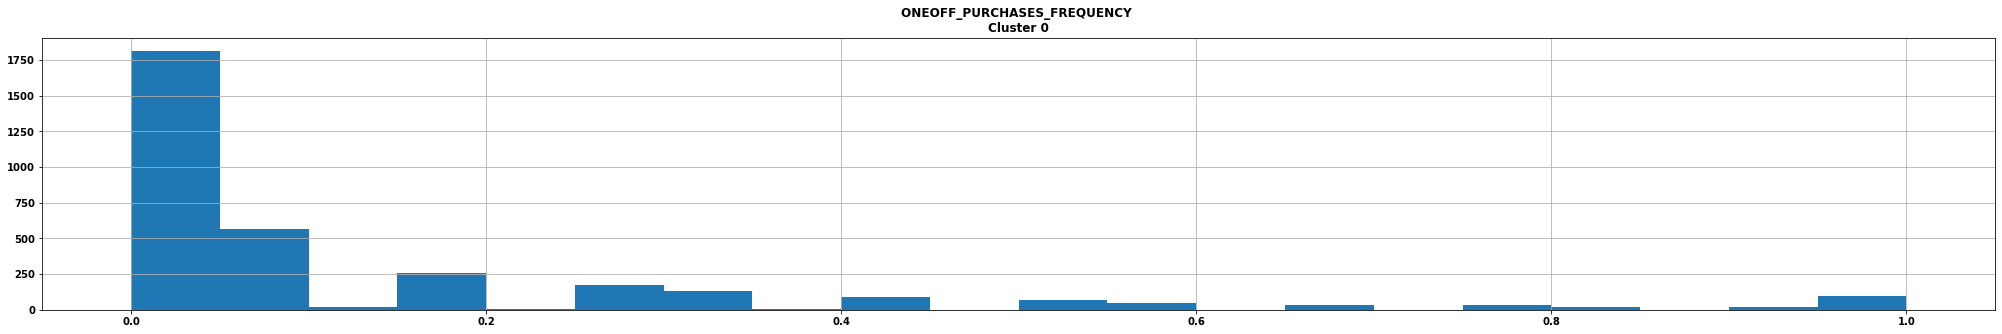

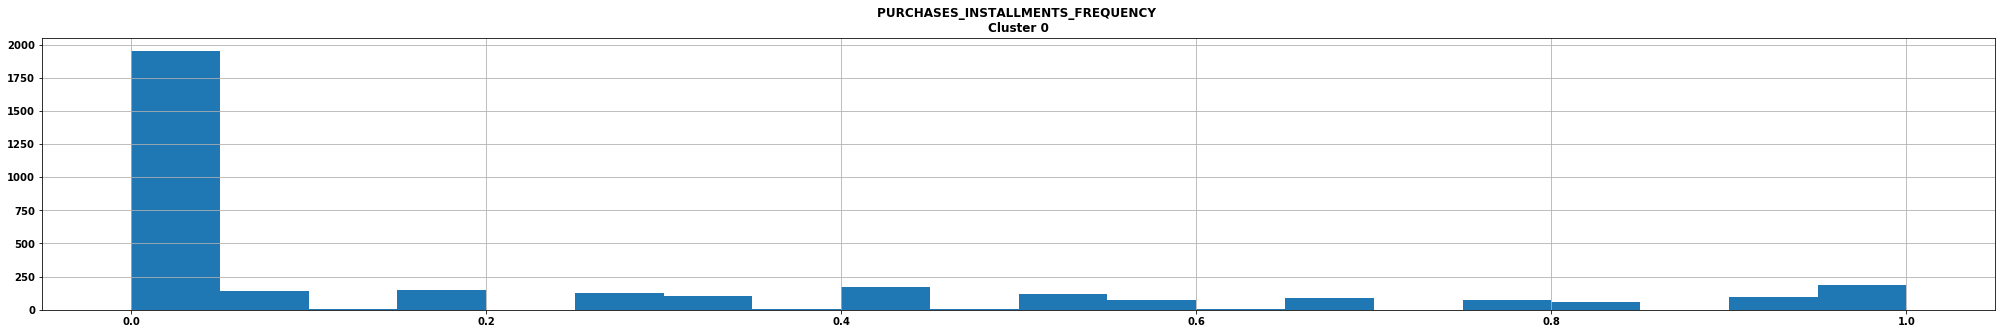

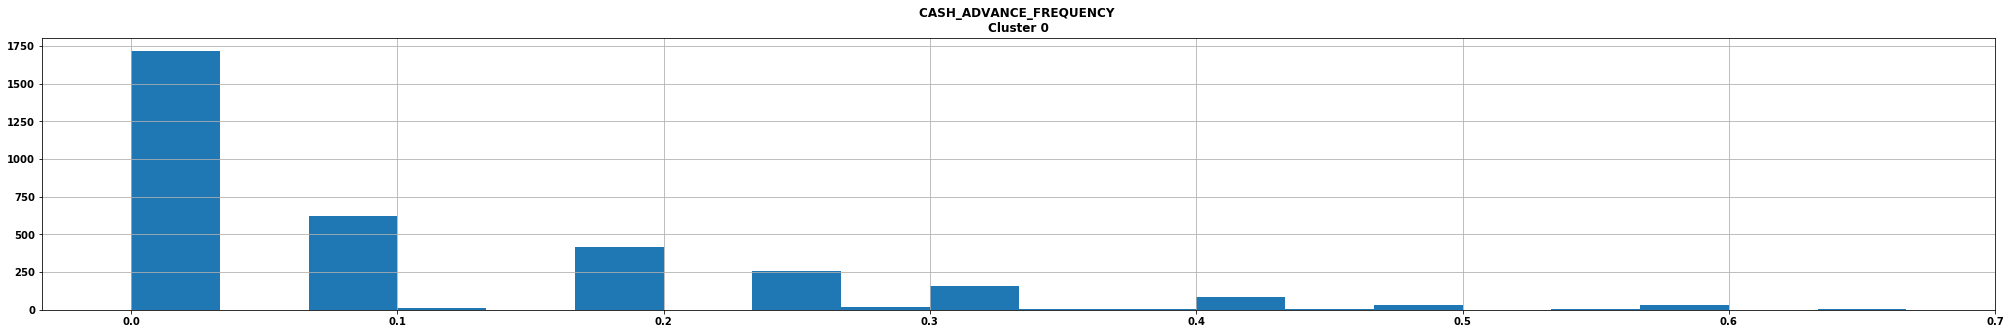

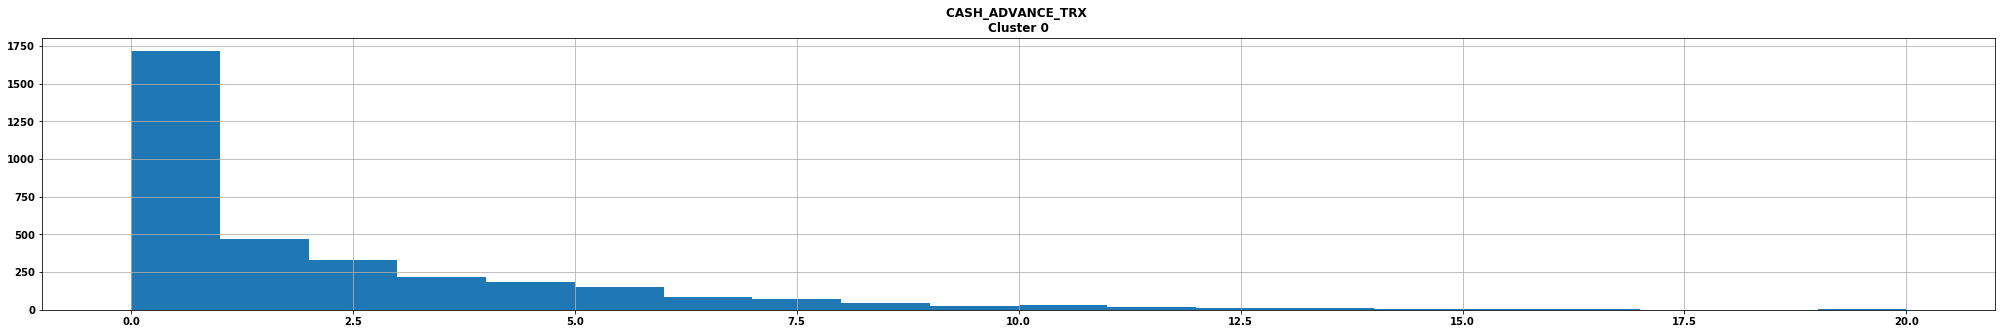

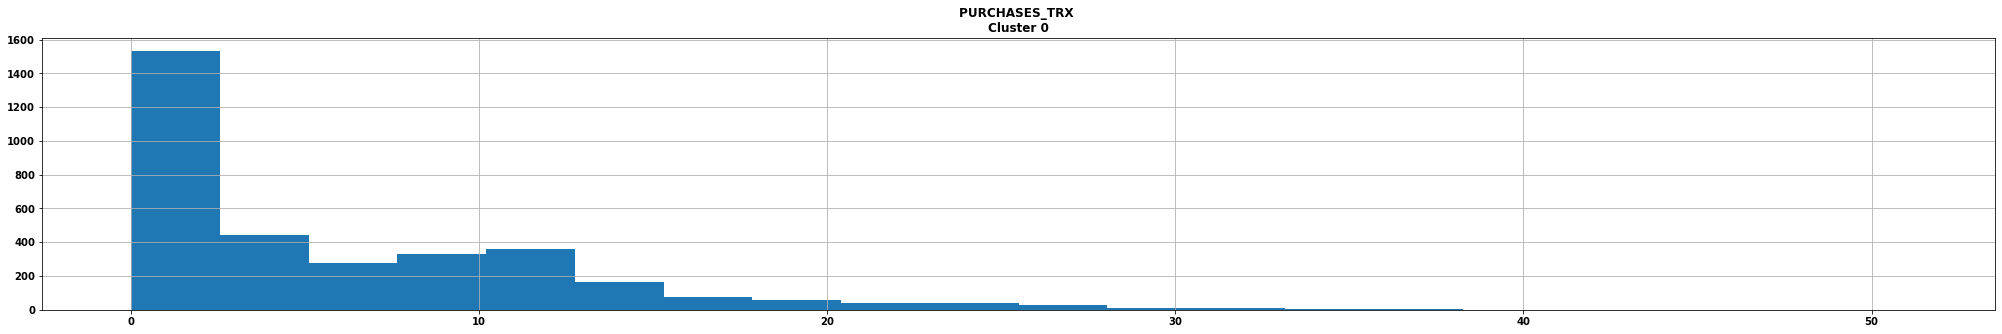

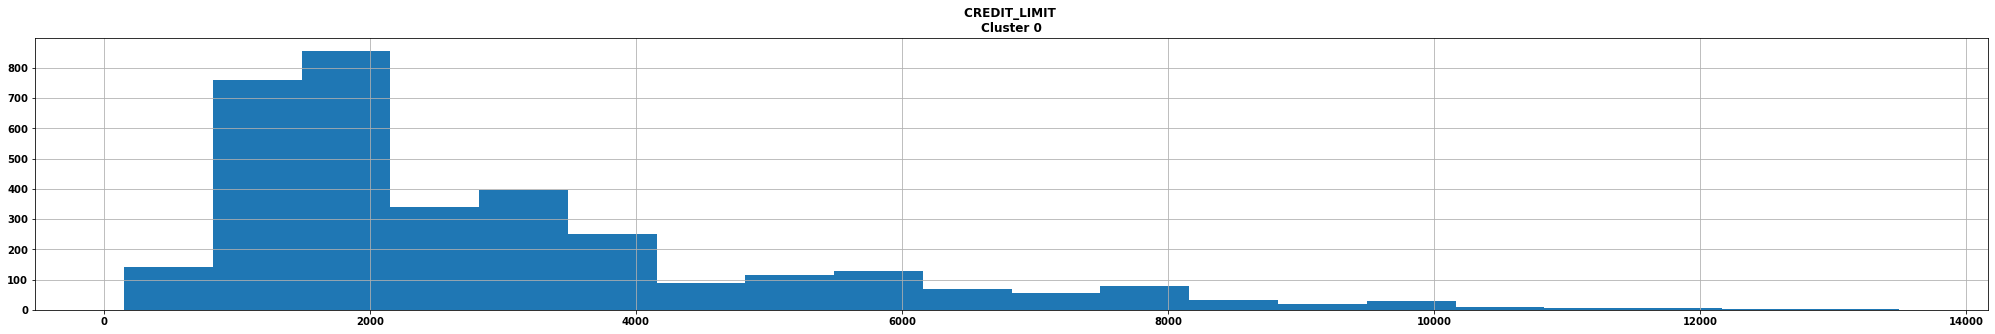

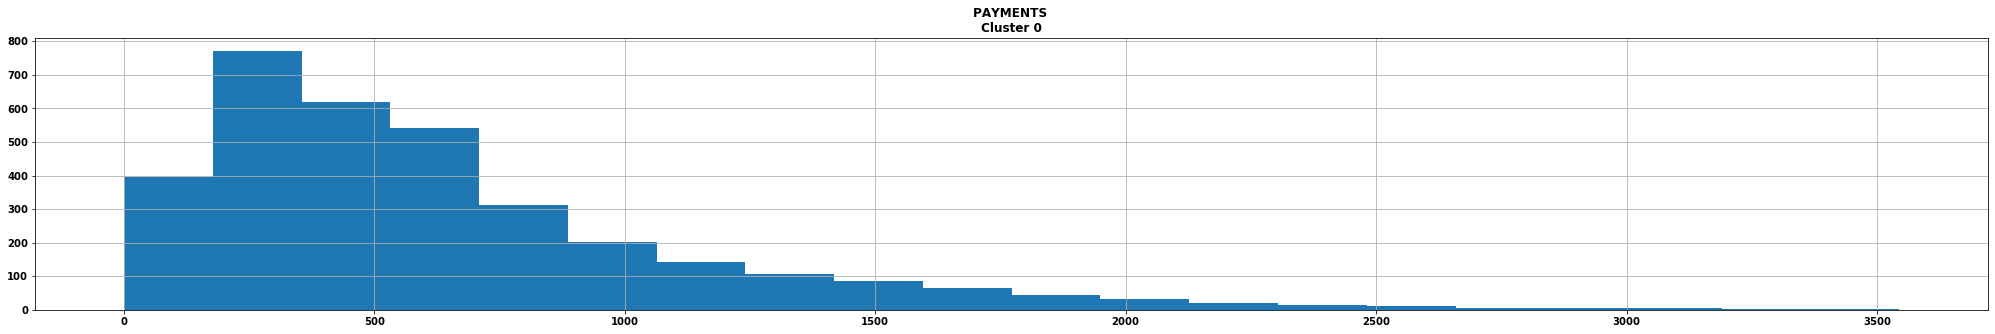

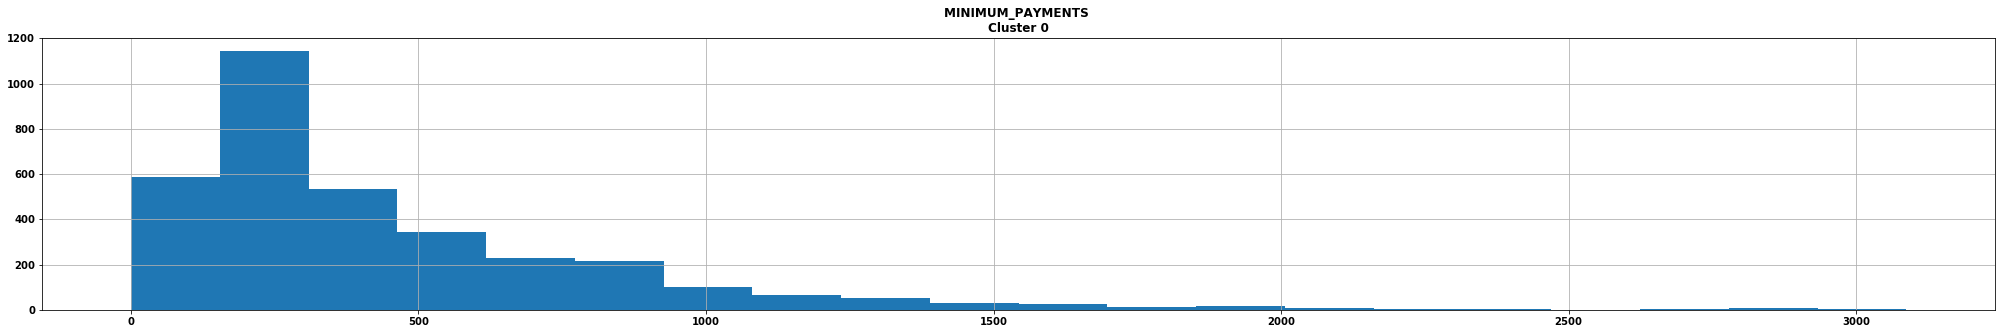

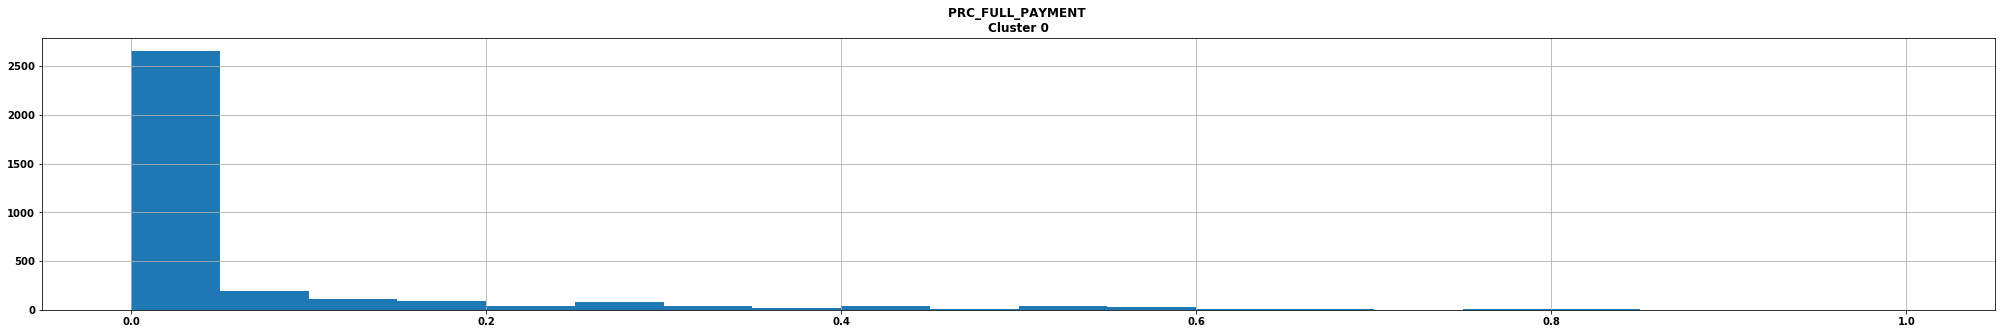

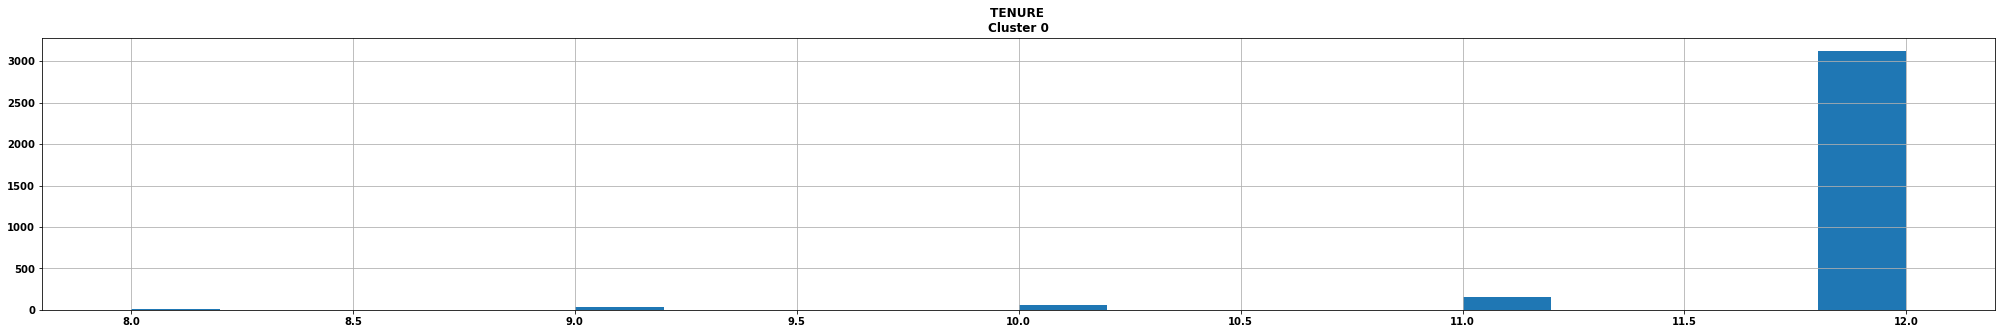

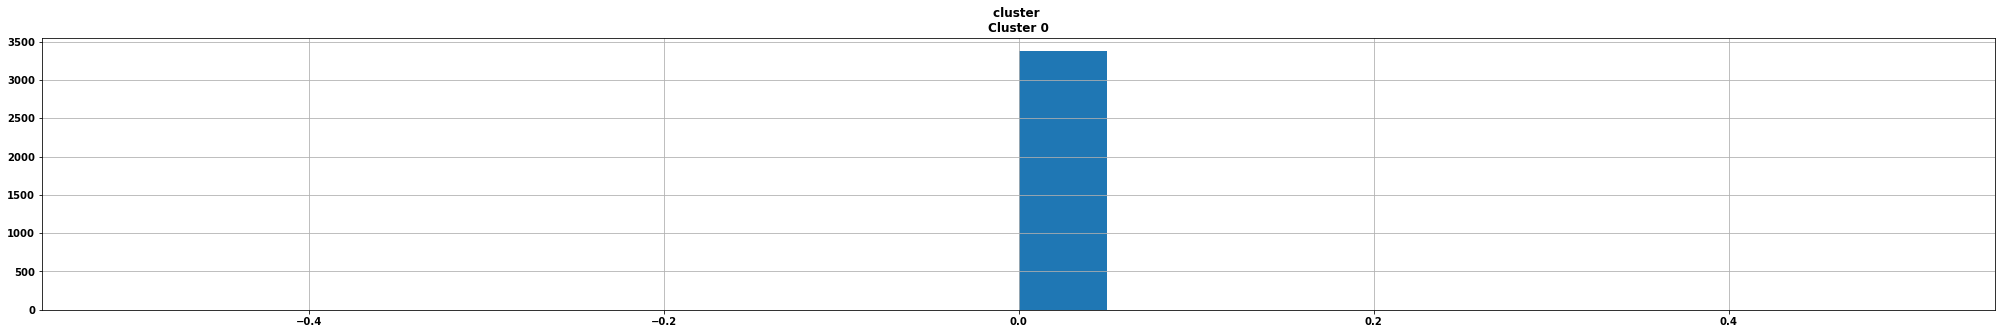

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count  3378.000000        3378.000000  3378.000000       3378.000000   
mean   1022.122643           0.933043   295.597780        195.782555   
std     997.762438           0.154327   370.320473        347.895543   
min       0.004816           0.181818     0.000000          0.000000   
25%     149.136977           1.000000     0.000000          0.000000   
50%     863.815758           1.000000   159.980000          0.000000   
75%    1478.042231           1.000000   443.920000        246.267500   
max    5686.466725           1.000000  2372.980000       2372.980000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             3378.000000   3378.000000          3378.000000   
mean               100.035672    336.443586             0.343758   
std                159.813487    546.353987             0.350715   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.000000   
50%                  0.000000      0.000000             0.250000   
75%                158.812500    468.614176             0.583333   
max               1057.000000   3087.004701             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 3378.000000                       3378.000000   
mean                     0.135533                          0.216615   
std                      0.232494                          0.321643   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.000000                          0.000000   
75%                      0.166667                          0.416667   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             3378.000000       3378.000000    3378.000000   3378.000000   
mean                 0.097063          1.715216       5.789816   2819.108940   
std                  0.132278          2.630432       6.682325   2097.071581   
min                  0.000000          0.000000       0.000000    150.000000   
25%                  0.000000          0.000000       0.000000   1200.000000   
50%                  0.000000          0.000000       3.000000   2000.000000   
75%                  0.166667          3.000000      10.000000   3500.000000   
max                  0.666667         20.000000      51.000000  13500.000000   

          PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  cluster  
count  3378.000000       3378.000000       3378.000000  3378.000000   3378.0  
mean    635.599448        436.227719          0.053093    11.883659      0.0  
std     511.970842        391.336736          0.135144     0.467251      0.0  
min       0.000000          0.037744          0.000000     8.000000      0.0  
25%     285.554554        173.701881          0.000000    12.000000      0.0  
50%     503.443919        296.640844          0.000000    12.000000      0.0  
75%     810.601242        581.080592          0.000000    12.000000      0.0  
max    3544.922751       3087.338813          1.000000    12.000000      0.0

In [135]:
# Define which cluster to plot:
cluster_nb_interest = 0

# # Plot histograms on the specified clusters of interest:
for i in marketing_data_autoEncode_labeled_df.columns:
    plt.figure(figsize=(35, 5))
    cluster = marketing_data_autoEncode_labeled_df[ marketing_data_autoEncode_labeled_df.cluster == cluster_nb_interest ]
    cluster[i].hist(bins=20)
    plt.title("{} \nCluster {}".format(i, cluster_nb_interest))
        
plt.show()

marketing_data_autoEncode_labeled_df[marketing_data_autoEncode_labeled_df.cluster == cluster_nb_interest].describe()

### Observations:

The Cluster information/charts are plot such that for each of the cluster, the corresponding attributes are in the columns below.

Taking __Cluster 0__ as an example, and see if there are some "Insights" that can be drawn from here. Note that these are the new clusters of customers and should have different attributes.

General Behaviour of this group:
- These customers have a mean balance of ~USD1,000. From the distribution of the histogram, it has a longer right tail representing that it is skewed to the right. 
- These customers also have frequent changes to their balances and make purchases on products that is around ~USD300.
- The one-off purchases are typically around ~USD200 and presents with a greater than average frequency of 0.13.
- These customers also tend to pay off 5% of the full payment monthly with this credit card.
- These customers are also very loyal with a tenure of around ~12 years with this bank.
- Overall, these are customers can be said to be very loyal, pays lower interests and careful with their money. This can be seen similar to Cluster 0 from the previous clustering results.



#### Plot out some example clusters to examine: Cluster 4

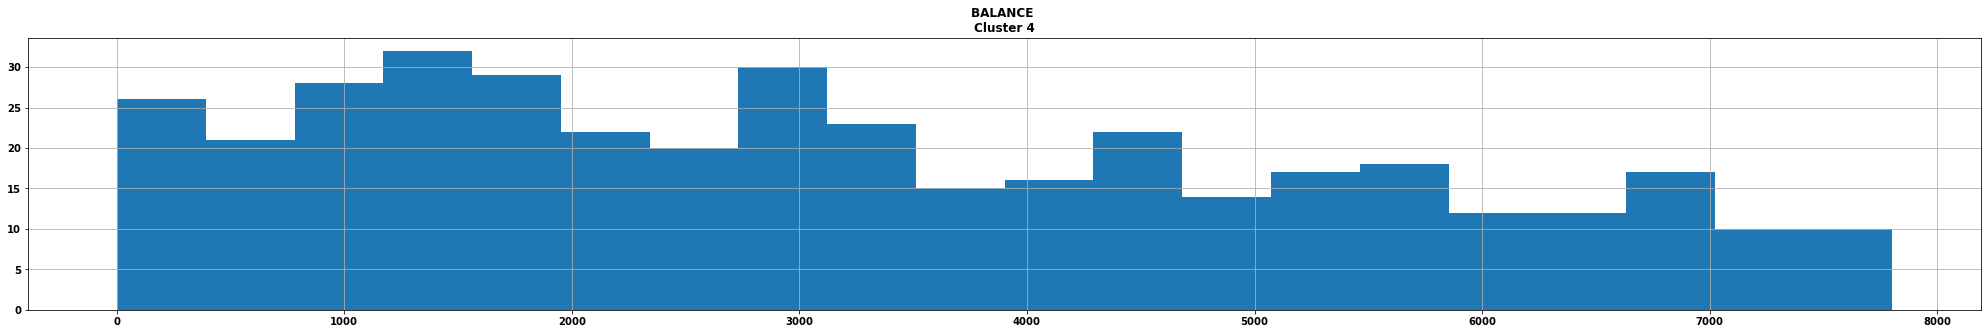

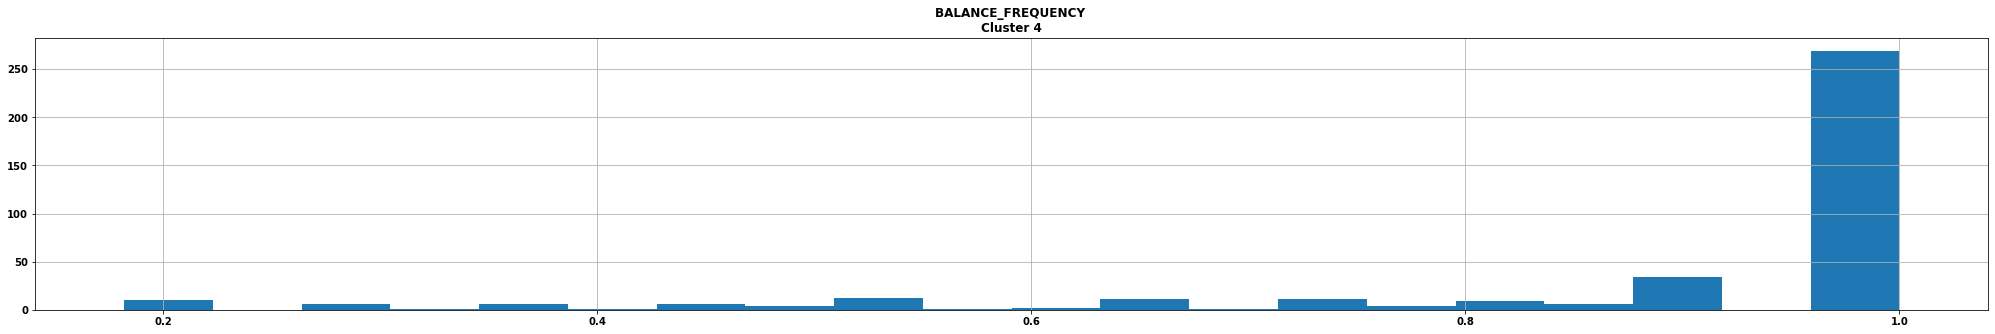

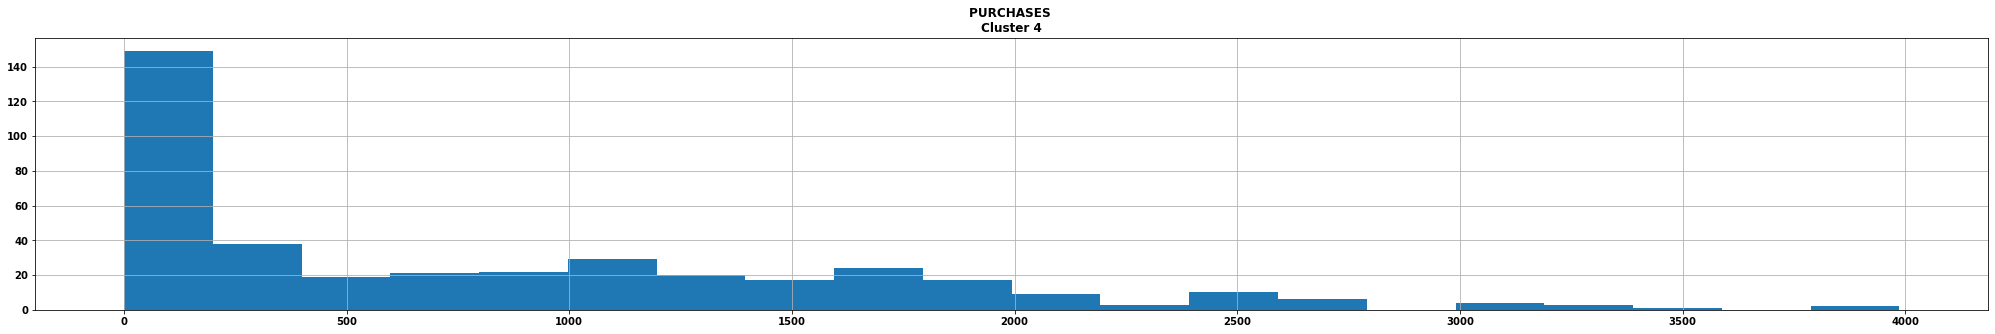

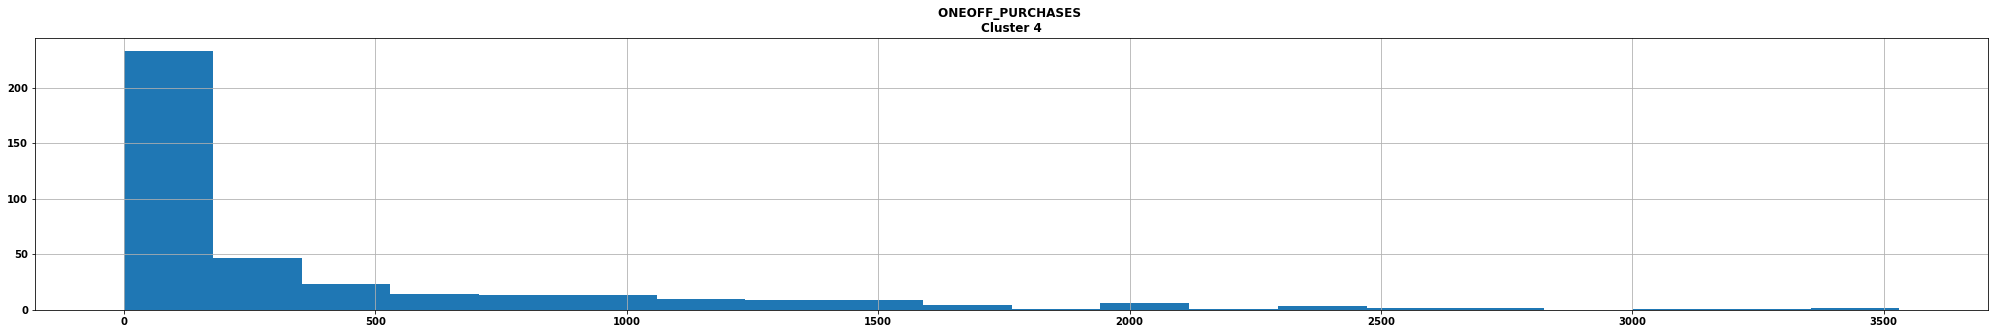

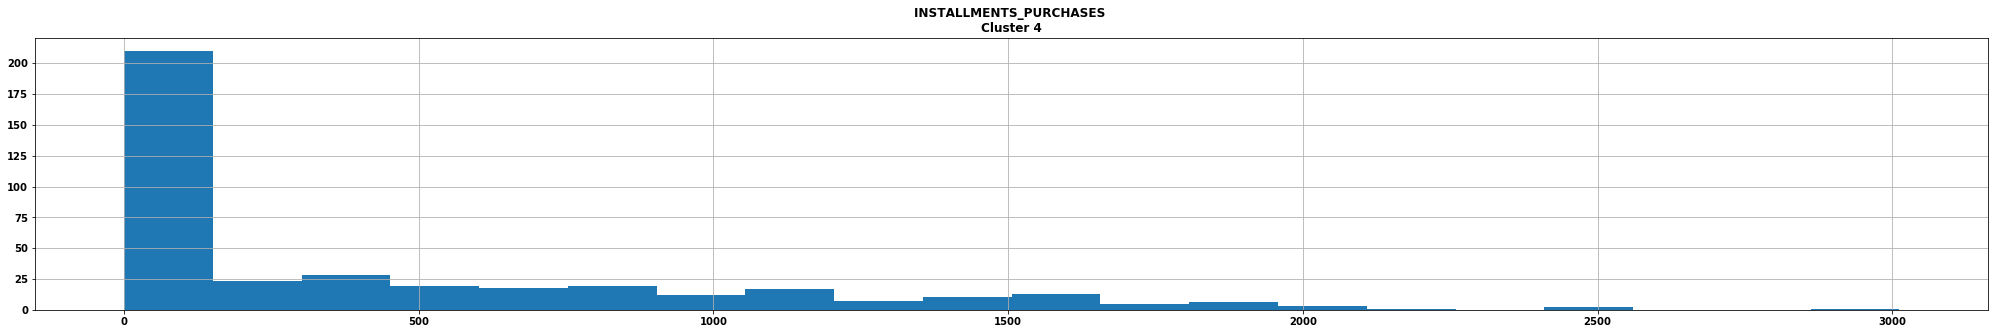

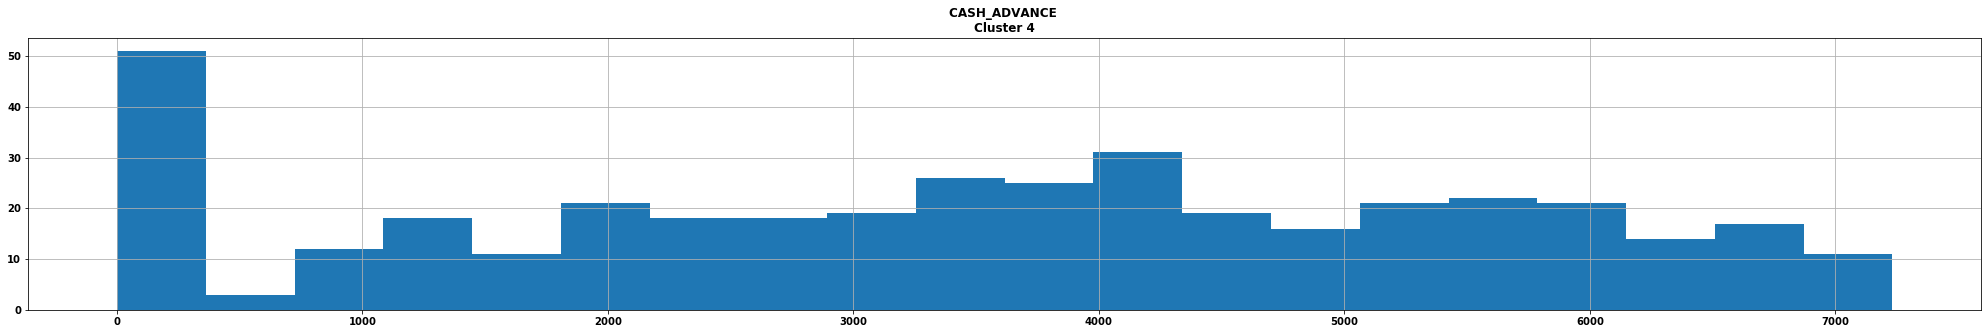

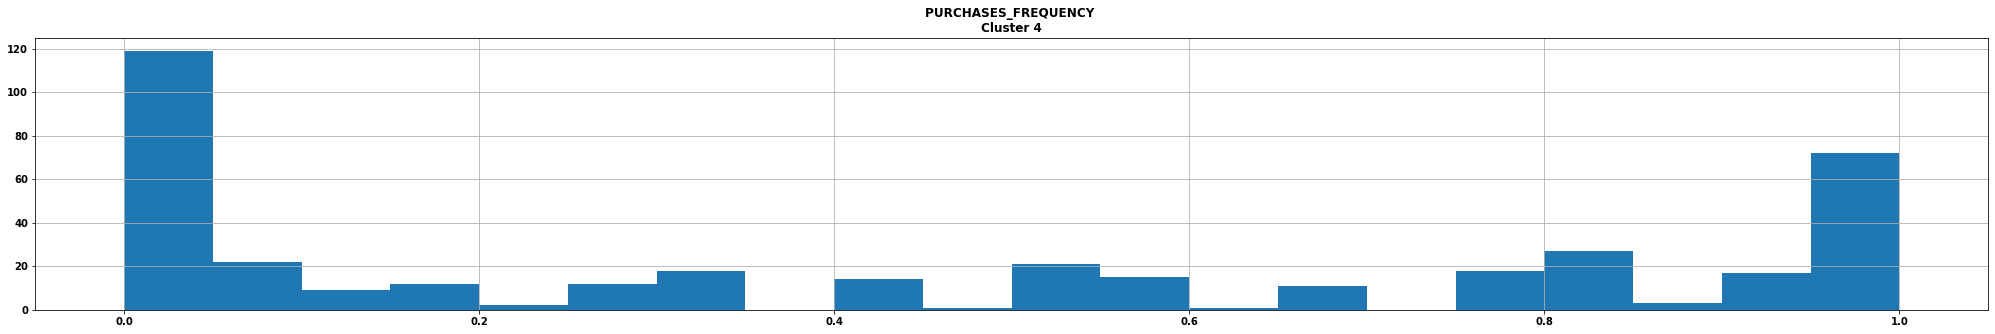

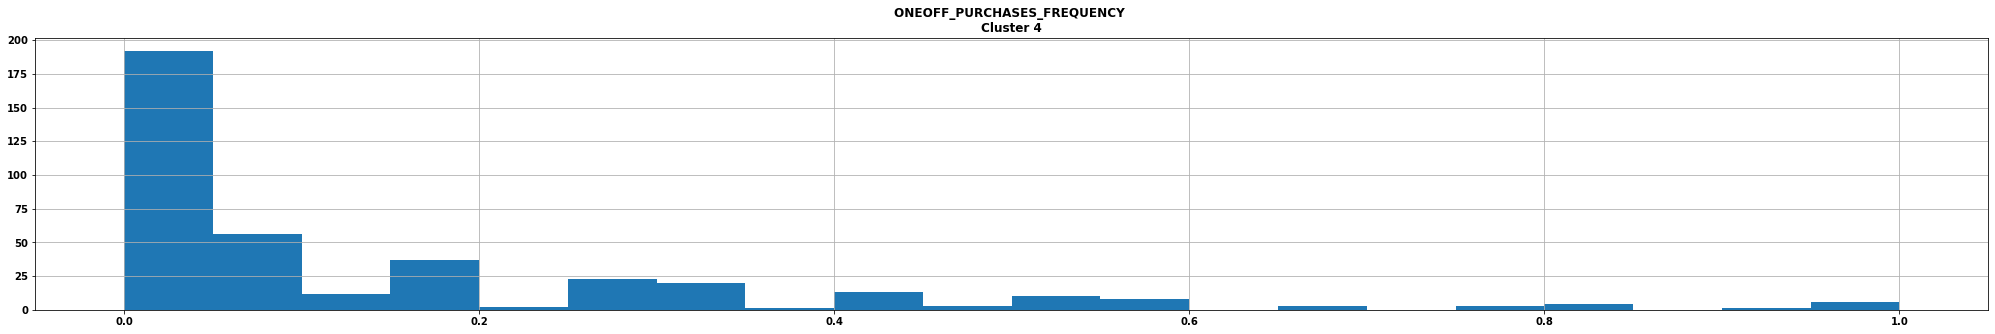

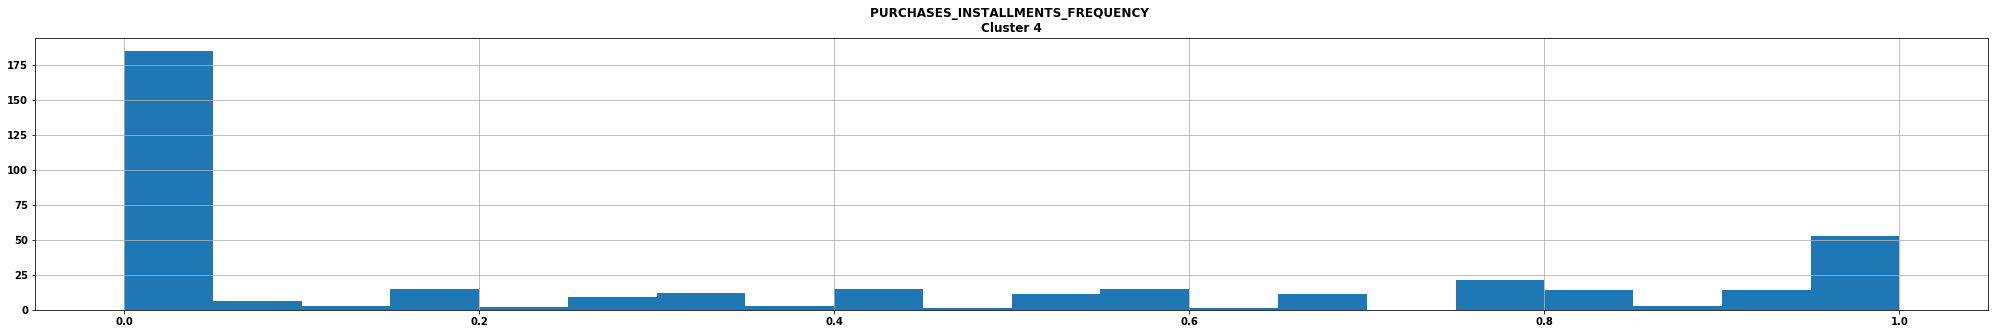

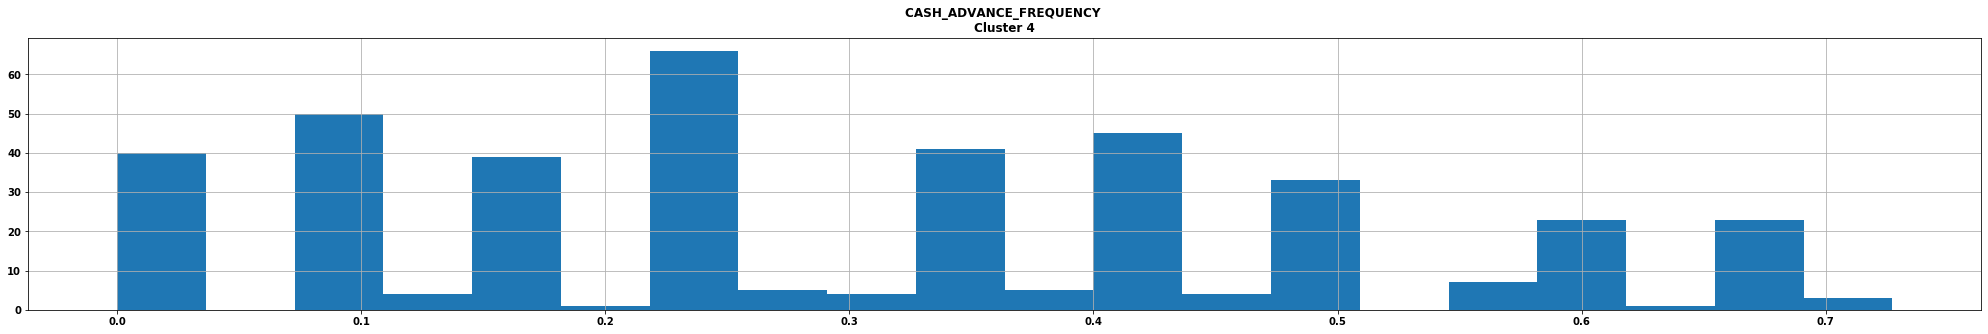

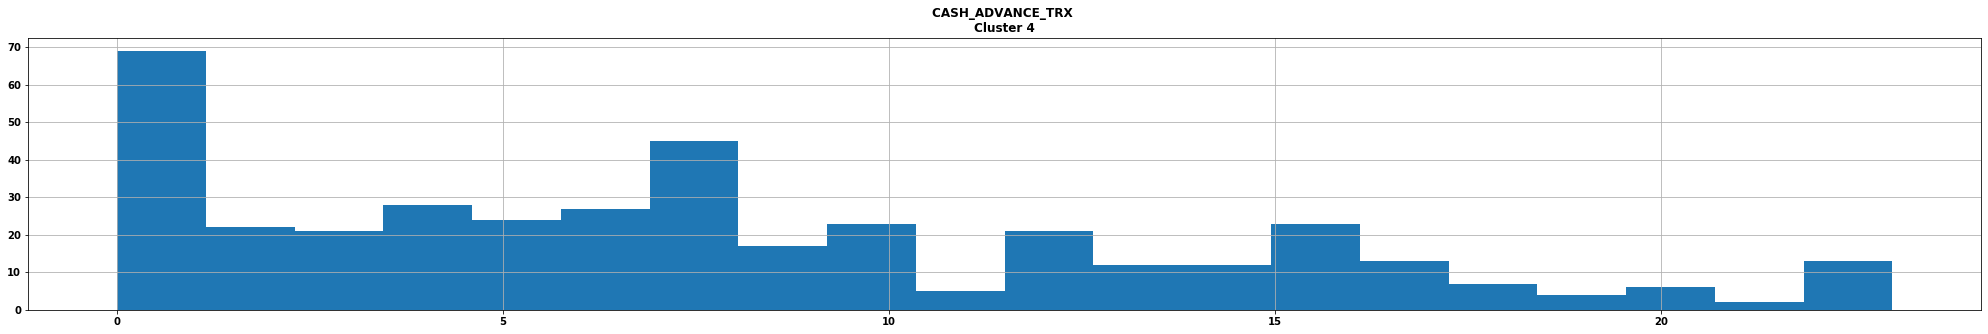

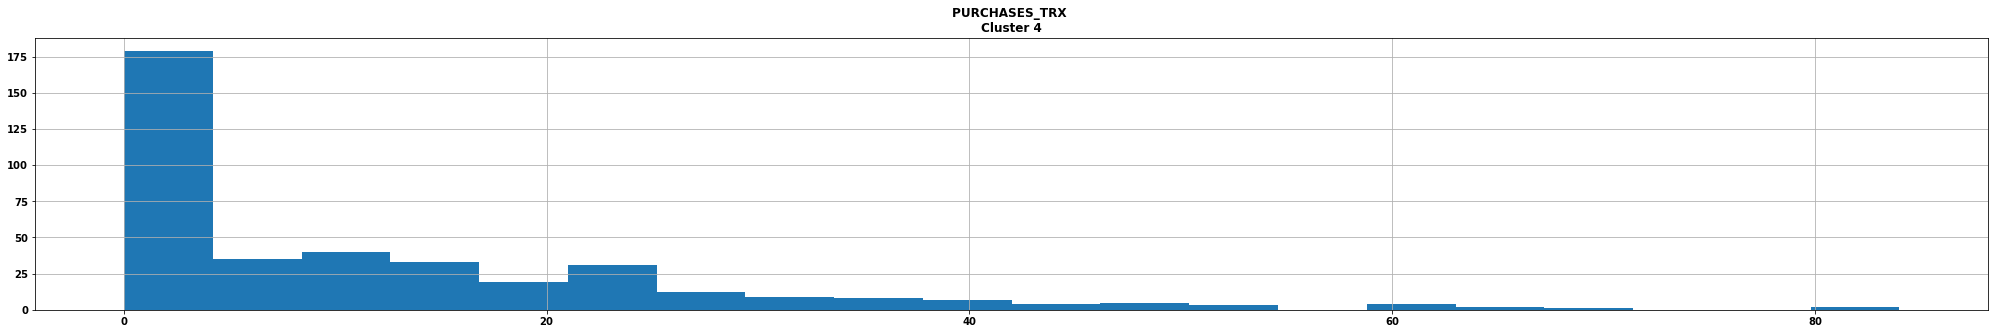

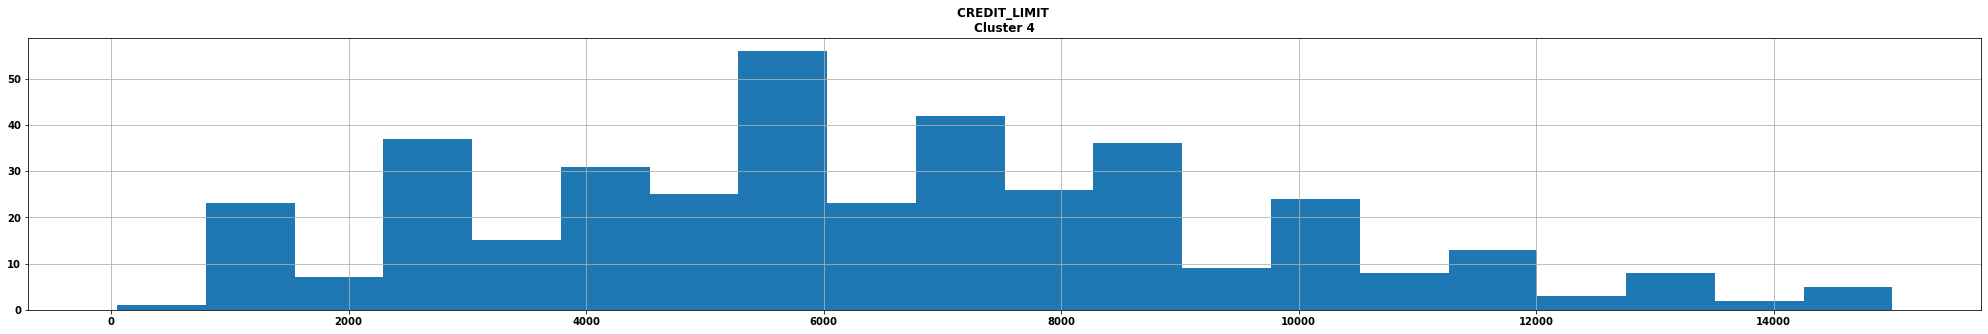

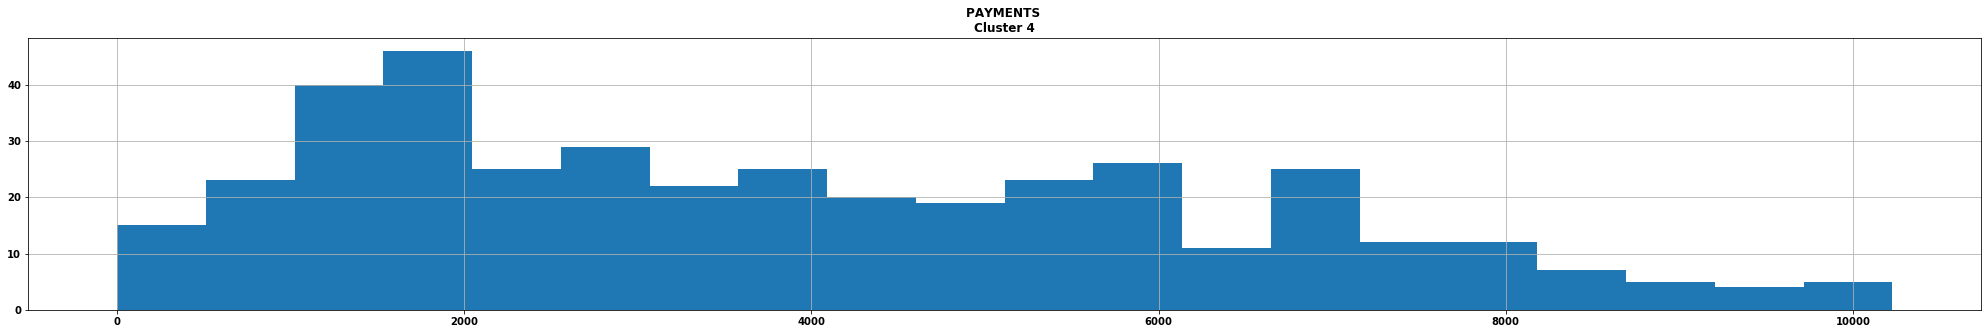

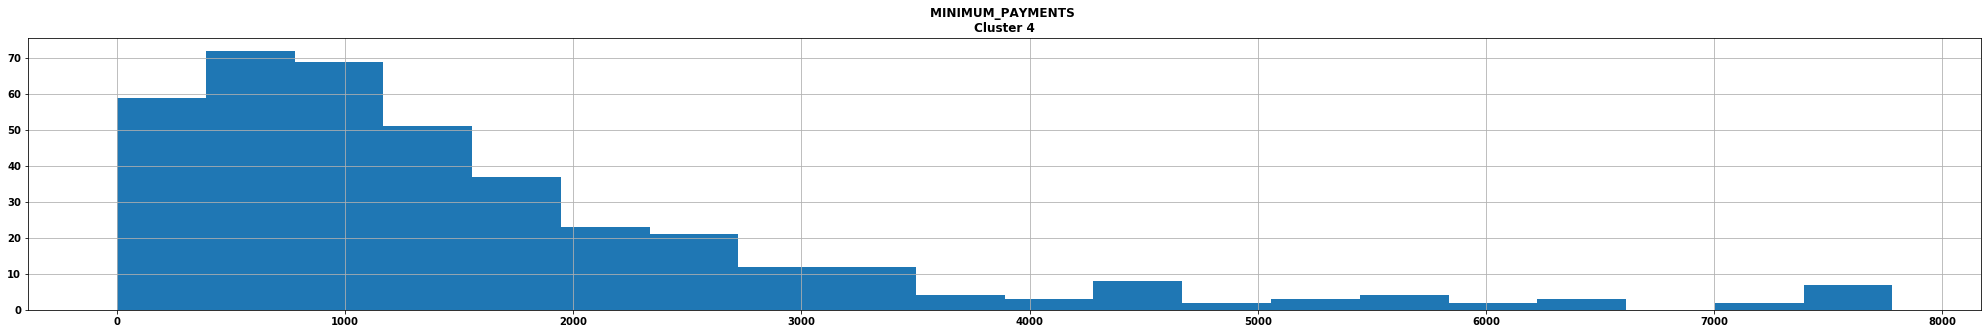

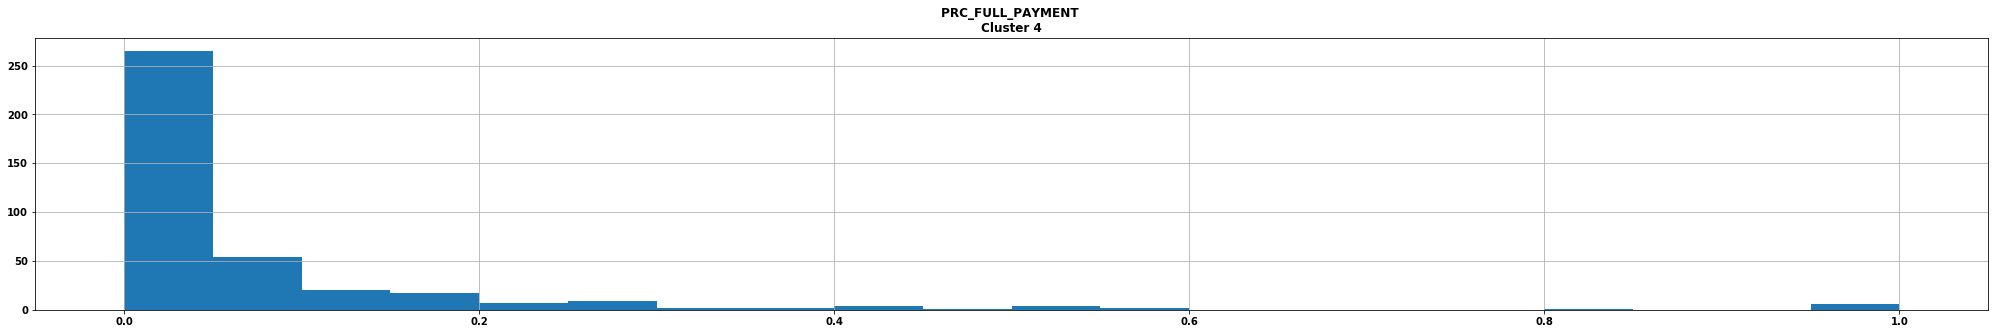

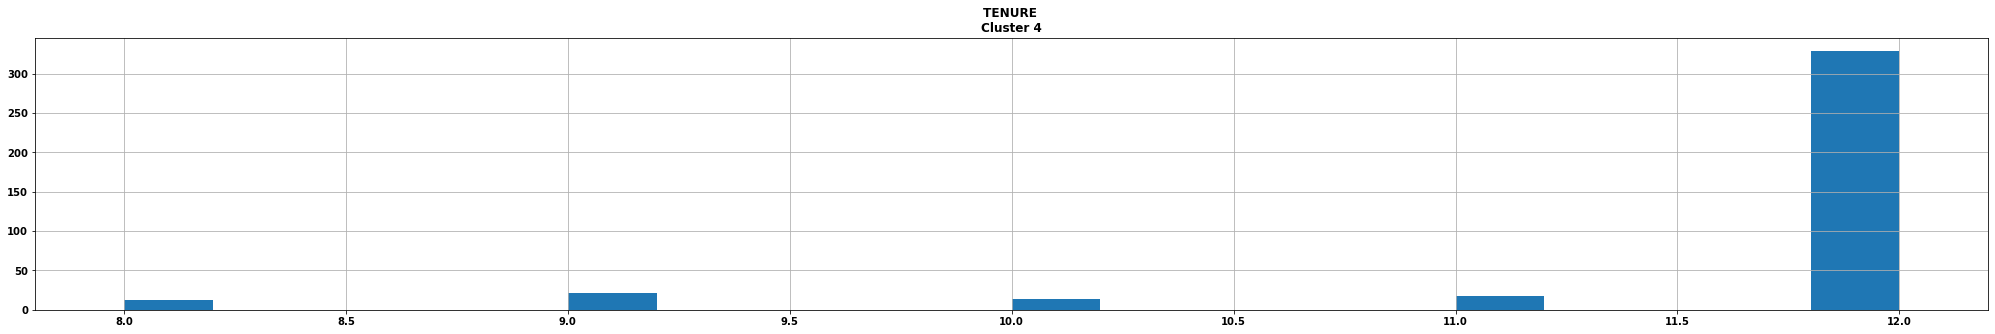

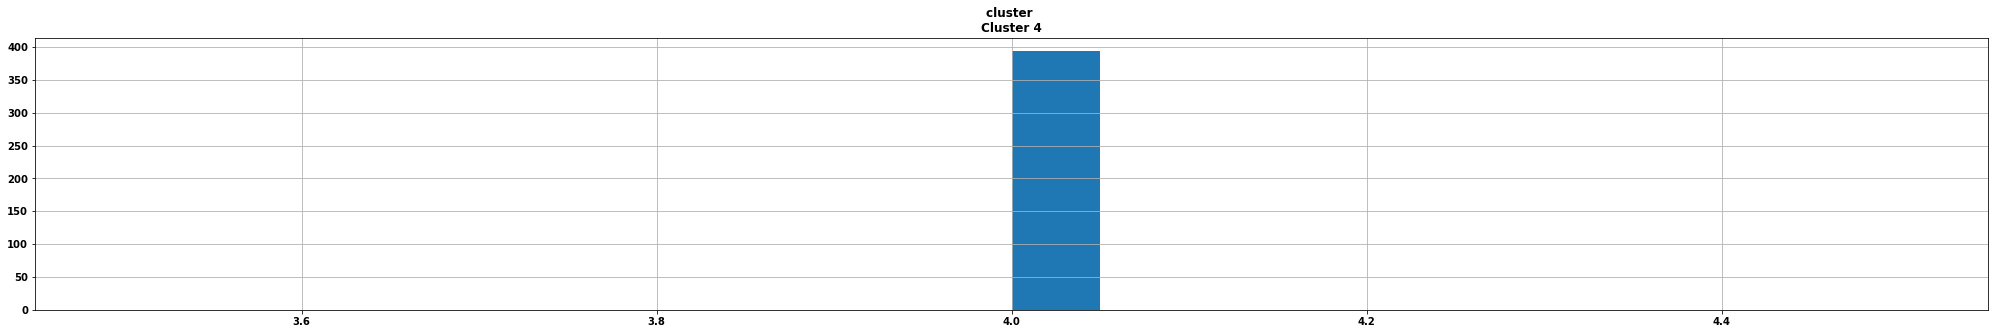

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count   394.000000         394.000000   394.000000        394.000000   
mean   3286.125345           0.889791   797.738249        372.950406   
std    2142.864950           0.209460   865.798392        641.103742   
min       1.632453           0.181818     0.000000          0.000000   
25%    1458.688335           0.888889     0.000000          0.000000   
50%    2959.510852           1.000000   520.050000         17.550000   
75%    5052.043704           1.000000  1363.405000        464.472500   
max    7803.071972           1.000000  3987.010000       3531.240000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count              394.000000    394.000000           394.000000   
mean               424.787843   3460.574783             0.441872   
std                583.338990   2086.323095             0.398093   
min                  0.000000      0.000000             0.000000   
25%                  0.000000   1839.059136             0.000000   
50%                 97.380000   3614.438602             0.416667   
75%                740.190000   5131.061669             0.833333   
max               3011.760000   7232.069823             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                  394.000000                        394.000000   
mean                     0.143241                          0.345242   
std                      0.214770                          0.392728   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.178030                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count              394.000000        394.000000     394.000000    394.000000   
mean                 0.300647          7.916244      11.862944   6541.212890   
std                  0.196128          6.141304      15.004376   3124.529832   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.166667          3.000000       0.000000   4000.000000   
50%                  0.250000          7.000000       6.000000   6500.000000   
75%                  0.416667         12.000000      19.000000   8500.000000   
max                  0.727273         23.000000      84.000000  15000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT      TENURE  cluster  
count    394.000000        394.000000        394.000000  394.000000    394.0  
mean    3900.777931       1631.966442          0.069118   11.601523      4.0  
std     2465.939117       1552.814927          0.159667    0.999286      0.0  
min        0.000000          0.261984          0.000000    8.000000      4.0  
25%     1735.528130        629.858415          0.000000   12.000000      4.0  
50%     3537.480372       1158.112951          0.000000   12.000000      4.0  
75%     5906.344548       2059.949940          0.083333   12.000000      4.0  
max    10226.601760       7781.671432          1.000000   12.000000      4.0

In [136]:
# Define which cluster to plot:
cluster_nb_interest = 4

# # Plot histograms on the specified clusters of interest:
for i in marketing_data_autoEncode_labeled_df.columns:
    plt.figure(figsize=(35, 5))
    cluster = marketing_data_autoEncode_labeled_df[ marketing_data_autoEncode_labeled_df.cluster == cluster_nb_interest ]
    cluster[i].hist(bins=20)
    plt.title("{} \nCluster {}".format(i, cluster_nb_interest))
        
plt.show()

marketing_data_autoEncode_labeled_df[marketing_data_autoEncode_labeled_df.cluster == cluster_nb_interest].describe()

### Observation:

General Behaviour of Cluster 4 customers:
- These customers have a mean balance of ~USD3,300.
- These customers also have frequent changes to their balances and make purchases on products that is around ~USD800.
- The one-off purchases are typically around ~USD370 and presents with a lower fequency of ~0.14.
- These customers also tend to pay off 6.9% of the full payment monthly with this credit card.
- These customers are also very loyal with a tenure of around ~11 years with this bank.
- Interestingly, these customers presents with a very large sums of Cash Advance at around ~USD3,500.
- These customers can be seen to pay back thhe cash advances 30% of the time.
- On average these customers also have a high number of transactions performed with cash advance at around 7.9.
- Overall, these are customers can be said to use credit cards as a loan and therefore a lucrative sector of interest for the bank.


### Conclusion:

After removing the outliers from the dataset and re-modeling withh K-means and dimension reduction with AutoEncoder, I believe that the current output results are more realistic and true to the underlying distribution of the dataset. These 6 groups/clusters of customer and their behavioural insigths can be utilised by the marketing department to launch a few products or campaigns to improve on sales. 